In [34]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Monthly Analysis of Salt Model

## Pull in the model results

For the APEX-MODFLOW-Salt, the primary model result we will examine is the salt.output.channel file. Before running this code be sure to convert this file to a text file.

In [35]:
Model = "C:/Users/Lizmot34/Desktop/RBF-PSG-0G-P/EM_RBF_v03_Ani/EM_RBF_v03_Ani/SALINITY/salt.output.channels.txt"

## Set-up graph options

These set-up options are for the figures we will create.

Set the graph name - displays above the graph

In [36]:
GraphName = "PSG 0G RBF Monthly"

Set the figure path to where the graph will be saved

In [37]:
FigurePath = 'C:/Users/Lizmot34/Desktop/FinishedFigures/05172022_Jupyter'

Set the Figure suffix to keep track of which data set you are analyzing

In [38]:
FigureSuffix = 'Monthly'

## Pull in Observed Data

My Observed Data is from LOADEST and has been divided into three seperate excel sheets for each gage site

### Subarea 75 = Gage 09364500

#### Data

##### Pull in excel sheet and pull dates out

In [39]:
Ob75Data = pd.read_excel('C:/Users/Lizmot34/Desktop/09364500_LOADEST_Results.xlsx', sheet_name='Monthly_Mean_Loads')
Ob75Dates = Ob75Data.Dates

##### Set Loadings

In [40]:
LoadOb75SO4 = Ob75Data.SO4
LoadOb75Na = Ob75Data.Na
LoadOb75Mg = Ob75Data.Mg
LoadOb75K = Ob75Data.K
LoadOb75Cl = Ob75Data.Cl
LoadOb75Ca = Ob75Data.Ca
LoadOb75CO3 = Ob75Data.CO3
LoadOb75HCO3 = Ob75Data.HCO3

##### Set dates as index for loadings

In [41]:
LoadOb75SO4.index = Ob75Dates
LoadOb75CO3.index = Ob75Dates
LoadOb75HCO3.index = Ob75Dates
LoadOb75Ca.index = Ob75Dates
LoadOb75Mg.index = Ob75Dates
LoadOb75Na.index = Ob75Dates
LoadOb75K.index = Ob75Dates
LoadOb75Cl.index = Ob75Dates

##### Set labels

In [42]:
LoadOb75SO4.columns = ['GageMeanSO4']
LoadOb75Na.columns = ['GageMeanNa']
LoadOb75Mg.columns = ['GageMeanMg']
LoadOb75K.columns = ['GageMeanK']
LoadOb75Cl.columns = ['GageMeanCl']
LoadOb75Ca.columns = ['GageMeanCa']
LoadOb75CO3.columns = ['GageMeanCO3']
LoadOb75HCO3.columns = ['GageMeanHCO3']

#### Pull in Standard Error from same sheet as the observed data 

In [43]:
OutletStdError = pd.read_excel('C:/Users/Lizmot34/Desktop/09364500_LOADEST_Results.xlsx', sheet_name='Standard_Errors')

##### Set Standard Error for the error bars of the observed loadings

In [44]:
StdErrorSO4_75 = OutletStdError.SO4
StdErrorNa_75 = OutletStdError.Na
StdErrorMg_75 = OutletStdError.Mg
StdErrorK_75 = OutletStdError.K
StdErrorCl_75 = OutletStdError.Cl
StdErrorCa_75 = OutletStdError.Ca
StdErrorCO3_75 = OutletStdError.CO3
StdErrorHCO3_75 = OutletStdError.HCO3

### Subarea 12 = Gage 09359020

#### Data

In [45]:
ObservedData12 = pd.read_excel('C:/Users/Lizmot34/Desktop/09359020_LOADEST_Results.xlsx', sheet_name='Monthly_Mean_Loads')
Ob12Dates = ObservedData12.Date

In [46]:
LoadOb12SO4 = ObservedData12.SO4
LoadOb12Na = ObservedData12.Na
LoadOb12K = ObservedData12.K
LoadOb12Mg = ObservedData12.Mg
LoadOb12Cl = ObservedData12.Cl
LoadOb12Ca = ObservedData12.Ca
LoadOb12HCO3 = ObservedData12.HCO3

In [47]:
LoadOb12SO4.index = Ob12Dates
LoadOb12HCO3.index = Ob12Dates
LoadOb12Ca.index = Ob12Dates
LoadOb12Mg.index = Ob12Dates
LoadOb12Na.index = Ob12Dates
LoadOb12K.index = Ob12Dates
LoadOb12Cl.index = Ob12Dates

#### Errors

In [48]:
Ob12StdError = pd.read_excel('C:/Users/Lizmot34/Desktop/09359020_LOADEST_Results.xlsx', sheet_name='Standard_Errors')

In [49]:
StdErrorSO4_12 = Ob12StdError.SO4
StdErrorNa_12 = Ob12StdError.Na
StdErrorMg_12 = Ob12StdError.Mg
StdErrorK_12 = Ob12StdError.K
StdErrorCl_12 = Ob12StdError.Cl
StdErrorCa_12 = Ob12StdError.Ca
StdErrorHCO3_12 = Ob12StdError.HCO3

### Subarea 9 = Gage 09358000

#### Data

In [50]:
ObservedData9 = pd.read_excel('C:/Users/Lizmot34/Desktop/09358000_LOADEST_Results.xlsx', sheet_name='Monthly_Mean_Loads')
Ob9Dates = ObservedData9.Date

In [51]:
LoadOb9Ca = ObservedData9.Ca
LoadOb9Mg = ObservedData9.Mg
LoadOb9K = ObservedData9.K
LoadOb9Na = ObservedData9.Na
LoadOb9SO4 = ObservedData9.SO4

In [52]:
LoadOb9SO4.index = Ob9Dates
LoadOb9Ca.index = Ob9Dates
LoadOb9Mg.index = Ob9Dates
LoadOb9Na.index = Ob9Dates
LoadOb9K.index = Ob9Dates

#### Errors

In [53]:
Ob9StdError = pd.read_excel('C:/Users/Lizmot34/Desktop/09358000_LOADEST_Results.xlsx', sheet_name='Standard_Errors')

In [54]:
StdErrorSO4_9 = Ob9StdError.SO4
StdErrorNa_9 = Ob9StdError.Na
StdErrorMg_9 = Ob9StdError.Mg
StdErrorK_9 = Ob9StdError.K
StdErrorCa_9 = Ob9StdError.Ca

## Pull in Model Data

In [55]:
Mod = pd.read_csv(Model, skiprows = 4, delim_whitespace = True)

Drop data till the end of warmup (1987-1991)

In [56]:
Mod.drop(Mod.index[0:136950],0,inplace=True)
datestart = np.array('1992-01-01', dtype=np.datetime64)
dates = datestart + np.arange(7305)
years = Mod.year

### Divide into Subareas 

#### Subarea 75 

In [57]:
Sub75 = Mod[Mod.subarea == 75]

##### Split into years and then into the months that observed data is available
Since LOADEST uses the available observations to get a monthly approximation, we must pull the months from the model to compare. These years and months are hard-coded in, and will need to be adjusted for another model.

In [58]:
###Year = 1992#############################################################################################################
Sub75_1992 = Sub75[Sub75.year == 1992]
Sub75_1992_index = Sub75_1992.set_index("day") 
##Months 1, 3, 5, 8, 11
##Month 1################################################################################################################
Sub75_1992_1 = Sub75_1992_index.loc[1:31]
#SO4
Sub75_1992_1_LoadSO4 = Sub75_1992_1.load_so4
Sub75_1992_1_SO4_mean = Sub75_1992_1_LoadSO4.mean(axis='index')
#Ca
Sub75_1992_1_LoadCa = Sub75_1992_1.load_ca
Sub75_1992_1_Ca_mean = Sub75_1992_1_LoadCa.mean(axis='index')
#Mg
Sub75_1992_1_LoadMg = Sub75_1992_1.load_mg
Sub75_1992_1_Mg_mean = Sub75_1992_1_LoadMg.mean(axis='index')
#Na
Sub75_1992_1_LoadNa = Sub75_1992_1.load_na
Sub75_1992_1_Na_mean = Sub75_1992_1_LoadNa.mean(axis='index')
#K
Sub75_1992_1_LoadK = Sub75_1992_1.load_k
Sub75_1992_1_K_mean = Sub75_1992_1_LoadK.mean(axis='index')
#Cl
Sub75_1992_1_LoadCl = Sub75_1992_1.load_cl
Sub75_1992_1_Cl_mean = Sub75_1992_1_LoadCl.mean(axis='index')
#CO3
Sub75_1992_1_LoadCO3 = Sub75_1992_1.load_co3
Sub75_1992_1_CO3_mean = Sub75_1992_1_LoadCO3.mean(axis='index') 
#HCO3
Sub75_1992_1_LoadHCO3 = Sub75_1992_1.load_hco3
Sub75_1992_1_HCO3_mean = Sub75_1992_1_LoadHCO3.mean(axis='index')
##Month 3##############################################################################################################
Sub75_1992_3 = Sub75_1992_index.loc[61:91]
#SO4
Sub75_1992_3_LoadSO4 = Sub75_1992_3.load_so4
Sub75_1992_3_SO4_mean = Sub75_1992_3_LoadSO4.mean(axis='index')
#Ca
Sub75_1992_3_LoadCa = Sub75_1992_3.load_ca
Sub75_1992_3_Ca_mean = Sub75_1992_3_LoadCa.mean(axis='index')
#Mg
Sub75_1992_3_LoadMg = Sub75_1992_3.load_mg
Sub75_1992_3_Mg_mean = Sub75_1992_3_LoadMg.mean(axis='index')
#Na
Sub75_1992_3_LoadNa = Sub75_1992_3.load_na
Sub75_1992_3_Na_mean = Sub75_1992_3_LoadNa.mean(axis='index')
#K
Sub75_1992_3_LoadK = Sub75_1992_3.load_k
Sub75_1992_3_K_mean = Sub75_1992_3_LoadK.mean(axis='index')
#Cl
Sub75_1992_3_LoadCl = Sub75_1992_3.load_cl
Sub75_1992_3_Cl_mean = Sub75_1992_3_LoadCl.mean(axis='index')
#CO3
Sub75_1992_3_LoadCO3 = Sub75_1992_3.load_co3
Sub75_1992_3_CO3_mean = Sub75_1992_3_LoadCO3.mean(axis='index')
#HCO3
Sub75_1992_3_LoadHCO3 = Sub75_1992_3.load_hco3
Sub75_1992_3_HCO3_mean = Sub75_1992_3_LoadHCO3.mean(axis='index')
##Month 5############################################################################################################
Sub75_1992_5 = Sub75_1992_index.loc[122:152]
#SO4
Sub75_1992_5_LoadSO4 = Sub75_1992_5.load_so4
Sub75_1992_5_SO4_mean = Sub75_1992_5_LoadSO4.mean(axis='index')
#Ca
Sub75_1992_5_LoadCa = Sub75_1992_5.load_ca
Sub75_1992_5_Ca_mean = Sub75_1992_5_LoadCa.mean(axis='index')
#Mg
Sub75_1992_5_LoadMg = Sub75_1992_5.load_mg
Sub75_1992_5_Mg_mean = Sub75_1992_5_LoadMg.mean(axis='index')
#Na
Sub75_1992_5_LoadNa = Sub75_1992_5.load_na
Sub75_1992_5_Na_mean = Sub75_1992_5_LoadNa.mean(axis='index')
#K
Sub75_1992_5_LoadK = Sub75_1992_5.load_k
Sub75_1992_5_K_mean = Sub75_1992_5_LoadK.mean(axis='index')
#Cl
Sub75_1992_5_LoadCl = Sub75_1992_5.load_cl
Sub75_1992_5_Cl_mean = Sub75_1992_5_LoadCl.mean(axis='index')
#CO3
Sub75_1992_5_LoadCO3 = Sub75_1992_5.load_co3
Sub75_1992_5_CO3_mean = Sub75_1992_5_LoadCO3.mean(axis='index')
#HCO3
Sub75_1992_5_LoadHCO3 = Sub75_1992_5.load_hco3
Sub75_1992_5_HCO3_mean = Sub75_1992_5_LoadHCO3.mean(axis='index')
##Month 8#########################################################################################################
Sub75_1992_8 = Sub75_1992_index.loc[214:244]
#SO4
Sub75_1992_8_LoadSO4 = Sub75_1992_8.load_so4
Sub75_1992_8_SO4_mean = Sub75_1992_8_LoadSO4.mean(axis='index')
#Ca
Sub75_1992_8_LoadCa = Sub75_1992_8.load_ca
Sub75_1992_8_Ca_mean = Sub75_1992_8_LoadCa.mean(axis='index')
#Mg
Sub75_1992_8_LoadMg = Sub75_1992_8.load_mg
Sub75_1992_8_Mg_mean = Sub75_1992_8_LoadMg.mean(axis='index')
#Na
Sub75_1992_8_LoadNa = Sub75_1992_8.load_na
Sub75_1992_8_Na_mean = Sub75_1992_8_LoadNa.mean(axis='index')
#K
Sub75_1992_8_LoadK = Sub75_1992_8.load_k
Sub75_1992_8_K_mean = Sub75_1992_8_LoadK.mean(axis='index')
#Cl
Sub75_1992_8_LoadCl = Sub75_1992_8.load_cl
Sub75_1992_8_Cl_mean = Sub75_1992_8_LoadCl.mean(axis='index')
#CO3
Sub75_1992_8_LoadCO3 = Sub75_1992_8.load_co3
Sub75_1992_8_CO3_mean = Sub75_1992_8_LoadCO3.mean(axis='index')
#HCO3
Sub75_1992_8_LoadHCO3 = Sub75_1992_8.load_hco3
Sub75_1992_8_HCO3_mean = Sub75_1992_8_LoadHCO3.mean(axis='index')
##Month 11#####################################################################################################
Sub75_1992_11 = Sub75_1992_index.loc[306:335]
#SO4
Sub75_1992_11_LoadSO4 = Sub75_1992_11.load_so4
Sub75_1992_11_SO4_mean = Sub75_1992_11_LoadSO4.mean(axis='index')
#Ca
Sub75_1992_11_LoadCa = Sub75_1992_11.load_ca
Sub75_1992_11_Ca_mean = Sub75_1992_11_LoadCa.mean(axis='index')
#Mg
Sub75_1992_11_LoadMg = Sub75_1992_11.load_mg
Sub75_1992_11_Mg_mean = Sub75_1992_11_LoadMg.mean(axis='index')
#Na
Sub75_1992_11_LoadNa = Sub75_1992_11.load_na
Sub75_1992_11_Na_mean = Sub75_1992_11_LoadNa.mean(axis='index')
#K
Sub75_1992_11_LoadK = Sub75_1992_11.load_k
Sub75_1992_11_K_mean = Sub75_1992_11_LoadK.mean(axis='index')
#Cl
Sub75_1992_11_LoadCl = Sub75_1992_11.load_cl
Sub75_1992_11_Cl_mean = Sub75_1992_11_LoadCl.mean(axis='index')
#CO3
Sub75_1992_11_LoadCO3 = Sub75_1992_11.load_co3
Sub75_1992_11_CO3_mean = Sub75_1992_11_LoadCO3.mean(axis='index')
#HCO3
Sub75_1992_11_LoadHCO3 = Sub75_1992_11.load_hco3
Sub75_1992_11_HCO3_mean = Sub75_1992_11_LoadHCO3.mean(axis='index')
###Year = 1993##########################################################################################################
Sub75_1993 = Sub75[Sub75.year == 1993]
Sub75_1993_index = Sub75_1993.set_index("day")
##Months 3,5,9######################################################################################################
Sub75_1993_3 = Sub75_1993_index.loc[61:91]
#SO4
Sub75_1993_3_LoadSO4 = Sub75_1993_3.load_so4
Sub75_1993_3_SO4_mean = Sub75_1993_3_LoadSO4.mean(axis='index')
#Ca
Sub75_1993_3_LoadCa = Sub75_1993_3.load_ca
Sub75_1993_3_Ca_mean = Sub75_1993_3_LoadCa.mean(axis='index')
#Mg
Sub75_1993_3_LoadMg = Sub75_1993_3.load_mg
Sub75_1993_3_Mg_mean = Sub75_1993_3_LoadMg.mean(axis='index')
#Na
Sub75_1993_3_LoadNa = Sub75_1993_3.load_na
Sub75_1993_3_Na_mean = Sub75_1993_3_LoadNa.mean(axis='index')
#K
Sub75_1993_3_LoadK = Sub75_1993_3.load_k
Sub75_1993_3_K_mean = Sub75_1993_3_LoadK.mean(axis='index')
#Cl
Sub75_1993_3_LoadCl = Sub75_1993_3.load_cl
Sub75_1993_3_Cl_mean = Sub75_1993_3_LoadCl.mean(axis='index')
#CO3
Sub75_1993_3_LoadCO3 = Sub75_1993_3.load_co3
Sub75_1993_3_CO3_mean = Sub75_1993_3_LoadCO3.mean(axis='index')
#HCO3
Sub75_1993_3_LoadHCO3 = Sub75_1993_3.load_hco3
Sub75_1993_3_HCO3_mean = Sub75_1993_3_LoadHCO3.mean(axis='index')
##Month 5######################################################################################################
Sub75_1993_5 = Sub75_1993_index.loc[121:151]
#SO4
Sub75_1993_5_LoadSO4 = Sub75_1993_5.load_so4
Sub75_1993_5_SO4_mean = Sub75_1993_5_LoadSO4.mean(axis='index')
#Ca
Sub75_1993_5_LoadCa = Sub75_1993_5.load_ca
Sub75_1993_5_Ca_mean = Sub75_1993_5_LoadCa.mean(axis='index')
#Mg
Sub75_1993_5_LoadMg = Sub75_1993_5.load_mg
Sub75_1993_5_Mg_mean = Sub75_1993_5_LoadMg.mean(axis='index')
#Na
Sub75_1993_5_LoadNa = Sub75_1993_5.load_na
Sub75_1993_5_Na_mean = Sub75_1993_5_LoadNa.mean(axis='index')
#K
Sub75_1993_5_LoadK = Sub75_1993_5.load_k
Sub75_1993_5_K_mean = Sub75_1993_5_LoadK.mean(axis='index')
#Cl
Sub75_1993_5_LoadCl = Sub75_1993_5.load_cl
Sub75_1993_5_Cl_mean = Sub75_1993_5_LoadCl.mean(axis='index')
#CO3
Sub75_1993_5_LoadCO3 = Sub75_1993_5.load_co3
Sub75_1993_5_CO3_mean = Sub75_1993_5_LoadCO3.mean(axis='index')
#HCO3
Sub75_1993_5_LoadHCO3 = Sub75_1993_5.load_hco3
Sub75_1993_5_HCO3_mean = Sub75_1993_5_LoadHCO3.mean(axis='index')
##Month 9#################################################################################################
Sub75_1993_9 = Sub75_1993_index.loc[244:273]
#SO4
Sub75_1993_9_LoadSO4 = Sub75_1993_9.load_so4
Sub75_1993_9_SO4_mean = Sub75_1993_9_LoadSO4.mean(axis='index')
#Ca
Sub75_1993_9_LoadCa = Sub75_1993_9.load_ca
Sub75_1993_9_Ca_mean = Sub75_1993_9_LoadCa.mean(axis='index')
#Mg
Sub75_1993_9_LoadMg = Sub75_1993_9.load_mg
Sub75_1993_9_Mg_mean = Sub75_1993_9_LoadMg.mean(axis='index')
#Na
Sub75_1993_9_LoadNa = Sub75_1993_9.load_na
Sub75_1993_9_Na_mean = Sub75_1993_9_LoadNa.mean(axis='index')
#K
Sub75_1993_9_LoadK = Sub75_1993_9.load_k
Sub75_1993_9_K_mean = Sub75_1993_9_LoadK.mean(axis='index')
#Cl
Sub75_1993_9_LoadCl = Sub75_1993_9.load_cl
Sub75_1993_9_Cl_mean = Sub75_1993_9_LoadCl.mean(axis='index')
#CO3
Sub75_1993_9_LoadCO3 = Sub75_1993_9.load_co3
Sub75_1993_9_CO3_mean = Sub75_1993_9_LoadCO3.mean(axis='index')
#HCO3
Sub75_1993_9_LoadHCO3 = Sub75_1993_9.load_hco3
Sub75_1993_9_HCO3_mean = Sub75_1993_9_LoadHCO3.mean(axis='index')
###Year 1994##########################################################################################################
Sub75_1994 = Sub75[Sub75.year == 1994]
Sub75_1994_index = Sub75_1994.set_index("day")
##Months = 11####################################################################################################
Sub75_1994_11 = Sub75_1994_index.loc[305:334]
#SO4
Sub75_1994_11_LoadSO4 = Sub75_1994_11.load_so4
Sub75_1994_11_SO4_mean = Sub75_1994_11_LoadSO4.mean(axis='index')
#Ca
Sub75_1994_11_LoadCa = Sub75_1994_11.load_ca
Sub75_1994_11_Ca_mean = Sub75_1994_11_LoadCa.mean(axis='index')
#Mg
Sub75_1994_11_LoadMg = Sub75_1994_11.load_mg
Sub75_1994_11_Mg_mean = Sub75_1994_11_LoadMg.mean(axis='index')
#Na
Sub75_1994_11_LoadNa = Sub75_1994_11.load_na
Sub75_1994_11_Na_mean = Sub75_1994_11_LoadNa.mean(axis='index')
#K
Sub75_1994_11_LoadK = Sub75_1994_11.load_k
Sub75_1994_11_K_mean = Sub75_1994_11_LoadK.mean(axis='index')
#Cl
Sub75_1994_11_LoadCl = Sub75_1994_11.load_cl
Sub75_1994_11_Cl_mean = Sub75_1994_11_LoadCl.mean(axis='index')
#CO3
Sub75_1994_11_LoadCO3 = Sub75_1994_11.load_co3
Sub75_1994_11_CO3_mean = Sub75_1994_11_LoadCO3.mean(axis='index')
#HCO3
Sub75_1994_11_LoadHCO3 = Sub75_1994_11.load_hco3
Sub75_1994_11_HCO3_mean = Sub75_1994_11_LoadHCO3.mean(axis='index')
###Year = 1995########################################################################################################
Sub75_1995 = Sub75[Sub75.year == 1995]
Sub75_1995_index = Sub75_1995.set_index("day")
##Months = 1,2,4,5,6,8,9,10,12###################################################################################
Sub75_1995_1 = Sub75_1995_index.loc[1:31]
#SO4
Sub75_1995_1_LoadSO4 = Sub75_1995_1.load_so4
Sub75_1995_1_SO4_mean = Sub75_1995_1_LoadSO4.mean(axis='index')
#Ca
Sub75_1995_1_LoadCa = Sub75_1995_1.load_ca
Sub75_1995_1_Ca_mean = Sub75_1995_1_LoadCa.mean(axis='index')
#Mg
Sub75_1995_1_LoadMg = Sub75_1995_1.load_mg
Sub75_1995_1_Mg_mean = Sub75_1995_1_LoadMg.mean(axis='index')
#Na
Sub75_1995_1_LoadNa = Sub75_1995_1.load_na
Sub75_1995_1_Na_mean = Sub75_1995_1_LoadNa.mean(axis='index')
#K
Sub75_1995_1_LoadK = Sub75_1995_1.load_k
Sub75_1995_1_K_mean = Sub75_1995_1_LoadK.mean(axis='index')
#Cl
Sub75_1995_1_LoadCl = Sub75_1995_1.load_cl
Sub75_1995_1_Cl_mean = Sub75_1995_1_LoadCl.mean(axis='index')
#CO3
Sub75_1995_1_LoadCO3 = Sub75_1995_1.load_co3
Sub75_1995_1_CO3_mean = Sub75_1995_1_LoadCO3.mean(axis='index')
#HCO3
Sub75_1995_1_LoadHCO3 = Sub75_1995_1.load_hco3
Sub75_1995_1_HCO3_mean = Sub75_1995_1_LoadHCO3.mean(axis='index')
##Month 2####################################################################################################
Sub75_1995_2 = Sub75_1995_index.loc[32:59]
#SO4
Sub75_1995_2_LoadSO4 = Sub75_1995_2.load_so4
Sub75_1995_2_SO4_mean = Sub75_1995_2_LoadSO4.mean(axis='index')
#Ca
Sub75_1995_2_LoadCa = Sub75_1995_2.load_ca
Sub75_1995_2_Ca_mean = Sub75_1995_2_LoadCa.mean(axis='index')
#Mg
Sub75_1995_2_LoadMg = Sub75_1995_2.load_mg
Sub75_1995_2_Mg_mean = Sub75_1995_2_LoadMg.mean(axis='index')
#Na
Sub75_1995_2_LoadNa = Sub75_1995_2.load_na
Sub75_1995_2_Na_mean = Sub75_1995_2_LoadNa.mean(axis='index')
#K
Sub75_1995_2_LoadK = Sub75_1995_2.load_k
Sub75_1995_2_K_mean = Sub75_1995_2_LoadK.mean(axis='index')
#Cl
Sub75_1995_2_LoadCl = Sub75_1995_2.load_cl
Sub75_1995_2_Cl_mean = Sub75_1995_2_LoadCl.mean(axis='index')
#CO3
Sub75_1995_2_LoadCO3 = Sub75_1995_2.load_co3
Sub75_1995_2_CO3_mean = Sub75_1995_2_LoadCO3.mean(axis='index')
#HCO3
Sub75_1995_2_LoadHCO3 = Sub75_1995_2.load_hco3
Sub75_1995_2_HCO3_mean = Sub75_1995_2_LoadHCO3.mean(axis='index')
##month 4###################################################################################################
Sub75_1995_4 = Sub75_1995_index.loc[91:120]
#SO4
Sub75_1995_4_LoadSO4 = Sub75_1995_4.load_so4
Sub75_1995_4_SO4_mean = Sub75_1995_4_LoadSO4.mean(axis='index')
#Ca
Sub75_1995_4_LoadCa = Sub75_1995_4.load_ca
Sub75_1995_4_Ca_mean = Sub75_1995_4_LoadCa.mean(axis='index')
#Mg
Sub75_1995_4_LoadMg = Sub75_1995_4.load_mg
Sub75_1995_4_Mg_mean = Sub75_1995_4_LoadMg.mean(axis='index')
#Na
Sub75_1995_4_LoadNa = Sub75_1995_4.load_na
Sub75_1995_4_Na_mean = Sub75_1995_4_LoadNa.mean(axis='index')
#K
Sub75_1995_4_LoadK = Sub75_1995_4.load_k
Sub75_1995_4_K_mean = Sub75_1995_4_LoadK.mean(axis='index')
#Cl
Sub75_1995_4_LoadCl = Sub75_1995_4.load_cl
Sub75_1995_4_Cl_mean = Sub75_1995_4_LoadCl.mean(axis='index')
#CO3
Sub75_1995_4_LoadCO3 = Sub75_1995_4.load_co3
Sub75_1995_4_CO3_mean = Sub75_1995_4_LoadCO3.mean(axis='index')
#HCO3
Sub75_1995_4_LoadHCO3 = Sub75_1995_4.load_hco3
Sub75_1995_4_HCO3_mean = Sub75_1995_4_LoadHCO3.mean(axis='index')
##Month 5#################################################################################################
Sub75_1995_5 = Sub75_1995_index.loc[121:151]
#SO4
Sub75_1995_5_LoadSO4 = Sub75_1995_5.load_so4
Sub75_1995_5_SO4_mean = Sub75_1995_5_LoadSO4.mean(axis='index')
#Ca
Sub75_1995_5_LoadCa = Sub75_1995_5.load_ca
Sub75_1995_5_Ca_mean = Sub75_1995_5_LoadCa.mean(axis='index')
#Mg
Sub75_1995_5_LoadMg = Sub75_1995_5.load_mg
Sub75_1995_5_Mg_mean = Sub75_1995_5_LoadMg.mean(axis='index')
#Na
Sub75_1995_5_LoadNa = Sub75_1995_5.load_na
Sub75_1995_5_Na_mean = Sub75_1995_5_LoadNa.mean(axis='index')
#K
Sub75_1995_5_LoadK = Sub75_1995_5.load_k
Sub75_1995_5_K_mean = Sub75_1995_5_LoadK.mean(axis='index')
#Cl
Sub75_1995_5_LoadCl = Sub75_1995_5.load_cl
Sub75_1995_5_Cl_mean = Sub75_1995_5_LoadCl.mean(axis='index')
#CO3
Sub75_1995_5_LoadCO3 = Sub75_1995_5.load_co3
Sub75_1995_5_CO3_mean = Sub75_1995_5_LoadCO3.mean(axis='index')
#HCO3
Sub75_1995_5_LoadHCO3 = Sub75_1995_5.load_hco3
Sub75_1995_5_HCO3_mean = Sub75_1995_5_LoadHCO3.mean(axis='index')
##Month 6##############################################################################################
Sub75_1995_6 = Sub75_1995_index.loc[152:181]
#SO4
Sub75_1995_6_LoadSO4 = Sub75_1995_6.load_so4
Sub75_1995_6_SO4_mean = Sub75_1995_6_LoadSO4.mean(axis='index')
#Ca
Sub75_1995_6_LoadCa = Sub75_1995_6.load_ca
Sub75_1995_6_Ca_mean = Sub75_1995_6_LoadCa.mean(axis='index')
#Mg
Sub75_1995_6_LoadMg = Sub75_1995_6.load_mg
Sub75_1995_6_Mg_mean = Sub75_1995_6_LoadMg.mean(axis='index')
#Na
Sub75_1995_6_LoadNa = Sub75_1995_6.load_na
Sub75_1995_6_Na_mean = Sub75_1995_6_LoadNa.mean(axis='index')
#K
Sub75_1995_6_LoadK = Sub75_1995_6.load_k
Sub75_1995_6_K_mean = Sub75_1995_6_LoadK.mean(axis='index')
#Cl
Sub75_1995_6_LoadCl = Sub75_1995_6.load_cl
Sub75_1995_6_Cl_mean = Sub75_1995_6_LoadCl.mean(axis='index')
#CO3
Sub75_1995_6_LoadCO3 = Sub75_1995_6.load_co3
Sub75_1995_6_CO3_mean = Sub75_1995_6_LoadCO3.mean(axis='index')
#HCO3
Sub75_1995_6_LoadHCO3 = Sub75_1995_6.load_hco3
Sub75_1995_6_HCO3_mean = Sub75_1995_6_LoadHCO3.mean(axis='index')
##Month 8##############################################################################################
Sub75_1995_8 = Sub75_1995_index.loc[213:243]
#SO4
Sub75_1995_8_LoadSO4 = Sub75_1995_8.load_so4
Sub75_1995_8_SO4_mean = Sub75_1995_8_LoadSO4.mean(axis='index')
#Ca
Sub75_1995_8_LoadCa = Sub75_1995_8.load_ca
Sub75_1995_8_Ca_mean = Sub75_1995_8_LoadCa.mean(axis='index')
#Mg
Sub75_1995_8_LoadMg = Sub75_1995_8.load_mg
Sub75_1995_8_Mg_mean = Sub75_1995_8_LoadMg.mean(axis='index')
#Na
Sub75_1995_8_LoadNa = Sub75_1995_8.load_na
Sub75_1995_8_Na_mean = Sub75_1995_8_LoadNa.mean(axis='index')
#K
Sub75_1995_8_LoadK = Sub75_1995_8.load_k
Sub75_1995_8_K_mean = Sub75_1995_8_LoadK.mean(axis='index')
#Cl
Sub75_1995_8_LoadCl = Sub75_1995_8.load_cl
Sub75_1995_8_Cl_mean = Sub75_1995_8_LoadCl.mean(axis='index')
#CO3
Sub75_1995_8_LoadCO3 = Sub75_1995_8.load_co3
Sub75_1995_8_CO3_mean = Sub75_1995_8_LoadCO3.mean(axis='index')
#HCO3
Sub75_1995_8_LoadHCO3 = Sub75_1995_8.load_hco3
Sub75_1995_8_HCO3_mean = Sub75_1995_8_LoadHCO3.mean(axis='index')
##Month 9###############################################################################################
Sub75_1995_9 = Sub75_1995_index.loc[244:273]
#SO4
Sub75_1995_9_LoadSO4 = Sub75_1995_9.load_so4
Sub75_1995_9_SO4_mean = Sub75_1995_9_LoadSO4.mean(axis='index')
#Ca
Sub75_1995_9_LoadCa = Sub75_1995_9.load_ca
Sub75_1995_9_Ca_mean = Sub75_1995_9_LoadCa.mean(axis='index')
#Mg
Sub75_1995_9_LoadMg = Sub75_1995_9.load_mg
Sub75_1995_9_Mg_mean = Sub75_1995_9_LoadMg.mean(axis='index')
#Na
Sub75_1995_9_LoadNa = Sub75_1995_9.load_na
Sub75_1995_9_Na_mean = Sub75_1995_9_LoadNa.mean(axis='index')
#K
Sub75_1995_9_LoadK = Sub75_1995_9.load_k
Sub75_1995_9_K_mean = Sub75_1995_9_LoadK.mean(axis='index')
#Cl
Sub75_1995_9_LoadCl = Sub75_1995_9.load_cl
Sub75_1995_9_Cl_mean = Sub75_1995_9_LoadCl.mean(axis='index')
#CO3
Sub75_1995_9_LoadCO3 = Sub75_1995_9.load_co3
Sub75_1995_9_CO3_mean = Sub75_1995_9_LoadCO3.mean(axis='index')
#HCO3
Sub75_1995_9_LoadHCO3 = Sub75_1995_9.load_hco3
Sub75_1995_9_HCO3_mean = Sub75_1995_9_LoadHCO3.mean(axis='index')
##Month 10###############################################################################################
Sub75_1995_10 = Sub75_1995_index.loc[274:304]
#SO4
Sub75_1995_10_LoadSO4 = Sub75_1995_10.load_so4
Sub75_1995_10_SO4_mean = Sub75_1995_10_LoadSO4.mean(axis='index')
#Ca
Sub75_1995_10_LoadCa = Sub75_1995_10.load_ca
Sub75_1995_10_Ca_mean = Sub75_1995_10_LoadCa.mean(axis='index')
#Mg
Sub75_1995_10_LoadMg = Sub75_1995_10.load_mg
Sub75_1995_10_Mg_mean = Sub75_1995_10_LoadMg.mean(axis='index')
#Na
Sub75_1995_10_LoadNa = Sub75_1995_10.load_na
Sub75_1995_10_Na_mean = Sub75_1995_10_LoadNa.mean(axis='index')
#K
Sub75_1995_10_LoadK = Sub75_1995_10.load_k
Sub75_1995_10_K_mean = Sub75_1995_10_LoadK.mean(axis='index')
#Cl
Sub75_1995_10_LoadCl = Sub75_1995_10.load_cl
Sub75_1995_10_Cl_mean = Sub75_1995_10_LoadCl.mean(axis='index')
#CO3
Sub75_1995_10_LoadCO3 = Sub75_1995_10.load_co3
Sub75_1995_10_CO3_mean = Sub75_1995_10_LoadCO3.mean(axis='index')
#HCO3
Sub75_1995_10_LoadHCO3 = Sub75_1995_10.load_hco3
Sub75_1995_10_HCO3_mean = Sub75_1995_10_LoadHCO3.mean(axis='index')
##Month 12################################################################################################
Sub75_1995_12 = Sub75_1995_index.loc[335:365]
#SO4
Sub75_1995_12_LoadSO4 = Sub75_1995_12.load_so4
Sub75_1995_12_SO4_mean = Sub75_1995_12_LoadSO4.mean(axis='index')
#Ca
Sub75_1995_12_LoadCa = Sub75_1995_12.load_ca
Sub75_1995_12_Ca_mean = Sub75_1995_12_LoadCa.mean(axis='index')
#Mg
Sub75_1995_12_LoadMg = Sub75_1995_12.load_mg
Sub75_1995_12_Mg_mean = Sub75_1995_12_LoadMg.mean(axis='index')
#Na
Sub75_1995_12_LoadNa = Sub75_1995_12.load_na
Sub75_1995_12_Na_mean = Sub75_1995_12_LoadNa.mean(axis='index')
#K
Sub75_1995_12_LoadK = Sub75_1995_12.load_k
Sub75_1995_12_K_mean = Sub75_1995_12_LoadK.mean(axis='index')
#Cl
Sub75_1995_12_LoadCl = Sub75_1995_12.load_cl
Sub75_1995_12_Cl_mean = Sub75_1995_12_LoadCl.mean(axis='index')
#CO3
Sub75_1995_12_LoadCO3 = Sub75_1995_12.load_co3
Sub75_1995_12_CO3_mean = Sub75_1995_12_LoadCO3.mean(axis='index')
#HCO3
Sub75_1995_12_LoadHCO3 = Sub75_1995_12.load_hco3
Sub75_1995_12_HCO3_mean = Sub75_1995_12_LoadHCO3.mean(axis='index')
###Year = 1996##########################################################################################################
Sub75_1996 = Sub75[Sub75.year == 1996]
Sub75_1996_index = Sub75_1996.set_index("day")
##Months = 1,4,9,10
#Month 1############################################################################################################
Sub75_1996_1 = Sub75_1996_index.loc[1:31]
#SO4
Sub75_1996_1_LoadSO4 = Sub75_1996_1.load_so4
Sub75_1996_1_SO4_mean = Sub75_1996_1_LoadSO4.mean(axis='index')
#Ca
Sub75_1996_1_LoadCa = Sub75_1996_1.load_ca
Sub75_1996_1_Ca_mean = Sub75_1996_1_LoadCa.mean(axis='index')
#Mg
Sub75_1996_1_LoadMg = Sub75_1996_1.load_mg
Sub75_1996_1_Mg_mean = Sub75_1996_1_LoadMg.mean(axis='index')
#Na
Sub75_1996_1_LoadNa = Sub75_1996_1.load_na
Sub75_1996_1_Na_mean = Sub75_1996_1_LoadNa.mean(axis='index')
#K
Sub75_1996_1_LoadK = Sub75_1996_1.load_k
Sub75_1996_1_K_mean = Sub75_1996_1_LoadK.mean(axis='index')
#Cl
Sub75_1996_1_LoadCl = Sub75_1996_1.load_cl
Sub75_1996_1_Cl_mean = Sub75_1996_1_LoadCl.mean(axis='index')
#CO3
Sub75_1996_1_LoadCO3 = Sub75_1996_1.load_co3
Sub75_1996_1_CO3_mean = Sub75_1996_1_LoadCO3.mean(axis='index')
#HCO3
Sub75_1996_1_LoadHCO3 = Sub75_1996_1.load_hco3
Sub75_1996_1_HCO3_mean = Sub75_1996_1_LoadHCO3.mean(axis='index')
##Month 4########################################################################################################
Sub75_1996_4 = Sub75_1996_index.loc[92:121]
#SO4
Sub75_1996_4_LoadSO4 = Sub75_1996_4.load_so4
Sub75_1996_4_SO4_mean = Sub75_1996_4_LoadSO4.mean(axis='index')
#Ca
Sub75_1996_4_LoadCa = Sub75_1996_4.load_ca
Sub75_1996_4_Ca_mean = Sub75_1996_4_LoadCa.mean(axis='index')
#Mg
Sub75_1996_4_LoadMg = Sub75_1996_4.load_mg
Sub75_1996_4_Mg_mean = Sub75_1996_4_LoadMg.mean(axis='index')
#Na
Sub75_1996_4_LoadNa = Sub75_1996_4.load_na
Sub75_1996_4_Na_mean = Sub75_1996_4_LoadNa.mean(axis='index')
#K
Sub75_1996_4_LoadK = Sub75_1996_4.load_k
Sub75_1996_4_K_mean = Sub75_1996_4_LoadK.mean(axis='index')
#Cl
Sub75_1996_4_LoadCl = Sub75_1996_4.load_cl
Sub75_1996_4_Cl_mean = Sub75_1996_4_LoadCl.mean(axis='index')
#CO3
Sub75_1996_4_LoadCO3 = Sub75_1996_4.load_co3
Sub75_1996_4_CO3_mean = Sub75_1996_4_LoadCO3.mean(axis='index')
#HCO3
Sub75_1996_4_LoadHCO3 = Sub75_1996_4.load_hco3
Sub75_1996_4_HCO3_mean = Sub75_1996_4_LoadHCO3.mean(axis='index')
##Month 9##########################################################################################################
Sub75_1996_9 = Sub75_1996_index.loc[245:274]
#SO4
Sub75_1996_9_LoadSO4 = Sub75_1996_9.load_so4
Sub75_1996_9_SO4_mean = Sub75_1996_9_LoadSO4.mean(axis='index')
#Ca
Sub75_1996_9_LoadCa = Sub75_1996_9.load_ca
Sub75_1996_9_Ca_mean = Sub75_1996_9_LoadCa.mean(axis='index')
#Mg
Sub75_1996_9_LoadMg = Sub75_1996_9.load_mg
Sub75_1996_9_Mg_mean = Sub75_1996_9_LoadMg.mean(axis='index')
#Na
Sub75_1996_9_LoadNa = Sub75_1996_9.load_na
Sub75_1996_9_Na_mean = Sub75_1996_9_LoadNa.mean(axis='index')
#K
Sub75_1996_9_LoadK = Sub75_1996_9.load_k
Sub75_1996_9_K_mean = Sub75_1996_9_LoadK.mean(axis='index')
#Cl
Sub75_1996_9_LoadCl = Sub75_1996_9.load_cl
Sub75_1996_9_Cl_mean = Sub75_1996_9_LoadCl.mean(axis='index')
#CO3
Sub75_1996_9_LoadCO3 = Sub75_1996_9.load_co3
Sub75_1996_9_CO3_mean = Sub75_1996_9_LoadCO3.mean(axis='index')
#HCO3
Sub75_1996_9_LoadHCO3 = Sub75_1996_9.load_hco3
Sub75_1996_9_HCO3_mean = Sub75_1996_9_LoadHCO3.mean(axis='index')
##Month 10#########################################################################################################
Sub75_1996_10 = Sub75_1996_index.loc[275:305]
#SO4
Sub75_1996_10_LoadSO4 = Sub75_1996_10.load_so4
Sub75_1996_10_SO4_mean = Sub75_1996_10_LoadSO4.mean(axis='index')
#Ca
Sub75_1996_10_LoadCa = Sub75_1996_10.load_ca
Sub75_1996_10_Ca_mean = Sub75_1996_10_LoadCa.mean(axis='index')
#Mg
Sub75_1996_10_LoadMg = Sub75_1996_10.load_mg
Sub75_1996_10_Mg_mean = Sub75_1996_10_LoadMg.mean(axis='index')
#Na
Sub75_1996_10_LoadNa = Sub75_1996_10.load_na
Sub75_1996_10_Na_mean = Sub75_1996_10_LoadNa.mean(axis='index')
#K
Sub75_1996_10_LoadK = Sub75_1996_10.load_k
Sub75_1996_10_K_mean = Sub75_1996_10_LoadK.mean(axis='index')
#Cl
Sub75_1996_10_LoadCl = Sub75_1996_10.load_cl
Sub75_1996_10_Cl_mean = Sub75_1996_10_LoadCl.mean(axis='index')
#CO3
Sub75_1996_10_LoadCO3 = Sub75_1996_10.load_co3
Sub75_1996_10_CO3_mean = Sub75_1996_10_LoadCO3.mean(axis='index')
#HCO3
Sub75_1996_10_LoadHCO3 = Sub75_1996_10.load_hco3
Sub75_1996_10_HCO3_mean = Sub75_1996_10_LoadHCO3.mean(axis='index')
###Year = 1997########################################################################################################
Sub75_1997 = Sub75[Sub75.year == 1997]
Sub75_1997_index = Sub75_1997.set_index("day")
##Months = 2, 12##################################################################################################
Sub75_1997_2 = Sub75_1997_index.loc[1:31]
#SO4
Sub75_1997_2_LoadSO4 = Sub75_1997_2.load_so4
Sub75_1997_2_SO4_mean = Sub75_1997_2_LoadSO4.mean(axis='index')
#Ca
Sub75_1997_2_LoadCa = Sub75_1997_2.load_ca
Sub75_1997_2_Ca_mean = Sub75_1997_2_LoadCa.mean(axis='index')
#Mg
Sub75_1997_2_LoadMg = Sub75_1997_2.load_mg
Sub75_1997_2_Mg_mean = Sub75_1997_2_LoadMg.mean(axis='index')
#Na
Sub75_1997_2_LoadNa = Sub75_1997_2.load_na
Sub75_1997_2_Na_mean = Sub75_1997_2_LoadNa.mean(axis='index')
#K
Sub75_1997_2_LoadK = Sub75_1997_2.load_k
Sub75_1997_2_K_mean = Sub75_1997_2_LoadK.mean(axis='index')
#Cl
Sub75_1997_2_LoadCl = Sub75_1997_2.load_cl
Sub75_1997_2_Cl_mean = Sub75_1997_2_LoadCl.mean(axis='index')
#CO3
Sub75_1997_2_LoadCO3 = Sub75_1997_2.load_co3
Sub75_1997_2_CO3_mean = Sub75_1997_2_LoadCO3.mean(axis='index')
#HCO3
Sub75_1997_2_LoadHCO3 = Sub75_1997_2.load_hco3
Sub75_1997_2_HCO3_mean = Sub75_1997_2_LoadHCO3.mean(axis='index')
##Month 12####################################################################################################
Sub75_1997_12 = Sub75_1997_index.loc[335:365]
#SO4
Sub75_1997_12_LoadSO4 = Sub75_1997_12.load_so4
Sub75_1997_12_SO4_mean = Sub75_1997_12_LoadSO4.mean(axis='index')
#Ca
Sub75_1997_12_LoadCa = Sub75_1997_12.load_ca
Sub75_1997_12_Ca_mean = Sub75_1997_12_LoadCa.mean(axis='index')
#Mg
Sub75_1997_12_LoadMg = Sub75_1997_12.load_mg
Sub75_1997_12_Mg_mean = Sub75_1997_12_LoadMg.mean(axis='index')
#Na
Sub75_1997_12_LoadNa = Sub75_1997_12.load_na
Sub75_1997_12_Na_mean = Sub75_1997_12_LoadNa.mean(axis='index')
#K
Sub75_1997_12_LoadK = Sub75_1997_12.load_k
Sub75_1997_12_K_mean = Sub75_1997_12_LoadK.mean(axis='index')
#Cl
Sub75_1997_12_LoadCl = Sub75_1997_12.load_cl
Sub75_1997_12_Cl_mean = Sub75_1997_12_LoadCl.mean(axis='index')
#CO3
Sub75_1997_12_LoadCO3 = Sub75_1997_12.load_co3
Sub75_1997_12_CO3_mean = Sub75_1997_12_LoadCO3.mean(axis='index')
#HCO3
Sub75_1997_12_LoadHCO3 = Sub75_1997_12.load_hco3
Sub75_1997_12_HCO3_mean = Sub75_1997_12_LoadHCO3.mean(axis='index')
###Year = 1998##################################################################################################
Sub75_1998 = Sub75[Sub75.year == 1998]
Sub75_1998_index = Sub75_1998.set_index("day")
##Months = 2,5,8###########################################################################################
Sub75_1998_2 = Sub75_1998_index.loc[32:59]
#SO4
Sub75_1998_2_LoadSO4 = Sub75_1998_2.load_so4
Sub75_1998_2_SO4_mean = Sub75_1998_2_LoadSO4.mean(axis='index')
#Ca
Sub75_1998_2_LoadCa = Sub75_1998_2.load_ca
Sub75_1998_2_Ca_mean = Sub75_1998_2_LoadCa.mean(axis='index')
#Mg
Sub75_1998_2_LoadMg = Sub75_1998_2.load_mg
Sub75_1998_2_Mg_mean = Sub75_1998_2_LoadMg.mean(axis='index')
#Na
Sub75_1998_2_LoadNa = Sub75_1998_2.load_na
Sub75_1998_2_Na_mean = Sub75_1998_2_LoadNa.mean(axis='index')
#K
Sub75_1998_2_LoadK = Sub75_1998_2.load_k
Sub75_1998_2_K_mean = Sub75_1998_2_LoadK.mean(axis='index')
#Cl
Sub75_1998_2_LoadCl = Sub75_1998_2.load_cl
Sub75_1998_2_Cl_mean = Sub75_1998_2_LoadCl.mean(axis='index')
#CO3
Sub75_1998_2_LoadCO3 = Sub75_1998_2.load_co3
Sub75_1998_2_CO3_mean = Sub75_1998_2_LoadCO3.mean(axis='index')
#HCO3
Sub75_1998_2_LoadHCO3 = Sub75_1998_2.load_hco3
Sub75_1998_2_HCO3_mean = Sub75_1998_2_LoadHCO3.mean(axis='index')
##Month 5################################################################################################
Sub75_1998_5 = Sub75_1998_index.loc[121:151]
#SO4
Sub75_1998_5_LoadSO4 = Sub75_1998_5.load_so4
Sub75_1998_5_SO4_mean = Sub75_1998_5_LoadSO4.mean(axis='index')
#Ca
Sub75_1998_5_LoadCa = Sub75_1998_5.load_ca
Sub75_1998_5_Ca_mean = Sub75_1998_5_LoadCa.mean(axis='index')
#Mg
Sub75_1998_5_LoadMg = Sub75_1998_5.load_mg
Sub75_1998_5_Mg_mean = Sub75_1998_5_LoadMg.mean(axis='index')
#Na
Sub75_1998_5_LoadNa = Sub75_1998_5.load_na
Sub75_1998_5_Na_mean = Sub75_1998_5_LoadNa.mean(axis='index')
#K
Sub75_1998_5_LoadK = Sub75_1998_5.load_k
Sub75_1998_5_K_mean = Sub75_1998_5_LoadK.mean(axis='index')
#Cl
Sub75_1998_5_LoadCl = Sub75_1998_5.load_cl
Sub75_1998_5_Cl_mean = Sub75_1998_5_LoadCl.mean(axis='index')
#CO3
Sub75_1998_5_LoadCO3 = Sub75_1998_5.load_co3
Sub75_1998_5_CO3_mean = Sub75_1998_5_LoadCO3.mean(axis='index')
#HCO3
Sub75_1998_5_LoadHCO3 = Sub75_1998_5.load_hco3
Sub75_1998_5_HCO3_mean = Sub75_1998_5_LoadHCO3.mean(axis='index')

##Month 8###############################################################################################
Sub75_1998_8 = Sub75_1998_index.loc[213:243]
#SO4
Sub75_1998_8_LoadSO4 = Sub75_1998_8.load_so4
Sub75_1998_8_SO4_mean = Sub75_1998_8_LoadSO4.mean(axis='index')
#Ca
Sub75_1998_8_LoadCa = Sub75_1998_8.load_ca
Sub75_1998_8_Ca_mean = Sub75_1998_8_LoadCa.mean(axis='index')
#Mg
Sub75_1998_8_LoadMg = Sub75_1998_8.load_mg
Sub75_1998_8_Mg_mean = Sub75_1998_8_LoadMg.mean(axis='index')
#Na
Sub75_1998_8_LoadNa = Sub75_1998_8.load_na
Sub75_1998_8_Na_mean = Sub75_1998_8_LoadNa.mean(axis='index')
#K
Sub75_1998_8_LoadK = Sub75_1998_8.load_k
Sub75_1998_8_K_mean = Sub75_1998_8_LoadK.mean(axis='index')
#Cl
Sub75_1998_8_LoadCl = Sub75_1998_8.load_cl
Sub75_1998_8_Cl_mean = Sub75_1998_8_LoadCl.mean(axis='index')
#CO3
Sub75_1998_8_LoadCO3 = Sub75_1998_8.load_co3
Sub75_1998_8_CO3_mean = Sub75_1998_8_LoadCO3.mean(axis='index')
#HCO3
Sub75_1998_8_LoadHCO3 = Sub75_1998_8.load_hco3
Sub75_1998_8_HCO3_mean = Sub75_1998_8_LoadHCO3.mean(axis='index')
###Year = 1999###########################################################################################################
Sub75_1999 = Sub75[Sub75.year == 1999]
Sub75_1999_index = Sub75_1999.set_index("day")
##Months = 3,6,7,8,12###################################################################################
Sub75_1999_3 = Sub75_1999_index.loc[60:90]
#SO4
Sub75_1999_3_LoadSO4 = Sub75_1999_3.load_so4
Sub75_1999_3_SO4_mean = Sub75_1999_3_LoadSO4.mean(axis='index')
#Ca
Sub75_1999_3_LoadCa = Sub75_1999_3.load_ca
Sub75_1999_3_Ca_mean = Sub75_1999_3_LoadCa.mean(axis='index')
#Mg
Sub75_1999_3_LoadMg = Sub75_1999_3.load_mg
Sub75_1999_3_Mg_mean = Sub75_1999_3_LoadMg.mean(axis='index')
#Na
Sub75_1999_3_LoadNa = Sub75_1999_3.load_na
Sub75_1999_3_Na_mean = Sub75_1999_3_LoadNa.mean(axis='index')
#K
Sub75_1999_3_LoadK = Sub75_1999_3.load_k
Sub75_1999_3_K_mean = Sub75_1999_3_LoadK.mean(axis='index')
#Cl
Sub75_1999_3_LoadCl = Sub75_1999_3.load_cl
Sub75_1999_3_Cl_mean = Sub75_1999_3_LoadCl.mean(axis='index')
#CO3
Sub75_1999_3_LoadCO3 = Sub75_1999_3.load_co3
Sub75_1999_3_CO3_mean = Sub75_1999_3_LoadCO3.mean(axis='index')
#HCO3
Sub75_1999_3_LoadHCO3 = Sub75_1999_3.load_hco3
Sub75_1999_3_HCO3_mean = Sub75_1999_3_LoadHCO3.mean(axis='index')
##Month 6##############################################################################################
Sub75_1999_6 = Sub75_1999_index.loc[152:181]
#SO4
Sub75_1999_6_LoadSO4 = Sub75_1999_6.load_so4
Sub75_1999_6_SO4_mean = Sub75_1999_6_LoadSO4.mean(axis='index')
#Ca
Sub75_1999_6_LoadCa = Sub75_1999_6.load_ca
Sub75_1999_6_Ca_mean = Sub75_1999_6_LoadCa.mean(axis='index')
#Mg
Sub75_1999_6_LoadMg = Sub75_1999_6.load_mg
Sub75_1999_6_Mg_mean = Sub75_1999_6_LoadMg.mean(axis='index')
#Na
Sub75_1999_6_LoadNa = Sub75_1999_6.load_na
Sub75_1999_6_Na_mean = Sub75_1999_6_LoadNa.mean(axis='index')
#K
Sub75_1999_6_LoadK = Sub75_1999_6.load_k
Sub75_1999_6_K_mean = Sub75_1999_6_LoadK.mean(axis='index')
#Cl
Sub75_1999_6_LoadCl = Sub75_1999_6.load_cl
Sub75_1999_6_Cl_mean = Sub75_1999_6_LoadCl.mean(axis='index')
#CO3
Sub75_1999_6_LoadCO3 = Sub75_1999_6.load_co3
Sub75_1999_6_CO3_mean = Sub75_1999_6_LoadCO3.mean(axis='index')
#HCO3
Sub75_1999_6_LoadHCO3 = Sub75_1999_6.load_hco3
Sub75_1999_6_HCO3_mean = Sub75_1999_6_LoadHCO3.mean(axis='index')
##Month 7############################################################################################
Sub75_1999_7 = Sub75_1999_index.loc[182:212]
#SO4
Sub75_1999_7_LoadSO4 = Sub75_1999_7.load_so4
Sub75_1999_7_SO4_mean = Sub75_1999_7_LoadSO4.mean(axis='index')
#Ca
Sub75_1999_7_LoadCa = Sub75_1999_7.load_ca
Sub75_1999_7_Ca_mean = Sub75_1999_7_LoadCa.mean(axis='index')
#Mg
Sub75_1999_7_LoadMg = Sub75_1999_7.load_mg
Sub75_1999_7_Mg_mean = Sub75_1999_7_LoadMg.mean(axis='index')
#Na
Sub75_1999_7_LoadNa = Sub75_1999_7.load_na
Sub75_1999_7_Na_mean = Sub75_1999_7_LoadNa.mean(axis='index')
#K
Sub75_1999_7_LoadK = Sub75_1999_7.load_k
Sub75_1999_7_K_mean = Sub75_1999_7_LoadK.mean(axis='index')
#Cl
Sub75_1999_7_LoadCl = Sub75_1999_7.load_cl
Sub75_1999_7_Cl_mean = Sub75_1999_7_LoadCl.mean(axis='index')
#CO3
Sub75_1999_7_LoadCO3 = Sub75_1999_7.load_co3
Sub75_1999_7_CO3_mean = Sub75_1999_7_LoadCO3.mean(axis='index')
#HCO3
Sub75_1999_7_LoadHCO3 = Sub75_1999_7.load_hco3
Sub75_1999_7_HCO3_mean = Sub75_1999_7_LoadHCO3.mean(axis='index')
##Month 8###########################################################################################
Sub75_1999_8 = Sub75_1999_index.loc[213:243]
#SO4
Sub75_1999_8_LoadSO4 = Sub75_1999_8.load_so4
Sub75_1999_8_SO4_mean = Sub75_1999_8_LoadSO4.mean(axis='index')
#Ca
Sub75_1999_8_LoadCa = Sub75_1999_8.load_ca
Sub75_1999_8_Ca_mean = Sub75_1999_8_LoadCa.mean(axis='index')
#Mg
Sub75_1999_8_LoadMg = Sub75_1999_8.load_mg
Sub75_1999_8_Mg_mean = Sub75_1999_8_LoadMg.mean(axis='index')
#Na
Sub75_1999_8_LoadNa = Sub75_1999_8.load_na
Sub75_1999_8_Na_mean = Sub75_1999_8_LoadNa.mean(axis='index')
#K
Sub75_1999_8_LoadK = Sub75_1999_8.load_k
Sub75_1999_8_K_mean = Sub75_1999_8_LoadK.mean(axis='index')
#Cl
Sub75_1999_8_LoadCl = Sub75_1999_8.load_cl
Sub75_1999_8_Cl_mean = Sub75_1999_8_LoadCl.mean(axis='index')
#CO3
Sub75_1999_8_LoadCO3 = Sub75_1999_8.load_co3
Sub75_1999_8_CO3_mean = Sub75_1999_8_LoadCO3.mean(axis='index')
#HCO3
Sub75_1999_8_LoadHCO3 = Sub75_1999_8.load_hco3
Sub75_1999_8_HCO3_mean = Sub75_1999_8_LoadHCO3.mean(axis='index')
##Month 12#########################################################################################
Sub75_1999_12 = Sub75_1999_index.loc[335:365]
#SO4
Sub75_1999_12_LoadSO4 = Sub75_1999_12.load_so4
Sub75_1999_12_SO4_mean = Sub75_1999_12_LoadSO4.mean(axis='index')
#Ca
Sub75_1999_12_LoadCa = Sub75_1999_12.load_ca
Sub75_1999_12_Ca_mean = Sub75_1999_12_LoadCa.mean(axis='index')
#Mg
Sub75_1999_12_LoadMg = Sub75_1999_12.load_mg
Sub75_1999_12_Mg_mean = Sub75_1999_12_LoadMg.mean(axis='index')
#Na
Sub75_1999_12_LoadNa = Sub75_1999_12.load_na
Sub75_1999_12_Na_mean = Sub75_1999_12_LoadNa.mean(axis='index')
#K
Sub75_1999_12_LoadK = Sub75_1999_12.load_k
Sub75_1999_12_K_mean = Sub75_1999_12_LoadK.mean(axis='index')
#Cl
Sub75_1999_12_LoadCl = Sub75_1999_12.load_cl
Sub75_1999_12_Cl_mean = Sub75_1999_12_LoadCl.mean(axis='index')
#CO3
Sub75_1999_12_LoadCO3 = Sub75_1999_12.load_co3
Sub75_1999_12_CO3_mean = Sub75_1999_12_LoadCO3.mean(axis='index')
#HCO3
Sub75_1999_12_LoadHCO3 = Sub75_1999_12.load_hco3
Sub75_1999_12_HCO3_mean = Sub75_1999_12_LoadHCO3.mean(axis='index')
###Year = 2000######################################################################################################
Sub75_2000 = Sub75[Sub75.year == 2000]
Sub75_2000_index = Sub75_2000.set_index("day")
##Months = 1,4,7,11#################################################################################
Sub75_2000_1 = Sub75_2000_index.loc[1:31]
#SO4
Sub75_2000_1_LoadSO4 = Sub75_2000_1.load_so4
Sub75_2000_1_SO4_mean = Sub75_2000_1_LoadSO4.mean(axis='index')
#Ca
Sub75_2000_1_LoadCa = Sub75_2000_1.load_ca
Sub75_2000_1_Ca_mean = Sub75_2000_1_LoadCa.mean(axis='index')
#Mg
Sub75_2000_1_LoadMg = Sub75_2000_1.load_mg
Sub75_2000_1_Mg_mean = Sub75_2000_1_LoadMg.mean(axis='index')
#Na
Sub75_2000_1_LoadNa = Sub75_2000_1.load_na
Sub75_2000_1_Na_mean = Sub75_2000_1_LoadNa.mean(axis='index')
#K
Sub75_2000_1_LoadK = Sub75_2000_1.load_k
Sub75_2000_1_K_mean = Sub75_2000_1_LoadK.mean(axis='index')
#Cl
Sub75_2000_1_LoadCl = Sub75_2000_1.load_cl
Sub75_2000_1_Cl_mean = Sub75_2000_1_LoadCl.mean(axis='index')
#CO3
Sub75_2000_1_LoadCO3 = Sub75_2000_1.load_co3
Sub75_2000_1_CO3_mean = Sub75_2000_1_LoadCO3.mean(axis='index')
#HCO3
Sub75_2000_1_LoadHCO3 = Sub75_2000_1.load_hco3
Sub75_2000_1_HCO3_mean = Sub75_2000_1_LoadHCO3.mean(axis='index')
##Month 4###########################################################################################
Sub75_2000_4 = Sub75_2000_index.loc[91:120]
#SO4
Sub75_2000_4_LoadSO4 = Sub75_2000_4.load_so4
Sub75_2000_4_SO4_mean = Sub75_2000_4_LoadSO4.mean(axis='index')
#Ca
Sub75_2000_4_LoadCa = Sub75_2000_4.load_ca
Sub75_2000_4_Ca_mean = Sub75_2000_4_LoadCa.mean(axis='index')
#Mg
Sub75_2000_4_LoadMg = Sub75_2000_4.load_mg
Sub75_2000_4_Mg_mean = Sub75_2000_4_LoadMg.mean(axis='index')
#Na
Sub75_2000_4_LoadNa = Sub75_2000_4.load_na
Sub75_2000_4_Na_mean = Sub75_2000_4_LoadNa.mean(axis='index')
#K
Sub75_2000_4_LoadK = Sub75_2000_4.load_k
Sub75_2000_4_K_mean = Sub75_2000_4_LoadK.mean(axis='index')
#Cl
Sub75_2000_4_LoadCl = Sub75_2000_4.load_cl
Sub75_2000_4_Cl_mean = Sub75_2000_4_LoadCl.mean(axis='index')
#CO3
Sub75_2000_4_LoadCO3 = Sub75_2000_4.load_co3
Sub75_2000_4_CO3_mean = Sub75_2000_4_LoadCO3.mean(axis='index')
#HCO3
Sub75_2000_4_LoadHCO3 = Sub75_2000_4.load_hco3
Sub75_2000_4_HCO3_mean = Sub75_2000_4_LoadHCO3.mean(axis='index')
##Month 7##########################################################################################
Sub75_2000_7 = Sub75_2000_index.loc[182:212]
#SO4
Sub75_2000_7_LoadSO4 = Sub75_2000_7.load_so4
Sub75_2000_7_SO4_mean = Sub75_2000_7_LoadSO4.mean(axis='index')
#Ca
Sub75_2000_7_LoadCa = Sub75_2000_7.load_ca
Sub75_2000_7_Ca_mean = Sub75_2000_7_LoadCa.mean(axis='index')
#Mg
Sub75_2000_7_LoadMg = Sub75_2000_7.load_mg
Sub75_2000_7_Mg_mean = Sub75_2000_7_LoadMg.mean(axis='index')
#Na
Sub75_2000_7_LoadNa = Sub75_2000_7.load_na
Sub75_2000_7_Na_mean = Sub75_2000_7_LoadNa.mean(axis='index')
#K
Sub75_2000_7_LoadK = Sub75_2000_7.load_k
Sub75_2000_7_K_mean = Sub75_2000_7_LoadK.mean(axis='index')
#Cl
Sub75_2000_7_LoadCl = Sub75_2000_7.load_cl
Sub75_2000_7_Cl_mean = Sub75_2000_7_LoadCl.mean(axis='index')
#CO3
Sub75_2000_7_LoadCO3 = Sub75_2000_7.load_co3
Sub75_2000_7_CO3_mean = Sub75_2000_7_LoadCO3.mean(axis='index')
#HCO3
Sub75_2000_7_LoadHCO3 = Sub75_2000_7.load_hco3
Sub75_2000_7_HCO3_mean = Sub75_2000_7_LoadHCO3.mean(axis='index')
##Month 11########################################################################################
Sub75_2000_11 = Sub75_2000_index.loc[305:334]
#SO4
Sub75_2000_11_LoadSO4 = Sub75_2000_11.load_so4
Sub75_2000_11_SO4_mean = Sub75_2000_11_LoadSO4.mean(axis='index')
#Ca
Sub75_2000_11_LoadCa = Sub75_2000_11.load_ca
Sub75_2000_11_Ca_mean = Sub75_2000_11_LoadCa.mean(axis='index')
#Mg
Sub75_2000_11_LoadMg = Sub75_2000_11.load_mg
Sub75_2000_11_Mg_mean = Sub75_2000_11_LoadMg.mean(axis='index')
#Na
Sub75_2000_11_LoadNa = Sub75_2000_11.load_na
Sub75_2000_11_Na_mean = Sub75_2000_11_LoadNa.mean(axis='index')
#K
Sub75_2000_11_LoadK = Sub75_2000_11.load_k
Sub75_2000_11_K_mean = Sub75_2000_11_LoadK.mean(axis='index')
#Cl
Sub75_2000_11_LoadCl = Sub75_2000_11.load_cl
Sub75_2000_11_Cl_mean = Sub75_2000_11_LoadCl.mean(axis='index')
#CO3
Sub75_2000_11_LoadCO3 = Sub75_2000_11.load_co3
Sub75_2000_11_CO3_mean = Sub75_2000_11_LoadCO3.mean(axis='index')
#HCO3
Sub75_2000_11_LoadHCO3 = Sub75_2000_11.load_hco3
Sub75_2000_11_HCO3_mean = Sub75_2000_11_LoadHCO3.mean(axis='index')
###Year = 2001#######################################################################################################
Sub75_2001 = Sub75[Sub75.year == 2001]
Sub75_2001_index = Sub75_2001.set_index("day")
##Months = 3,4,8,11#################################################################################
Sub75_2001_3 = Sub75_2001_index.loc[60:90]
#SO4
Sub75_2001_3_LoadSO4 = Sub75_2001_3.load_so4
Sub75_2001_3_SO4_mean = Sub75_2001_3_LoadSO4.mean(axis='index')
#Ca
Sub75_2001_3_LoadCa = Sub75_2001_3.load_ca
Sub75_2001_3_Ca_mean = Sub75_2001_3_LoadCa.mean(axis='index')
#Mg
Sub75_2001_3_LoadMg = Sub75_2001_3.load_mg
Sub75_2001_3_Mg_mean = Sub75_2001_3_LoadMg.mean(axis='index')
#Na
Sub75_2001_3_LoadNa = Sub75_2001_3.load_na
Sub75_2001_3_Na_mean = Sub75_2001_3_LoadNa.mean(axis='index')
#K
Sub75_2001_3_LoadK = Sub75_2001_3.load_k
Sub75_2001_3_K_mean = Sub75_2001_3_LoadK.mean(axis='index')
#Cl
Sub75_2001_3_LoadCl = Sub75_2001_3.load_cl
Sub75_2001_3_Cl_mean = Sub75_2001_3_LoadCl.mean(axis='index')
#CO3
Sub75_2001_3_LoadCO3 = Sub75_2001_3.load_co3
Sub75_2001_3_CO3_mean = Sub75_2001_3_LoadCO3.mean(axis='index')
#HCO3
Sub75_2001_3_LoadHCO3 = Sub75_2001_3.load_hco3
Sub75_2001_3_HCO3_mean = Sub75_2001_3_LoadHCO3.mean(axis='index')
##month 4#########################################################################################
Sub75_2001_4 = Sub75_2001_index.loc[91:120]
#SO4
Sub75_2001_4_LoadSO4 = Sub75_2001_4.load_so4
Sub75_2001_4_SO4_mean = Sub75_2001_4_LoadSO4.mean(axis='index')
#Ca
Sub75_2001_4_LoadCa = Sub75_2001_4.load_ca
Sub75_2001_4_Ca_mean = Sub75_2001_4_LoadCa.mean(axis='index')
#Mg
Sub75_2001_4_LoadMg = Sub75_2001_4.load_mg
Sub75_2001_4_Mg_mean = Sub75_2001_4_LoadMg.mean(axis='index')
#Na
Sub75_2001_4_LoadNa = Sub75_2001_4.load_na
Sub75_2001_4_Na_mean = Sub75_2001_4_LoadNa.mean(axis='index')
#K
Sub75_2001_4_LoadK = Sub75_2001_4.load_k
Sub75_2001_4_K_mean = Sub75_2001_4_LoadK.mean(axis='index')
#Cl
Sub75_2001_4_LoadCl = Sub75_2001_4.load_cl
Sub75_2001_4_Cl_mean = Sub75_2001_4_LoadCl.mean(axis='index')
#CO3
Sub75_2001_4_LoadCO3 = Sub75_2001_4.load_co3
Sub75_2001_4_CO3_mean = Sub75_2001_4_LoadCO3.mean(axis='index')
#HCO3
Sub75_2001_4_LoadHCO3 = Sub75_2001_4.load_hco3
Sub75_2001_4_HCO3_mean = Sub75_2001_4_LoadHCO3.mean(axis='index')
##Month 8#########################################################################################
Sub75_2001_8 = Sub75_2001_index.loc[213:243]
#SO4
Sub75_2001_8_LoadSO4 = Sub75_2001_8.load_so4
Sub75_2001_8_SO4_mean = Sub75_2001_8_LoadSO4.mean(axis='index')
#Ca
Sub75_2001_8_LoadCa = Sub75_2001_8.load_ca
Sub75_2001_8_Ca_mean = Sub75_2001_8_LoadCa.mean(axis='index')
#Mg
Sub75_2001_8_LoadMg = Sub75_2001_8.load_mg
Sub75_2001_8_Mg_mean = Sub75_2001_8_LoadMg.mean(axis='index')
#Na
Sub75_2001_8_LoadNa = Sub75_2001_8.load_na
Sub75_2001_8_Na_mean = Sub75_2001_8_LoadNa.mean(axis='index')
#K
Sub75_2001_8_LoadK = Sub75_2001_8.load_k
Sub75_2001_8_K_mean = Sub75_2001_8_LoadK.mean(axis='index')
#Cl
Sub75_2001_8_LoadCl = Sub75_2001_8.load_cl
Sub75_2001_8_Cl_mean = Sub75_2001_8_LoadCl.mean(axis='index')
#CO3
Sub75_2001_8_LoadCO3 = Sub75_2001_8.load_co3
Sub75_2001_8_CO3_mean = Sub75_2001_8_LoadCO3.mean(axis='index')
#HCO3
Sub75_2001_8_LoadHCO3 = Sub75_2001_8.load_hco3
Sub75_2001_8_HCO3_mean = Sub75_2001_8_LoadHCO3.mean(axis='index')
##month 11######################################################################################
Sub75_2001_11 = Sub75_2001_index.loc[305:334]
#SO4
Sub75_2001_11_LoadSO4 = Sub75_2001_11.load_so4
Sub75_2001_11_SO4_mean = Sub75_2001_11_LoadSO4.mean(axis='index')
#Ca
Sub75_2001_11_LoadCa = Sub75_2001_11.load_ca
Sub75_2001_11_Ca_mean = Sub75_2001_11_LoadCa.mean(axis='index')
#Mg
Sub75_2001_11_LoadMg = Sub75_2001_11.load_mg
Sub75_2001_11_Mg_mean = Sub75_2001_11_LoadMg.mean(axis='index')
#Na
Sub75_2001_11_LoadNa = Sub75_2001_11.load_na
Sub75_2001_11_Na_mean = Sub75_2001_11_LoadNa.mean(axis='index')
#K
Sub75_2001_11_LoadK = Sub75_2001_11.load_k
Sub75_2001_11_K_mean = Sub75_2001_11_LoadK.mean(axis='index')
#Cl
Sub75_2001_11_LoadCl = Sub75_2001_11.load_cl
Sub75_2001_11_Cl_mean = Sub75_2001_11_LoadCl.mean(axis='index')
#CO3
Sub75_2001_11_LoadCO3 = Sub75_2001_11.load_co3
Sub75_2001_11_CO3_mean = Sub75_2001_11_LoadCO3.mean(axis='index')
#HCO3
Sub75_2001_11_LoadHCO3 = Sub75_2001_11.load_hco3
Sub75_2001_11_HCO3_mean = Sub75_2001_11_LoadHCO3.mean(axis='index')
###Year = 2002###################################################################################################
Sub75_2002 = Sub75[Sub75.year == 2002]
Sub75_2002_index = Sub75_2002.set_index("day")
##Month = 3,5,7
##MOnth 3##############################################################################################
Sub75_2002_3 = Sub75_2002_index.loc[60:90]
#SO4
Sub75_2002_3_LoadSO4 = Sub75_2002_3.load_so4
Sub75_2002_3_SO4_mean = Sub75_2002_3_LoadSO4.mean(axis='index')
#Ca
Sub75_2002_3_LoadCa = Sub75_2002_3.load_ca
Sub75_2002_3_Ca_mean = Sub75_2002_3_LoadCa.mean(axis='index')
#Mg
Sub75_2002_3_LoadMg = Sub75_2002_3.load_mg
Sub75_2002_3_Mg_mean = Sub75_2002_3_LoadMg.mean(axis='index')
#Na
Sub75_2002_3_LoadNa = Sub75_2002_3.load_na
Sub75_2002_3_Na_mean = Sub75_2002_3_LoadNa.mean(axis='index')
#K
Sub75_2002_3_LoadK = Sub75_2002_3.load_k
Sub75_2002_3_K_mean = Sub75_2002_3_LoadK.mean(axis='index')
#Cl
Sub75_2002_3_LoadCl = Sub75_2002_3.load_cl
Sub75_2002_3_Cl_mean = Sub75_2002_3_LoadCl.mean(axis='index')
#CO3
Sub75_2002_3_LoadCO3 = Sub75_2002_3.load_co3
Sub75_2002_3_CO3_mean = Sub75_2002_3_LoadCO3.mean(axis='index')
#HCO3
Sub75_2002_3_LoadHCO3 = Sub75_2002_3.load_hco3
Sub75_2002_3_HCO3_mean = Sub75_2002_3_LoadHCO3.mean(axis='index')
##Month 5##############################################################################################
Sub75_2002_5 = Sub75_2002_index.loc[121:151]
#SO4
Sub75_2002_5_LoadSO4 = Sub75_2002_5.load_so4
Sub75_2002_5_SO4_mean = Sub75_2002_5_LoadSO4.mean(axis='index')
#Ca
Sub75_2002_5_LoadCa = Sub75_2002_5.load_ca
Sub75_2002_5_Ca_mean = Sub75_2002_5_LoadCa.mean(axis='index')
#Mg
Sub75_2002_5_LoadMg = Sub75_2002_5.load_mg
Sub75_2002_5_Mg_mean = Sub75_2002_5_LoadMg.mean(axis='index')
#Na
Sub75_2002_5_LoadNa = Sub75_2002_5.load_na
Sub75_2002_5_Na_mean = Sub75_2002_5_LoadNa.mean(axis='index')
#K
Sub75_2002_5_LoadK = Sub75_2002_5.load_k
Sub75_2002_5_K_mean = Sub75_2002_5_LoadK.mean(axis='index')
#Cl
Sub75_2002_5_LoadCl = Sub75_2002_5.load_cl
Sub75_2002_5_Cl_mean = Sub75_2002_5_LoadCl.mean(axis='index')
#CO3
Sub75_2002_5_LoadCO3 = Sub75_2002_5.load_co3
Sub75_2002_5_CO3_mean = Sub75_2002_5_LoadCO3.mean(axis='index')
#HCO3
Sub75_2002_5_LoadHCO3 = Sub75_2002_5.load_hco3
Sub75_2002_5_HCO3_mean = Sub75_2002_5_LoadHCO3.mean(axis='index')
##Month 7##############################################################################################
Sub75_2002_7 = Sub75_2002_index.loc[182:212]
#SO4
Sub75_2002_7_LoadSO4 = Sub75_2002_7.load_so4
Sub75_2002_7_SO4_mean = Sub75_2002_7_LoadSO4.mean(axis='index')
#Ca
Sub75_2002_7_LoadCa = Sub75_2002_7.load_ca
Sub75_2002_7_Ca_mean = Sub75_2002_7_LoadCa.mean(axis='index')
#Mg
Sub75_2002_7_LoadMg = Sub75_2002_7.load_mg
Sub75_2002_7_Mg_mean = Sub75_2002_7_LoadMg.mean(axis='index')
#Na
Sub75_2002_7_LoadNa = Sub75_2002_7.load_na
Sub75_2002_7_Na_mean = Sub75_2002_7_LoadNa.mean(axis='index')
#K
Sub75_2002_7_LoadK = Sub75_2002_7.load_k
Sub75_2002_7_K_mean = Sub75_2002_7_LoadK.mean(axis='index')
#Cl
Sub75_2002_7_LoadCl = Sub75_2002_7.load_cl
Sub75_2002_7_Cl_mean = Sub75_2002_7_LoadCl.mean(axis='index')
#CO3
Sub75_2002_7_LoadCO3 = Sub75_2002_7.load_co3
Sub75_2002_7_CO3_mean = Sub75_2002_7_LoadCO3.mean(axis='index')
#HCO3
Sub75_2002_7_LoadHCO3 = Sub75_2002_7.load_hco3
Sub75_2002_7_HCO3_mean = Sub75_2002_7_LoadHCO3.mean(axis='index')
###Year = 2003####################################################################################################
Sub75_2003 = Sub75[Sub75.year == 2003]
Sub75_2003_index = Sub75_2003.set_index("day")
##months = 1,3,5,7,12
##Month 1############################################################################################
Sub75_2003_1 = Sub75_2003_index.loc[1:31]
#SO4
Sub75_2003_1_LoadSO4 = Sub75_2003_1.load_so4
Sub75_2003_1_SO4_mean = Sub75_2003_1_LoadSO4.mean(axis='index')
#Ca
Sub75_2003_1_LoadCa = Sub75_2003_1.load_ca
Sub75_2003_1_Ca_mean = Sub75_2003_1_LoadCa.mean(axis='index')
#Mg
Sub75_2003_1_LoadMg = Sub75_2003_1.load_mg
Sub75_2003_1_Mg_mean = Sub75_2003_1_LoadMg.mean(axis='index')
#Na
Sub75_2003_1_LoadNa = Sub75_2003_1.load_na
Sub75_2003_1_Na_mean = Sub75_2003_1_LoadNa.mean(axis='index')
#K
Sub75_2003_1_LoadK = Sub75_2003_1.load_k
Sub75_2003_1_K_mean = Sub75_2003_1_LoadK.mean(axis='index')
#Cl
Sub75_2003_1_LoadCl = Sub75_2003_1.load_cl
Sub75_2003_1_Cl_mean = Sub75_2003_1_LoadCl.mean(axis='index')
#CO3
Sub75_2003_1_LoadCO3 = Sub75_2003_1.load_co3
Sub75_2003_1_CO3_mean = Sub75_2003_1_LoadCO3.mean(axis='index')
#HCO3
Sub75_2003_1_LoadHCO3 = Sub75_2003_1.load_hco3
Sub75_2003_1_HCO3_mean = Sub75_2003_1_LoadHCO3.mean(axis='index')
##Month 3############################################################################################
Sub75_2003_3 = Sub75_2003_index.loc[60:90]
#SO4
Sub75_2003_3_LoadSO4 = Sub75_2003_3.load_so4
Sub75_2003_3_SO4_mean = Sub75_2003_3_LoadSO4.mean(axis='index')
#Ca
Sub75_2003_3_LoadCa = Sub75_2003_3.load_ca
Sub75_2003_3_Ca_mean = Sub75_2003_3_LoadCa.mean(axis='index')
#Mg
Sub75_2003_3_LoadMg = Sub75_2003_3.load_mg
Sub75_2003_3_Mg_mean = Sub75_2003_3_LoadMg.mean(axis='index')
#Na
Sub75_2003_3_LoadNa = Sub75_2003_3.load_na
Sub75_2003_3_Na_mean = Sub75_2003_3_LoadNa.mean(axis='index')
#K
Sub75_2003_3_LoadK = Sub75_2003_3.load_k
Sub75_2003_3_K_mean = Sub75_2003_3_LoadK.mean(axis='index')
#Cl
Sub75_2003_3_LoadCl = Sub75_2003_3.load_cl
Sub75_2003_3_Cl_mean = Sub75_2003_3_LoadCl.mean(axis='index')
#CO3
Sub75_2003_3_LoadCO3 = Sub75_2003_3.load_co3
Sub75_2003_3_CO3_mean = Sub75_2003_3_LoadCO3.mean(axis='index')
#HCO3
Sub75_2003_3_LoadHCO3 = Sub75_2003_3.load_hco3
Sub75_2003_3_HCO3_mean = Sub75_2003_3_LoadHCO3.mean(axis='index')
##Month 5############################################################################################
Sub75_2003_5 = Sub75_2003_index.loc[121:151]
#SO4
Sub75_2003_5_LoadSO4 = Sub75_2003_5.load_so4
Sub75_2003_5_SO4_mean = Sub75_2003_5_LoadSO4.mean(axis='index')
#Ca
Sub75_2003_5_LoadCa = Sub75_2003_5.load_ca
Sub75_2003_5_Ca_mean = Sub75_2003_5_LoadCa.mean(axis='index')
#Mg
Sub75_2003_5_LoadMg = Sub75_2003_5.load_mg
Sub75_2003_5_Mg_mean = Sub75_2003_5_LoadMg.mean(axis='index')
#Na
Sub75_2003_5_LoadNa = Sub75_2003_5.load_na
Sub75_2003_5_Na_mean = Sub75_2003_5_LoadNa.mean(axis='index')
#K
Sub75_2003_5_LoadK = Sub75_2003_5.load_k
Sub75_2003_5_K_mean = Sub75_2003_5_LoadK.mean(axis='index')
#Cl
Sub75_2003_5_LoadCl = Sub75_2003_5.load_cl
Sub75_2003_5_Cl_mean = Sub75_2003_5_LoadCl.mean(axis='index')
#CO3
Sub75_2003_5_LoadCO3 = Sub75_2003_5.load_co3
Sub75_2003_5_CO3_mean = Sub75_2003_5_LoadCO3.mean(axis='index')
#HCO3
Sub75_2003_5_LoadHCO3 = Sub75_2003_5.load_hco3
Sub75_2003_5_HCO3_mean = Sub75_2003_5_LoadHCO3.mean(axis='index')
##MOnth 7############################################################################################
Sub75_2003_7 = Sub75_2003_index.loc[182:212]
#SO4
Sub75_2003_7_LoadSO4 = Sub75_2003_7.load_so4
Sub75_2003_7_SO4_mean = Sub75_2003_7_LoadSO4.mean(axis='index')
#Ca
Sub75_2003_7_LoadCa = Sub75_2003_7.load_ca
Sub75_2003_7_Ca_mean = Sub75_2003_7_LoadCa.mean(axis='index')
#Mg
Sub75_2003_7_LoadMg = Sub75_2003_7.load_mg
Sub75_2003_7_Mg_mean = Sub75_2003_7_LoadMg.mean(axis='index')
#Na
Sub75_2003_7_LoadNa = Sub75_2003_7.load_na
Sub75_2003_7_Na_mean = Sub75_2003_7_LoadNa.mean(axis='index')
#K
Sub75_2003_7_LoadK = Sub75_2003_7.load_k
Sub75_2003_7_K_mean = Sub75_2003_7_LoadK.mean(axis='index')
#Cl
Sub75_2003_7_LoadCl = Sub75_2003_7.load_cl
Sub75_2003_7_Cl_mean = Sub75_2003_7_LoadCl.mean(axis='index')
#CO3
Sub75_2003_7_LoadCO3 = Sub75_2003_7.load_co3
Sub75_2003_7_CO3_mean = Sub75_2003_7_LoadCO3.mean(axis='index')
#HCO3
Sub75_2003_7_LoadHCO3 = Sub75_2003_7.load_hco3
Sub75_2003_7_HCO3_mean = Sub75_2003_7_LoadHCO3.mean(axis='index')
##Month 12###########################################################################################
Sub75_2003_12 = Sub75_2003_index.loc[335:365]
#SO4
Sub75_2003_12_LoadSO4 = Sub75_2003_12.load_so4
Sub75_2003_12_SO4_mean = Sub75_2003_12_LoadSO4.mean(axis='index')
#Ca
Sub75_2003_12_LoadCa = Sub75_2003_12.load_ca
Sub75_2003_12_Ca_mean = Sub75_2003_12_LoadCa.mean(axis='index')
#Mg
Sub75_2003_12_LoadMg = Sub75_2003_12.load_mg
Sub75_2003_12_Mg_mean = Sub75_2003_12_LoadMg.mean(axis='index')
#Na
Sub75_2003_12_LoadNa = Sub75_2003_12.load_na
Sub75_2003_12_Na_mean = Sub75_2003_12_LoadNa.mean(axis='index')
#K
Sub75_2003_12_LoadK = Sub75_2003_12.load_k
Sub75_2003_12_K_mean = Sub75_2003_12_LoadK.mean(axis='index')
#Cl
Sub75_2003_12_LoadCl = Sub75_2003_12.load_cl
Sub75_2003_12_Cl_mean = Sub75_2003_12_LoadCl.mean(axis='index')
#CO3
Sub75_2003_12_LoadCO3 = Sub75_2003_12.load_co3
Sub75_2003_12_CO3_mean = Sub75_2003_12_LoadCO3.mean(axis='index')
#HCO3
Sub75_2003_12_LoadHCO3 = Sub75_2003_12.load_hco3
Sub75_2003_12_HCO3_mean = Sub75_2003_12_LoadHCO3.mean(axis='index')
###Year = 2004######################################################################################################
Sub75_2004 = Sub75[Sub75.year == 2004]
Sub75_2004_index = Sub75_2004.set_index("day")
##Months = 3,7,8
##Month 3#################################################################################################
Sub75_2004_3 = Sub75_2004_index.loc[61:91]
#SO4
Sub75_2004_3_LoadSO4 = Sub75_2004_3.load_so4
Sub75_2004_3_SO4_mean = Sub75_2004_3_LoadSO4.mean(axis='index')
#Ca
Sub75_2004_3_LoadCa = Sub75_2004_3.load_ca
Sub75_2004_3_Ca_mean = Sub75_2004_3_LoadCa.mean(axis='index')
#Mg
Sub75_2004_3_LoadMg = Sub75_2004_3.load_mg
Sub75_2004_3_Mg_mean = Sub75_2004_3_LoadMg.mean(axis='index')
#Na
Sub75_2004_3_LoadNa = Sub75_2004_3.load_na
Sub75_2004_3_Na_mean = Sub75_2004_3_LoadNa.mean(axis='index')
#K
Sub75_2004_3_LoadK = Sub75_2004_3.load_k
Sub75_2004_3_K_mean = Sub75_2004_3_LoadK.mean(axis='index')
#Cl
Sub75_2004_3_LoadCl = Sub75_2004_3.load_cl
Sub75_2004_3_Cl_mean = Sub75_2004_3_LoadCl.mean(axis='index')
#CO3
Sub75_2004_3_LoadCO3 = Sub75_2004_3.load_co3
Sub75_2004_3_CO3_mean = Sub75_2004_3_LoadCO3.mean(axis='index')
#HCO3
Sub75_2004_3_LoadHCO3 = Sub75_2004_3.load_hco3
Sub75_2004_3_HCO3_mean = Sub75_2004_3_LoadHCO3.mean(axis='index')
##Month 7#################################################################################################
Sub75_2004_7 = Sub75_2004_index.loc[183:213]
#SO4
Sub75_2004_7_LoadSO4 = Sub75_2004_7.load_so4
Sub75_2004_7_SO4_mean = Sub75_2004_7_LoadSO4.mean(axis='index')
#Ca
Sub75_2004_7_LoadCa = Sub75_2004_7.load_ca
Sub75_2004_7_Ca_mean = Sub75_2004_7_LoadCa.mean(axis='index')
#Mg
Sub75_2004_7_LoadMg = Sub75_2004_7.load_mg
Sub75_2004_7_Mg_mean = Sub75_2004_7_LoadMg.mean(axis='index')
#Na
Sub75_2004_7_LoadNa = Sub75_2004_7.load_na
Sub75_2004_7_Na_mean = Sub75_2004_7_LoadNa.mean(axis='index')
#K
Sub75_2004_7_LoadK = Sub75_2004_7.load_k
Sub75_2004_7_K_mean = Sub75_2004_7_LoadK.mean(axis='index')
#Cl
Sub75_2004_7_LoadCl = Sub75_2004_7.load_cl
Sub75_2004_7_Cl_mean = Sub75_2004_7_LoadCl.mean(axis='index')
#CO3
Sub75_2004_7_LoadCO3 = Sub75_2004_7.load_co3
Sub75_2004_7_CO3_mean = Sub75_2004_7_LoadCO3.mean(axis='index')
#HCO3
Sub75_2004_7_LoadHCO3 = Sub75_2004_7.load_hco3
Sub75_2004_7_HCO3_mean = Sub75_2004_7_LoadHCO3.mean(axis='index')
##Month 8#################################################################################################
Sub75_2004_8 = Sub75_2004_index.loc[214:244]
#SO4
Sub75_2004_8_LoadSO4 = Sub75_2004_8.load_so4
Sub75_2004_8_SO4_mean = Sub75_2004_8_LoadSO4.mean(axis='index')
#Ca
Sub75_2004_8_LoadCa = Sub75_2004_8.load_ca
Sub75_2004_8_Ca_mean = Sub75_2004_8_LoadCa.mean(axis='index')
#Mg
Sub75_2004_8_LoadMg = Sub75_2004_8.load_mg
Sub75_2004_8_Mg_mean = Sub75_2004_8_LoadMg.mean(axis='index')
#Na
Sub75_2004_8_LoadNa = Sub75_2004_8.load_na
Sub75_2004_8_Na_mean = Sub75_2004_8_LoadNa.mean(axis='index')
#K
Sub75_2004_8_LoadK = Sub75_2004_8.load_k
Sub75_2004_8_K_mean = Sub75_2004_8_LoadK.mean(axis='index')
#Cl
Sub75_2004_8_LoadCl = Sub75_2004_8.load_cl
Sub75_2004_8_Cl_mean = Sub75_2004_8_LoadCl.mean(axis='index')
#CO3
Sub75_2004_8_LoadCO3 = Sub75_2004_8.load_co3
Sub75_2004_8_CO3_mean = Sub75_2004_8_LoadCO3.mean(axis='index')
#HCO3
Sub75_2004_8_LoadHCO3 = Sub75_2004_8.load_hco3
Sub75_2004_8_HCO3_mean = Sub75_2004_8_LoadHCO3.mean(axis='index')
###Year = 2005##########################################################################################################
Sub75_2005 = Sub75[Sub75.year == 2005]
Sub75_2005_index = Sub75_2005.set_index("day")
##Months = 1,3,8
##Month 1################################################################################################
Sub75_2005_1 = Sub75_2005_index.loc[1:31]
#SO4
Sub75_2005_1_LoadSO4 = Sub75_2005_1.load_so4
Sub75_2005_1_SO4_mean = Sub75_2005_1_LoadSO4.mean(axis='index')
#Ca
Sub75_2005_1_LoadCa = Sub75_2005_1.load_ca
Sub75_2005_1_Ca_mean = Sub75_2005_1_LoadCa.mean(axis='index')

#Mg
Sub75_2005_1_LoadMg = Sub75_2005_1.load_mg
Sub75_2005_1_Mg_mean = Sub75_2005_1_LoadMg.mean(axis='index')
#Na
Sub75_2005_1_LoadNa = Sub75_2005_1.load_na
Sub75_2005_1_Na_mean = Sub75_2005_1_LoadNa.mean(axis='index')
#K
Sub75_2005_1_LoadK = Sub75_2005_1.load_k
Sub75_2005_1_K_mean = Sub75_2005_1_LoadK.mean(axis='index')
#Cl
Sub75_2005_1_LoadCl = Sub75_2005_1.load_cl
Sub75_2005_1_Cl_mean = Sub75_2005_1_LoadCl.mean(axis='index')
#CO3
Sub75_2005_1_LoadCO3 = Sub75_2005_1.load_co3
Sub75_2005_1_CO3_mean = Sub75_2005_1_LoadCO3.mean(axis='index')
#HCO3
Sub75_2005_1_LoadHCO3 = Sub75_2005_1.load_hco3
Sub75_2005_1_HCO3_mean = Sub75_2005_1_LoadHCO3.mean(axis='index')
##Month 3################################################################################################
Sub75_2005_3 = Sub75_2005_index.loc[60:90]
#SO4
Sub75_2005_3_LoadSO4 = Sub75_2005_3.load_so4
Sub75_2005_3_SO4_mean = Sub75_2005_3_LoadSO4.mean(axis='index')
#Ca
Sub75_2005_3_LoadCa = Sub75_2005_3.load_ca
Sub75_2005_3_Ca_mean = Sub75_2005_3_LoadCa.mean(axis='index')
#Mg
Sub75_2005_3_LoadMg = Sub75_2005_3.load_mg
Sub75_2005_3_Mg_mean = Sub75_2005_3_LoadMg.mean(axis='index')
#Na
Sub75_2005_3_LoadNa = Sub75_2005_3.load_na
Sub75_2005_3_Na_mean = Sub75_2005_3_LoadNa.mean(axis='index')
#K
Sub75_2005_3_LoadK = Sub75_2005_3.load_k
Sub75_2005_3_K_mean = Sub75_2005_3_LoadK.mean(axis='index')
#Cl
Sub75_2005_3_LoadCl = Sub75_2005_3.load_cl
Sub75_2005_3_Cl_mean = Sub75_2005_3_LoadCl.mean(axis='index')
#CO3
Sub75_2005_3_LoadCO3 = Sub75_2005_3.load_co3
Sub75_2005_3_CO3_mean = Sub75_2005_3_LoadCO3.mean(axis='index')
#HCO3
Sub75_2005_3_LoadHCO3 = Sub75_2005_3.load_hco3
Sub75_2005_3_HCO3_mean = Sub75_2005_3_LoadHCO3.mean(axis='index')
##Month 8################################################################################################
Sub75_2005_8 = Sub75_2005_index.loc[213:243]
#SO4
Sub75_2005_8_LoadSO4 = Sub75_2005_8.load_so4
Sub75_2005_8_SO4_mean = Sub75_2005_8_LoadSO4.mean(axis='index')
#Ca
Sub75_2005_8_LoadCa = Sub75_2005_8.load_ca
Sub75_2005_8_Ca_mean = Sub75_2005_8_LoadCa.mean(axis='index')
#Mg
Sub75_2005_8_LoadMg = Sub75_2005_8.load_mg
Sub75_2005_8_Mg_mean = Sub75_2005_8_LoadMg.mean(axis='index')
#Na
Sub75_2005_8_LoadNa = Sub75_2005_8.load_na
Sub75_2005_8_Na_mean = Sub75_2005_8_LoadNa.mean(axis='index')
#K
Sub75_2005_8_LoadK = Sub75_2005_8.load_k
Sub75_2005_8_K_mean = Sub75_2005_8_LoadK.mean(axis='index')
#Cl
Sub75_2005_8_LoadCl = Sub75_2005_8.load_cl
Sub75_2005_8_Cl_mean = Sub75_2005_8_LoadCl.mean(axis='index')
#CO3
Sub75_2005_8_LoadCO3 = Sub75_2005_8.load_co3
Sub75_2005_8_CO3_mean = Sub75_2005_8_LoadCO3.mean(axis='index')
#HCO3
Sub75_2005_8_LoadHCO3 = Sub75_2005_8.load_hco3
Sub75_2005_8_HCO3_mean = Sub75_2005_8_LoadHCO3.mean(axis='index')
###Year = 2006##########################################################################################################
Sub75_2006 = Sub75[Sub75.year == 2006]
Sub75_2006_index = Sub75_2006.set_index("day")
##Months = 3,7,9,11
##Month 3################################################################################################
Sub75_2006_3 = Sub75_2006_index.loc[60:90]
#SO4
Sub75_2006_3_LoadSO4 = Sub75_2006_3.load_so4
Sub75_2006_3_SO4_mean = Sub75_2006_3_LoadSO4.mean(axis='index')
#Ca
Sub75_2006_3_LoadCa = Sub75_2006_3.load_ca
Sub75_2006_3_Ca_mean = Sub75_2006_3_LoadCa.mean(axis='index')
#Mg
Sub75_2006_3_LoadMg = Sub75_2006_3.load_mg
Sub75_2006_3_Mg_mean = Sub75_2006_3_LoadMg.mean(axis='index')
#Na
Sub75_2006_3_LoadNa = Sub75_2006_3.load_na
Sub75_2006_3_Na_mean = Sub75_2006_3_LoadNa.mean(axis='index')
#K
Sub75_2006_3_LoadK = Sub75_2006_3.load_k
Sub75_2006_3_K_mean = Sub75_2006_3_LoadK.mean(axis='index')
#Cl
Sub75_2006_3_LoadCl = Sub75_2006_3.load_cl
Sub75_2006_3_Cl_mean = Sub75_2006_3_LoadCl.mean(axis='index')
#CO3
Sub75_2006_3_LoadCO3 = Sub75_2006_3.load_co3
Sub75_2006_3_CO3_mean = Sub75_2006_3_LoadCO3.mean(axis='index')
#HCO3
Sub75_2006_3_LoadHCO3 = Sub75_2006_3.load_hco3
Sub75_2006_3_HCO3_mean = Sub75_2006_3_LoadHCO3.mean(axis='index')
##Month 7################################################################################################
Sub75_2006_7 = Sub75_2006_index.loc[182:212]
#SO4
Sub75_2006_7_LoadSO4 = Sub75_2006_7.load_so4
Sub75_2006_7_SO4_mean = Sub75_2006_7_LoadSO4.mean(axis='index')
#Ca
Sub75_2006_7_LoadCa = Sub75_2006_7.load_ca
Sub75_2006_7_Ca_mean = Sub75_2006_7_LoadCa.mean(axis='index')
#Mg
Sub75_2006_7_LoadMg = Sub75_2006_7.load_mg
Sub75_2006_7_Mg_mean = Sub75_2006_7_LoadMg.mean(axis='index')
#Na
Sub75_2006_7_LoadNa = Sub75_2006_7.load_na
Sub75_2006_7_Na_mean = Sub75_2006_7_LoadNa.mean(axis='index')
#K
Sub75_2006_7_LoadK = Sub75_2006_7.load_k
Sub75_2006_7_K_mean = Sub75_2006_7_LoadK.mean(axis='index')
#Cl
Sub75_2006_7_LoadCl = Sub75_2006_7.load_cl
Sub75_2006_7_Cl_mean = Sub75_2006_7_LoadCl.mean(axis='index')
#CO3
Sub75_2006_7_LoadCO3 = Sub75_2006_7.load_co3
Sub75_2006_7_CO3_mean = Sub75_2006_7_LoadCO3.mean(axis='index')
#HCO3
Sub75_2006_7_LoadHCO3 = Sub75_2006_7.load_hco3
Sub75_2006_7_HCO3_mean = Sub75_2006_7_LoadHCO3.mean(axis='index')
##Month 9################################################################################################
Sub75_2006_9 = Sub75_2006_index.loc[244:273]
#SO4
Sub75_2006_9_LoadSO4 = Sub75_2006_9.load_so4
Sub75_2006_9_SO4_mean = Sub75_2006_9_LoadSO4.mean(axis='index')
#Ca
Sub75_2006_9_LoadCa = Sub75_2006_9.load_ca
Sub75_2006_9_Ca_mean = Sub75_2006_9_LoadCa.mean(axis='index')
#Mg
Sub75_2006_9_LoadMg = Sub75_2006_9.load_mg
Sub75_2006_9_Mg_mean = Sub75_2006_9_LoadMg.mean(axis='index')
#Na
Sub75_2006_9_LoadNa = Sub75_2006_9.load_na
Sub75_2006_9_Na_mean = Sub75_2006_9_LoadNa.mean(axis='index')
#K
Sub75_2006_9_LoadK = Sub75_2006_9.load_k
Sub75_2006_9_K_mean = Sub75_2006_9_LoadK.mean(axis='index')
#Cl
Sub75_2006_9_LoadCl = Sub75_2006_9.load_cl
Sub75_2006_9_Cl_mean = Sub75_2006_9_LoadCl.mean(axis='index')
#CO3
Sub75_2006_9_LoadCO3 = Sub75_2006_9.load_co3
Sub75_2006_9_CO3_mean = Sub75_2006_9_LoadCO3.mean(axis='index')
#HCO3
Sub75_2006_9_LoadHCO3 = Sub75_2006_9.load_hco3
Sub75_2006_9_HCO3_mean = Sub75_2006_9_LoadHCO3.mean(axis='index')
##Month 11###############################################################################################
Sub75_2006_11 = Sub75_2006_index.loc[305:334]
#SO4
Sub75_2006_11_LoadSO4 = Sub75_2006_11.load_so4
Sub75_2006_11_SO4_mean = Sub75_2006_11_LoadSO4.mean(axis='index')
#Ca
Sub75_2006_11_LoadCa = Sub75_2006_11.load_ca
Sub75_2006_11_Ca_mean = Sub75_2006_11_LoadCa.mean(axis='index')
#Mg
Sub75_2006_11_LoadMg = Sub75_2006_11.load_mg
Sub75_2006_11_Mg_mean = Sub75_2006_11_LoadMg.mean(axis='index')
#Na
Sub75_2006_11_LoadNa = Sub75_2006_11.load_na
Sub75_2006_11_Na_mean = Sub75_2006_11_LoadNa.mean(axis='index')
#K
Sub75_2006_11_LoadK = Sub75_2006_11.load_k
Sub75_2006_11_K_mean = Sub75_2006_11_LoadK.mean(axis='index')
#Cl
Sub75_2006_11_LoadCl = Sub75_2006_11.load_cl
Sub75_2006_11_Cl_mean = Sub75_2006_11_LoadCl.mean(axis='index')
#CO3
Sub75_2006_11_LoadCO3 = Sub75_2006_11.load_co3
Sub75_2006_11_CO3_mean = Sub75_2006_11_LoadCO3.mean(axis='index')
#HCO3
Sub75_2006_11_LoadHCO3 = Sub75_2006_11.load_hco3
Sub75_2006_11_HCO3_mean = Sub75_2006_11_LoadHCO3.mean(axis='index')
###Year = 2007###########################################################################################################
Sub75_2007 = Sub75[Sub75.year == 2007]
Sub75_2007_index = Sub75_2007.set_index("day")
##Months = 4,7
##Month 4################################################################################################
Sub75_2007_4 = Sub75_2007_index.loc[91:120]
#SO4
Sub75_2007_4_LoadSO4 = Sub75_2007_4.load_so4
Sub75_2007_4_SO4_mean = Sub75_2007_4_LoadSO4.mean(axis='index')
#Ca
Sub75_2007_4_LoadCa = Sub75_2007_4.load_ca
Sub75_2007_4_Ca_mean = Sub75_2007_4_LoadCa.mean(axis='index')
#Mg
Sub75_2007_4_LoadMg = Sub75_2007_4.load_mg
Sub75_2007_4_Mg_mean = Sub75_2007_4_LoadMg.mean(axis='index')
#Na
Sub75_2007_4_LoadNa = Sub75_2007_4.load_na
Sub75_2007_4_Na_mean = Sub75_2007_4_LoadNa.mean(axis='index')
#K
Sub75_2007_4_LoadK = Sub75_2007_4.load_k
Sub75_2007_4_K_mean = Sub75_2007_4_LoadK.mean(axis='index')
#Cl
Sub75_2007_4_LoadCl = Sub75_2007_4.load_cl
Sub75_2007_4_Cl_mean = Sub75_2007_4_LoadCl.mean(axis='index')
#CO3
Sub75_2007_4_LoadCO3 = Sub75_2007_4.load_co3
Sub75_2007_4_CO3_mean = Sub75_2007_4_LoadCO3.mean(axis='index')
#HCO3
Sub75_2007_4_LoadHCO3 = Sub75_2007_4.load_hco3
Sub75_2007_4_HCO3_mean = Sub75_2007_4_LoadHCO3.mean(axis='index')
##Month 7################################################################################################
Sub75_2007_7 = Sub75_2007_index.loc[182:212]
#SO4
Sub75_2007_7_LoadSO4 = Sub75_2007_7.load_so4
Sub75_2007_7_SO4_mean = Sub75_2007_7_LoadSO4.mean(axis='index')
#Ca
Sub75_2007_7_LoadCa = Sub75_2007_7.load_ca
Sub75_2007_7_Ca_mean = Sub75_2007_7_LoadCa.mean(axis='index')
#Mg
Sub75_2007_7_LoadMg = Sub75_2007_7.load_mg
Sub75_2007_7_Mg_mean = Sub75_2007_7_LoadMg.mean(axis='index')
#Na
Sub75_2007_7_LoadNa = Sub75_2007_7.load_na
Sub75_2007_7_Na_mean = Sub75_2007_7_LoadNa.mean(axis='index')
#K
Sub75_2007_7_LoadK = Sub75_2007_7.load_k
Sub75_2007_7_K_mean = Sub75_2007_7_LoadK.mean(axis='index')
#Cl
Sub75_2007_7_LoadCl = Sub75_2007_7.load_cl
Sub75_2007_7_Cl_mean = Sub75_2007_7_LoadCl.mean(axis='index')
#CO3
Sub75_2007_7_LoadCO3 = Sub75_2007_7.load_co3
Sub75_2007_7_CO3_mean = Sub75_2007_7_LoadCO3.mean(axis='index')
#HCO3
Sub75_2007_7_LoadHCO3 = Sub75_2007_7.load_hco3
Sub75_2007_7_HCO3_mean = Sub75_2007_7_LoadHCO3.mean(axis='index')
###Year = 2008#############################################################################
Sub75_2008 = Sub75[Sub75.year == 2008]
Sub75_2008_index = Sub75_2008.set_index("day")
##Months = 10, 12
##Month 10###############################################################################################
Sub75_2008_10 = Sub75_2008_index.loc[274:305]
#SO4
Sub75_2008_10_LoadSO4 = Sub75_2008_10.load_so4
Sub75_2008_10_SO4_mean = Sub75_2008_10_LoadSO4.mean(axis='index')
#Ca
Sub75_2008_10_LoadCa = Sub75_2008_10.load_ca
Sub75_2008_10_Ca_mean = Sub75_2008_10_LoadCa.mean(axis='index')
#Mg
Sub75_2008_10_LoadMg = Sub75_2008_10.load_mg
Sub75_2008_10_Mg_mean = Sub75_2008_10_LoadMg.mean(axis='index')
#Na
Sub75_2008_10_LoadNa = Sub75_2008_10.load_na
Sub75_2008_10_Na_mean = Sub75_2008_10_LoadNa.mean(axis='index')
#K
Sub75_2008_10_LoadK = Sub75_2008_10.load_k
Sub75_2008_10_K_mean = Sub75_2008_10_LoadK.mean(axis='index')
#Cl
Sub75_2008_10_LoadCl = Sub75_2008_10.load_cl
Sub75_2008_10_Cl_mean = Sub75_2008_10_LoadCl.mean(axis='index')
#CO3
Sub75_2008_10_LoadCO3 = Sub75_2008_10.load_co3
Sub75_2008_10_CO3_mean = Sub75_2008_10_LoadCO3.mean(axis='index')
#HCO3
Sub75_2008_10_LoadHCO3 = Sub75_2008_10.load_hco3
Sub75_2008_10_HCO3_mean = Sub75_2008_10_LoadHCO3.mean(axis='index')
##Month 12###############################################################################################
Sub75_2008_12 = Sub75_2008_index.loc[336:366]
#SO4
Sub75_2008_12_LoadSO4 = Sub75_2008_12.load_so4
Sub75_2008_12_SO4_mean = Sub75_2008_12_LoadSO4.mean(axis='index')
#Ca
Sub75_2008_12_LoadCa = Sub75_2008_12.load_ca
Sub75_2008_12_Ca_mean = Sub75_2008_12_LoadCa.mean(axis='index')
#Mg
Sub75_2008_12_LoadMg = Sub75_2008_12.load_mg
Sub75_2008_12_Mg_mean = Sub75_2008_12_LoadMg.mean(axis='index')
#Na
Sub75_2008_12_LoadNa = Sub75_2008_12.load_na
Sub75_2008_12_Na_mean = Sub75_2008_12_LoadNa.mean(axis='index')
#K
Sub75_2008_12_LoadK = Sub75_2008_12.load_k
Sub75_2008_12_K_mean = Sub75_2008_12_LoadK.mean(axis='index')
#Cl
Sub75_2008_12_LoadCl = Sub75_2008_12.load_cl
Sub75_2008_12_Cl_mean = Sub75_2008_12_LoadCl.mean(axis='index')
#CO3
Sub75_2008_12_LoadCO3 = Sub75_2008_12.load_co3
Sub75_2008_12_CO3_mean = Sub75_2008_12_LoadCO3.mean(axis='index')
#HCO3
Sub75_2008_12_LoadHCO3 = Sub75_2008_12.load_hco3
Sub75_2008_12_HCO3_mean = Sub75_2008_12_LoadHCO3.mean(axis='index')
###Year = 2009################################################################
Sub75_2009 = Sub75[Sub75.year == 2009]
Sub75_2009_index = Sub75_2009.set_index("day")
##Months = 2,4,6,12
##Month 2#################################################################################################
Sub75_2009_2 = Sub75_2009_index.loc[32:59]
#SO4
Sub75_2009_2_LoadSO4 = Sub75_2009_2.load_so4
Sub75_2009_2_SO4_mean = Sub75_2009_2_LoadSO4.mean(axis='index')
#Ca
Sub75_2009_2_LoadCa = Sub75_2009_2.load_ca
Sub75_2009_2_Ca_mean = Sub75_2009_2_LoadCa.mean(axis='index')
#Mg
Sub75_2009_2_LoadMg = Sub75_2009_2.load_mg
Sub75_2009_2_Mg_mean = Sub75_2009_2_LoadMg.mean(axis='index')
#Na
Sub75_2009_2_LoadNa = Sub75_2009_2.load_na
Sub75_2009_2_Na_mean = Sub75_2009_2_LoadNa.mean(axis='index')
#K
Sub75_2009_2_LoadK = Sub75_2009_2.load_k
Sub75_2009_2_K_mean = Sub75_2009_2_LoadK.mean(axis='index')
#Cl
Sub75_2009_2_LoadCl = Sub75_2009_2.load_cl
Sub75_2009_2_Cl_mean = Sub75_2009_2_LoadCl.mean(axis='index')
#CO3
Sub75_2009_2_LoadCO3 = Sub75_2009_2.load_co3
Sub75_2009_2_CO3_mean = Sub75_2009_2_LoadCO3.mean(axis='index')
#HCO3
Sub75_2009_2_LoadHCO3 = Sub75_2009_2.load_hco3
Sub75_2009_2_HCO3_mean = Sub75_2009_2_LoadHCO3.mean(axis='index')
##Month 4#################################################################################################
Sub75_2009_4 = Sub75_2009_index.loc[91:120]
#SO4
Sub75_2009_4_LoadSO4 = Sub75_2009_4.load_so4
Sub75_2009_4_SO4_mean = Sub75_2009_4_LoadSO4.mean(axis='index')
#Ca
Sub75_2009_4_LoadCa = Sub75_2009_4.load_ca
Sub75_2009_4_Ca_mean = Sub75_2009_4_LoadCa.mean(axis='index')
#Mg
Sub75_2009_4_LoadMg = Sub75_2009_4.load_mg
Sub75_2009_4_Mg_mean = Sub75_2009_4_LoadMg.mean(axis='index')
#Na
Sub75_2009_4_LoadNa = Sub75_2009_4.load_na
Sub75_2009_4_Na_mean = Sub75_2009_4_LoadNa.mean(axis='index')
#K
Sub75_2009_4_LoadK = Sub75_2009_4.load_k
Sub75_2009_4_K_mean = Sub75_2009_4_LoadK.mean(axis='index')
#Cl
Sub75_2009_4_LoadCl = Sub75_2009_4.load_cl
Sub75_2009_4_Cl_mean = Sub75_2009_4_LoadCl.mean(axis='index')
#CO3
Sub75_2009_4_LoadCO3 = Sub75_2009_4.load_co3
Sub75_2009_4_CO3_mean = Sub75_2009_4_LoadCO3.mean(axis='index')
#HCO3
Sub75_2009_4_LoadHCO3 = Sub75_2009_4.load_hco3
Sub75_2009_4_HCO3_mean = Sub75_2009_4_LoadHCO3.mean(axis='index')
##Month 6#################################################################################################
Sub75_2009_6 = Sub75_2009_index.loc[152:181]
#SO4
Sub75_2009_6_LoadSO4 = Sub75_2009_6.load_so4
Sub75_2009_6_SO4_mean = Sub75_2009_6_LoadSO4.mean(axis='index')
#Ca
Sub75_2009_6_LoadCa = Sub75_2009_6.load_ca
Sub75_2009_6_Ca_mean = Sub75_2009_6_LoadCa.mean(axis='index')
#Mg
Sub75_2009_6_LoadMg = Sub75_2009_6.load_mg
Sub75_2009_6_Mg_mean = Sub75_2009_6_LoadMg.mean(axis='index')
#Na
Sub75_2009_6_LoadNa = Sub75_2009_6.load_na
Sub75_2009_6_Na_mean = Sub75_2009_6_LoadNa.mean(axis='index')
#K
Sub75_2009_6_LoadK = Sub75_2009_6.load_k
Sub75_2009_6_K_mean = Sub75_2009_6_LoadK.mean(axis='index')
#Cl
Sub75_2009_6_LoadCl = Sub75_2009_6.load_cl
Sub75_2009_6_Cl_mean = Sub75_2009_6_LoadCl.mean(axis='index')
#CO3
Sub75_2009_6_LoadCO3 = Sub75_2009_6.load_co3
Sub75_2009_6_CO3_mean = Sub75_2009_6_LoadCO3.mean(axis='index')
#HCO3
Sub75_2009_6_LoadHCO3 = Sub75_2009_6.load_hco3
Sub75_2009_6_HCO3_mean = Sub75_2009_6_LoadHCO3.mean(axis='index')
##Month 12######################################################################
Sub75_2009_12 = Sub75_2009_index.loc[335:365]
#SO4
Sub75_2009_12_LoadSO4 = Sub75_2009_12.load_so4
Sub75_2009_12_SO4_mean = Sub75_2009_12_LoadSO4.mean(axis='index')
#Ca
Sub75_2009_12_LoadCa = Sub75_2009_12.load_ca
Sub75_2009_12_Ca_mean = Sub75_2009_12_LoadCa.mean(axis='index')
#Mg
Sub75_2009_12_LoadMg = Sub75_2009_12.load_mg
Sub75_2009_12_Mg_mean = Sub75_2009_12_LoadMg.mean(axis='index')
#Na
Sub75_2009_12_LoadNa = Sub75_2009_12.load_na
Sub75_2009_12_Na_mean = Sub75_2009_12_LoadNa.mean(axis='index')
#K
Sub75_2009_12_LoadK = Sub75_2009_12.load_k
Sub75_2009_12_K_mean = Sub75_2009_12_LoadK.mean(axis='index')
#Cl
Sub75_2009_12_LoadCl = Sub75_2009_12.load_cl
Sub75_2009_12_Cl_mean = Sub75_2009_12_LoadCl.mean(axis='index')
#CO3
Sub75_2009_12_LoadCO3 = Sub75_2009_12.load_co3
Sub75_2009_12_CO3_mean = Sub75_2009_12_LoadCO3.mean(axis='index')
#HCO3
Sub75_2009_12_LoadHCO3 = Sub75_2009_12.load_hco3
Sub75_2009_12_HCO3_mean = Sub75_2009_12_LoadHCO3.mean(axis='index')
###Year = 2010#############################################################
Sub75_2010 = Sub75[Sub75.year == 2010]
Sub75_2010_index = Sub75_2010.set_index("day")
##Month = 5,7
##Month 5##################################################################
Sub75_2010_5 = Sub75_2010_index.loc[91:120]
#SO4
Sub75_2010_5_LoadSO4 = Sub75_2010_5.load_so4
Sub75_2010_5_SO4_mean = Sub75_2010_5_LoadSO4.mean(axis='index')
#Ca
Sub75_2010_5_LoadCa = Sub75_2010_5.load_ca
Sub75_2010_5_Ca_mean = Sub75_2010_5_LoadCa.mean(axis='index')
#Mg
Sub75_2010_5_LoadMg = Sub75_2010_5.load_mg
Sub75_2010_5_Mg_mean = Sub75_2010_5_LoadMg.mean(axis='index')
#Na
Sub75_2010_5_LoadNa = Sub75_2010_5.load_na
Sub75_2010_5_Na_mean = Sub75_2010_5_LoadNa.mean(axis='index')
#K
Sub75_2010_5_LoadK = Sub75_2010_5.load_k
Sub75_2010_5_K_mean = Sub75_2010_5_LoadK.mean(axis='index')
#Cl
Sub75_2010_5_LoadCl = Sub75_2010_5.load_cl
Sub75_2010_5_Cl_mean = Sub75_2010_5_LoadCl.mean(axis='index')
#CO3
Sub75_2010_5_LoadCO3 = Sub75_2010_5.load_co3
Sub75_2010_5_CO3_mean = Sub75_2010_5_LoadCO3.mean(axis='index')
#HCO3
Sub75_2010_5_LoadHCO3 = Sub75_2010_5.load_hco3
Sub75_2010_5_HCO3_mean = Sub75_2010_5_LoadHCO3.mean(axis='index')
##Month 7#################################################################
Sub75_2010_7 = Sub75_2010_index.loc[182:212]
#SO4
Sub75_2010_7_LoadSO4 = Sub75_2010_7.load_so4
Sub75_2010_7_SO4_mean = Sub75_2010_7_LoadSO4.mean(axis='index')
#Ca
Sub75_2010_7_LoadCa = Sub75_2010_7.load_ca
Sub75_2010_7_Ca_mean = Sub75_2010_7_LoadCa.mean(axis='index')
#Mg
Sub75_2010_7_LoadMg = Sub75_2010_7.load_mg
Sub75_2010_7_Mg_mean = Sub75_2010_7_LoadMg.mean(axis='index')
#Na
Sub75_2010_7_LoadNa = Sub75_2010_7.load_na
Sub75_2010_7_Na_mean = Sub75_2010_7_LoadNa.mean(axis='index')
#K
Sub75_2010_7_LoadK = Sub75_2010_7.load_k
Sub75_2010_7_K_mean = Sub75_2010_7_LoadK.mean(axis='index')
#Cl
Sub75_2010_7_LoadCl = Sub75_2010_7.load_cl
Sub75_2010_7_Cl_mean = Sub75_2010_7_LoadCl.mean(axis='index')
#CO3
Sub75_2010_7_LoadCO3 = Sub75_2010_7.load_co3
Sub75_2010_7_CO3_mean = Sub75_2010_7_LoadCO3.mean(axis='index')
#HCO3
Sub75_2010_7_LoadHCO3 = Sub75_2010_7.load_hco3
Sub75_2010_7_HCO3_mean = Sub75_2010_7_LoadHCO3.mean(axis='index')
###Year = 2011###############################################################
Sub75_2011 = Sub75[Sub75.year == 2011]
Sub75_2011_index = Sub75_2011.set_index("day")
##Month = 11#################################################################
Sub75_2011_11 = Sub75_2011_index.loc[305:334]
#SO4
Sub75_2011_11_LoadSO4 = Sub75_2011_11.load_so4
Sub75_2011_11_SO4_mean = Sub75_2011_11_LoadSO4.mean(axis='index')
#Ca
Sub75_2011_11_LoadCa = Sub75_2011_11.load_ca
Sub75_2011_11_Ca_mean = Sub75_2011_11_LoadCa.mean(axis='index')
#Mg
Sub75_2011_11_LoadMg = Sub75_2011_11.load_mg
Sub75_2011_11_Mg_mean = Sub75_2011_11_LoadMg.mean(axis='index')
#Na
Sub75_2011_11_LoadNa = Sub75_2011_11.load_na
Sub75_2011_11_Na_mean = Sub75_2011_11_LoadNa.mean(axis='index')
#K
Sub75_2011_11_LoadK = Sub75_2011_11.load_k
Sub75_2011_11_K_mean = Sub75_2011_11_LoadK.mean(axis='index')
#Cl
Sub75_2011_11_LoadCl = Sub75_2011_11.load_cl
Sub75_2011_11_Cl_mean = Sub75_2011_11_LoadCl.mean(axis='index')
#CO3
Sub75_2011_11_LoadCO3 = Sub75_2011_11.load_co3
Sub75_2011_11_CO3_mean = Sub75_2011_11_LoadCO3.mean(axis='index')
#HCO3
Sub75_2011_11_LoadHCO3 = Sub75_2011_11.load_hco3
Sub75_2011_11_HCO3_mean = Sub75_2011_11_LoadHCO3.mean(axis='index')

#### Combine these into each salt ion

In [59]:
SO4_Modeled_75 = pd.DataFrame({'MeanSO4': [Sub75_1992_1_SO4_mean, Sub75_1992_3_SO4_mean, Sub75_1992_5_SO4_mean, Sub75_1992_8_SO4_mean, 
                                           Sub75_1992_11_SO4_mean, Sub75_1993_3_SO4_mean, Sub75_1993_5_SO4_mean, Sub75_1993_9_SO4_mean,
                                           Sub75_1994_11_SO4_mean, Sub75_1995_1_SO4_mean, Sub75_1995_2_SO4_mean, Sub75_1995_4_SO4_mean,
                                           Sub75_1995_5_SO4_mean, Sub75_1995_6_SO4_mean, Sub75_1995_8_SO4_mean, Sub75_1995_9_SO4_mean,
                                           Sub75_1995_10_SO4_mean, Sub75_1995_12_SO4_mean, Sub75_1996_1_SO4_mean, Sub75_1996_4_SO4_mean,
                                           Sub75_1996_9_SO4_mean, Sub75_1996_10_SO4_mean, Sub75_1997_2_SO4_mean, Sub75_1997_12_SO4_mean,
                                           Sub75_1998_2_SO4_mean, Sub75_1998_5_SO4_mean, Sub75_1998_8_SO4_mean, Sub75_1999_3_SO4_mean,
                                           Sub75_1999_6_SO4_mean, Sub75_1999_7_SO4_mean, Sub75_1999_8_SO4_mean, Sub75_1999_12_SO4_mean,
                                           Sub75_2000_1_SO4_mean, Sub75_2000_4_SO4_mean, Sub75_2000_7_SO4_mean, Sub75_2000_11_SO4_mean,
                                           Sub75_2001_3_SO4_mean, Sub75_2001_4_SO4_mean, Sub75_2001_8_SO4_mean, Sub75_2001_11_SO4_mean,
                                           Sub75_2002_3_SO4_mean, Sub75_2002_5_SO4_mean, Sub75_2002_7_SO4_mean, Sub75_2003_1_SO4_mean,
                                           Sub75_2003_3_SO4_mean, Sub75_2003_5_SO4_mean, Sub75_2003_7_SO4_mean, Sub75_2003_12_SO4_mean,
                                           Sub75_2004_3_SO4_mean, Sub75_2004_7_SO4_mean, Sub75_2004_8_SO4_mean, Sub75_2005_1_SO4_mean,
                                           Sub75_2005_3_SO4_mean, Sub75_2005_8_SO4_mean, Sub75_2006_3_SO4_mean, Sub75_2006_7_SO4_mean,
                                           Sub75_2006_9_SO4_mean, Sub75_2006_11_SO4_mean, Sub75_2007_4_SO4_mean, Sub75_2007_7_SO4_mean,
                                           Sub75_2008_10_SO4_mean, Sub75_2008_12_SO4_mean, Sub75_2009_2_SO4_mean, Sub75_2009_4_SO4_mean,
                                           Sub75_2009_6_SO4_mean, Sub75_2009_12_SO4_mean, Sub75_2010_5_SO4_mean, Sub75_2010_7_SO4_mean,
                                           Sub75_2011_11_SO4_mean]}, index = Ob75Dates)


Ca_Modeled_75 = pd.DataFrame({'MeanCa':[Sub75_1992_1_Ca_mean, Sub75_1992_3_Ca_mean, Sub75_1992_5_Ca_mean, Sub75_1992_8_Ca_mean,
                                    Sub75_1992_11_Ca_mean, Sub75_1993_3_Ca_mean, Sub75_1993_5_Ca_mean, Sub75_1993_9_Ca_mean,
                                    Sub75_1994_11_Ca_mean, Sub75_1995_1_Ca_mean, Sub75_1995_2_Ca_mean, Sub75_1995_4_Ca_mean,
                                    Sub75_1995_5_Ca_mean, Sub75_1995_6_Ca_mean, Sub75_1995_8_Ca_mean, Sub75_1995_9_Ca_mean,
                                    Sub75_1995_10_Ca_mean, Sub75_1995_12_Ca_mean, Sub75_1996_1_Ca_mean, Sub75_1996_4_Ca_mean,
                                    Sub75_1996_9_Ca_mean, Sub75_1996_10_Ca_mean, Sub75_1997_2_Ca_mean, Sub75_1997_12_Ca_mean,
                                    Sub75_1998_2_Ca_mean, Sub75_1998_5_Ca_mean, Sub75_1998_8_Ca_mean, Sub75_1999_3_Ca_mean,
                                    Sub75_1999_6_Ca_mean, Sub75_1999_7_Ca_mean, Sub75_1999_8_Ca_mean, Sub75_1999_12_Ca_mean,
                                    Sub75_2000_1_Ca_mean, Sub75_2000_4_Ca_mean, Sub75_2000_7_Ca_mean, Sub75_2000_11_Ca_mean,
                                    Sub75_2001_3_Ca_mean, Sub75_2001_4_Ca_mean, Sub75_2001_8_Ca_mean, Sub75_2001_11_Ca_mean,
                                    Sub75_2002_3_Ca_mean, Sub75_2002_5_Ca_mean, Sub75_2002_7_Ca_mean, Sub75_2003_1_Ca_mean,
                                    Sub75_2003_3_Ca_mean, Sub75_2003_5_Ca_mean, Sub75_2003_7_Ca_mean, Sub75_2003_12_Ca_mean,
                                    Sub75_2004_3_Ca_mean, Sub75_2004_7_Ca_mean, Sub75_2004_8_Ca_mean, Sub75_2005_1_Ca_mean,
                                    Sub75_2005_3_Ca_mean, Sub75_2005_8_Ca_mean, Sub75_2006_3_Ca_mean, Sub75_2006_7_Ca_mean,
                                    Sub75_2006_9_Ca_mean, Sub75_2006_11_Ca_mean, Sub75_2007_4_Ca_mean, Sub75_2007_7_Ca_mean,
                                    Sub75_2008_10_Ca_mean, Sub75_2008_12_Ca_mean, Sub75_2009_2_Ca_mean, Sub75_2009_4_Ca_mean,
                                    Sub75_2009_6_Ca_mean, Sub75_2009_12_Ca_mean, Sub75_2010_5_Ca_mean, Sub75_2010_7_Ca_mean,
                                    Sub75_2011_11_Ca_mean]}, index = Ob75Dates)
Mg_Modeled_75 = pd.DataFrame({'MeanMg': [Sub75_1992_1_Mg_mean, Sub75_1992_3_Mg_mean, Sub75_1992_5_Mg_mean, Sub75_1992_8_Mg_mean,
                                    Sub75_1992_11_Mg_mean, Sub75_1993_3_Mg_mean, Sub75_1993_5_Mg_mean, Sub75_1993_9_Mg_mean,
                                    Sub75_1994_11_Mg_mean, Sub75_1995_1_Mg_mean, Sub75_1995_2_Mg_mean, Sub75_1995_4_Mg_mean,
                                    Sub75_1995_5_Mg_mean, Sub75_1995_6_Mg_mean, Sub75_1995_8_Mg_mean, Sub75_1995_9_Mg_mean,
                                    Sub75_1995_10_Mg_mean, Sub75_1995_12_Mg_mean, Sub75_1996_1_Mg_mean, Sub75_1996_4_Mg_mean,
                                    Sub75_1996_9_Mg_mean, Sub75_1996_10_Mg_mean, Sub75_1997_2_Mg_mean, Sub75_1997_12_Mg_mean,
                                    Sub75_1998_2_Mg_mean, Sub75_1998_5_Mg_mean, Sub75_1998_8_Mg_mean, Sub75_1999_3_Mg_mean,
                                    Sub75_1999_6_Mg_mean, Sub75_1999_7_Mg_mean, Sub75_1999_8_Mg_mean, Sub75_1999_12_Mg_mean,
                                    Sub75_2000_1_Mg_mean, Sub75_2000_4_Mg_mean, Sub75_2000_7_Mg_mean, Sub75_2000_11_Mg_mean,
                                    Sub75_2001_3_Mg_mean, Sub75_2001_4_Mg_mean, Sub75_2001_8_Mg_mean, Sub75_2001_11_Mg_mean,
                                    Sub75_2002_3_Mg_mean, Sub75_2002_5_Mg_mean, Sub75_2002_7_Mg_mean, Sub75_2003_1_Mg_mean,
                                    Sub75_2003_3_Mg_mean, Sub75_2003_5_Mg_mean, Sub75_2003_7_Mg_mean, Sub75_2003_12_Mg_mean,
                                    Sub75_2004_3_Mg_mean, Sub75_2004_7_Mg_mean, Sub75_2004_8_Mg_mean, Sub75_2005_1_Mg_mean,
                                    Sub75_2005_3_Mg_mean, Sub75_2005_8_Mg_mean, Sub75_2006_3_Mg_mean, Sub75_2006_7_Mg_mean,
                                    Sub75_2006_9_Mg_mean, Sub75_2006_11_Mg_mean, Sub75_2007_4_Mg_mean, Sub75_2007_7_Mg_mean,
                                    Sub75_2008_10_Mg_mean, Sub75_2008_12_Mg_mean, Sub75_2009_2_Mg_mean, Sub75_2009_4_Mg_mean,
                                    Sub75_2009_6_Mg_mean, Sub75_2009_12_Mg_mean, Sub75_2010_5_Mg_mean, Sub75_2010_7_Mg_mean,
                                    Sub75_2011_11_Mg_mean]}, index = Ob75Dates)
Na_Modeled_75 = pd.DataFrame({'MeanNa': [Sub75_1992_1_Na_mean, Sub75_1992_3_Na_mean, Sub75_1992_5_Na_mean, Sub75_1992_8_Na_mean,
                                    Sub75_1992_11_Na_mean, Sub75_1993_3_Na_mean, Sub75_1993_5_Na_mean, Sub75_1993_9_Na_mean,
                                    Sub75_1994_11_Na_mean, Sub75_1995_1_Na_mean, Sub75_1995_2_Na_mean, Sub75_1995_4_Na_mean,
                                    Sub75_1995_5_Na_mean, Sub75_1995_6_Na_mean, Sub75_1995_8_Na_mean, Sub75_1995_9_Na_mean,
                                    Sub75_1995_10_Na_mean, Sub75_1995_12_Na_mean, Sub75_1996_1_Na_mean, Sub75_1996_4_Na_mean,
                                    Sub75_1996_9_Na_mean, Sub75_1996_10_Na_mean, Sub75_1997_2_Na_mean, Sub75_1997_12_Na_mean,
                                    Sub75_1998_2_Na_mean, Sub75_1998_5_Na_mean, Sub75_1998_8_Na_mean, Sub75_1999_3_Na_mean,
                                    Sub75_1999_6_Na_mean, Sub75_1999_7_Na_mean, Sub75_1999_8_Na_mean, Sub75_1999_12_Na_mean,
                                    Sub75_2000_1_Na_mean, Sub75_2000_4_Na_mean, Sub75_2000_7_Na_mean, Sub75_2000_11_Na_mean,
                                    Sub75_2001_3_Na_mean, Sub75_2001_4_Na_mean, Sub75_2001_8_Na_mean, Sub75_2001_11_Na_mean,
                                    Sub75_2002_3_Na_mean, Sub75_2002_5_Na_mean, Sub75_2002_7_Na_mean, Sub75_2003_1_Na_mean,
                                    Sub75_2003_3_Na_mean, Sub75_2003_5_Na_mean, Sub75_2003_7_Na_mean, Sub75_2003_12_Na_mean,
                                    Sub75_2004_3_Na_mean, Sub75_2004_7_Na_mean, Sub75_2004_8_Na_mean, Sub75_2005_1_Na_mean,
                                    Sub75_2005_3_Na_mean, Sub75_2005_8_Na_mean, Sub75_2006_3_Na_mean, Sub75_2006_7_Na_mean,
                                    Sub75_2006_9_Na_mean, Sub75_2006_11_Na_mean, Sub75_2007_4_Na_mean, Sub75_2007_7_Na_mean,
                                    Sub75_2008_10_Na_mean, Sub75_2008_12_Na_mean, Sub75_2009_2_Na_mean, Sub75_2009_4_Na_mean,
                                    Sub75_2009_6_Na_mean, Sub75_2009_12_Na_mean, Sub75_2010_5_Na_mean, Sub75_2010_7_Na_mean,
                                    Sub75_2011_11_Na_mean]}, index = Ob75Dates)
K_Modeled_75 = pd.DataFrame({'MeanK': [Sub75_1992_1_K_mean, Sub75_1992_3_K_mean, Sub75_1992_5_K_mean, Sub75_1992_8_K_mean,
                                    Sub75_1992_11_K_mean, Sub75_1993_3_K_mean, Sub75_1993_5_K_mean, Sub75_1993_9_K_mean,
                                    Sub75_1994_11_K_mean, Sub75_1995_1_K_mean, Sub75_1995_2_K_mean, Sub75_1995_4_K_mean,
                                    Sub75_1995_5_K_mean, Sub75_1995_6_K_mean, Sub75_1995_8_K_mean, Sub75_1995_9_K_mean,
                                    Sub75_1995_10_K_mean, Sub75_1995_12_K_mean, Sub75_1996_1_K_mean, Sub75_1996_4_K_mean,
                                    Sub75_1996_9_K_mean, Sub75_1996_10_K_mean, Sub75_1997_2_K_mean, Sub75_1997_12_K_mean,
                                    Sub75_1998_2_K_mean, Sub75_1998_5_K_mean, Sub75_1998_8_K_mean, Sub75_1999_3_K_mean,
                                    Sub75_1999_6_K_mean, Sub75_1999_7_K_mean, Sub75_1999_8_K_mean, Sub75_1999_12_K_mean,
                                    Sub75_2000_1_K_mean, Sub75_2000_4_K_mean, Sub75_2000_7_K_mean, Sub75_2000_11_K_mean,
                                    Sub75_2001_3_K_mean, Sub75_2001_4_K_mean, Sub75_2001_8_K_mean, Sub75_2001_11_K_mean,
                                    Sub75_2002_3_K_mean, Sub75_2002_5_K_mean, Sub75_2002_7_K_mean, Sub75_2003_1_K_mean,
                                    Sub75_2003_3_K_mean, Sub75_2003_5_K_mean, Sub75_2003_7_K_mean, Sub75_2003_12_K_mean,
                                    Sub75_2004_3_K_mean, Sub75_2004_7_K_mean, Sub75_2004_8_K_mean, Sub75_2005_1_K_mean,
                                    Sub75_2005_3_K_mean, Sub75_2005_8_K_mean, Sub75_2006_3_K_mean, Sub75_2006_7_K_mean,
                                    Sub75_2006_9_K_mean, Sub75_2006_11_K_mean, Sub75_2007_4_K_mean, Sub75_2007_7_K_mean,
                                    Sub75_2008_10_K_mean, Sub75_2008_12_K_mean, Sub75_2009_2_K_mean, Sub75_2009_4_K_mean,
                                    Sub75_2009_6_K_mean, Sub75_2009_12_K_mean, Sub75_2010_5_K_mean, Sub75_2010_7_K_mean,
                                    Sub75_2011_11_K_mean]}, index = Ob75Dates)
Cl_Modeled_75 = pd.DataFrame({'MeanCl': [Sub75_1992_1_Cl_mean, Sub75_1992_3_Cl_mean, Sub75_1992_5_Cl_mean, Sub75_1992_8_Cl_mean,
                                    Sub75_1992_11_Cl_mean, Sub75_1993_3_Cl_mean, Sub75_1993_5_Cl_mean, Sub75_1993_9_Cl_mean,
                                    Sub75_1994_11_Cl_mean, Sub75_1995_1_Cl_mean, Sub75_1995_2_Cl_mean, Sub75_1995_4_Cl_mean,
                                    Sub75_1995_5_Cl_mean, Sub75_1995_6_Cl_mean, Sub75_1995_8_Cl_mean, Sub75_1995_9_Cl_mean,
                                    Sub75_1995_10_Cl_mean, Sub75_1995_12_Cl_mean, Sub75_1996_1_Cl_mean, Sub75_1996_4_Cl_mean,
                                    Sub75_1996_9_Cl_mean, Sub75_1996_10_Cl_mean, Sub75_1997_2_Cl_mean, Sub75_1997_12_Cl_mean,
                                    Sub75_1998_2_Cl_mean, Sub75_1998_5_Cl_mean, Sub75_1998_8_Cl_mean, Sub75_1999_3_Cl_mean,
                                    Sub75_1999_6_Cl_mean, Sub75_1999_7_Cl_mean, Sub75_1999_8_Cl_mean, Sub75_1999_12_Cl_mean,
                                    Sub75_2000_1_Cl_mean, Sub75_2000_4_Cl_mean, Sub75_2000_7_Cl_mean, Sub75_2000_11_Cl_mean,
                                    Sub75_2001_3_Cl_mean, Sub75_2001_4_Cl_mean, Sub75_2001_8_Cl_mean, Sub75_2001_11_Cl_mean,
                                    Sub75_2002_3_Cl_mean, Sub75_2002_5_Cl_mean, Sub75_2002_7_Cl_mean, Sub75_2003_1_Cl_mean,
                                    Sub75_2003_3_Cl_mean, Sub75_2003_5_Cl_mean, Sub75_2003_7_Cl_mean, Sub75_2003_12_Cl_mean,
                                    Sub75_2004_3_Cl_mean, Sub75_2004_7_Cl_mean, Sub75_2004_8_Cl_mean, Sub75_2005_1_Cl_mean,
                                    Sub75_2005_3_Cl_mean, Sub75_2005_8_Cl_mean, Sub75_2006_3_Cl_mean, Sub75_2006_7_Cl_mean,
                                    Sub75_2006_9_Cl_mean, Sub75_2006_11_Cl_mean, Sub75_2007_4_Cl_mean, Sub75_2007_7_Cl_mean,
                                    Sub75_2008_10_Cl_mean, Sub75_2008_12_Cl_mean, Sub75_2009_2_Cl_mean, Sub75_2009_4_Cl_mean,
                                    Sub75_2009_6_Cl_mean, Sub75_2009_12_Cl_mean, Sub75_2010_5_Cl_mean, Sub75_2010_7_Cl_mean,
                                    Sub75_2011_11_Cl_mean]}, index = Ob75Dates)
CO3_Modeled_75 = pd.DataFrame({'MeanCO3': [Sub75_1992_1_CO3_mean, Sub75_1992_3_CO3_mean, Sub75_1992_5_CO3_mean, Sub75_1992_8_CO3_mean,
                                    Sub75_1992_11_CO3_mean, Sub75_1993_3_CO3_mean, Sub75_1993_5_CO3_mean, Sub75_1993_9_CO3_mean,
                                    Sub75_1994_11_CO3_mean, Sub75_1995_1_CO3_mean, Sub75_1995_2_CO3_mean, Sub75_1995_4_CO3_mean,
                                    Sub75_1995_5_CO3_mean, Sub75_1995_6_CO3_mean, Sub75_1995_8_CO3_mean, Sub75_1995_9_CO3_mean,
                                    Sub75_1995_10_CO3_mean, Sub75_1995_12_CO3_mean, Sub75_1996_1_CO3_mean, Sub75_1996_4_CO3_mean,
                                    Sub75_1996_9_CO3_mean, Sub75_1996_10_CO3_mean, Sub75_1997_2_CO3_mean, Sub75_1997_12_CO3_mean,
                                    Sub75_1998_2_CO3_mean, Sub75_1998_5_CO3_mean, Sub75_1998_8_CO3_mean, Sub75_1999_3_CO3_mean,
                                    Sub75_1999_6_CO3_mean, Sub75_1999_7_CO3_mean, Sub75_1999_8_CO3_mean, Sub75_1999_12_CO3_mean,
                                    Sub75_2000_1_CO3_mean, Sub75_2000_4_CO3_mean, Sub75_2000_7_CO3_mean, Sub75_2000_11_CO3_mean,
                                    Sub75_2001_3_CO3_mean, Sub75_2001_4_CO3_mean, Sub75_2001_8_CO3_mean, Sub75_2001_11_CO3_mean,
                                    Sub75_2002_3_CO3_mean, Sub75_2002_5_CO3_mean, Sub75_2002_7_CO3_mean, Sub75_2003_1_CO3_mean,
                                    Sub75_2003_3_CO3_mean, Sub75_2003_5_CO3_mean, Sub75_2003_7_CO3_mean, Sub75_2003_12_CO3_mean,
                                    Sub75_2004_3_CO3_mean, Sub75_2004_7_CO3_mean, Sub75_2004_8_CO3_mean, Sub75_2005_1_CO3_mean,
                                    Sub75_2005_3_CO3_mean, Sub75_2005_8_CO3_mean, Sub75_2006_3_CO3_mean, Sub75_2006_7_CO3_mean,
                                    Sub75_2006_9_CO3_mean, Sub75_2006_11_CO3_mean, Sub75_2007_4_CO3_mean, Sub75_2007_7_CO3_mean,
                                    Sub75_2008_10_CO3_mean, Sub75_2008_12_CO3_mean, Sub75_2009_2_CO3_mean, Sub75_2009_4_CO3_mean,
                                    Sub75_2009_6_CO3_mean, Sub75_2009_12_CO3_mean, Sub75_2010_5_CO3_mean, Sub75_2010_7_CO3_mean,
                                    Sub75_2011_11_CO3_mean]}, index = Ob75Dates)
HCO3_Modeled_75 = pd.DataFrame({'MeanHCO3': [Sub75_1992_1_HCO3_mean, Sub75_1992_3_HCO3_mean, Sub75_1992_5_HCO3_mean, Sub75_1992_8_HCO3_mean,
                                    Sub75_1992_11_HCO3_mean, Sub75_1993_3_HCO3_mean, Sub75_1993_5_HCO3_mean, Sub75_1993_9_HCO3_mean,
                                    Sub75_1994_11_HCO3_mean, Sub75_1995_1_HCO3_mean, Sub75_1995_2_HCO3_mean, Sub75_1995_4_HCO3_mean,
                                    Sub75_1995_5_HCO3_mean, Sub75_1995_6_HCO3_mean, Sub75_1995_8_HCO3_mean, Sub75_1995_9_HCO3_mean,
                                    Sub75_1995_10_HCO3_mean, Sub75_1995_12_HCO3_mean, Sub75_1996_1_HCO3_mean, Sub75_1996_4_HCO3_mean,
                                    Sub75_1996_9_HCO3_mean, Sub75_1996_10_HCO3_mean, Sub75_1997_2_HCO3_mean, Sub75_1997_12_HCO3_mean,
                                    Sub75_1998_2_HCO3_mean, Sub75_1998_5_HCO3_mean, Sub75_1998_8_HCO3_mean, Sub75_1999_3_HCO3_mean,
                                    Sub75_1999_6_HCO3_mean, Sub75_1999_7_HCO3_mean, Sub75_1999_8_HCO3_mean, Sub75_1999_12_HCO3_mean,
                                    Sub75_2000_1_HCO3_mean, Sub75_2000_4_HCO3_mean, Sub75_2000_7_HCO3_mean, Sub75_2000_11_HCO3_mean,
                                    Sub75_2001_3_HCO3_mean, Sub75_2001_4_HCO3_mean, Sub75_2001_8_HCO3_mean, Sub75_2001_11_HCO3_mean,
                                    Sub75_2002_3_HCO3_mean, Sub75_2002_5_HCO3_mean, Sub75_2002_7_HCO3_mean, Sub75_2003_1_HCO3_mean,
                                    Sub75_2003_3_HCO3_mean, Sub75_2003_5_HCO3_mean, Sub75_2003_7_HCO3_mean, Sub75_2003_12_HCO3_mean,
                                    Sub75_2004_3_HCO3_mean, Sub75_2004_7_HCO3_mean, Sub75_2004_8_HCO3_mean, Sub75_2005_1_HCO3_mean,
                                    Sub75_2005_3_HCO3_mean, Sub75_2005_8_HCO3_mean, Sub75_2006_3_HCO3_mean, Sub75_2006_7_HCO3_mean,
                                    Sub75_2006_9_HCO3_mean, Sub75_2006_11_HCO3_mean, Sub75_2007_4_HCO3_mean, Sub75_2007_7_HCO3_mean,
                                    Sub75_2008_10_HCO3_mean, Sub75_2008_12_HCO3_mean, Sub75_2009_2_HCO3_mean, Sub75_2009_4_HCO3_mean,
                                    Sub75_2009_6_HCO3_mean, Sub75_2009_12_HCO3_mean, Sub75_2010_5_HCO3_mean, Sub75_2010_7_HCO3_mean,
                                    Sub75_2011_11_HCO3_mean]}, index = Ob75Dates)

#### Analyze Observed and Modeled Data
All Figures have thier saves currently disabled.

##### Residual and Percent Difference Residual 

In [60]:
SO4_Residual_75 = pd.DataFrame.subtract(SO4_Modeled_75, LoadOb75SO4, axis=0)
Ca_Residual_75 = pd.DataFrame.subtract(SO4_Modeled_75, LoadOb75SO4, axis=0)
Mg_Residual_75 = pd.DataFrame.subtract(Mg_Modeled_75, LoadOb75Mg, axis=0)
Na_Residual_75 = pd.DataFrame.subtract(Na_Modeled_75, LoadOb75Na, axis=0)
K_Residual_75 = pd.DataFrame.subtract(K_Modeled_75, LoadOb75K, axis=0)
Cl_Residual_75 = pd.DataFrame.subtract(Cl_Modeled_75, LoadOb75Cl, axis=0)
CO3_Residual_75 = pd.DataFrame.subtract(CO3_Modeled_75, LoadOb75CO3, axis=0)
HCO3_Residual_75 = pd.DataFrame.subtract(HCO3_Modeled_75, LoadOb75HCO3, axis=0)

SO4_PercRes_75 = pd.DataFrame.div(SO4_Residual_75, LoadOb75SO4, axis=0)
Ca_PercRes_75 = pd.DataFrame.div(Ca_Residual_75, LoadOb75SO4, axis=0)
Mg_PercRes_75 = pd.DataFrame.div(Mg_Residual_75, LoadOb75SO4, axis=0)
Na_PercRes_75 = pd.DataFrame.div(Na_Residual_75, LoadOb75SO4, axis=0)
K_PercRes_75 = pd.DataFrame.div(K_Residual_75, LoadOb75SO4, axis=0)
Cl_PercRes_75 = pd.DataFrame.div(Cl_Residual_75, LoadOb75SO4, axis=0)
CO3_PercRes_75 = pd.DataFrame.div(CO3_Residual_75, LoadOb75SO4, axis=0)
HCO3_PercRes_75 =pd.DataFrame.div(HCO3_Residual_75, LoadOb75SO4, axis=0)

###### Figures of Residual

Sulfate

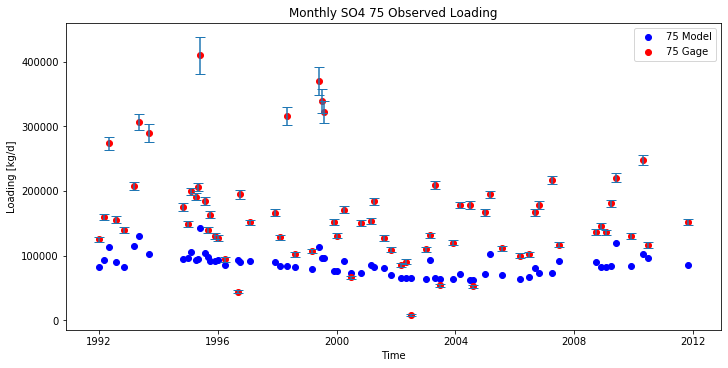

In [61]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(Ob75Dates, SO4_Modeled_75, color='blue', label='75 Model')
ax.scatter(Ob75Dates, LoadOb75SO4, color='red', label='75 Gage')
ax.errorbar(x = Ob75Dates, y = LoadOb75SO4, yerr = StdErrorSO4_75, ls='none', capsize = 5)
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly SO4 75 Observed Loading")
ax.legend()
#fig.savefig('{}/MonthlySO475_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'SO4 at 75 Residual')

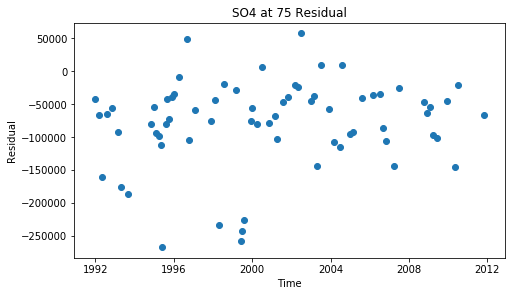

In [62]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(SO4_Residual_75.index, SO4_Residual_75)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('SO4 at 75 Residual')
#fig.savefig('{}/MonthlySO4Res75_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly SO4 at 75 Percent Difference Residual')

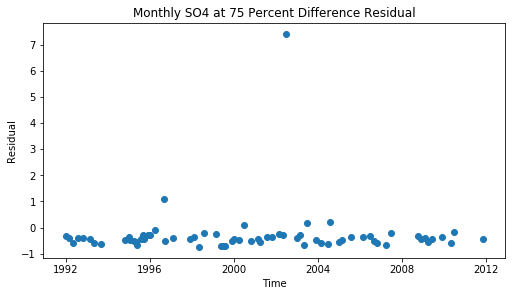

In [63]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(SO4_PercRes_75.index, SO4_PercRes_75)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly SO4 at 75 Percent Difference Residual')
#fig.savefig('{}/MonthlySO4PercDiffRes75_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly SO4 at 75 Percent Difference Residual Histogram')

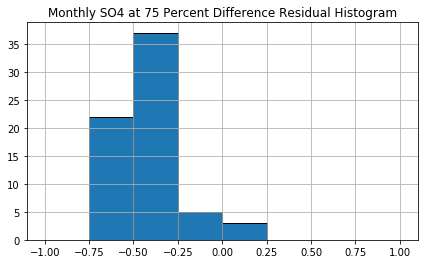

In [65]:
fig = plt.figure(figsize=(7,4))
ax = fig.gca()
SO4_PercRes_75.hist(ax=ax, range=(-1,1), edgecolor='black',bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.set_title("Monthly SO4 at 75 Percent Difference Residual Histogram")
#fig.savefig('{}/MonthlySO4PercDiffRes75_Hist_{}.png'.format(FigurePath, FigureSuffix))

Calcium

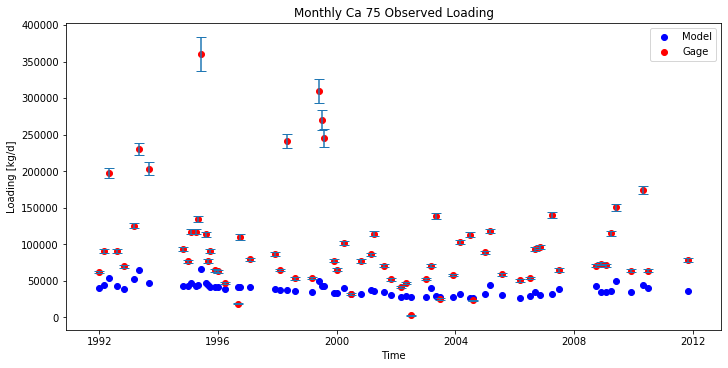

In [67]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(Ob75Dates, Ca_Modeled_75, color='blue', label='Model')
ax.scatter(Ob75Dates, LoadOb75Ca, color='red', label='Gage')
ax.errorbar(x = Ob75Dates, y = LoadOb75Ca, yerr = StdErrorCa_75, ls='none', capsize = 5)
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly Ca 75 Observed Loading")
ax.legend()
#fig.savefig('{}/MonthlyCa75_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Ca at 75 Residual')

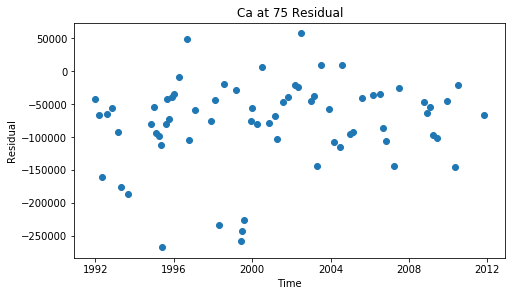

In [68]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Ca_Residual_75.index, Ca_Residual_75)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Ca at 75 Residual')
#fig.savefig('{}/MonthlyCaRes75_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Ca at 75 Percent Difference Residual')

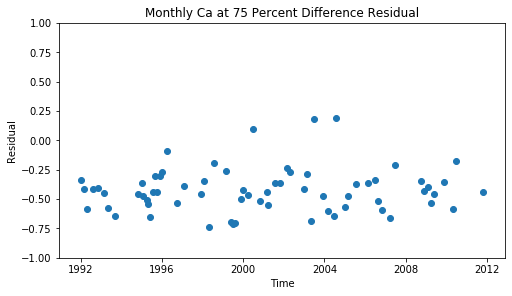

In [69]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Ca_PercRes_75.index, Ca_PercRes_75)
ax.set_ylim([-1,1])
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly Ca at 75 Percent Difference Residual')
#fig.savefig('{}/MonthlyCaPercDiffRes75_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'MonthlyCa at 75 Percent Difference Residual Histogram')

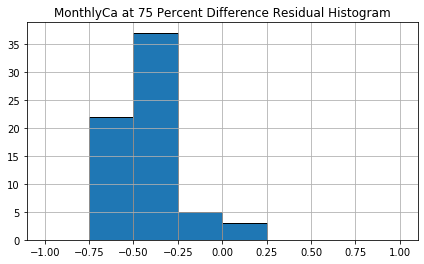

In [70]:
fig = plt.figure(figsize=(7,4))
ax = fig.gca()
Ca_PercRes_75.hist(ax=ax, range=(-1,1), edgecolor='black',bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.set_title("MonthlyCa at 75 Percent Difference Residual Histogram")
#fig.savefig('{}/MonthlyCaPercDiffRes75_Hist_{}.png'.format(FigurePath, FigureSuffix))

Magnesium

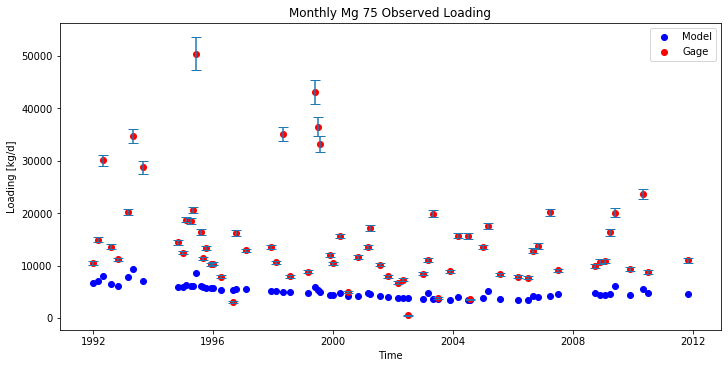

In [72]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(Ob75Dates, Mg_Modeled_75, color='blue', label='Model')
ax.scatter(Ob75Dates, LoadOb75Mg, color='red', label='Gage')
ax.errorbar(x = Ob75Dates, y = LoadOb75Mg, yerr = StdErrorMg_75, ls='none', capsize = 5)
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly Mg 75 Observed Loading")
ax.legend()
#fig.savefig('{}/MonthlyMg75_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Mg at 75 Residual')

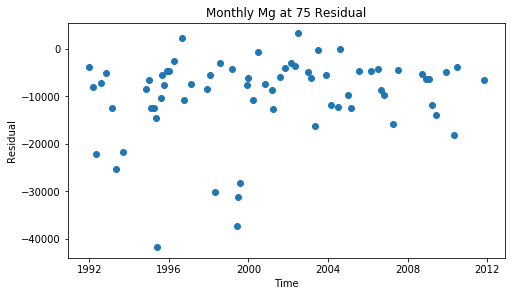

In [73]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Mg_Residual_75.index, Mg_Residual_75)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly Mg at 75 Residual')
#fig.savefig('{}/MonthlyMgRes75_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Mg at 75 Percent Difference Residual')

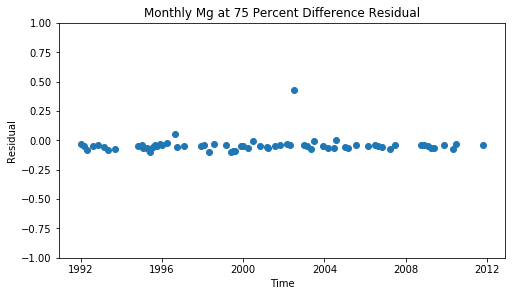

In [74]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Mg_PercRes_75.index, Mg_PercRes_75)
ax.set_ylim([-1,1])
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly Mg at 75 Percent Difference Residual')
#fig.savefig('{}/MonthlyMgPercDiffRes75_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Mg at 75 Percent Difference Residual Histogram')

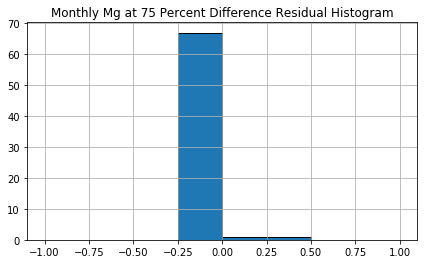

In [75]:
fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.gca()
Mg_PercRes_75.hist(ax=ax, range=(-1,1), edgecolor='black',bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.set_title("Monthly Mg at 75 Percent Difference Residual Histogram")
#fig.savefig('{}/MonthlyMgPercDiffRes75_Hist_{}.png'.format(FigurePath, FigureSuffix))

Sodium

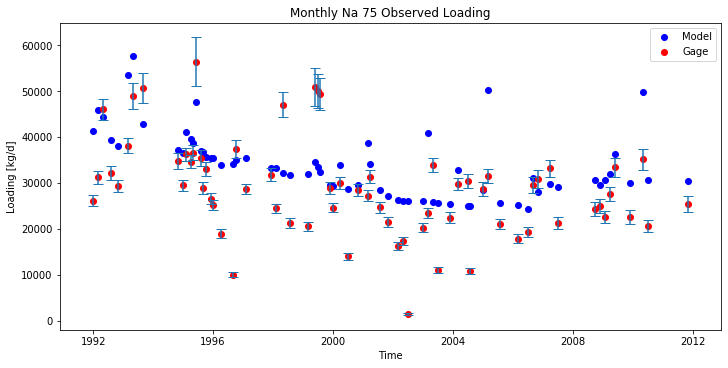

In [76]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(Ob75Dates, Na_Modeled_75, color='blue', label='Model')
ax.scatter(Ob75Dates, LoadOb75Na, color='red', label='Gage')
ax.errorbar(x = Ob75Dates, y = LoadOb75Na, yerr = StdErrorNa_75, ls='none', capsize = 5)
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly Na 75 Observed Loading")
ax.legend()
#fig.savefig('{}/MonthlyNa75_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Na at 75 Residual')

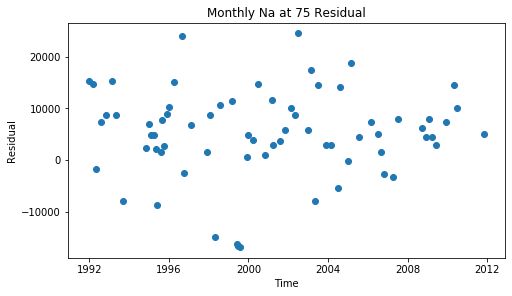

In [77]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Na_Residual_75.index, Na_Residual_75)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly Na at 75 Residual')
#fig.savefig('{}/MonthlyNaRes75_{}.png'.format(FigurePath,FigureSuffix))

Text(0.5, 1.0, 'Monthly Na at 75 Percent Difference Residual')

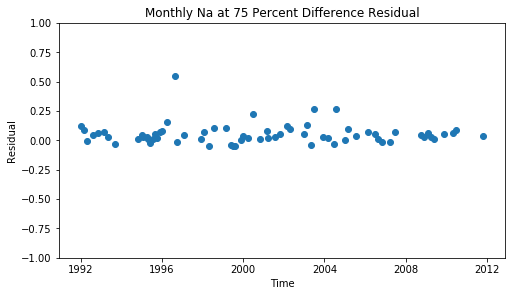

In [78]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Na_PercRes_75.index, Na_PercRes_75)
ax.set_ylim([-1,1])
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly Na at 75 Percent Difference Residual')
#fig.savefig('{}/MonthlyNaPercDiffRes75_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Na at 75 Percent Difference Residual Histogram')

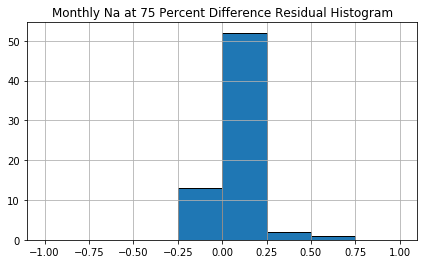

In [79]:
fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.gca()
Na_PercRes_75.hist(ax=ax, range=(-1,1), edgecolor='black',bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.set_title("Monthly Na at 75 Percent Difference Residual Histogram")
#fig.savefig('{}/MonthlyNaPercDiffRes75_Hist_{}.png'.format(FigurePath, FigureSuffix))

Potassium

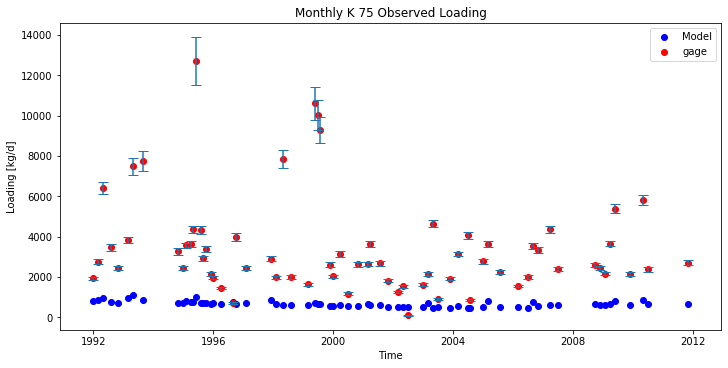

In [80]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(Ob75Dates, K_Modeled_75, color='blue', label='Model')
ax.scatter(Ob75Dates, LoadOb75K, color='red', label='gage')
ax.errorbar(x = Ob75Dates, y = LoadOb75K, yerr = StdErrorK_75, ls='none', capsize = 5)
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly K 75 Observed Loading")
ax.legend()
#fig.savefig('{}/MonthlyK75_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly K at 75 Residual')

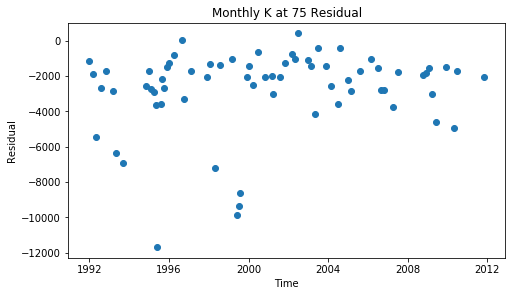

In [81]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(K_Residual_75.index, K_Residual_75)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly K at 75 Residual')
#fig.savefig('{}/MonthlyKRes75_{}.png'.format(FigurePath,FigureSuffix))

Text(0.5, 1.0, 'Monthly K at 75 Percent Difference Residual')

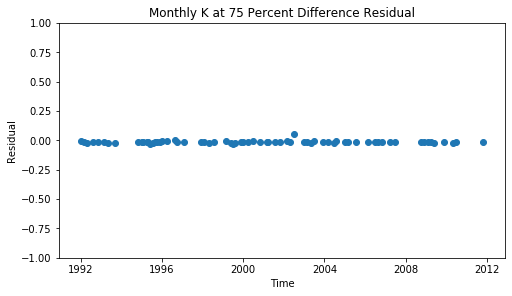

In [82]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(K_PercRes_75.index, K_PercRes_75)
ax.set_ylim([-1,1])
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly K at 75 Percent Difference Residual')
#fig.savefig('{}/MonthlyKPercDiffRes75_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly K at 75 Percent Difference Residual Histogram')

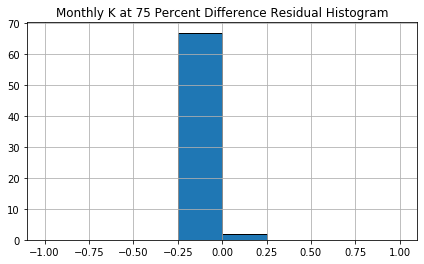

In [83]:
fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.gca()
K_PercRes_75.hist(ax=ax, range=(-1,1), edgecolor='black',bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.set_title("Monthly K at 75 Percent Difference Residual Histogram")
#fig.savefig('{}/MonthlyKPercDiffRes75_Hist_{}.png'.format(FigurePath, FigureSuffix))

Chlorine

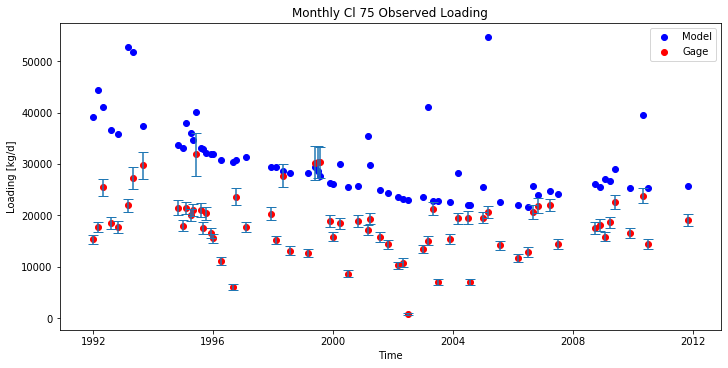

In [84]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(Ob75Dates, Cl_Modeled_75, color='blue', label='Model')
ax.scatter(Ob75Dates, LoadOb75Cl, color='red', label='Gage')
ax.errorbar(x = Ob75Dates, y = LoadOb75Cl, yerr = StdErrorCl_75, ls='none', capsize = 5)
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly Cl 75 Observed Loading")
ax.legend()
#fig.savefig('{}/MonthlyCl75_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Cl at 75 Residual')

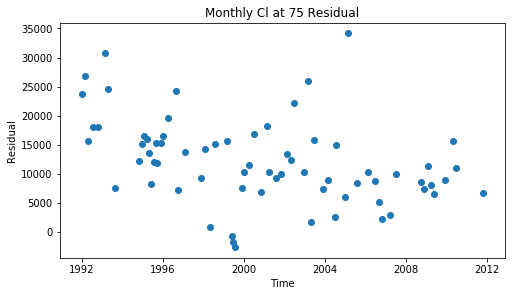

In [85]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Cl_Residual_75.index, Cl_Residual_75)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly Cl at 75 Residual')
#fig.savefig('{}/MonthlyClRes75_{}.png'.format(FigurePath,FigureSuffix))

Text(0.5, 1.0, 'Monthly Cl at 75 Percent Difference Residual')

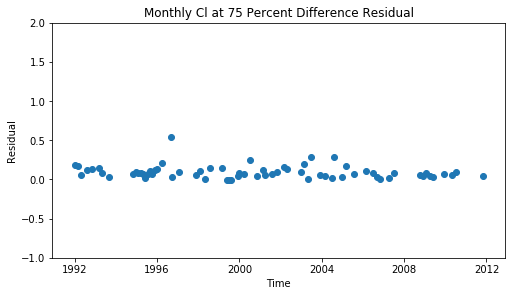

In [86]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Cl_PercRes_75.index, Cl_PercRes_75)
ax.set_ylim([-1,2])
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly Cl at 75 Percent Difference Residual')
#fig.savefig('{}/MonthlyClPercDiffRes75_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Cl at 75 Percent Difference Residual Histogram')

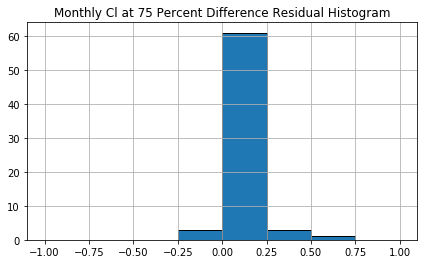

In [87]:
fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.gca()
Cl_PercRes_75.hist(ax=ax, range=(-1,1), edgecolor='black',bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.set_title("Monthly Cl at 75 Percent Difference Residual Histogram")
#fig.savefig('{}/MonthlyClPercDiffRes75_Hist_{}.png'.format(FigurePath, FigureSuffix))

Carbonate

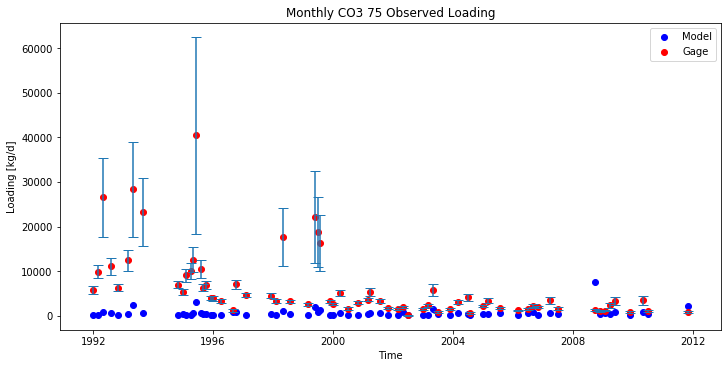

In [88]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(Ob75Dates, CO3_Modeled_75, color='blue', label='Model')
ax.scatter(Ob75Dates, LoadOb75CO3, color='red', label='Gage')
ax.errorbar(x = Ob75Dates, y = LoadOb75CO3, yerr = StdErrorCO3_75, ls='none', capsize = 5)
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly CO3 75 Observed Loading")
ax.legend()
#fig.savefig('{}/MonthlyCO375_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly CO3 at 75 Residual')

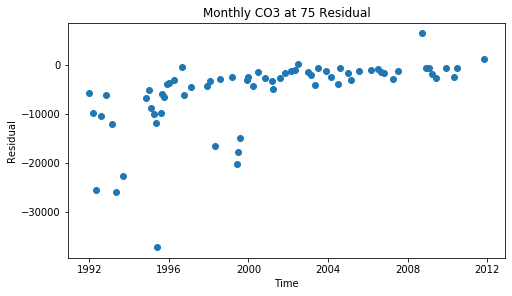

In [89]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(CO3_Residual_75.index, CO3_Residual_75)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly CO3 at 75 Residual')
#fig.savefig('{}/MonthlyCO3Res75_{}.png'.format(FigurePath,FigureSuffix))

Text(0.5, 1.0, 'Monthly CO3 at 75 Percent Difference Residual')

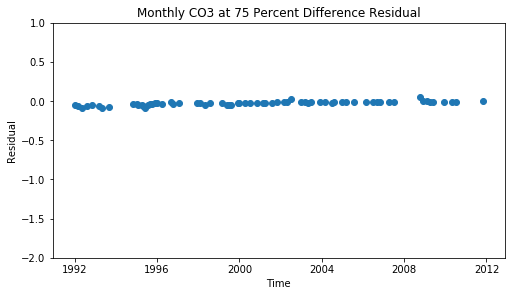

In [90]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(CO3_PercRes_75.index, CO3_PercRes_75)
ax.set_ylim([-2,1])
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly CO3 at 75 Percent Difference Residual')
#fig.savefig('{}/MonthlyCO3PercDiffRes75_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly CO3 at 75 Percent Difference Residual Histogram')

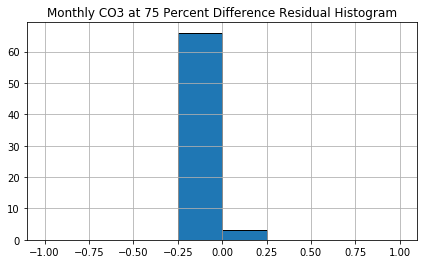

In [91]:
fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.gca()
CO3_PercRes_75.hist(ax=ax, range=(-1,1), edgecolor='black',bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.set_title("Monthly CO3 at 75 Percent Difference Residual Histogram")
#fig.savefig('{}/MonthlyCO3PercDiffRes75_Hist_{}.png'.format(FigurePath, FigureSuffix))

Bicarbonate

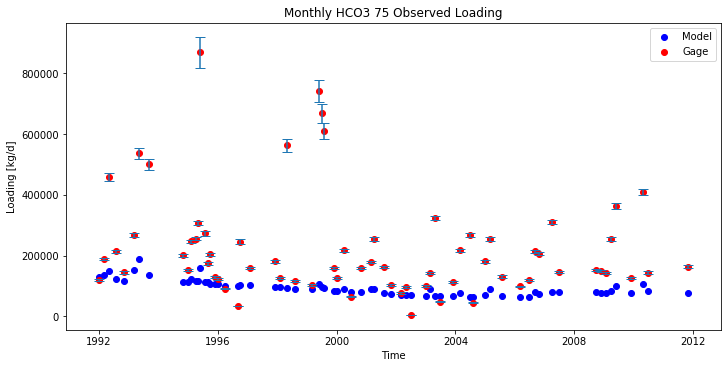

In [92]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(Ob75Dates, HCO3_Modeled_75, color='blue', label='Model')
ax.scatter(Ob75Dates, LoadOb75HCO3, color='red', label='Gage')
ax.errorbar(x = Ob75Dates, y = LoadOb75HCO3, yerr = StdErrorHCO3_75, ls='none', capsize = 5)
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly HCO3 75 Observed Loading")
ax.legend()
#fig.savefig('{}/MonthlyHCO375_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly HCO3 at 75 Residual')

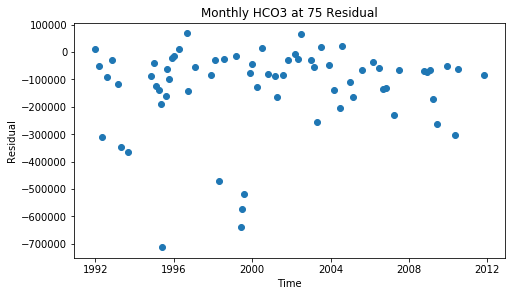

In [93]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(HCO3_Residual_75.index, HCO3_Residual_75)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly HCO3 at 75 Residual')
#fig.savefig('{}/MonthlyHCO3Res75_{}.png'.format(FigurePath,FigureSuffix))

Text(0.5, 1.0, 'Monthly HCO3 at 75 Percent Difference Residual')

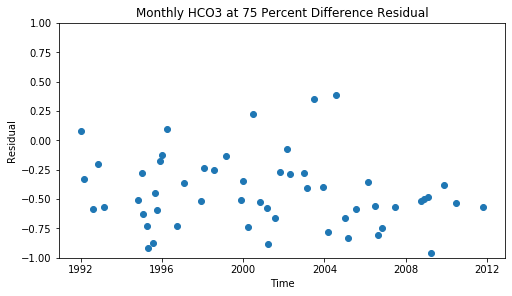

In [94]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(HCO3_PercRes_75.index, HCO3_PercRes_75)
ax.set_ylim([-1,1])
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly HCO3 at 75 Percent Difference Residual')
#fig.savefig('{}/MonthlyHCO3PercDiffRes75_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly HCO3 at 75 Percent Difference Residual Histogram')

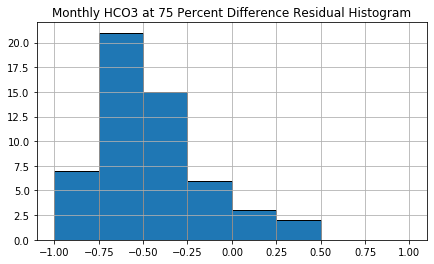

In [95]:
fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.gca()
HCO3_PercRes_75.hist(ax=ax, range=(-1,1), edgecolor='black',bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.set_title("Monthly HCO3 at 75 Percent Difference Residual Histogram")
#fig.savefig('{}/MonthlyHCO3PercDiffRes75_Hist_{}.png'.format(FigurePath, FigureSuffix))

##### Model Deviation 

In [96]:
SO4_ModelSum_75 = pd.DataFrame.sum(SO4_Modeled_75, axis = 0)
SO4_ObsvdSum_75 = pd.DataFrame.sum(LoadOb75SO4, axis = 0)
Ca_ModelSum_75 = pd.DataFrame.sum(Ca_Modeled_75, axis = 0)
Ca_ObsvdSum_75 = pd.DataFrame.sum(LoadOb75Ca, axis = 0)
Mg_ModelSum_75 = pd.DataFrame.sum(Mg_Modeled_75, axis = 0)
Mg_ObsvdSum_75 = pd.DataFrame.sum(LoadOb75Mg, axis = 0)
Na_ModelSum_75 = pd.DataFrame.sum(Na_Modeled_75, axis = 0)
Na_ObsvdSum_75 = pd.DataFrame.sum(LoadOb75Na, axis = 0)
K_ModelSum_75 = pd.DataFrame.sum(K_Modeled_75, axis = 0)
K_ObsvdSum_75 = pd.DataFrame.sum(LoadOb75K, axis = 0)
Cl_ModelSum_75 = pd.DataFrame.sum(Cl_Modeled_75, axis = 0)
Cl_ObsvdSum_75 = pd.DataFrame.sum(LoadOb75Cl, axis = 0)
CO3_ModelSum_75 = pd.DataFrame.sum(CO3_Modeled_75, axis = 0)
CO3_ObsvdSum_75 = pd.DataFrame.sum(LoadOb75CO3, axis = 0)
HCO3_ModelSum_75 = pd.DataFrame.sum(HCO3_Modeled_75, axis = 0)
HCO3_ObsvdSum_75 = pd.DataFrame.sum(LoadOb75HCO3, axis = 0)

SO4_Deviation_75 = SO4_ModelSum_75 / SO4_ObsvdSum_75
SO4_Dev_75 = SO4_Deviation_75.iloc[0]
Ca_Deviation_75 = Ca_ModelSum_75 / Ca_ObsvdSum_75
Ca_Dev_75 = Ca_Deviation_75.iloc[0]
Mg_Deviation_75 = Mg_ModelSum_75 / Mg_ObsvdSum_75
Mg_Dev_75 = Mg_Deviation_75.iloc[0]
Na_Deviation_75 = Na_ModelSum_75 / Na_ObsvdSum_75
Na_Dev_75 = Na_Deviation_75.iloc[0]
K_Deviation_75 = K_ModelSum_75 / K_ObsvdSum_75
K_Dev_75 = K_Deviation_75.iloc[0]
Cl_Deviation_75 = Cl_ModelSum_75 / Cl_ObsvdSum_75
Cl_Dev_75 = Cl_Deviation_75.iloc[0]
CO3_Deviation_75 = CO3_ModelSum_75 / CO3_ObsvdSum_75
CO3_Dev_75 = CO3_Deviation_75.iloc[0]
HCO3_Deviation_75 = HCO3_ModelSum_75 / HCO3_ObsvdSum_75
HCO3_Dev_75 = HCO3_Deviation_75.iloc[0]

Text(0, 0.5, 'Deviation')

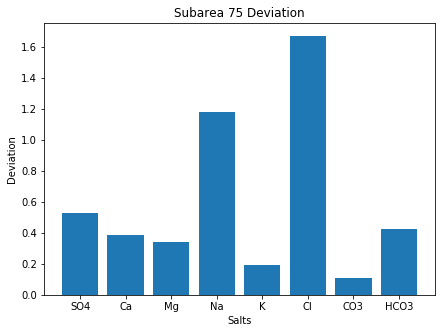

In [97]:
fig, ax = plt.subplots(figsize = (7,5))
salts = ['SO4', 'Ca', 'Mg', 'Na', 'K', 'Cl', 'CO3', 'HCO3']
Deviation_75 =[SO4_Dev_75, Ca_Dev_75, Mg_Dev_75, Na_Dev_75, K_Dev_75, Cl_Dev_75, CO3_Dev_75, HCO3_Dev_75]
ax.bar(salts, Deviation_75)
ax.set_title('Subarea 75 Deviation')
ax.set_xlabel('Salts')
ax.set_ylabel('Deviation')
#fig.savefig('{}/Deviation_75_{}.png'.format(FigurePath, FigureSuffix))

##### Root Mean Square Error

###### Difference

In [98]:
SO4_Difference_75 = pd.DataFrame.sub(SO4_Modeled_75, LoadOb75SO4, axis=0)
Ca_Difference_75 = pd.DataFrame.sub(Ca_Modeled_75, LoadOb75Ca, axis=0)
Mg_Difference_75 = pd.DataFrame.sub(Mg_Modeled_75, LoadOb75Mg, axis=0)
Na_Difference_75 = pd.DataFrame.sub(Na_Modeled_75, LoadOb75Na, axis=0)
K_Difference_75 = pd.DataFrame.sub(K_Modeled_75, LoadOb75K, axis=0)
Cl_Difference_75 = pd.DataFrame.sub(Cl_Modeled_75, LoadOb75Cl, axis=0)
CO3_Difference_75 = pd.DataFrame.sub(CO3_Modeled_75, LoadOb75CO3, axis=0)
HCO3_Difference_75 = pd.DataFrame.sub(HCO3_Modeled_75, LoadOb75HCO3, axis=0)

###### Square Difference

In [99]:
SO4_DiffSqrd_75 = SO4_Difference_75**2
Ca_DiffSqrd_75 = Ca_Difference_75**2
Mg_DiffSqrd_75 = Mg_Difference_75**2
Na_DiffSqrd_75 = Na_Difference_75**2
K_DiffSqrd_75 = K_Difference_75**2
Cl_DiffSqrd_75 = Cl_Difference_75**2
CO3_DiffSqrd_75 = CO3_Difference_75**2
HCO3_DiffSqrd_75 = HCO3_Difference_75**2

######  Sum of Square Difference

In [100]:
SO4_DiffSqrdSum_75 = pd.DataFrame.sum(SO4_DiffSqrd_75, axis=0)
SO4_DSSum_75 = SO4_DiffSqrdSum_75.iloc[0]
Ca_DiffSqrdSum_75 = pd.DataFrame.sum(Ca_DiffSqrd_75, axis=0)
Ca_DSSum_75 = Ca_DiffSqrdSum_75.iloc[0]
Mg_DiffSqrdSum_75 = pd.DataFrame.sum(Mg_DiffSqrd_75, axis=0)
Mg_DSSum_75 = Mg_DiffSqrdSum_75.iloc[0]
Na_DiffSqrdSum_75 = pd.DataFrame.sum(Na_DiffSqrd_75, axis=0)
Na_DSSum_75 = Na_DiffSqrdSum_75.iloc[0]
K_DiffSqrdSum_75 = pd.DataFrame.sum(K_DiffSqrd_75, axis=0)
K_DSSum_75 = K_DiffSqrdSum_75.iloc[0]
Cl_DiffSqrdSum_75 = pd.DataFrame.sum(Cl_DiffSqrd_75, axis=0)
Cl_DSSum_75 = Cl_DiffSqrdSum_75.iloc[0]
CO3_DiffSqrdSum_75 = pd.DataFrame.sum(CO3_DiffSqrd_75, axis=0)
CO3_DSSum_75 = CO3_DiffSqrdSum_75.iloc[0]
HCO3_DiffSqrdSum_75 = pd.DataFrame.sum(HCO3_DiffSqrd_75, axis=0)
HCO3_DSSum_75 = HCO3_DiffSqrdSum_75.iloc[0]

###### Count of Values (n)

In [101]:
SO4_Count_75 = SO4_Modeled_75.count(axis=0)
Ca_Count_75 = Ca_Modeled_75.count(axis=0)
Mg_Count_75 = Mg_Modeled_75.count(axis=0)
Na_Count_75 = Na_Modeled_75.count(axis=0)
K_Count_75 = K_Modeled_75.count(axis=0)
Cl_Count_75 = Cl_Modeled_75.count(axis=0)
CO3_Count_75 = CO3_Modeled_75.count(axis=0)
HCO3_Count_75 = HCO3_Modeled_75.count(axis=0)

###### 1/n

In [102]:
SO4_InvCount_75 = 1/SO4_Count_75
Ca_InvCount_75 = 1/Ca_Count_75
Mg_InvCount_75 = 1/Mg_Count_75
Na_InvCount_75 = 1/Na_Count_75
K_InvCount_75 = 1/K_Count_75
Cl_InvCount_75 = 1/Cl_Count_75
CO3_InvCount_75 = 1/CO3_Count_75
HCO3_InvCount_75 = 1/HCO3_Count_75

###### Multiply Inv Count and DSSum

In [103]:
SO4_SE_75 = SO4_InvCount_75*SO4_DSSum_75
Ca_SE_75 = Ca_InvCount_75*Ca_DSSum_75
Mg_SE_75 = Mg_InvCount_75*Mg_DSSum_75
Na_SE_75 = Na_InvCount_75*Na_DSSum_75
K_SE_75 = K_InvCount_75*K_DSSum_75
Cl_SE_75 = Cl_InvCount_75*Cl_DSSum_75
CO3_SE_75 = CO3_InvCount_75*CO3_DSSum_75
HCO3_SE_75 = HCO3_InvCount_75*HCO3_DSSum_75

###### Square Root

In [104]:
SO4_RMSQE_75 = SO4_SE_75**(1/2)
SO4_RMSE_75 = SO4_RMSQE_75.iloc[0]
Mg_RMSQE_75 = Mg_SE_75**(1/2)
Mg_RMSE_75 = Mg_RMSQE_75.iloc[0]
Ca_RMSQE_75 = Ca_SE_75**(1/2)
Ca_RMSE_75 = Ca_RMSQE_75.iloc[0]
Na_RMSQE_75 = Na_SE_75**(1/2)
Na_RMSE_75 = Na_RMSQE_75.iloc[0]
K_RMSQE_75 = K_SE_75**(1/2)
K_RMSE_75 = K_RMSQE_75.iloc[0]
Cl_RMSQE_75 = Cl_SE_75**(1/2)
Cl_RMSE_75 = Cl_RMSQE_75.iloc[0]
CO3_RMSQE_75 = CO3_SE_75**(1/2)
CO3_RMSE_75 = CO3_RMSQE_75.iloc[0]
HCO3_RMSQE_75 = HCO3_SE_75**(1/2)
HCO3_RMSE_75 = HCO3_RMSQE_75.iloc[0]

Text(0, 0.5, 'RMSE')

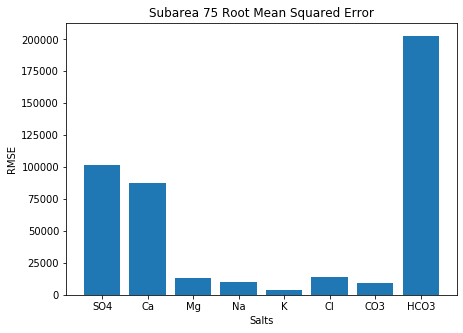

In [105]:
fig, ax = plt.subplots(figsize = (7,5))
salts = ['SO4', 'Ca', 'Mg', 'Na', 'K', 'Cl', 'CO3', 'HCO3']
RMSE_75 =[SO4_RMSE_75, Ca_RMSE_75, Mg_RMSE_75, Na_RMSE_75, K_RMSE_75, Cl_RMSE_75, CO3_RMSE_75, HCO3_RMSE_75]
ax.bar(salts, RMSE_75)
ax.set_title('Subarea 75 Root Mean Squared Error')
ax.set_xlabel('Salts')
ax.set_ylabel('RMSE')
#fig.savefig('{}/RootMeanSquaredError_75_{}.png'.format(FigurePath, FigureSuffix))

##### Nash-Sutcliffe Error

###### Average of Observed Data 

In [106]:
SO4_AvgObs_75 = LoadOb75SO4.mean()
Ca_AvgObs_75 = LoadOb75Ca.mean()
Mg_AvgObs_75 = LoadOb75Mg.mean()
Na_AvgObs_75 = LoadOb75Na.mean()
K_AvgObs_75 = LoadOb75K.mean()
Cl_AvgObs_75 = LoadOb75Cl.mean()
CO3_AvgObs_75 = LoadOb75CO3.mean()
HCO3_AvgObs_75 = LoadOb75HCO3.mean()

###### Observed - AvgObs

In [107]:
SO4_DiffAvgObs_75 = LoadOb75SO4 - SO4_AvgObs_75
Ca_DiffAvgObs_75 = LoadOb75Ca - Ca_AvgObs_75
Mg_DiffAvgObs_75 = LoadOb75Mg - Mg_AvgObs_75
Na_DiffAvgObs_75 = LoadOb75Na - Na_AvgObs_75
K_DiffAvgObs_75 = LoadOb75K - K_AvgObs_75
Cl_DiffAvgObs_75 = LoadOb75Cl - Cl_AvgObs_75
CO3_DiffAvgObs_75 = LoadOb75CO3 - CO3_AvgObs_75
HCO3_DiffAvgObs_75 = LoadOb75HCO3 - HCO3_AvgObs_75

###### Square DiffAvgObs

In [108]:
SO4_SqDiffAvgObs_75 = SO4_DiffAvgObs_75**2
Ca_SqDiffAvgObs_75 = Ca_DiffAvgObs_75**2
Mg_SqDiffAvgObs_75 = Mg_DiffAvgObs_75**2
Na_SqDiffAvgObs_75 = Na_DiffAvgObs_75**2
K_SqDiffAvgObs_75 = K_DiffAvgObs_75**2
Cl_SqDiffAvgObs_75 = Cl_DiffAvgObs_75**2
CO3_SqDiffAvgObs_75 = CO3_DiffAvgObs_75**2
HCO3_SqDiffAvgObs_75 = HCO3_DiffAvgObs_75**2

###### Sum of SquareDiffAvgObs

In [109]:
SO4_SumSqDiffAvgObs_75 = pd.DataFrame.sum(SO4_SqDiffAvgObs_75, axis=0)
Ca_SumSqDiffAvgObs_75 = pd.DataFrame.sum(Ca_SqDiffAvgObs_75, axis=0)
Mg_SumSqDiffAvgObs_75 = pd.DataFrame.sum(Mg_SqDiffAvgObs_75, axis=0)
Na_SumSqDiffAvgObs_75 = pd.DataFrame.sum(Na_SqDiffAvgObs_75, axis=0)
K_SumSqDiffAvgObs_75 = pd.DataFrame.sum(K_SqDiffAvgObs_75, axis=0)
Cl_SumSqDiffAvgObs_75 = pd.DataFrame.sum(Cl_SqDiffAvgObs_75, axis=0)
CO3_SumSqDiffAvgObs_75 = pd.DataFrame.sum(CO3_SqDiffAvgObs_75, axis=0)
HCO3_SumSqDiffAvgObs_75 = pd.DataFrame.sum(HCO3_SqDiffAvgObs_75, axis=0)

###### Divide Model Sum Sq Diff with Observed Sum Sq Diff

In [110]:
SO4_ModelObsSum_75 = SO4_DiffSqrdSum_75 / SO4_SumSqDiffAvgObs_75
Ca_ModelObsSum_75 = Ca_DiffSqrdSum_75 / Ca_SumSqDiffAvgObs_75
Mg_ModelObsSum_75 = Mg_DiffSqrdSum_75 / Mg_SumSqDiffAvgObs_75
Na_ModelObsSum_75 = Na_DiffSqrdSum_75 / Na_SumSqDiffAvgObs_75
K_ModelObsSum_75 = K_DiffSqrdSum_75 / K_SumSqDiffAvgObs_75
Cl_ModelObsSum_75 = Cl_DiffSqrdSum_75 / Cl_SumSqDiffAvgObs_75
CO3_ModelObsSum_75 = CO3_DiffSqrdSum_75 / CO3_SumSqDiffAvgObs_75
HCO3_ModelObsSum_75 = HCO3_DiffSqrdSum_75 / HCO3_SumSqDiffAvgObs_75

###### 1 - Division

In [111]:
SO4_NashSCE_75 = 1 - SO4_ModelObsSum_75
SO4_NSCE_75 = SO4_NashSCE_75.iloc[0]
Ca_NashSCE_75 = 1 - Ca_ModelObsSum_75
Ca_NSCE_75 = Ca_NashSCE_75.iloc[0]
Mg_NashSCE_75 = 1 - Mg_ModelObsSum_75
Mg_NSCE_75 = SO4_NashSCE_75.iloc[0]
Na_NashSCE_75 = 1 - Na_ModelObsSum_75
Na_NSCE_75 = Mg_NashSCE_75.iloc[0]
K_NashSCE_75 = 1 - K_ModelObsSum_75
K_NSCE_75 = K_NashSCE_75.iloc[0]
Cl_NashSCE_75 = 1 - Cl_ModelObsSum_75
Cl_NSCE_75 = Cl_NashSCE_75.iloc[0]
CO3_NashSCE_75 = 1 - CO3_ModelObsSum_75
CO3_NSCE_75 = CO3_NashSCE_75.iloc[0]
HCO3_NashSCE_75 = 1 - HCO3_ModelObsSum_75
HCO3_NSCE_75 = HCO3_NashSCE_75.iloc[0]

Text(0, 0.5, 'NSCE')

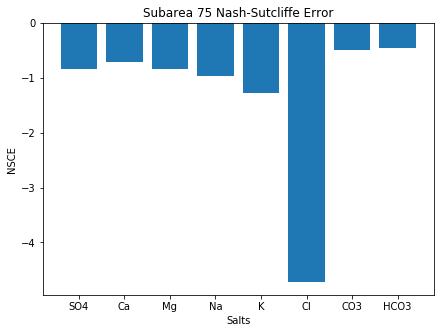

In [112]:
fig, ax = plt.subplots(figsize = (7,5))
salts = ['SO4', 'Ca', 'Mg', 'Na', 'K', 'Cl', 'CO3', 'HCO3']
NSCE_75 =[SO4_NSCE_75, Ca_NSCE_75, Mg_NSCE_75, Na_NSCE_75, K_NSCE_75, Cl_NSCE_75, CO3_NSCE_75, HCO3_NSCE_75]
ax.bar(salts, NSCE_75)
ax.set_title('Subarea 75 Nash-Sutcliffe Error')
ax.set_xlabel('Salts')
ax.set_ylabel('NSCE')
#fig.savefig('{}/NSCE_75_{}.png'.format(FigurePath, FigureSuffix))

### Subarea 12

In [113]:
Sub12 = Mod[Mod.subarea == 12]

In [114]:
###Year = 1992#######################################################################################################
Sub12_1992 = Sub12[Sub12.year == 1992]
Sub12_1992_index = Sub12_1992.set_index("day") 
##Months 3, 4, 5, 6, 7, 9, 11
##Month 3######################################################################################################
Sub12_1992_3 = Sub12_1992_index.loc[61:91]
#SO4
Sub12_1992_3_LoadSO4 = Sub12_1992_3.load_so4
Sub12_1992_3_SO4_mean = Sub12_1992_3_LoadSO4.mean(axis='index')
#Ca
Sub12_1992_3_LoadCa = Sub12_1992_3.load_ca
Sub12_1992_3_Ca_mean = Sub12_1992_3_LoadCa.mean(axis='index')
#Mg
Sub12_1992_3_LoadMg = Sub12_1992_3.load_mg
Sub12_1992_3_Mg_mean = Sub12_1992_3_LoadMg.mean(axis='index')
#Na
Sub12_1992_3_LoadNa = Sub12_1992_3.load_na
Sub12_1992_3_Na_mean = Sub12_1992_3_LoadNa.mean(axis='index')
#K
Sub12_1992_3_LoadK = Sub12_1992_3.load_k
Sub12_1992_3_K_mean = Sub12_1992_3_LoadK.mean(axis='index')
#Cl
Sub12_1992_3_LoadCl = Sub12_1992_3.load_cl
Sub12_1992_3_Cl_mean = Sub12_1992_3_LoadCl.mean(axis='index')
#CO3
Sub12_1992_3_LoadCO3 = Sub12_1992_3.load_co3
Sub12_1992_3_CO3_mean = Sub12_1992_3_LoadCO3.mean(axis='index')
#HCO3
Sub12_1992_3_LoadHCO3 = Sub12_1992_3.load_hco3
Sub12_1992_3_HCO3_mean = Sub12_1992_3_LoadHCO3.mean(axis='index')
##Month 4##########################################################################################################
Sub12_1992_4 = Sub12_1992_index.loc[92:121]
#SO4
Sub12_1992_4_LoadSO4 = Sub12_1992_4.load_so4
Sub12_1992_4_SO4_mean = Sub12_1992_4_LoadSO4.mean(axis='index')
#Ca
Sub12_1992_4_LoadCa = Sub12_1992_4.load_ca
Sub12_1992_4_Ca_mean = Sub12_1992_4_LoadCa.mean(axis='index')
#Mg
Sub12_1992_4_LoadMg = Sub12_1992_4.load_mg
Sub12_1992_4_Mg_mean = Sub12_1992_4_LoadMg.mean(axis='index')
#Na
Sub12_1992_4_LoadNa = Sub12_1992_4.load_na
Sub12_1992_4_Na_mean = Sub12_1992_4_LoadNa.mean(axis='index')
#K
Sub12_1992_4_LoadK = Sub12_1992_4.load_k
Sub12_1992_4_K_mean = Sub12_1992_4_LoadK.mean(axis='index')
#Cl
Sub12_1992_4_LoadCl = Sub12_1992_4.load_cl
Sub12_1992_4_Cl_mean = Sub12_1992_4_LoadCl.mean(axis='index')
#CO3
Sub12_1992_4_LoadCO3 = Sub12_1992_4.load_co3
Sub12_1992_4_CO3_mean = Sub12_1992_4_LoadCO3.mean(axis='index')
#HCO3
Sub12_1992_4_LoadHCO3 = Sub12_1992_4.load_hco3
Sub12_1992_4_HCO3_mean = Sub12_1992_4_LoadHCO3.mean(axis='index')
##Month 5############################################################################################################
Sub12_1992_5 = Sub12_1992_index.loc[122:152]
#SO4
Sub12_1992_5_LoadSO4 = Sub12_1992_5.load_so4
Sub12_1992_5_SO4_mean = Sub12_1992_5_LoadSO4.mean(axis='index')
#Ca
Sub12_1992_5_LoadCa = Sub12_1992_5.load_ca
Sub12_1992_5_Ca_mean = Sub12_1992_5_LoadCa.mean(axis='index')
#Mg
Sub12_1992_5_LoadMg = Sub12_1992_5.load_mg
Sub12_1992_5_Mg_mean = Sub12_1992_5_LoadMg.mean(axis='index')
#Na
Sub12_1992_5_LoadNa = Sub12_1992_5.load_na
Sub12_1992_5_Na_mean = Sub12_1992_5_LoadNa.mean(axis='index')
#K
Sub12_1992_5_LoadK = Sub12_1992_5.load_k
Sub12_1992_5_K_mean = Sub12_1992_5_LoadK.mean(axis='index')
#Cl
Sub12_1992_5_LoadCl = Sub12_1992_5.load_cl
Sub12_1992_5_Cl_mean = Sub12_1992_5_LoadCl.mean(axis='index')
#CO3
Sub12_1992_5_LoadCO3 = Sub12_1992_5.load_co3
Sub12_1992_5_CO3_mean = Sub12_1992_5_LoadCO3.mean(axis='index')
#HCO3
Sub12_1992_5_LoadHCO3 = Sub12_1992_5.load_hco3
Sub12_1992_5_HCO3_mean = Sub12_1992_5_LoadHCO3.mean(axis='index')
##Month 6############################################################################################################
Sub12_1992_6 = Sub12_1992_index.loc[153:182]
#SO4
Sub12_1992_6_LoadSO4 = Sub12_1992_6.load_so4
Sub12_1992_6_SO4_mean = Sub12_1992_6_LoadSO4.mean(axis='index')
#Ca
Sub12_1992_6_LoadCa = Sub12_1992_6.load_ca
Sub12_1992_6_Ca_mean = Sub12_1992_6_LoadCa.mean(axis='index')
#Mg
Sub12_1992_6_LoadMg = Sub12_1992_6.load_mg
Sub12_1992_6_Mg_mean = Sub12_1992_6_LoadMg.mean(axis='index')
#Na
Sub12_1992_6_LoadNa = Sub12_1992_6.load_na
Sub12_1992_6_Na_mean = Sub12_1992_6_LoadNa.mean(axis='index')
#K
Sub12_1992_6_LoadK = Sub12_1992_6.load_k
Sub12_1992_6_K_mean = Sub12_1992_6_LoadK.mean(axis='index')
#Cl
Sub12_1992_6_LoadCl = Sub12_1992_6.load_cl
Sub12_1992_6_Cl_mean = Sub12_1992_6_LoadCl.mean(axis='index')
#CO3
Sub12_1992_6_LoadCO3 = Sub12_1992_6.load_co3
Sub12_1992_6_CO3_mean = Sub12_1992_6_LoadCO3.mean(axis='index')
#HCO3
Sub12_1992_6_LoadHCO3 = Sub12_1992_6.load_hco3
Sub12_1992_6_HCO3_mean = Sub12_1992_6_LoadHCO3.mean(axis='index')
##Month 7############################################################################################################
Sub12_1992_7 = Sub12_1992_index.loc[183:213]
#SO4
Sub12_1992_7_LoadSO4 = Sub12_1992_7.load_so4
Sub12_1992_7_SO4_mean = Sub12_1992_7_LoadSO4.mean(axis='index')
#Ca
Sub12_1992_7_LoadCa = Sub12_1992_7.load_ca
Sub12_1992_7_Ca_mean = Sub12_1992_7_LoadCa.mean(axis='index')
#Mg
Sub12_1992_7_LoadMg = Sub12_1992_7.load_mg
Sub12_1992_7_Mg_mean = Sub12_1992_7_LoadMg.mean(axis='index')
#Na
Sub12_1992_7_LoadNa = Sub12_1992_7.load_na
Sub12_1992_7_Na_mean = Sub12_1992_7_LoadNa.mean(axis='index')
#K
Sub12_1992_7_LoadK = Sub12_1992_7.load_k
Sub12_1992_7_K_mean = Sub12_1992_7_LoadK.mean(axis='index')
#Cl
Sub12_1992_7_LoadCl = Sub12_1992_7.load_cl
Sub12_1992_7_Cl_mean = Sub12_1992_7_LoadCl.mean(axis='index')
#CO3
Sub12_1992_7_LoadCO3 = Sub12_1992_7.load_co3
Sub12_1992_7_CO3_mean = Sub12_1992_7_LoadCO3.mean(axis='index')
#HCO3
Sub12_1992_7_LoadHCO3 = Sub12_1992_7.load_hco3
Sub12_1992_7_HCO3_mean = Sub12_1992_7_LoadHCO3.mean(axis='index')
##Month 9#########################################################################################################
Sub12_1992_9 = Sub12_1992_index.loc[245:274]
#SO4
Sub12_1992_9_LoadSO4 = Sub12_1992_9.load_so4
Sub12_1992_9_SO4_mean = Sub12_1992_9_LoadSO4.mean(axis='index')
#Ca
Sub12_1992_9_LoadCa = Sub12_1992_9.load_ca
Sub12_1992_9_Ca_mean = Sub12_1992_9_LoadCa.mean(axis='index')
#Mg
Sub12_1992_9_LoadMg = Sub12_1992_9.load_mg
Sub12_1992_9_Mg_mean = Sub12_1992_9_LoadMg.mean(axis='index')
#Na
Sub12_1992_9_LoadNa = Sub12_1992_9.load_na
Sub12_1992_9_Na_mean = Sub12_1992_9_LoadNa.mean(axis='index')
#K
Sub12_1992_9_LoadK = Sub12_1992_9.load_k
Sub12_1992_9_K_mean = Sub12_1992_9_LoadK.mean(axis='index')
#Cl
Sub12_1992_9_LoadCl = Sub12_1992_9.load_cl
Sub12_1992_9_Cl_mean = Sub12_1992_9_LoadCl.mean(axis='index')
#CO3
Sub12_1992_9_LoadCO3 = Sub12_1992_9.load_co3
Sub12_1992_9_CO3_mean = Sub12_1992_9_LoadCO3.mean(axis='index')
#HCO3
Sub12_1992_9_LoadHCO3 = Sub12_1992_9.load_hco3
Sub12_1992_9_HCO3_mean = Sub12_1992_9_LoadHCO3.mean(axis='index')
##Month 12#####################################################################################################
Sub12_1992_10 = Sub12_1992_index.loc[275:305]
#SO4
Sub12_1992_10_LoadSO4 = Sub12_1992_10.load_so4
Sub12_1992_10_SO4_mean = Sub12_1992_10_LoadSO4.mean(axis='index')
#Ca
Sub12_1992_10_LoadCa = Sub12_1992_10.load_ca
Sub12_1992_10_Ca_mean = Sub12_1992_10_LoadCa.mean(axis='index')
#Mg
Sub12_1992_10_LoadMg = Sub12_1992_10.load_mg
Sub12_1992_10_Mg_mean = Sub12_1992_10_LoadMg.mean(axis='index')
#Na
Sub12_1992_10_LoadNa = Sub12_1992_10.load_na
Sub12_1992_10_Na_mean = Sub12_1992_10_LoadNa.mean(axis='index')
#K
Sub12_1992_10_LoadK = Sub12_1992_10.load_k
Sub12_1992_10_K_mean = Sub12_1992_10_LoadK.mean(axis='index')
#Cl
Sub12_1992_10_LoadCl = Sub12_1992_10.load_cl
Sub12_1992_10_Cl_mean = Sub12_1992_10_LoadCl.mean(axis='index')
#CO3
Sub12_1992_10_LoadCO3 = Sub12_1992_10.load_co3
Sub12_1992_10_CO3_mean = Sub12_1992_10_LoadCO3.mean(axis='index')
#HCO3
Sub12_1992_10_LoadHCO3 = Sub12_1992_10.load_hco3
Sub12_1992_10_HCO3_mean = Sub12_1992_10_LoadHCO3.mean(axis='index')
###Year = 1993###################################################################################################
Sub12_1993 = Sub12[Sub12.year == 1993]
Sub12_1993_index = Sub12_1993.set_index("day")
##Months 4, 5, 6, 7, 10, 11###############################################################################
##Month 4###############################################################################################
Sub12_1993_4 = Sub12_1993_index.loc[92:121]
#SO4
Sub12_1993_4_LoadSO4 = Sub12_1993_4.load_so4
Sub12_1993_4_SO4_mean = Sub12_1993_4_LoadSO4.mean(axis='index')
#Ca
Sub12_1993_4_LoadCa = Sub12_1993_4.load_ca
Sub12_1993_4_Ca_mean = Sub12_1993_4_LoadCa.mean(axis='index')
#Mg
Sub12_1993_4_LoadMg = Sub12_1993_4.load_mg
Sub12_1993_4_Mg_mean = Sub12_1993_4_LoadMg.mean(axis='index')
#Na
Sub12_1993_4_LoadNa = Sub12_1993_4.load_na
Sub12_1993_4_Na_mean = Sub12_1993_4_LoadNa.mean(axis='index')
#K
Sub12_1993_4_LoadK = Sub12_1993_4.load_k
Sub12_1993_4_K_mean = Sub12_1993_4_LoadK.mean(axis='index')
#Cl
Sub12_1993_4_LoadCl = Sub12_1993_4.load_cl
Sub12_1993_4_Cl_mean = Sub12_1993_4_LoadCl.mean(axis='index')
#CO3
Sub12_1993_4_LoadCO3 = Sub12_1993_4.load_co3
Sub12_1993_4_CO3_mean = Sub12_1993_4_LoadCO3.mean(axis='index')
#HCO3
Sub12_1993_4_LoadHCO3 = Sub12_1993_4.load_hco3
Sub12_1993_4_HCO3_mean = Sub12_1993_4_LoadHCO3.mean(axis='index')
##Month 5######################################################################################################
Sub12_1993_5 = Sub12_1993_index.loc[121:151]
#SO4
Sub12_1993_5_LoadSO4 = Sub12_1993_5.load_so4
Sub12_1993_5_SO4_mean = Sub12_1993_5_LoadSO4.mean(axis='index')
#Ca
Sub12_1993_5_LoadCa = Sub12_1993_5.load_ca
Sub12_1993_5_Ca_mean = Sub12_1993_5_LoadCa.mean(axis='index')
#Mg
Sub12_1993_5_LoadMg = Sub12_1993_5.load_mg
Sub12_1993_5_Mg_mean = Sub12_1993_5_LoadMg.mean(axis='index')
#Na
Sub12_1993_5_LoadNa = Sub12_1993_5.load_na
Sub12_1993_5_Na_mean = Sub12_1993_5_LoadNa.mean(axis='index')
#K
Sub12_1993_5_LoadK = Sub12_1993_5.load_k
Sub12_1993_5_K_mean = Sub12_1993_5_LoadK.mean(axis='index')
#Cl
Sub12_1993_5_LoadCl = Sub12_1993_5.load_cl
Sub12_1993_5_Cl_mean = Sub12_1993_5_LoadCl.mean(axis='index')
#CO3
Sub12_1993_5_LoadCO3 = Sub12_1993_5.load_co3
Sub12_1993_5_CO3_mean = Sub12_1993_5_LoadCO3.mean(axis='index')
#HCO3
Sub12_1993_5_LoadHCO3 = Sub12_1993_5.load_hco3
Sub12_1993_5_HCO3_mean = Sub12_1993_5_LoadHCO3.mean(axis='index')
##Month 6######################################################################################################
Sub12_1993_6 = Sub12_1993_index.loc[152:181]
#SO4
Sub12_1993_6_LoadSO4 = Sub12_1993_6.load_so4
Sub12_1993_6_SO4_mean = Sub12_1993_6_LoadSO4.mean(axis='index')
#Ca
Sub12_1993_6_LoadCa = Sub12_1993_6.load_ca
Sub12_1993_6_Ca_mean = Sub12_1993_6_LoadCa.mean(axis='index')
#Mg
Sub12_1993_6_LoadMg = Sub12_1993_6.load_mg
Sub12_1993_6_Mg_mean = Sub12_1993_6_LoadMg.mean(axis='index')
#Na
Sub12_1993_6_LoadNa = Sub12_1993_6.load_na
Sub12_1993_6_Na_mean = Sub12_1993_6_LoadNa.mean(axis='index')
#K
Sub12_1993_6_LoadK = Sub12_1993_6.load_k
Sub12_1993_6_K_mean = Sub12_1993_6_LoadK.mean(axis='index')
#Cl
Sub12_1993_6_LoadCl = Sub12_1993_6.load_cl
Sub12_1993_6_Cl_mean = Sub12_1993_6_LoadCl.mean(axis='index')
#CO3
Sub12_1993_6_LoadCO3 = Sub12_1993_6.load_co3
Sub12_1993_6_CO3_mean = Sub12_1993_6_LoadCO3.mean(axis='index')
#HCO3
Sub12_1993_6_LoadHCO3 = Sub12_1993_6.load_hco3
Sub12_1993_6_HCO3_mean = Sub12_1993_6_LoadHCO3.mean(axis='index')
##Month 7######################################################################################################
Sub12_1993_7 = Sub12_1993_index.loc[182:212]
#SO4
Sub12_1993_7_LoadSO4 = Sub12_1993_7.load_so4
Sub12_1993_7_SO4_mean = Sub12_1993_7_LoadSO4.mean(axis='index')
#Ca
Sub12_1993_7_LoadCa = Sub12_1993_7.load_ca
Sub12_1993_7_Ca_mean = Sub12_1993_7_LoadCa.mean(axis='index')
#Mg
Sub12_1993_7_LoadMg = Sub12_1993_7.load_mg
Sub12_1993_7_Mg_mean = Sub12_1993_7_LoadMg.mean(axis='index')
#Na
Sub12_1993_7_LoadNa = Sub12_1993_7.load_na
Sub12_1993_7_Na_mean = Sub12_1993_7_LoadNa.mean(axis='index')
#K
Sub12_1993_7_LoadK = Sub12_1993_7.load_k
Sub12_1993_7_K_mean = Sub12_1993_7_LoadK.mean(axis='index')
#Cl
Sub12_1993_7_LoadCl = Sub12_1993_7.load_cl
Sub12_1993_7_Cl_mean = Sub12_1993_7_LoadCl.mean(axis='index')
#CO3
Sub12_1993_7_LoadCO3 = Sub12_1993_7.load_co3
Sub12_1993_7_CO3_mean = Sub12_1993_7_LoadCO3.mean(axis='index')
#HCO3
Sub12_1993_7_LoadHCO3 = Sub12_1993_7.load_hco3
Sub12_1993_7_HCO3_mean = Sub12_1993_7_LoadHCO3.mean(axis='index')
##Month 10######################################################################################################
Sub12_1993_10 = Sub12_1993_index.loc[274:304]
#SO4
Sub12_1993_10_LoadSO4 = Sub12_1993_10.load_so4
Sub12_1993_10_SO4_mean = Sub12_1993_10_LoadSO4.mean(axis='index')
#Ca
Sub12_1993_10_LoadCa = Sub12_1993_10.load_ca
Sub12_1993_10_Ca_mean = Sub12_1993_10_LoadCa.mean(axis='index')
#Mg
Sub12_1993_10_LoadMg = Sub12_1993_10.load_mg
Sub12_1993_10_Mg_mean = Sub12_1993_10_LoadMg.mean(axis='index')
#Na
Sub12_1993_10_LoadNa = Sub12_1993_10.load_na
Sub12_1993_10_Na_mean = Sub12_1993_10_LoadNa.mean(axis='index')
#K
Sub12_1993_10_LoadK = Sub12_1993_10.load_k
Sub12_1993_10_K_mean = Sub12_1993_10_LoadK.mean(axis='index')
#Cl
Sub12_1993_10_LoadCl = Sub12_1993_10.load_cl
Sub12_1993_10_Cl_mean = Sub12_1993_10_LoadCl.mean(axis='index')
#CO3
Sub12_1993_10_LoadCO3 = Sub12_1993_10.load_co3
Sub12_1993_10_CO3_mean = Sub12_1993_10_LoadCO3.mean(axis='index')
#HCO3
Sub12_1993_10_LoadHCO3 = Sub12_1993_10.load_hco3
Sub12_1993_10_HCO3_mean = Sub12_1993_10_LoadHCO3.mean(axis='index')
##Month 11######################################################################################################
Sub12_1993_11 = Sub12_1993_index.loc[305:334]
#SO4
Sub12_1993_11_LoadSO4 = Sub12_1993_11.load_so4
Sub12_1993_11_SO4_mean = Sub12_1993_11_LoadSO4.mean(axis='index')
#Ca
Sub12_1993_11_LoadCa = Sub12_1993_11.load_ca
Sub12_1993_11_Ca_mean = Sub12_1993_11_LoadCa.mean(axis='index')
#Mg
Sub12_1993_11_LoadMg = Sub12_1993_11.load_mg
Sub12_1993_11_Mg_mean = Sub12_1993_11_LoadMg.mean(axis='index')
#Na
Sub12_1993_11_LoadNa = Sub12_1993_11.load_na
Sub12_1993_11_Na_mean = Sub12_1993_11_LoadNa.mean(axis='index')
#K
Sub12_1993_11_LoadK = Sub12_1993_11.load_k
Sub12_1993_11_K_mean = Sub12_1993_11_LoadK.mean(axis='index')
#Cl
Sub12_1993_11_LoadCl = Sub12_1993_11.load_cl
Sub12_1993_11_Cl_mean = Sub12_1993_11_LoadCl.mean(axis='index')
#CO3
Sub12_1993_11_LoadCO3 = Sub12_1993_11.load_co3
Sub12_1993_11_CO3_mean = Sub12_1993_11_LoadCO3.mean(axis='index')
#HCO3
Sub12_1993_11_LoadHCO3 = Sub12_1993_11.load_hco3
Sub12_1993_11_HCO3_mean = Sub12_1993_11_LoadHCO3.mean(axis='index')
###Year 1994##########################################################################################################
Sub12_1994 = Sub12[Sub12.year == 1994]
Sub12_1994_index = Sub12_1994.set_index("day")
##Months = 5, 6, 7, 10, 11
##Months = 5####################################################################################################
Sub12_1994_5 = Sub12_1994_index.loc[121:151]
#SO4
Sub12_1994_5_LoadSO4 = Sub12_1994_5.load_so4
Sub12_1994_5_SO4_mean = Sub12_1994_5_LoadSO4.mean(axis='index')
#Ca
Sub12_1994_5_LoadCa = Sub12_1994_5.load_ca
Sub12_1994_5_Ca_mean = Sub12_1994_5_LoadCa.mean(axis='index')
#Mg
Sub12_1994_5_LoadMg = Sub12_1994_5.load_mg
Sub12_1994_5_Mg_mean = Sub12_1994_5_LoadMg.mean(axis='index')
#Na
Sub12_1994_5_LoadNa = Sub12_1994_5.load_na
Sub12_1994_5_Na_mean = Sub12_1994_5_LoadNa.mean(axis='index')
#K
Sub12_1994_5_LoadK = Sub12_1994_5.load_k
Sub12_1994_5_K_mean = Sub12_1994_5_LoadK.mean(axis='index')
#Cl
Sub12_1994_5_LoadCl = Sub12_1994_5.load_cl
Sub12_1994_5_Cl_mean = Sub12_1994_5_LoadCl.mean(axis='index')
#CO3
Sub12_1994_5_LoadCO3 = Sub12_1994_5.load_co3
Sub12_1994_5_CO3_mean = Sub12_1994_5_LoadCO3.mean(axis='index')
#HCO3
Sub12_1994_5_LoadHCO3 = Sub12_1994_5.load_hco3
Sub12_1994_5_HCO3_mean = Sub12_1994_5_LoadHCO3.mean(axis='index')
##Months = 6####################################################################################################
Sub12_1994_6 = Sub12_1994_index.loc[152:181]
#SO4
Sub12_1994_6_LoadSO4 = Sub12_1994_6.load_so4
Sub12_1994_6_SO4_mean = Sub12_1994_6_LoadSO4.mean(axis='index')
#Ca
Sub12_1994_6_LoadCa = Sub12_1994_6.load_ca
Sub12_1994_6_Ca_mean = Sub12_1994_6_LoadCa.mean(axis='index')
#Mg
Sub12_1994_6_LoadMg = Sub12_1994_6.load_mg
Sub12_1994_6_Mg_mean = Sub12_1994_6_LoadMg.mean(axis='index')
#Na
Sub12_1994_6_LoadNa = Sub12_1994_6.load_na
Sub12_1994_6_Na_mean = Sub12_1994_6_LoadNa.mean(axis='index')
#K
Sub12_1994_6_LoadK = Sub12_1994_6.load_k
Sub12_1994_6_K_mean = Sub12_1994_6_LoadK.mean(axis='index')
#Cl
Sub12_1994_6_LoadCl = Sub12_1994_6.load_cl
Sub12_1994_6_Cl_mean = Sub12_1994_6_LoadCl.mean(axis='index')
#CO3
Sub12_1994_6_LoadCO3 = Sub12_1994_6.load_co3
Sub12_1994_6_CO3_mean = Sub12_1994_6_LoadCO3.mean(axis='index')
#HCO3
Sub12_1994_6_LoadHCO3 = Sub12_1994_6.load_hco3
Sub12_1994_6_HCO3_mean = Sub12_1994_6_LoadHCO3.mean(axis='index')
##Months = 7####################################################################################################
Sub12_1994_7 = Sub12_1994_index.loc[182:212]
#SO4
Sub12_1994_7_LoadSO4 = Sub12_1994_7.load_so4
Sub12_1994_7_SO4_mean = Sub12_1994_7_LoadSO4.mean(axis='index')
#Ca
Sub12_1994_7_LoadCa = Sub12_1994_7.load_ca
Sub12_1994_7_Ca_mean = Sub12_1994_7_LoadCa.mean(axis='index')
#Mg
Sub12_1994_7_LoadMg = Sub12_1994_7.load_mg
Sub12_1994_7_Mg_mean = Sub12_1994_7_LoadMg.mean(axis='index')
#Na
Sub12_1994_7_LoadNa = Sub12_1994_7.load_na
Sub12_1994_7_Na_mean = Sub12_1994_7_LoadNa.mean(axis='index')
#K
Sub12_1994_7_LoadK = Sub12_1994_7.load_k
Sub12_1994_7_K_mean = Sub12_1994_7_LoadK.mean(axis='index')
#Cl
Sub12_1994_7_LoadCl = Sub12_1994_7.load_cl
Sub12_1994_7_Cl_mean = Sub12_1994_7_LoadCl.mean(axis='index')
#CO3
Sub12_1994_7_LoadCO3 = Sub12_1994_7.load_co3
Sub12_1994_7_CO3_mean = Sub12_1994_7_LoadCO3.mean(axis='index')
#HCO3
Sub12_1994_7_LoadHCO3 = Sub12_1994_7.load_hco3
Sub12_1994_7_HCO3_mean = Sub12_1994_7_LoadHCO3.mean(axis='index')
##Months = 10####################################################################################################
Sub12_1994_10 = Sub12_1994_index.loc[274:304]
#SO4
Sub12_1994_10_LoadSO4 = Sub12_1994_10.load_so4
Sub12_1994_10_SO4_mean = Sub12_1994_10_LoadSO4.mean(axis='index')
#Ca
Sub12_1994_10_LoadCa = Sub12_1994_10.load_ca
Sub12_1994_10_Ca_mean = Sub12_1994_10_LoadCa.mean(axis='index')
#Mg
Sub12_1994_10_LoadMg = Sub12_1994_10.load_mg
Sub12_1994_10_Mg_mean = Sub12_1994_10_LoadMg.mean(axis='index')
#Na
Sub12_1994_10_LoadNa = Sub12_1994_10.load_na
Sub12_1994_10_Na_mean = Sub12_1994_10_LoadNa.mean(axis='index')
#K
Sub12_1994_10_LoadK = Sub12_1994_10.load_k
Sub12_1994_10_K_mean = Sub12_1994_10_LoadK.mean(axis='index')
#Cl
Sub12_1994_10_LoadCl = Sub12_1994_10.load_cl
Sub12_1994_10_Cl_mean = Sub12_1994_10_LoadCl.mean(axis='index')
#CO3
Sub12_1994_10_LoadCO3 = Sub12_1994_10.load_co3
Sub12_1994_10_CO3_mean = Sub12_1994_10_LoadCO3.mean(axis='index')
#HCO3
Sub12_1994_10_LoadHCO3 = Sub12_1994_10.load_hco3
Sub12_1994_10_HCO3_mean = Sub12_1994_10_LoadHCO3.mean(axis='index')
##Months = 11####################################################################################################
Sub12_1994_11 = Sub12_1994_index.loc[305:334]
#SO4
Sub12_1994_11_LoadSO4 = Sub12_1994_11.load_so4
Sub12_1994_11_SO4_mean = Sub12_1994_11_LoadSO4.mean(axis='index')
#Ca
Sub12_1994_11_LoadCa = Sub12_1994_11.load_ca
Sub12_1994_11_Ca_mean = Sub12_1994_11_LoadCa.mean(axis='index')
#Mg
Sub12_1994_11_LoadMg = Sub12_1994_11.load_mg
Sub12_1994_11_Mg_mean = Sub12_1994_11_LoadMg.mean(axis='index')
#Na
Sub12_1994_11_LoadNa = Sub12_1994_11.load_na
Sub12_1994_11_Na_mean = Sub12_1994_11_LoadNa.mean(axis='index')
#K
Sub12_1994_11_LoadK = Sub12_1994_11.load_k
Sub12_1994_11_K_mean = Sub12_1994_11_LoadK.mean(axis='index')
#Cl
Sub12_1994_11_LoadCl = Sub12_1994_11.load_cl
Sub12_1994_11_Cl_mean = Sub12_1994_11_LoadCl.mean(axis='index')
#CO3
Sub12_1994_11_LoadCO3 = Sub12_1994_11.load_co3
Sub12_1994_11_CO3_mean = Sub12_1994_11_LoadCO3.mean(axis='index')
#HCO3
Sub12_1994_11_LoadHCO3 = Sub12_1994_11.load_hco3
Sub12_1994_11_HCO3_mean = Sub12_1994_11_LoadHCO3.mean(axis='index')
###Year = 1995########################################################################################################
Sub12_1995 = Sub12[Sub12.year == 1995]
Sub12_1995_index = Sub12_1995.set_index("day")
##Months = 1, 4, 6, 7, 8, 9, 10, 11###################################################################################
Sub12_1995_1 = Sub12_1995_index.loc[1:31]
#SO4
Sub12_1995_1_LoadSO4 = Sub12_1995_1.load_so4
Sub12_1995_1_SO4_mean = Sub12_1995_1_LoadSO4.mean(axis='index')
#Ca
Sub12_1995_1_LoadCa = Sub12_1995_1.load_ca
Sub12_1995_1_Ca_mean = Sub12_1995_1_LoadCa.mean(axis='index')
#Mg
Sub12_1995_1_LoadMg = Sub12_1995_1.load_mg
Sub12_1995_1_Mg_mean = Sub12_1995_1_LoadMg.mean(axis='index')
#Na
Sub12_1995_1_LoadNa = Sub12_1995_1.load_na
Sub12_1995_1_Na_mean = Sub12_1995_1_LoadNa.mean(axis='index')
#K
Sub12_1995_1_LoadK = Sub12_1995_1.load_k
Sub12_1995_1_K_mean = Sub12_1995_1_LoadK.mean(axis='index')
#Cl
Sub12_1995_1_LoadCl = Sub12_1995_1.load_cl
Sub12_1995_1_Cl_mean = Sub12_1995_1_LoadCl.mean(axis='index')
#CO3
Sub12_1995_1_LoadCO3 = Sub12_1995_1.load_co3
Sub12_1995_1_CO3_mean = Sub12_1995_1_LoadCO3.mean(axis='index')
#HCO3
Sub12_1995_1_LoadHCO3 = Sub12_1995_1.load_hco3
Sub12_1995_1_HCO3_mean = Sub12_1995_1_LoadHCO3.mean(axis='index')
##month 4###################################################################################################
Sub12_1995_4 = Sub12_1995_index.loc[91:120]
#SO4
Sub12_1995_4_LoadSO4 = Sub12_1995_4.load_so4
Sub12_1995_4_SO4_mean = Sub12_1995_4_LoadSO4.mean(axis='index')
#Ca
Sub12_1995_4_LoadCa = Sub12_1995_4.load_ca
Sub12_1995_4_Ca_mean = Sub12_1995_4_LoadCa.mean(axis='index')
#Mg
Sub12_1995_4_LoadMg = Sub12_1995_4.load_mg
Sub12_1995_4_Mg_mean = Sub12_1995_4_LoadMg.mean(axis='index')
#Na
Sub12_1995_4_LoadNa = Sub12_1995_4.load_na
Sub12_1995_4_Na_mean = Sub12_1995_4_LoadNa.mean(axis='index')
#K
Sub12_1995_4_LoadK = Sub12_1995_4.load_k
Sub12_1995_4_K_mean = Sub12_1995_4_LoadK.mean(axis='index')
#Cl
Sub12_1995_4_LoadCl = Sub12_1995_4.load_cl
Sub12_1995_4_Cl_mean = Sub12_1995_4_LoadCl.mean(axis='index')
#CO3
Sub12_1995_4_LoadCO3 = Sub12_1995_4.load_co3
Sub12_1995_4_CO3_mean = Sub12_1995_4_LoadCO3.mean(axis='index')
#HCO3
Sub12_1995_4_LoadHCO3 = Sub12_1995_4.load_hco3
Sub12_1995_4_HCO3_mean = Sub12_1995_4_LoadHCO3.mean(axis='index')
##Month 6##############################################################################################
Sub12_1995_6 = Sub12_1995_index.loc[152:181]
#SO4
Sub12_1995_6_LoadSO4 = Sub12_1995_6.load_so4
Sub12_1995_6_SO4_mean = Sub12_1995_6_LoadSO4.mean(axis='index')
#Ca
Sub12_1995_6_LoadCa = Sub12_1995_6.load_ca
Sub12_1995_6_Ca_mean = Sub12_1995_6_LoadCa.mean(axis='index')
#Mg
Sub12_1995_6_LoadMg = Sub12_1995_6.load_mg
Sub12_1995_6_Mg_mean = Sub12_1995_6_LoadMg.mean(axis='index')
#Na
Sub12_1995_6_LoadNa = Sub12_1995_6.load_na
Sub12_1995_6_Na_mean = Sub12_1995_6_LoadNa.mean(axis='index')
#K
Sub12_1995_6_LoadK = Sub12_1995_6.load_k
Sub12_1995_6_K_mean = Sub12_1995_6_LoadK.mean(axis='index')
#Cl
Sub12_1995_6_LoadCl = Sub12_1995_6.load_cl
Sub12_1995_6_Cl_mean = Sub12_1995_6_LoadCl.mean(axis='index')
#CO3
Sub12_1995_6_LoadCO3 = Sub12_1995_6.load_co3
Sub12_1995_6_CO3_mean = Sub12_1995_6_LoadCO3.mean(axis='index')
#HCO3
Sub12_1995_6_LoadHCO3 = Sub12_1995_6.load_hco3
Sub12_1995_6_HCO3_mean = Sub12_1995_6_LoadHCO3.mean(axis='index')
##Month 7#################################################################################################
Sub12_1995_7 = Sub12_1995_index.loc[182:212]
#SO4
Sub12_1995_7_LoadSO4 = Sub12_1995_7.load_so4
Sub12_1995_7_SO4_mean = Sub12_1995_7_LoadSO4.mean(axis='index')
#Ca
Sub12_1995_7_LoadCa = Sub12_1995_7.load_ca
Sub12_1995_7_Ca_mean = Sub12_1995_7_LoadCa.mean(axis='index')
#Mg
Sub12_1995_7_LoadMg = Sub12_1995_7.load_mg
Sub12_1995_7_Mg_mean = Sub12_1995_7_LoadMg.mean(axis='index')
#Na
Sub12_1995_7_LoadNa = Sub12_1995_7.load_na
Sub12_1995_7_Na_mean = Sub12_1995_7_LoadNa.mean(axis='index')
#K
Sub12_1995_7_LoadK = Sub12_1995_7.load_k
Sub12_1995_7_K_mean = Sub12_1995_7_LoadK.mean(axis='index')
#Cl
Sub12_1995_7_LoadCl = Sub12_1995_7.load_cl
Sub12_1995_7_Cl_mean = Sub12_1995_7_LoadCl.mean(axis='index')
#CO3
Sub12_1995_7_LoadCO3 = Sub12_1995_7.load_co3
Sub12_1995_7_CO3_mean = Sub12_1995_7_LoadCO3.mean(axis='index')
#HCO3
Sub12_1995_7_LoadHCO3 = Sub12_1995_7.load_hco3
Sub12_1995_7_HCO3_mean = Sub12_1995_7_LoadHCO3.mean(axis='index')
##Month 8##############################################################################################
Sub12_1995_8 = Sub12_1995_index.loc[213:243]
#SO4
Sub12_1995_8_LoadSO4 = Sub12_1995_8.load_so4
Sub12_1995_8_SO4_mean = Sub12_1995_8_LoadSO4.mean(axis='index')
#Ca
Sub12_1995_8_LoadCa = Sub12_1995_8.load_ca
Sub12_1995_8_Ca_mean = Sub12_1995_8_LoadCa.mean(axis='index')
#Mg
Sub12_1995_8_LoadMg = Sub12_1995_8.load_mg
Sub12_1995_8_Mg_mean = Sub12_1995_8_LoadMg.mean(axis='index')
#Na
Sub12_1995_8_LoadNa = Sub12_1995_8.load_na
Sub12_1995_8_Na_mean = Sub12_1995_8_LoadNa.mean(axis='index')
#K
Sub12_1995_8_LoadK = Sub12_1995_8.load_k
Sub12_1995_8_K_mean = Sub12_1995_8_LoadK.mean(axis='index')
#Cl
Sub12_1995_8_LoadCl = Sub12_1995_8.load_cl
Sub12_1995_8_Cl_mean = Sub12_1995_8_LoadCl.mean(axis='index')
#CO3
Sub12_1995_8_LoadCO3 = Sub12_1995_8.load_co3
Sub12_1995_8_CO3_mean = Sub12_1995_8_LoadCO3.mean(axis='index')
#HCO3
Sub12_1995_8_LoadHCO3 = Sub12_1995_8.load_hco3
Sub12_1995_8_HCO3_mean = Sub12_1995_8_LoadHCO3.mean(axis='index')
##Month 9###############################################################################################
Sub12_1995_9 = Sub12_1995_index.loc[244:273]
#SO4
Sub12_1995_9_LoadSO4 = Sub12_1995_9.load_so4
Sub12_1995_9_SO4_mean = Sub12_1995_9_LoadSO4.mean(axis='index')
#Ca
Sub12_1995_9_LoadCa = Sub12_1995_9.load_ca
Sub12_1995_9_Ca_mean = Sub12_1995_9_LoadCa.mean(axis='index')
#Mg
Sub12_1995_9_LoadMg = Sub12_1995_9.load_mg
Sub12_1995_9_Mg_mean = Sub12_1995_9_LoadMg.mean(axis='index')
#Na
Sub12_1995_9_LoadNa = Sub12_1995_9.load_na
Sub12_1995_9_Na_mean = Sub12_1995_9_LoadNa.mean(axis='index')
#K
Sub12_1995_9_LoadK = Sub12_1995_9.load_k
Sub12_1995_9_K_mean = Sub12_1995_9_LoadK.mean(axis='index')
#Cl
Sub12_1995_9_LoadCl = Sub12_1995_9.load_cl
Sub12_1995_9_Cl_mean = Sub12_1995_9_LoadCl.mean(axis='index')
#CO3
Sub12_1995_9_LoadCO3 = Sub12_1995_9.load_co3
Sub12_1995_9_CO3_mean = Sub12_1995_9_LoadCO3.mean(axis='index')
#HCO3
Sub12_1995_9_LoadHCO3 = Sub12_1995_9.load_hco3
Sub12_1995_9_HCO3_mean = Sub12_1995_9_LoadHCO3.mean(axis='index')
##Month 10###############################################################################################
Sub12_1995_10 = Sub12_1995_index.loc[274:304]
#SO4
Sub12_1995_10_LoadSO4 = Sub12_1995_10.load_so4
Sub12_1995_10_SO4_mean = Sub12_1995_10_LoadSO4.mean(axis='index')
#Ca
Sub12_1995_10_LoadCa = Sub12_1995_10.load_ca
Sub12_1995_10_Ca_mean = Sub12_1995_10_LoadCa.mean(axis='index')
#Mg
Sub12_1995_10_LoadMg = Sub12_1995_10.load_mg
Sub12_1995_10_Mg_mean = Sub12_1995_10_LoadMg.mean(axis='index')
#Na
Sub12_1995_10_LoadNa = Sub12_1995_10.load_na
Sub12_1995_10_Na_mean = Sub12_1995_10_LoadNa.mean(axis='index')
#K
Sub12_1995_10_LoadK = Sub12_1995_10.load_k
Sub12_1995_10_K_mean = Sub12_1995_10_LoadK.mean(axis='index')
#Cl
Sub12_1995_10_LoadCl = Sub12_1995_10.load_cl
Sub12_1995_10_Cl_mean = Sub12_1995_10_LoadCl.mean(axis='index')
#CO3
Sub12_1995_10_LoadCO3 = Sub12_1995_10.load_co3
Sub12_1995_10_CO3_mean = Sub12_1995_10_LoadCO3.mean(axis='index')
#HCO3
Sub12_1995_10_LoadHCO3 = Sub12_1995_10.load_hco3
Sub12_1995_10_HCO3_mean = Sub12_1995_10_LoadHCO3.mean(axis='index')
##Month 11################################################################################################
Sub12_1995_11 = Sub12_1995_index.loc[305:334]
#SO4
Sub12_1995_11_LoadSO4 = Sub12_1995_11.load_so4
Sub12_1995_11_SO4_mean = Sub12_1995_11_LoadSO4.mean(axis='index')
#Ca
Sub12_1995_11_LoadCa = Sub12_1995_11.load_ca
Sub12_1995_11_Ca_mean = Sub12_1995_11_LoadCa.mean(axis='index')
#Mg
Sub12_1995_11_LoadMg = Sub12_1995_11.load_mg
Sub12_1995_11_Mg_mean = Sub12_1995_11_LoadMg.mean(axis='index')
#Na
Sub12_1995_11_LoadNa = Sub12_1995_11.load_na
Sub12_1995_11_Na_mean = Sub12_1995_11_LoadNa.mean(axis='index')
#K
Sub12_1995_11_LoadK = Sub12_1995_11.load_k
Sub12_1995_11_K_mean = Sub12_1995_11_LoadK.mean(axis='index')
#Cl
Sub12_1995_11_LoadCl = Sub12_1995_11.load_cl
Sub12_1995_11_Cl_mean = Sub12_1995_11_LoadCl.mean(axis='index')
#CO3
Sub12_1995_11_LoadCO3 = Sub12_1995_11.load_co3
Sub12_1995_11_CO3_mean = Sub12_1995_11_LoadCO3.mean(axis='index')
#HCO3
Sub12_1995_11_LoadHCO3 = Sub12_1995_11.load_hco3
Sub12_1995_11_HCO3_mean = Sub12_1995_11_LoadHCO3.mean(axis='index')
###Year = 1996#########################################################################################################
Sub12_1996 = Sub12[Sub12.year == 1996]
Sub12_1996_index = Sub12_1996.set_index("day")
##Months = 1, 4, 5, 8, 9, 10, 11
#Month 1############################################################################################################
Sub12_1996_1 = Sub12_1996_index.loc[1:31]
#SO4
Sub12_1996_1_LoadSO4 = Sub12_1996_1.load_so4
Sub12_1996_1_SO4_mean = Sub12_1996_1_LoadSO4.mean(axis='index')
#Ca
Sub12_1996_1_LoadCa = Sub12_1996_1.load_ca
Sub12_1996_1_Ca_mean = Sub12_1996_1_LoadCa.mean(axis='index')
#Mg
Sub12_1996_1_LoadMg = Sub12_1996_1.load_mg
Sub12_1996_1_Mg_mean = Sub12_1996_1_LoadMg.mean(axis='index')
#Na
Sub12_1996_1_LoadNa = Sub12_1996_1.load_na
Sub12_1996_1_Na_mean = Sub12_1996_1_LoadNa.mean(axis='index')
#K
Sub12_1996_1_LoadK = Sub12_1996_1.load_k
Sub12_1996_1_K_mean = Sub12_1996_1_LoadK.mean(axis='index')
#Cl
Sub12_1996_1_LoadCl = Sub12_1996_1.load_cl
Sub12_1996_1_Cl_mean = Sub12_1996_1_LoadCl.mean(axis='index')
#CO3
Sub12_1996_1_LoadCO3 = Sub12_1996_1.load_co3
Sub12_1996_1_CO3_mean = Sub12_1996_1_LoadCO3.mean(axis='index')
#HCO3
Sub12_1996_1_LoadHCO3 = Sub12_1996_1.load_hco3
Sub12_1996_1_HCO3_mean = Sub12_1996_1_LoadHCO3.mean(axis='index')
##Month 4########################################################################################################
Sub12_1996_4 = Sub12_1996_index.loc[92:121]
#SO4
Sub12_1996_4_LoadSO4 = Sub12_1996_4.load_so4
Sub12_1996_4_SO4_mean = Sub12_1996_4_LoadSO4.mean(axis='index')
#Ca
Sub12_1996_4_LoadCa = Sub12_1996_4.load_ca
Sub12_1996_4_Ca_mean = Sub12_1996_4_LoadCa.mean(axis='index')
#Mg
Sub12_1996_4_LoadMg = Sub12_1996_4.load_mg
Sub12_1996_4_Mg_mean = Sub12_1996_4_LoadMg.mean(axis='index')
#Na
Sub12_1996_4_LoadNa = Sub12_1996_4.load_na
Sub12_1996_4_Na_mean = Sub12_1996_4_LoadNa.mean(axis='index')
#K
Sub12_1996_4_LoadK = Sub12_1996_4.load_k
Sub12_1996_4_K_mean = Sub12_1996_4_LoadK.mean(axis='index')
#Cl
Sub12_1996_4_LoadCl = Sub12_1996_4.load_cl
Sub12_1996_4_Cl_mean = Sub12_1996_4_LoadCl.mean(axis='index')
#CO3
Sub12_1996_4_LoadCO3 = Sub12_1996_4.load_co3
Sub12_1996_4_CO3_mean = Sub12_1996_4_LoadCO3.mean(axis='index')
#HCO3
Sub12_1996_4_LoadHCO3 = Sub12_1996_4.load_hco3
Sub12_1996_4_HCO3_mean = Sub12_1996_4_LoadHCO3.mean(axis='index')
##Month 5#########################################################################################################
Sub12_1996_5 = Sub12_1996_index.loc[122:152]
#SO4
Sub12_1996_5_LoadSO4 = Sub12_1996_5.load_so4
Sub12_1996_5_SO4_mean = Sub12_1996_5_LoadSO4.mean(axis='index')
#Ca
Sub12_1996_5_LoadCa = Sub12_1996_5.load_ca
Sub12_1996_5_Ca_mean = Sub12_1996_5_LoadCa.mean(axis='index')
#Mg
Sub12_1996_5_LoadMg = Sub12_1996_5.load_mg
Sub12_1996_5_Mg_mean = Sub12_1996_5_LoadMg.mean(axis='index')
#Na
Sub12_1996_5_LoadNa = Sub12_1996_5.load_na
Sub12_1996_5_Na_mean = Sub12_1996_5_LoadNa.mean(axis='index')
#K
Sub12_1996_5_LoadK = Sub12_1996_5.load_k
Sub12_1996_5_K_mean = Sub12_1996_5_LoadK.mean(axis='index')
#Cl
Sub12_1996_5_LoadCl = Sub12_1996_5.load_cl
Sub12_1996_5_Cl_mean = Sub12_1996_5_LoadCl.mean(axis='index')
#CO3
Sub12_1996_5_LoadCO3 = Sub12_1996_5.load_co3
Sub12_1996_5_CO3_mean = Sub12_1996_5_LoadCO3.mean(axis='index')
#HCO3
Sub12_1996_5_LoadHCO3 = Sub12_1996_5.load_hco3
Sub12_1996_5_HCO3_mean = Sub12_1996_5_LoadHCO3.mean(axis='index')
##Month 8#########################################################################################################
Sub12_1996_8 = Sub12_1996_index.loc[214:244]
#SO4
Sub12_1996_8_LoadSO4 = Sub12_1996_8.load_so4
Sub12_1996_8_SO4_mean = Sub12_1996_8_LoadSO4.mean(axis='index')
#Ca
Sub12_1996_8_LoadCa = Sub12_1996_8.load_ca
Sub12_1996_8_Ca_mean = Sub12_1996_8_LoadCa.mean(axis='index')
#Mg
Sub12_1996_8_LoadMg = Sub12_1996_8.load_mg
Sub12_1996_8_Mg_mean = Sub12_1996_8_LoadMg.mean(axis='index')
#Na
Sub12_1996_8_LoadNa = Sub12_1996_8.load_na
Sub12_1996_8_Na_mean = Sub12_1996_8_LoadNa.mean(axis='index')
#K
Sub12_1996_8_LoadK = Sub12_1996_8.load_k
Sub12_1996_8_K_mean = Sub12_1996_8_LoadK.mean(axis='index')
#Cl
Sub12_1996_8_LoadCl = Sub12_1996_8.load_cl
Sub12_1996_8_Cl_mean = Sub12_1996_8_LoadCl.mean(axis='index')
#CO3
Sub12_1996_8_LoadCO3 = Sub12_1996_8.load_co3
Sub12_1996_8_CO3_mean = Sub12_1996_8_LoadCO3.mean(axis='index')
#HCO3
Sub12_1996_8_LoadHCO3 = Sub12_1996_8.load_hco3
Sub12_1996_8_HCO3_mean = Sub12_1996_8_LoadHCO3.mean(axis='index')
##Month 9##########################################################################################################
Sub12_1996_9 = Sub12_1996_index.loc[245:274]
#SO4
Sub12_1996_9_LoadSO4 = Sub12_1996_9.load_so4
Sub12_1996_9_SO4_mean = Sub12_1996_9_LoadSO4.mean(axis='index')
#Ca
Sub12_1996_9_LoadCa = Sub12_1996_9.load_ca
Sub12_1996_9_Ca_mean = Sub12_1996_9_LoadCa.mean(axis='index')
#Mg
Sub12_1996_9_LoadMg = Sub12_1996_9.load_mg
Sub12_1996_9_Mg_mean = Sub12_1996_9_LoadMg.mean(axis='index')
#Na
Sub12_1996_9_LoadNa = Sub12_1996_9.load_na
Sub12_1996_9_Na_mean = Sub12_1996_9_LoadNa.mean(axis='index')
#K
Sub12_1996_9_LoadK = Sub12_1996_9.load_k
Sub12_1996_9_K_mean = Sub12_1996_9_LoadK.mean(axis='index')
#Cl
Sub12_1996_9_LoadCl = Sub12_1996_9.load_cl
Sub12_1996_9_Cl_mean = Sub12_1996_9_LoadCl.mean(axis='index')
#CO3
Sub12_1996_9_LoadCO3 = Sub12_1996_9.load_co3
Sub12_1996_9_CO3_mean = Sub12_1996_9_LoadCO3.mean(axis='index')
#HCO3
Sub12_1996_9_LoadHCO3 = Sub12_1996_9.load_hco3
Sub12_1996_9_HCO3_mean = Sub12_1996_9_LoadHCO3.mean(axis='index')
##Month 10#########################################################################################################
Sub12_1996_10 = Sub12_1996_index.loc[275:305]
#SO4
Sub12_1996_10_LoadSO4 = Sub12_1996_10.load_so4
Sub12_1996_10_SO4_mean = Sub12_1996_10_LoadSO4.mean(axis='index')
#Ca
Sub12_1996_10_LoadCa = Sub12_1996_10.load_ca
Sub12_1996_10_Ca_mean = Sub12_1996_10_LoadCa.mean(axis='index')
#Mg
Sub12_1996_10_LoadMg = Sub12_1996_10.load_mg
Sub12_1996_10_Mg_mean = Sub12_1996_10_LoadMg.mean(axis='index')
#Na
Sub12_1996_10_LoadNa = Sub12_1996_10.load_na
Sub12_1996_10_Na_mean = Sub12_1996_10_LoadNa.mean(axis='index')
#K
Sub12_1996_10_LoadK = Sub12_1996_10.load_k
Sub12_1996_10_K_mean = Sub12_1996_10_LoadK.mean(axis='index')
#Cl
Sub12_1996_10_LoadCl = Sub12_1996_10.load_cl
Sub12_1996_10_Cl_mean = Sub12_1996_10_LoadCl.mean(axis='index')
#CO3
Sub12_1996_10_LoadCO3 = Sub12_1996_10.load_co3
Sub12_1996_10_CO3_mean = Sub12_1996_10_LoadCO3.mean(axis='index')
#HCO3
Sub12_1996_10_LoadHCO3 = Sub12_1996_10.load_hco3
Sub12_1996_10_HCO3_mean = Sub12_1996_10_LoadHCO3.mean(axis='index')
##Month 11#########################################################################################################
Sub12_1996_11 = Sub12_1996_index.loc[306:335]
#SO4
Sub12_1996_11_LoadSO4 = Sub12_1996_11.load_so4
Sub12_1996_11_SO4_mean = Sub12_1996_11_LoadSO4.mean(axis='index')
#Ca
Sub12_1996_11_LoadCa = Sub12_1996_11.load_ca
Sub12_1996_11_Ca_mean = Sub12_1996_11_LoadCa.mean(axis='index')
#Mg
Sub12_1996_11_LoadMg = Sub12_1996_11.load_mg
Sub12_1996_11_Mg_mean = Sub12_1996_11_LoadMg.mean(axis='index')
#Na
Sub12_1996_11_LoadNa = Sub12_1996_11.load_na
Sub12_1996_11_Na_mean = Sub12_1996_11_LoadNa.mean(axis='index')
#K
Sub12_1996_11_LoadK = Sub12_1996_11.load_k
Sub12_1996_11_K_mean = Sub12_1996_11_LoadK.mean(axis='index')
#Cl
Sub12_1996_11_LoadCl = Sub12_1996_11.load_cl
Sub12_1996_11_Cl_mean = Sub12_1996_11_LoadCl.mean(axis='index')
#CO3
Sub12_1996_11_LoadCO3 = Sub12_1996_11.load_co3
Sub12_1996_11_CO3_mean = Sub12_1996_11_LoadCO3.mean(axis='index')
#HCO3
Sub12_1996_11_LoadHCO3 = Sub12_1996_11.load_hco3
Sub12_1996_11_HCO3_mean = Sub12_1996_11_LoadHCO3.mean(axis='index')
###Year = 1997#####################################################################################################
Sub12_1997 = Sub12[Sub12.year == 1997]
Sub12_1997_index = Sub12_1997.set_index("day")
##Months = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12####################################################################
##Month = 1########################################################################################################
Sub12_1997_1 = Sub12_1997_index.loc[1:31]
#SO4
Sub12_1997_1_LoadSO4 = Sub12_1997_1.load_so4
Sub12_1997_1_SO4_mean = Sub12_1997_1_LoadSO4.mean(axis='index')
#Ca
Sub12_1997_1_LoadCa = Sub12_1997_1.load_ca
Sub12_1997_1_Ca_mean = Sub12_1997_1_LoadCa.mean(axis='index')
#Mg
Sub12_1997_1_LoadMg = Sub12_1997_1.load_mg
Sub12_1997_1_Mg_mean = Sub12_1997_1_LoadMg.mean(axis='index')
#Na
Sub12_1997_1_LoadNa = Sub12_1997_1.load_na
Sub12_1997_1_Na_mean = Sub12_1997_1_LoadNa.mean(axis='index')
#K
Sub12_1997_1_LoadK = Sub12_1997_1.load_k
Sub12_1997_1_K_mean = Sub12_1997_1_LoadK.mean(axis='index')
#Cl
Sub12_1997_1_LoadCl = Sub12_1997_1.load_cl
Sub12_1997_1_Cl_mean = Sub12_1997_1_LoadCl.mean(axis='index')
#CO3
Sub12_1997_1_LoadCO3 = Sub12_1997_1.load_co3
Sub12_1997_1_CO3_mean = Sub12_1997_1_LoadCO3.mean(axis='index')
#HCO3
Sub12_1997_1_LoadHCO3 = Sub12_1997_1.load_hco3
Sub12_1997_1_HCO3_mean = Sub12_1997_1_LoadHCO3.mean(axis='index')
##Month = 2#######################################################################################################
Sub12_1997_2 = Sub12_1997_index.loc[32:59]
#SO4
Sub12_1997_2_LoadSO4 = Sub12_1997_2.load_so4
Sub12_1997_2_SO4_mean = Sub12_1997_2_LoadSO4.mean(axis='index')
#Ca
Sub12_1997_2_LoadCa = Sub12_1997_2.load_ca
Sub12_1997_2_Ca_mean = Sub12_1997_2_LoadCa.mean(axis='index')
#Mg
Sub12_1997_2_LoadMg = Sub12_1997_2.load_mg
Sub12_1997_2_Mg_mean = Sub12_1997_2_LoadMg.mean(axis='index')
#Na
Sub12_1997_2_LoadNa = Sub12_1997_2.load_na
Sub12_1997_2_Na_mean = Sub12_1997_2_LoadNa.mean(axis='index')
#K
Sub12_1997_2_LoadK = Sub12_1997_2.load_k
Sub12_1997_2_K_mean = Sub12_1997_2_LoadK.mean(axis='index')
#Cl
Sub12_1997_2_LoadCl = Sub12_1997_2.load_cl
Sub12_1997_2_Cl_mean = Sub12_1997_2_LoadCl.mean(axis='index')
#CO3
Sub12_1997_2_LoadCO3 = Sub12_1997_2.load_co3
Sub12_1997_2_CO3_mean = Sub12_1997_2_LoadCO3.mean(axis='index')
#HCO3
Sub12_1997_2_LoadHCO3 = Sub12_1997_2.load_hco3
Sub12_1997_2_HCO3_mean = Sub12_1997_2_LoadHCO3.mean(axis='index')
##Month 3####################################################################################################
Sub12_1997_3 = Sub12_1997_index.loc[60:90]
#SO4
Sub12_1997_3_LoadSO4 = Sub12_1997_3.load_so4
Sub12_1997_3_SO4_mean = Sub12_1997_3_LoadSO4.mean(axis='index')
#Ca
Sub12_1997_3_LoadCa = Sub12_1997_3.load_ca
Sub12_1997_3_Ca_mean = Sub12_1997_3_LoadCa.mean(axis='index')
#Mg
Sub12_1997_3_LoadMg = Sub12_1997_3.load_mg
Sub12_1997_3_Mg_mean = Sub12_1997_3_LoadMg.mean(axis='index')
#Na
Sub12_1997_3_LoadNa = Sub12_1997_3.load_na
Sub12_1997_3_Na_mean = Sub12_1997_3_LoadNa.mean(axis='index')
#K
Sub12_1997_3_LoadK = Sub12_1997_3.load_k
Sub12_1997_3_K_mean = Sub12_1997_3_LoadK.mean(axis='index')
#Cl
Sub12_1997_3_LoadCl = Sub12_1997_3.load_cl
Sub12_1997_3_Cl_mean = Sub12_1997_3_LoadCl.mean(axis='index')
#CO3
Sub12_1997_3_LoadCO3 = Sub12_1997_3.load_co3
Sub12_1997_3_CO3_mean = Sub12_1997_3_LoadCO3.mean(axis='index')
#HCO3
Sub12_1997_3_LoadHCO3 = Sub12_1997_3.load_hco3
Sub12_1997_3_HCO3_mean = Sub12_1997_3_LoadHCO3.mean(axis='index')
##Month 4####################################################################################################
Sub12_1997_4 = Sub12_1997_index.loc[91:120]
#SO4
Sub12_1997_4_LoadSO4 = Sub12_1997_4.load_so4
Sub12_1997_4_SO4_mean = Sub12_1997_4_LoadSO4.mean(axis='index')
#Ca
Sub12_1997_4_LoadCa = Sub12_1997_4.load_ca
Sub12_1997_4_Ca_mean = Sub12_1997_4_LoadCa.mean(axis='index')
#Mg
Sub12_1997_4_LoadMg = Sub12_1997_4.load_mg
Sub12_1997_4_Mg_mean = Sub12_1997_4_LoadMg.mean(axis='index')
#Na
Sub12_1997_4_LoadNa = Sub12_1997_4.load_na
Sub12_1997_4_Na_mean = Sub12_1997_4_LoadNa.mean(axis='index')
#K
Sub12_1997_4_LoadK = Sub12_1997_4.load_k
Sub12_1997_4_K_mean = Sub12_1997_4_LoadK.mean(axis='index')
#Cl
Sub12_1997_4_LoadCl = Sub12_1997_4.load_cl
Sub12_1997_4_Cl_mean = Sub12_1997_4_LoadCl.mean(axis='index')
#CO3
Sub12_1997_4_LoadCO3 = Sub12_1997_4.load_co3
Sub12_1997_4_CO3_mean = Sub12_1997_4_LoadCO3.mean(axis='index')
#HCO3
Sub12_1997_4_LoadHCO3 = Sub12_1997_4.load_hco3
Sub12_1997_4_HCO3_mean = Sub12_1997_4_LoadHCO3.mean(axis='index')
##Month 5####################################################################################################
Sub12_1997_5 = Sub12_1997_index.loc[121:151]
#SO4
Sub12_1997_5_LoadSO4 = Sub12_1997_5.load_so4
Sub12_1997_5_SO4_mean = Sub12_1997_5_LoadSO4.mean(axis='index')
#Ca
Sub12_1997_5_LoadCa = Sub12_1997_5.load_ca
Sub12_1997_5_Ca_mean = Sub12_1997_5_LoadCa.mean(axis='index')
#Mg
Sub12_1997_5_LoadMg = Sub12_1997_5.load_mg
Sub12_1997_5_Mg_mean = Sub12_1997_5_LoadMg.mean(axis='index')
#Na
Sub12_1997_5_LoadNa = Sub12_1997_5.load_na
Sub12_1997_5_Na_mean = Sub12_1997_5_LoadNa.mean(axis='index')
#K
Sub12_1997_5_LoadK = Sub12_1997_5.load_k
Sub12_1997_5_K_mean = Sub12_1997_5_LoadK.mean(axis='index')
#Cl
Sub12_1997_5_LoadCl = Sub12_1997_5.load_cl
Sub12_1997_5_Cl_mean = Sub12_1997_5_LoadCl.mean(axis='index')
#CO3
Sub12_1997_5_LoadCO3 = Sub12_1997_5.load_co3
Sub12_1997_5_CO3_mean = Sub12_1997_5_LoadCO3.mean(axis='index')
#HCO3
Sub12_1997_5_LoadHCO3 = Sub12_1997_5.load_hco3
Sub12_1997_5_HCO3_mean = Sub12_1997_5_LoadHCO3.mean(axis='index')
##Month 6####################################################################################################
Sub12_1997_6 = Sub12_1997_index.loc[152:181]
#SO4
Sub12_1997_6_LoadSO4 = Sub12_1997_6.load_so4
Sub12_1997_6_SO4_mean = Sub12_1997_6_LoadSO4.mean(axis='index')
#Ca
Sub12_1997_6_LoadCa = Sub12_1997_6.load_ca
Sub12_1997_6_Ca_mean = Sub12_1997_6_LoadCa.mean(axis='index')
#Mg
Sub12_1997_6_LoadMg = Sub12_1997_6.load_mg
Sub12_1997_6_Mg_mean = Sub12_1997_6_LoadMg.mean(axis='index')
#Na
Sub12_1997_6_LoadNa = Sub12_1997_6.load_na
Sub12_1997_6_Na_mean = Sub12_1997_6_LoadNa.mean(axis='index')
#K
Sub12_1997_6_LoadK = Sub12_1997_6.load_k
Sub12_1997_6_K_mean = Sub12_1997_6_LoadK.mean(axis='index')
#Cl
Sub12_1997_6_LoadCl = Sub12_1997_6.load_cl
Sub12_1997_6_Cl_mean = Sub12_1997_6_LoadCl.mean(axis='index')
#CO3
Sub12_1997_6_LoadCO3 = Sub12_1997_6.load_co3
Sub12_1997_6_CO3_mean = Sub12_1997_6_LoadCO3.mean(axis='index')
#HCO3
Sub12_1997_6_LoadHCO3 = Sub12_1997_6.load_hco3
Sub12_1997_6_HCO3_mean = Sub12_1997_6_LoadHCO3.mean(axis='index')
##Month 7####################################################################################################
Sub12_1997_7 = Sub12_1997_index.loc[182:212]
#SO4
Sub12_1997_7_LoadSO4 = Sub12_1997_7.load_so4
Sub12_1997_7_SO4_mean = Sub12_1997_7_LoadSO4.mean(axis='index')
#Ca
Sub12_1997_7_LoadCa = Sub12_1997_7.load_ca
Sub12_1997_7_Ca_mean = Sub12_1997_7_LoadCa.mean(axis='index')
#Mg
Sub12_1997_7_LoadMg = Sub12_1997_7.load_mg
Sub12_1997_7_Mg_mean = Sub12_1997_7_LoadMg.mean(axis='index')
#Na
Sub12_1997_7_LoadNa = Sub12_1997_7.load_na
Sub12_1997_7_Na_mean = Sub12_1997_7_LoadNa.mean(axis='index')
#K
Sub12_1997_7_LoadK = Sub12_1997_7.load_k
Sub12_1997_7_K_mean = Sub12_1997_7_LoadK.mean(axis='index')
#Cl
Sub12_1997_7_LoadCl = Sub12_1997_7.load_cl
Sub12_1997_7_Cl_mean = Sub12_1997_7_LoadCl.mean(axis='index')
#CO3
Sub12_1997_7_LoadCO3 = Sub12_1997_7.load_co3
Sub12_1997_7_CO3_mean = Sub12_1997_7_LoadCO3.mean(axis='index')
#HCO3
Sub12_1997_7_LoadHCO3 = Sub12_1997_7.load_hco3
Sub12_1997_7_HCO3_mean = Sub12_1997_7_LoadHCO3.mean(axis='index')
##Month 8####################################################################################################
Sub12_1997_8 = Sub12_1997_index.loc[213:243]
#SO4
Sub12_1997_8_LoadSO4 = Sub12_1997_8.load_so4
Sub12_1997_8_SO4_mean = Sub12_1997_8_LoadSO4.mean(axis='index')
#Ca
Sub12_1997_8_LoadCa = Sub12_1997_8.load_ca
Sub12_1997_8_Ca_mean = Sub12_1997_8_LoadCa.mean(axis='index')
#Mg
Sub12_1997_8_LoadMg = Sub12_1997_8.load_mg
Sub12_1997_8_Mg_mean = Sub12_1997_8_LoadMg.mean(axis='index')
#Na
Sub12_1997_8_LoadNa = Sub12_1997_8.load_na
Sub12_1997_8_Na_mean = Sub12_1997_8_LoadNa.mean(axis='index')
#K
Sub12_1997_8_LoadK = Sub12_1997_8.load_k
Sub12_1997_8_K_mean = Sub12_1997_8_LoadK.mean(axis='index')
#Cl
Sub12_1997_8_LoadCl = Sub12_1997_8.load_cl
Sub12_1997_8_Cl_mean = Sub12_1997_8_LoadCl.mean(axis='index')
#CO3
Sub12_1997_8_LoadCO3 = Sub12_1997_8.load_co3
Sub12_1997_8_CO3_mean = Sub12_1997_8_LoadCO3.mean(axis='index')
#HCO3
Sub12_1997_8_LoadHCO3 = Sub12_1997_8.load_hco3
Sub12_1997_8_HCO3_mean = Sub12_1997_8_LoadHCO3.mean(axis='index')
##Month 9####################################################################################################
Sub12_1997_9 = Sub12_1997_index.loc[244:273]
#SO4
Sub12_1997_9_LoadSO4 = Sub12_1997_9.load_so4
Sub12_1997_9_SO4_mean = Sub12_1997_9_LoadSO4.mean(axis='index')
#Ca
Sub12_1997_9_LoadCa = Sub12_1997_9.load_ca
Sub12_1997_9_Ca_mean = Sub12_1997_9_LoadCa.mean(axis='index')
#Mg
Sub12_1997_9_LoadMg = Sub12_1997_9.load_mg
Sub12_1997_9_Mg_mean = Sub12_1997_9_LoadMg.mean(axis='index')
#Na
Sub12_1997_9_LoadNa = Sub12_1997_9.load_na
Sub12_1997_9_Na_mean = Sub12_1997_9_LoadNa.mean(axis='index')
#K
Sub12_1997_9_LoadK = Sub12_1997_9.load_k
Sub12_1997_9_K_mean = Sub12_1997_9_LoadK.mean(axis='index')
#Cl
Sub12_1997_9_LoadCl = Sub12_1997_9.load_cl
Sub12_1997_9_Cl_mean = Sub12_1997_9_LoadCl.mean(axis='index')
#CO3
Sub12_1997_9_LoadCO3 = Sub12_1997_9.load_co3
Sub12_1997_9_CO3_mean = Sub12_1997_9_LoadCO3.mean(axis='index')
#HCO3
Sub12_1997_9_LoadHCO3 = Sub12_1997_9.load_hco3
Sub12_1997_9_HCO3_mean = Sub12_1997_9_LoadHCO3.mean(axis='index')
##Month 10####################################################################################################
Sub12_1997_10 = Sub12_1997_index.loc[274:304]
#SO4
Sub12_1997_10_LoadSO4 = Sub12_1997_10.load_so4
Sub12_1997_10_SO4_mean = Sub12_1997_10_LoadSO4.mean(axis='index')
#Ca
Sub12_1997_10_LoadCa = Sub12_1997_10.load_ca
Sub12_1997_10_Ca_mean = Sub12_1997_10_LoadCa.mean(axis='index')
#Mg
Sub12_1997_10_LoadMg = Sub12_1997_10.load_mg
Sub12_1997_10_Mg_mean = Sub12_1997_10_LoadMg.mean(axis='index')
#Na
Sub12_1997_10_LoadNa = Sub12_1997_10.load_na
Sub12_1997_10_Na_mean = Sub12_1997_10_LoadNa.mean(axis='index')
#K
Sub12_1997_10_LoadK = Sub12_1997_10.load_k
Sub12_1997_10_K_mean = Sub12_1997_10_LoadK.mean(axis='index')
#Cl
Sub12_1997_10_LoadCl = Sub12_1997_10.load_cl
Sub12_1997_10_Cl_mean = Sub12_1997_10_LoadCl.mean(axis='index')
#CO3
Sub12_1997_10_LoadCO3 = Sub12_1997_10.load_co3
Sub12_1997_10_CO3_mean = Sub12_1997_10_LoadCO3.mean(axis='index')
#HCO3
Sub12_1997_10_LoadHCO3 = Sub12_1997_10.load_hco3
Sub12_1997_10_HCO3_mean = Sub12_1997_10_LoadHCO3.mean(axis='index')
##Month 11####################################################################################################
Sub12_1997_11 = Sub12_1997_index.loc[305:334]
#SO4
Sub12_1997_11_LoadSO4 = Sub12_1997_11.load_so4
Sub12_1997_11_SO4_mean = Sub12_1997_11_LoadSO4.mean(axis='index')
#Ca
Sub12_1997_11_LoadCa = Sub12_1997_11.load_ca
Sub12_1997_11_Ca_mean = Sub12_1997_11_LoadCa.mean(axis='index')
#Mg
Sub12_1997_11_LoadMg = Sub12_1997_11.load_mg
Sub12_1997_11_Mg_mean = Sub12_1997_11_LoadMg.mean(axis='index')
#Na
Sub12_1997_11_LoadNa = Sub12_1997_11.load_na
Sub12_1997_11_Na_mean = Sub12_1997_11_LoadNa.mean(axis='index')
#K
Sub12_1997_11_LoadK = Sub12_1997_11.load_k
Sub12_1997_11_K_mean = Sub12_1997_11_LoadK.mean(axis='index')
#Cl
Sub12_1997_11_LoadCl = Sub12_1997_11.load_cl
Sub12_1997_11_Cl_mean = Sub12_1997_11_LoadCl.mean(axis='index')
#CO3
Sub12_1997_11_LoadCO3 = Sub12_1997_11.load_co3
Sub12_1997_11_CO3_mean = Sub12_1997_11_LoadCO3.mean(axis='index')
#HCO3
Sub12_1997_11_LoadHCO3 = Sub12_1997_11.load_hco3
Sub12_1997_11_HCO3_mean = Sub12_1997_11_LoadHCO3.mean(axis='index')
##Month 12####################################################################################################
Sub12_1997_12 = Sub12_1997_index.loc[335:365]
#SO4
Sub12_1997_12_LoadSO4 = Sub12_1997_12.load_so4
Sub12_1997_12_SO4_mean = Sub12_1997_12_LoadSO4.mean(axis='index')
#Ca
Sub12_1997_12_LoadCa = Sub12_1997_12.load_ca
Sub12_1997_12_Ca_mean = Sub12_1997_12_LoadCa.mean(axis='index')
#Mg
Sub12_1997_12_LoadMg = Sub12_1997_12.load_mg
Sub12_1997_12_Mg_mean = Sub12_1997_12_LoadMg.mean(axis='index')
#Na
Sub12_1997_12_LoadNa = Sub12_1997_12.load_na
Sub12_1997_12_Na_mean = Sub12_1997_12_LoadNa.mean(axis='index')
#K
Sub12_1997_12_LoadK = Sub12_1997_12.load_k
Sub12_1997_12_K_mean = Sub12_1997_12_LoadK.mean(axis='index')
#Cl
Sub12_1997_12_LoadCl = Sub12_1997_12.load_cl
Sub12_1997_12_Cl_mean = Sub12_1997_12_LoadCl.mean(axis='index')
#CO3
Sub12_1997_12_LoadCO3 = Sub12_1997_12.load_co3
Sub12_1997_12_CO3_mean = Sub12_1997_12_LoadCO3.mean(axis='index')
#HCO3
Sub12_1997_12_LoadHCO3 = Sub12_1997_12.load_hco3
Sub12_1997_12_HCO3_mean = Sub12_1997_12_LoadHCO3.mean(axis='index')
###Year = 1998#####################################################################################################
Sub12_1998 = Sub12[Sub12.year == 1998]
Sub12_1998_index = Sub12_1998.set_index("day")
##Months = 2, 3, 4, 5, 6, 7, 8, 9, 10, 11###############################################################
##Month = 2#############################################################################################
Sub12_1998_2 = Sub12_1998_index.loc[32:59]
#SO4
Sub12_1998_2_LoadSO4 = Sub12_1998_2.load_so4
Sub12_1998_2_SO4_mean = Sub12_1998_2_LoadSO4.mean(axis='index')
#Ca
Sub12_1998_2_LoadCa = Sub12_1998_2.load_ca
Sub12_1998_2_Ca_mean = Sub12_1998_2_LoadCa.mean(axis='index')
#Mg
Sub12_1998_2_LoadMg = Sub12_1998_2.load_mg
Sub12_1998_2_Mg_mean = Sub12_1998_2_LoadMg.mean(axis='index')
#Na
Sub12_1998_2_LoadNa = Sub12_1998_2.load_na
Sub12_1998_2_Na_mean = Sub12_1998_2_LoadNa.mean(axis='index')
#K
Sub12_1998_2_LoadK = Sub12_1998_2.load_k
Sub12_1998_2_K_mean = Sub12_1998_2_LoadK.mean(axis='index')
#Cl
Sub12_1998_2_LoadCl = Sub12_1998_2.load_cl
Sub12_1998_2_Cl_mean = Sub12_1998_2_LoadCl.mean(axis='index')
#CO3
Sub12_1998_2_LoadCO3 = Sub12_1998_2.load_co3
Sub12_1998_2_CO3_mean = Sub12_1998_2_LoadCO3.mean(axis='index')
#HCO3
Sub12_1998_2_LoadHCO3 = Sub12_1998_2.load_hco3
Sub12_1998_2_HCO3_mean = Sub12_1998_2_LoadHCO3.mean(axis='index')
##Month 3################################################################################################
Sub12_1998_3 = Sub12_1998_index.loc[60:90]
#SO4
Sub12_1998_3_LoadSO4 = Sub12_1998_3.load_so4
Sub12_1998_3_SO4_mean = Sub12_1998_3_LoadSO4.mean(axis='index')
#Ca
Sub12_1998_3_LoadCa = Sub12_1998_3.load_ca
Sub12_1998_3_Ca_mean = Sub12_1998_3_LoadCa.mean(axis='index')
#Mg
Sub12_1998_3_LoadMg = Sub12_1998_3.load_mg
Sub12_1998_3_Mg_mean = Sub12_1998_3_LoadMg.mean(axis='index')
#Na
Sub12_1998_3_LoadNa = Sub12_1998_3.load_na
Sub12_1998_3_Na_mean = Sub12_1998_3_LoadNa.mean(axis='index')
#K
Sub12_1998_3_LoadK = Sub12_1998_3.load_k
Sub12_1998_3_K_mean = Sub12_1998_3_LoadK.mean(axis='index')
#Cl
Sub12_1998_3_LoadCl = Sub12_1998_3.load_cl
Sub12_1998_3_Cl_mean = Sub12_1998_3_LoadCl.mean(axis='index')
#CO3
Sub12_1998_3_LoadCO3 = Sub12_1998_3.load_co3
Sub12_1998_3_CO3_mean = Sub12_1998_3_LoadCO3.mean(axis='index')
#HCO3
Sub12_1998_3_LoadHCO3 = Sub12_1998_3.load_hco3
Sub12_1998_3_HCO3_mean = Sub12_1998_3_LoadHCO3.mean(axis='index')
##Month 4################################################################################################
Sub12_1998_4 = Sub12_1998_index.loc[91:120]
#SO4
Sub12_1998_4_LoadSO4 = Sub12_1998_4.load_so4
Sub12_1998_4_SO4_mean = Sub12_1998_4_LoadSO4.mean(axis='index')
#Ca
Sub12_1998_4_LoadCa = Sub12_1998_4.load_ca
Sub12_1998_4_Ca_mean = Sub12_1998_4_LoadCa.mean(axis='index')
#Mg
Sub12_1998_4_LoadMg = Sub12_1998_4.load_mg
Sub12_1998_4_Mg_mean = Sub12_1998_4_LoadMg.mean(axis='index')
#Na
Sub12_1998_4_LoadNa = Sub12_1998_4.load_na
Sub12_1998_4_Na_mean = Sub12_1998_4_LoadNa.mean(axis='index')
#K
Sub12_1998_4_LoadK = Sub12_1998_4.load_k
Sub12_1998_4_K_mean = Sub12_1998_4_LoadK.mean(axis='index')
#Cl
Sub12_1998_4_LoadCl = Sub12_1998_4.load_cl
Sub12_1998_4_Cl_mean = Sub12_1998_4_LoadCl.mean(axis='index')
#CO3
Sub12_1998_4_LoadCO3 = Sub12_1998_4.load_co3
Sub12_1998_4_CO3_mean = Sub12_1998_4_LoadCO3.mean(axis='index')
#HCO3
Sub12_1998_4_LoadHCO3 = Sub12_1998_4.load_hco3
Sub12_1998_4_HCO3_mean = Sub12_1998_4_LoadHCO3.mean(axis='index')
##Month 5################################################################################################
Sub12_1998_5 = Sub12_1998_index.loc[121:151]
#SO4
Sub12_1998_5_LoadSO4 = Sub12_1998_5.load_so4
Sub12_1998_5_SO4_mean = Sub12_1998_5_LoadSO4.mean(axis='index')
#Ca
Sub12_1998_5_LoadCa = Sub12_1998_5.load_ca
Sub12_1998_5_Ca_mean = Sub12_1998_5_LoadCa.mean(axis='index')
#Mg
Sub12_1998_5_LoadMg = Sub12_1998_5.load_mg
Sub12_1998_5_Mg_mean = Sub12_1998_5_LoadMg.mean(axis='index')
#Na
Sub12_1998_5_LoadNa = Sub12_1998_5.load_na
Sub12_1998_5_Na_mean = Sub12_1998_5_LoadNa.mean(axis='index')
#K
Sub12_1998_5_LoadK = Sub12_1998_5.load_k
Sub12_1998_5_K_mean = Sub12_1998_5_LoadK.mean(axis='index')
#Cl
Sub12_1998_5_LoadCl = Sub12_1998_5.load_cl
Sub12_1998_5_Cl_mean = Sub12_1998_5_LoadCl.mean(axis='index')
#CO3
Sub12_1998_5_LoadCO3 = Sub12_1998_5.load_co3
Sub12_1998_5_CO3_mean = Sub12_1998_5_LoadCO3.mean(axis='index')
#HCO3
Sub12_1998_5_LoadHCO3 = Sub12_1998_5.load_hco3
Sub12_1998_5_HCO3_mean = Sub12_1998_5_LoadHCO3.mean(axis='index')
##Month 6################################################################################################
Sub12_1998_6 = Sub12_1998_index.loc[152:181]
#SO4
Sub12_1998_6_LoadSO4 = Sub12_1998_6.load_so4
Sub12_1998_6_SO4_mean = Sub12_1998_6_LoadSO4.mean(axis='index')
#Ca
Sub12_1998_6_LoadCa = Sub12_1998_6.load_ca
Sub12_1998_6_Ca_mean = Sub12_1998_6_LoadCa.mean(axis='index')
#Mg
Sub12_1998_6_LoadMg = Sub12_1998_6.load_mg
Sub12_1998_6_Mg_mean = Sub12_1998_6_LoadMg.mean(axis='index')
#Na
Sub12_1998_6_LoadNa = Sub12_1998_6.load_na
Sub12_1998_6_Na_mean = Sub12_1998_6_LoadNa.mean(axis='index')
#K
Sub12_1998_6_LoadK = Sub12_1998_6.load_k
Sub12_1998_6_K_mean = Sub12_1998_6_LoadK.mean(axis='index')
#Cl
Sub12_1998_6_LoadCl = Sub12_1998_6.load_cl
Sub12_1998_6_Cl_mean = Sub12_1998_6_LoadCl.mean(axis='index')
#CO3
Sub12_1998_6_LoadCO3 = Sub12_1998_6.load_co3
Sub12_1998_6_CO3_mean = Sub12_1998_6_LoadCO3.mean(axis='index')
#HCO3
Sub12_1998_6_LoadHCO3 = Sub12_1998_6.load_hco3
Sub12_1998_6_HCO3_mean = Sub12_1998_6_LoadHCO3.mean(axis='index')
##Month 7################################################################################################
Sub12_1998_7 = Sub12_1998_index.loc[182:212]
#SO4
Sub12_1998_7_LoadSO4 = Sub12_1998_7.load_so4
Sub12_1998_7_SO4_mean = Sub12_1998_7_LoadSO4.mean(axis='index')
#Ca
Sub12_1998_7_LoadCa = Sub12_1998_7.load_ca
Sub12_1998_7_Ca_mean = Sub12_1998_7_LoadCa.mean(axis='index')
#Mg
Sub12_1998_7_LoadMg = Sub12_1998_7.load_mg
Sub12_1998_7_Mg_mean = Sub12_1998_7_LoadMg.mean(axis='index')
#Na
Sub12_1998_7_LoadNa = Sub12_1998_7.load_na
Sub12_1998_7_Na_mean = Sub12_1998_7_LoadNa.mean(axis='index')
#K
Sub12_1998_7_LoadK = Sub12_1998_7.load_k
Sub12_1998_7_K_mean = Sub12_1998_7_LoadK.mean(axis='index')
#Cl
Sub12_1998_7_LoadCl = Sub12_1998_7.load_cl
Sub12_1998_7_Cl_mean = Sub12_1998_7_LoadCl.mean(axis='index')
#CO3
Sub12_1998_7_LoadCO3 = Sub12_1998_7.load_co3
Sub12_1998_7_CO3_mean = Sub12_1998_7_LoadCO3.mean(axis='index')
#HCO3
Sub12_1998_7_LoadHCO3 = Sub12_1998_7.load_hco3
Sub12_1998_7_HCO3_mean = Sub12_1998_7_LoadHCO3.mean(axis='index')
##Month 8###############################################################################################
Sub12_1998_8 = Sub12_1998_index.loc[213:243]
#SO4
Sub12_1998_8_LoadSO4 = Sub12_1998_8.load_so4
Sub12_1998_8_SO4_mean = Sub12_1998_8_LoadSO4.mean(axis='index')
#Ca
Sub12_1998_8_LoadCa = Sub12_1998_8.load_ca
Sub12_1998_8_Ca_mean = Sub12_1998_8_LoadCa.mean(axis='index')
#Mg
Sub12_1998_8_LoadMg = Sub12_1998_8.load_mg
Sub12_1998_8_Mg_mean = Sub12_1998_8_LoadMg.mean(axis='index')
#Na
Sub12_1998_8_LoadNa = Sub12_1998_8.load_na
Sub12_1998_8_Na_mean = Sub12_1998_8_LoadNa.mean(axis='index')
#K
Sub12_1998_8_LoadK = Sub12_1998_8.load_k
Sub12_1998_8_K_mean = Sub12_1998_8_LoadK.mean(axis='index')
#Cl
Sub12_1998_8_LoadCl = Sub12_1998_8.load_cl
Sub12_1998_8_Cl_mean = Sub12_1998_8_LoadCl.mean(axis='index')
#CO3
Sub12_1998_8_LoadCO3 = Sub12_1998_8.load_co3
Sub12_1998_8_CO3_mean = Sub12_1998_8_LoadCO3.mean(axis='index')
#HCO3
Sub12_1998_8_LoadHCO3 = Sub12_1998_8.load_hco3
Sub12_1998_8_HCO3_mean = Sub12_1998_8_LoadHCO3.mean(axis='index')
##Month 9################################################################################################
Sub12_1998_9 = Sub12_1998_index.loc[244:273]
#SO4
Sub12_1998_9_LoadSO4 = Sub12_1998_9.load_so4
Sub12_1998_9_SO4_mean = Sub12_1998_9_LoadSO4.mean(axis='index')
#Ca
Sub12_1998_9_LoadCa = Sub12_1998_9.load_ca
Sub12_1998_9_Ca_mean = Sub12_1998_9_LoadCa.mean(axis='index')
#Mg
Sub12_1998_9_LoadMg = Sub12_1998_9.load_mg
Sub12_1998_9_Mg_mean = Sub12_1998_9_LoadMg.mean(axis='index')
#Na
Sub12_1998_9_LoadNa = Sub12_1998_9.load_na
Sub12_1998_9_Na_mean = Sub12_1998_9_LoadNa.mean(axis='index')
#K
Sub12_1998_9_LoadK = Sub12_1998_9.load_k
Sub12_1998_9_K_mean = Sub12_1998_9_LoadK.mean(axis='index')
#Cl
Sub12_1998_9_LoadCl = Sub12_1998_9.load_cl
Sub12_1998_9_Cl_mean = Sub12_1998_9_LoadCl.mean(axis='index')
#CO3
Sub12_1998_9_LoadCO3 = Sub12_1998_9.load_co3
Sub12_1998_9_CO3_mean = Sub12_1998_9_LoadCO3.mean(axis='index')
#HCO3
Sub12_1998_9_LoadHCO3 = Sub12_1998_9.load_hco3
Sub12_1998_9_HCO3_mean = Sub12_1998_9_LoadHCO3.mean(axis='index')
##Month 10################################################################################################
Sub12_1998_10 = Sub12_1998_index.loc[274:304]
#SO4
Sub12_1998_10_LoadSO4 = Sub12_1998_10.load_so4
Sub12_1998_10_SO4_mean = Sub12_1998_10_LoadSO4.mean(axis='index')
#Ca
Sub12_1998_10_LoadCa = Sub12_1998_10.load_ca
Sub12_1998_10_Ca_mean = Sub12_1998_10_LoadCa.mean(axis='index')
#Mg
Sub12_1998_10_LoadMg = Sub12_1998_10.load_mg
Sub12_1998_10_Mg_mean = Sub12_1998_10_LoadMg.mean(axis='index')
#Na
Sub12_1998_10_LoadNa = Sub12_1998_10.load_na
Sub12_1998_10_Na_mean = Sub12_1998_10_LoadNa.mean(axis='index')
#K
Sub12_1998_10_LoadK = Sub12_1998_10.load_k
Sub12_1998_10_K_mean = Sub12_1998_10_LoadK.mean(axis='index')
#Cl
Sub12_1998_10_LoadCl = Sub12_1998_10.load_cl
Sub12_1998_10_Cl_mean = Sub12_1998_10_LoadCl.mean(axis='index')
#CO3
Sub12_1998_10_LoadCO3 = Sub12_1998_10.load_co3
Sub12_1998_10_CO3_mean = Sub12_1998_10_LoadCO3.mean(axis='index')
#HCO3
Sub12_1998_10_LoadHCO3 = Sub12_1998_10.load_hco3
Sub12_1998_10_HCO3_mean = Sub12_1998_10_LoadHCO3.mean(axis='index')
##Month 11################################################################################################
Sub12_1998_11 = Sub12_1998_index.loc[305:334]
#SO4
Sub12_1998_11_LoadSO4 = Sub12_1998_11.load_so4
Sub12_1998_11_SO4_mean = Sub12_1998_11_LoadSO4.mean(axis='index')
#Ca
Sub12_1998_11_LoadCa = Sub12_1998_11.load_ca
Sub12_1998_11_Ca_mean = Sub12_1998_11_LoadCa.mean(axis='index')
#Mg
Sub12_1998_11_LoadMg = Sub12_1998_11.load_mg
Sub12_1998_11_Mg_mean = Sub12_1998_11_LoadMg.mean(axis='index')
#Na
Sub12_1998_11_LoadNa = Sub12_1998_11.load_na
Sub12_1998_11_Na_mean = Sub12_1998_11_LoadNa.mean(axis='index')
#K
Sub12_1998_11_LoadK = Sub12_1998_11.load_k
Sub12_1998_11_K_mean = Sub12_1998_11_LoadK.mean(axis='index')
#Cl
Sub12_1998_11_LoadCl = Sub12_1998_11.load_cl
Sub12_1998_11_Cl_mean = Sub12_1998_11_LoadCl.mean(axis='index')
#CO3
Sub12_1998_11_LoadCO3 = Sub12_1998_11.load_co3
Sub12_1998_11_CO3_mean = Sub12_1998_11_LoadCO3.mean(axis='index')
#HCO3
Sub12_1998_11_LoadHCO3 = Sub12_1998_11.load_hco3
Sub12_1998_11_HCO3_mean = Sub12_1998_11_LoadHCO3.mean(axis='index')
###Year = 1999######################################################################################################
Sub12_1999 = Sub12[Sub12.year == 1999]
Sub12_1999_index = Sub12_1999.set_index("day")
##Months = 2, 4, 6, 8, 10, 11#############################################################################
##Month = 2##########################################################################################
Sub12_1999_2 = Sub12_1999_index.loc[32:59]
#SO4
Sub12_1999_2_LoadSO4 = Sub12_1999_2.load_so4
Sub12_1999_2_SO4_mean = Sub12_1999_2_LoadSO4.mean(axis='index')
#Ca
Sub12_1999_2_LoadCa = Sub12_1999_2.load_ca
Sub12_1999_2_Ca_mean = Sub12_1999_2_LoadCa.mean(axis='index')
#Mg
Sub12_1999_2_LoadMg = Sub12_1999_2.load_mg
Sub12_1999_2_Mg_mean = Sub12_1999_2_LoadMg.mean(axis='index')
#Na
Sub12_1999_2_LoadNa = Sub12_1999_2.load_na
Sub12_1999_2_Na_mean = Sub12_1999_2_LoadNa.mean(axis='index')
#K
Sub12_1999_2_LoadK = Sub12_1999_2.load_k
Sub12_1999_2_K_mean = Sub12_1999_2_LoadK.mean(axis='index')
#Cl
Sub12_1999_2_LoadCl = Sub12_1999_2.load_cl
Sub12_1999_2_Cl_mean = Sub12_1999_2_LoadCl.mean(axis='index')
#CO3
Sub12_1999_2_LoadCO3 = Sub12_1999_2.load_co3
Sub12_1999_2_CO3_mean = Sub12_1999_2_LoadCO3.mean(axis='index')
#HCO3
Sub12_1999_2_LoadHCO3 = Sub12_1999_2.load_hco3
Sub12_1999_2_HCO3_mean = Sub12_1999_2_LoadHCO3.mean(axis='index')
##Month = 2#########################################################################################################
Sub12_1999_4 = Sub12_1999_index.loc[91:120]
#SO4
Sub12_1999_4_LoadSO4 = Sub12_1999_4.load_so4
Sub12_1999_4_SO4_mean = Sub12_1999_4_LoadSO4.mean(axis='index')
#Ca
Sub12_1999_4_LoadCa = Sub12_1999_4.load_ca
Sub12_1999_4_Ca_mean = Sub12_1999_4_LoadCa.mean(axis='index')
#Mg
Sub12_1999_4_LoadMg = Sub12_1999_4.load_mg
Sub12_1999_4_Mg_mean = Sub12_1999_4_LoadMg.mean(axis='index')
#Na
Sub12_1999_4_LoadNa = Sub12_1999_4.load_na
Sub12_1999_4_Na_mean = Sub12_1999_4_LoadNa.mean(axis='index')
#K
Sub12_1999_4_LoadK = Sub12_1999_4.load_k
Sub12_1999_4_K_mean = Sub12_1999_4_LoadK.mean(axis='index')
#Cl
Sub12_1999_4_LoadCl = Sub12_1999_4.load_cl
Sub12_1999_4_Cl_mean = Sub12_1999_4_LoadCl.mean(axis='index')
#CO3
Sub12_1999_4_LoadCO3 = Sub12_1999_4.load_co3
Sub12_1999_4_CO3_mean = Sub12_1999_4_LoadCO3.mean(axis='index')
#HCO3
Sub12_1999_4_LoadHCO3 = Sub12_1999_4.load_hco3
Sub12_1999_4_HCO3_mean = Sub12_1999_4_LoadHCO3.mean(axis='index')
##Month 6##############################################################################################
Sub12_1999_6 = Sub12_1999_index.loc[152:181]
#SO4
Sub12_1999_6_LoadSO4 = Sub12_1999_6.load_so4
Sub12_1999_6_SO4_mean = Sub12_1999_6_LoadSO4.mean(axis='index')
#Ca
Sub12_1999_6_LoadCa = Sub12_1999_6.load_ca
Sub12_1999_6_Ca_mean = Sub12_1999_6_LoadCa.mean(axis='index')
#Mg
Sub12_1999_6_LoadMg = Sub12_1999_6.load_mg
Sub12_1999_6_Mg_mean = Sub12_1999_6_LoadMg.mean(axis='index')
#Na
Sub12_1999_6_LoadNa = Sub12_1999_6.load_na
Sub12_1999_6_Na_mean = Sub12_1999_6_LoadNa.mean(axis='index')
#K
Sub12_1999_6_LoadK = Sub12_1999_6.load_k
Sub12_1999_6_K_mean = Sub12_1999_6_LoadK.mean(axis='index')
#Cl
Sub12_1999_6_LoadCl = Sub12_1999_6.load_cl
Sub12_1999_6_Cl_mean = Sub12_1999_6_LoadCl.mean(axis='index')
#CO3
Sub12_1999_6_LoadCO3 = Sub12_1999_6.load_co3
Sub12_1999_6_CO3_mean = Sub12_1999_6_LoadCO3.mean(axis='index')
#HCO3
Sub12_1999_6_LoadHCO3 = Sub12_1999_6.load_hco3
Sub12_1999_6_HCO3_mean = Sub12_1999_6_LoadHCO3.mean(axis='index')
##Month 8###########################################################################################
Sub12_1999_8 = Sub12_1999_index.loc[213:243]
#SO4
Sub12_1999_8_LoadSO4 = Sub12_1999_8.load_so4
Sub12_1999_8_SO4_mean = Sub12_1999_8_LoadSO4.mean(axis='index')
#Ca
Sub12_1999_8_LoadCa = Sub12_1999_8.load_ca
Sub12_1999_8_Ca_mean = Sub12_1999_8_LoadCa.mean(axis='index')
#Mg
Sub12_1999_8_LoadMg = Sub12_1999_8.load_mg
Sub12_1999_8_Mg_mean = Sub12_1999_8_LoadMg.mean(axis='index')
#Na
Sub12_1999_8_LoadNa = Sub12_1999_8.load_na
Sub12_1999_8_Na_mean = Sub12_1999_8_LoadNa.mean(axis='index')
#K
Sub12_1999_8_LoadK = Sub12_1999_8.load_k
Sub12_1999_8_K_mean = Sub12_1999_8_LoadK.mean(axis='index')
#Cl
Sub12_1999_8_LoadCl = Sub12_1999_8.load_cl
Sub12_1999_8_Cl_mean = Sub12_1999_8_LoadCl.mean(axis='index')
#CO3
Sub12_1999_8_LoadCO3 = Sub12_1999_8.load_co3
Sub12_1999_8_CO3_mean = Sub12_1999_8_LoadCO3.mean(axis='index')
#HCO3
Sub12_1999_8_LoadHCO3 = Sub12_1999_8.load_hco3
Sub12_1999_8_HCO3_mean = Sub12_1999_8_LoadHCO3.mean(axis='index')
##Month 10############################################################################################
Sub12_1999_10 = Sub12_1999_index.loc[274:304]
#SO4
Sub12_1999_10_LoadSO4 = Sub12_1999_10.load_so4
Sub12_1999_10_SO4_mean = Sub12_1999_10_LoadSO4.mean(axis='index')
#Ca
Sub12_1999_10_LoadCa = Sub12_1999_10.load_ca
Sub12_1999_10_Ca_mean = Sub12_1999_10_LoadCa.mean(axis='index')
#Mg
Sub12_1999_10_LoadMg = Sub12_1999_10.load_mg
Sub12_1999_10_Mg_mean = Sub12_1999_10_LoadMg.mean(axis='index')
#Na
Sub12_1999_10_LoadNa = Sub12_1999_10.load_na
Sub12_1999_10_Na_mean = Sub12_1999_10_LoadNa.mean(axis='index')
#K
Sub12_1999_10_LoadK = Sub12_1999_10.load_k
Sub12_1999_10_K_mean = Sub12_1999_10_LoadK.mean(axis='index')
#Cl
Sub12_1999_10_LoadCl = Sub12_1999_10.load_cl
Sub12_1999_10_Cl_mean = Sub12_1999_10_LoadCl.mean(axis='index')
#CO3
Sub12_1999_10_LoadCO3 = Sub12_1999_10.load_co3
Sub12_1999_10_CO3_mean = Sub12_1999_10_LoadCO3.mean(axis='index')
#HCO3
Sub12_1999_10_LoadHCO3 = Sub12_1999_10.load_hco3
Sub12_1999_10_HCO3_mean = Sub12_1999_10_LoadHCO3.mean(axis='index')
##Month 11############################################################################################
Sub12_1999_11 = Sub12_1999_index.loc[305:334]
#SO4
Sub12_1999_11_LoadSO4 = Sub12_1999_11.load_so4
Sub12_1999_11_SO4_mean = Sub12_1999_11_LoadSO4.mean(axis='index')
#Ca
Sub12_1999_11_LoadCa = Sub12_1999_11.load_ca
Sub12_1999_11_Ca_mean = Sub12_1999_11_LoadCa.mean(axis='index')
#Mg
Sub12_1999_11_LoadMg = Sub12_1999_11.load_mg
Sub12_1999_11_Mg_mean = Sub12_1999_11_LoadMg.mean(axis='index')
#Na
Sub12_1999_11_LoadNa = Sub12_1999_11.load_na
Sub12_1999_11_Na_mean = Sub12_1999_11_LoadNa.mean(axis='index')
#K
Sub12_1999_11_LoadK = Sub12_1999_11.load_k
Sub12_1999_11_K_mean = Sub12_1999_11_LoadK.mean(axis='index')
#Cl
Sub12_1999_11_LoadCl = Sub12_1999_11.load_cl
Sub12_1999_11_Cl_mean = Sub12_1999_11_LoadCl.mean(axis='index')
#CO3
Sub12_1999_11_LoadCO3 = Sub12_1999_11.load_co3
Sub12_1999_11_CO3_mean = Sub12_1999_11_LoadCO3.mean(axis='index')
#HCO3
Sub12_1999_11_LoadHCO3 = Sub12_1999_11.load_hco3
Sub12_1999_11_HCO3_mean = Sub12_1999_11_LoadHCO3.mean(axis='index')
###Year = 2000####################################################################################################
Sub12_2000 = Sub12[Sub12.year == 2000]
Sub12_2000_index = Sub12_2000.set_index("day")
##Months = 4, 5, 6, 7, 8, 9, 11, 12##########################################################################
##Month 4###########################################################################################
Sub12_2000_4 = Sub12_2000_index.loc[92:121]
#SO4
Sub12_2000_4_LoadSO4 = Sub12_2000_4.load_so4
Sub12_2000_4_SO4_mean = Sub12_2000_4_LoadSO4.mean(axis='index')
#Ca
Sub12_2000_4_LoadCa = Sub12_2000_4.load_ca
Sub12_2000_4_Ca_mean = Sub12_2000_4_LoadCa.mean(axis='index')
#Mg
Sub12_2000_4_LoadMg = Sub12_2000_4.load_mg
Sub12_2000_4_Mg_mean = Sub12_2000_4_LoadMg.mean(axis='index')
#Na
Sub12_2000_4_LoadNa = Sub12_2000_4.load_na
Sub12_2000_4_Na_mean = Sub12_2000_4_LoadNa.mean(axis='index')
#K
Sub12_2000_4_LoadK = Sub12_2000_4.load_k
Sub12_2000_4_K_mean = Sub12_2000_4_LoadK.mean(axis='index')
#Cl
Sub12_2000_4_LoadCl = Sub12_2000_4.load_cl
Sub12_2000_4_Cl_mean = Sub12_2000_4_LoadCl.mean(axis='index')
#CO3
Sub12_2000_4_LoadCO3 = Sub12_2000_4.load_co3
Sub12_2000_4_CO3_mean = Sub12_2000_4_LoadCO3.mean(axis='index')
#HCO3
Sub12_2000_4_LoadHCO3 = Sub12_2000_4.load_hco3
Sub12_2000_4_HCO3_mean = Sub12_2000_4_LoadHCO3.mean(axis='index')
##Month 5##########################################################################################
Sub12_2000_5 = Sub12_2000_index.loc[122:152]
#SO4
Sub12_2000_5_LoadSO4 = Sub12_2000_5.load_so4
Sub12_2000_5_SO4_mean = Sub12_2000_5_LoadSO4.mean(axis='index')
#Ca
Sub12_2000_5_LoadCa = Sub12_2000_5.load_ca
Sub12_2000_5_Ca_mean = Sub12_2000_5_LoadCa.mean(axis='index')
#Mg
Sub12_2000_5_LoadMg = Sub12_2000_5.load_mg
Sub12_2000_5_Mg_mean = Sub12_2000_5_LoadMg.mean(axis='index')
#Na
Sub12_2000_5_LoadNa = Sub12_2000_5.load_na
Sub12_2000_5_Na_mean = Sub12_2000_5_LoadNa.mean(axis='index')
#K
Sub12_2000_5_LoadK = Sub12_2000_5.load_k
Sub12_2000_5_K_mean = Sub12_2000_5_LoadK.mean(axis='index')
#Cl
Sub12_2000_5_LoadCl = Sub12_2000_5.load_cl
Sub12_2000_5_Cl_mean = Sub12_2000_5_LoadCl.mean(axis='index')
#CO3
Sub12_2000_5_LoadCO3 = Sub12_2000_5.load_co3
Sub12_2000_5_CO3_mean = Sub12_2000_5_LoadCO3.mean(axis='index')
#HCO3
Sub12_2000_5_LoadHCO3 = Sub12_2000_5.load_hco3
Sub12_2000_5_HCO3_mean = Sub12_2000_5_LoadHCO3.mean(axis='index')
##Month 6##########################################################################################
Sub12_2000_6 = Sub12_2000_index.loc[153:182]
#SO4
Sub12_2000_6_LoadSO4 = Sub12_2000_6.load_so4
Sub12_2000_6_SO4_mean = Sub12_2000_6_LoadSO4.mean(axis='index')
#Ca
Sub12_2000_6_LoadCa = Sub12_2000_6.load_ca
Sub12_2000_6_Ca_mean = Sub12_2000_6_LoadCa.mean(axis='index')
#Mg
Sub12_2000_6_LoadMg = Sub12_2000_6.load_mg
Sub12_2000_6_Mg_mean = Sub12_2000_6_LoadMg.mean(axis='index')
#Na
Sub12_2000_6_LoadNa = Sub12_2000_6.load_na
Sub12_2000_6_Na_mean = Sub12_2000_6_LoadNa.mean(axis='index')
#K
Sub12_2000_6_LoadK = Sub12_2000_6.load_k
Sub12_2000_6_K_mean = Sub12_2000_6_LoadK.mean(axis='index')
#Cl
Sub12_2000_6_LoadCl = Sub12_2000_6.load_cl
Sub12_2000_6_Cl_mean = Sub12_2000_6_LoadCl.mean(axis='index')
#CO3
Sub12_2000_6_LoadCO3 = Sub12_2000_6.load_co3
Sub12_2000_6_CO3_mean = Sub12_2000_6_LoadCO3.mean(axis='index')
#HCO3
Sub12_2000_6_LoadHCO3 = Sub12_2000_6.load_hco3
Sub12_2000_6_HCO3_mean = Sub12_2000_6_LoadHCO3.mean(axis='index')
##Month 7##########################################################################################
Sub12_2000_7 = Sub12_2000_index.loc[183:213]
#SO4
Sub12_2000_7_LoadSO4 = Sub12_2000_7.load_so4
Sub12_2000_7_SO4_mean = Sub12_2000_7_LoadSO4.mean(axis='index')
#Ca
Sub12_2000_7_LoadCa = Sub12_2000_7.load_ca
Sub12_2000_7_Ca_mean = Sub12_2000_7_LoadCa.mean(axis='index')
#Mg
Sub12_2000_7_LoadMg = Sub12_2000_7.load_mg
Sub12_2000_7_Mg_mean = Sub12_2000_7_LoadMg.mean(axis='index')
#Na
Sub12_2000_7_LoadNa = Sub12_2000_7.load_na
Sub12_2000_7_Na_mean = Sub12_2000_7_LoadNa.mean(axis='index')
#K
Sub12_2000_7_LoadK = Sub12_2000_7.load_k
Sub12_2000_7_K_mean = Sub12_2000_7_LoadK.mean(axis='index')
#Cl
Sub12_2000_7_LoadCl = Sub12_2000_7.load_cl
Sub12_2000_7_Cl_mean = Sub12_2000_7_LoadCl.mean(axis='index')
#CO3
Sub12_2000_7_LoadCO3 = Sub12_2000_7.load_co3
Sub12_2000_7_CO3_mean = Sub12_2000_7_LoadCO3.mean(axis='index')
#HCO3
Sub12_2000_7_LoadHCO3 = Sub12_2000_7.load_hco3
Sub12_2000_7_HCO3_mean = Sub12_2000_7_LoadHCO3.mean(axis='index')
##Month 8##########################################################################################
Sub12_2000_8 = Sub12_2000_index.loc[214:244]
#SO4
Sub12_2000_8_LoadSO4 = Sub12_2000_8.load_so4
Sub12_2000_8_SO4_mean = Sub12_2000_8_LoadSO4.mean(axis='index')
#Ca
Sub12_2000_8_LoadCa = Sub12_2000_8.load_ca
Sub12_2000_8_Ca_mean = Sub12_2000_8_LoadCa.mean(axis='index')
#Mg
Sub12_2000_8_LoadMg = Sub12_2000_8.load_mg
Sub12_2000_8_Mg_mean = Sub12_2000_8_LoadMg.mean(axis='index')
#Na
Sub12_2000_8_LoadNa = Sub12_2000_8.load_na
Sub12_2000_8_Na_mean = Sub12_2000_8_LoadNa.mean(axis='index')
#K
Sub12_2000_8_LoadK = Sub12_2000_8.load_k
Sub12_2000_8_K_mean = Sub12_2000_8_LoadK.mean(axis='index')
#Cl
Sub12_2000_8_LoadCl = Sub12_2000_8.load_cl
Sub12_2000_8_Cl_mean = Sub12_2000_8_LoadCl.mean(axis='index')
#CO3
Sub12_2000_8_LoadCO3 = Sub12_2000_8.load_co3
Sub12_2000_8_CO3_mean = Sub12_2000_8_LoadCO3.mean(axis='index')
#HCO3
Sub12_2000_8_LoadHCO3 = Sub12_2000_8.load_hco3
Sub12_2000_8_HCO3_mean = Sub12_2000_8_LoadHCO3.mean(axis='index')
##Month 9##########################################################################################
Sub12_2000_9 = Sub12_2000_index.loc[245:274]
#SO4
Sub12_2000_9_LoadSO4 = Sub12_2000_9.load_so4
Sub12_2000_9_SO4_mean = Sub12_2000_9_LoadSO4.mean(axis='index')
#Ca
Sub12_2000_9_LoadCa = Sub12_2000_9.load_ca
Sub12_2000_9_Ca_mean = Sub12_2000_9_LoadCa.mean(axis='index')
#Mg
Sub12_2000_9_LoadMg = Sub12_2000_9.load_mg
Sub12_2000_9_Mg_mean = Sub12_2000_9_LoadMg.mean(axis='index')
#Na
Sub12_2000_9_LoadNa = Sub12_2000_9.load_na
Sub12_2000_9_Na_mean = Sub12_2000_9_LoadNa.mean(axis='index')
#K
Sub12_2000_9_LoadK = Sub12_2000_9.load_k
Sub12_2000_9_K_mean = Sub12_2000_9_LoadK.mean(axis='index')
#Cl
Sub12_2000_9_LoadCl = Sub12_2000_9.load_cl
Sub12_2000_9_Cl_mean = Sub12_2000_9_LoadCl.mean(axis='index')
#CO3
Sub12_2000_9_LoadCO3 = Sub12_2000_9.load_co3
Sub12_2000_9_CO3_mean = Sub12_2000_9_LoadCO3.mean(axis='index')
#HCO3
Sub12_2000_9_LoadHCO3 = Sub12_2000_9.load_hco3
Sub12_2000_9_HCO3_mean = Sub12_2000_9_LoadHCO3.mean(axis='index')
##Month 11########################################################################################
Sub12_2000_11 = Sub12_2000_index.loc[306:335]
#SO4
Sub12_2000_11_LoadSO4 = Sub12_2000_11.load_so4
Sub12_2000_11_SO4_mean = Sub12_2000_11_LoadSO4.mean(axis='index')
#Ca
Sub12_2000_11_LoadCa = Sub12_2000_11.load_ca
Sub12_2000_11_Ca_mean = Sub12_2000_11_LoadCa.mean(axis='index')
#Mg
Sub12_2000_11_LoadMg = Sub12_2000_11.load_mg
Sub12_2000_11_Mg_mean = Sub12_2000_11_LoadMg.mean(axis='index')
#Na
Sub12_2000_11_LoadNa = Sub12_2000_11.load_na
Sub12_2000_11_Na_mean = Sub12_2000_11_LoadNa.mean(axis='index')
#K
Sub12_2000_11_LoadK = Sub12_2000_11.load_k
Sub12_2000_11_K_mean = Sub12_2000_11_LoadK.mean(axis='index')
#Cl
Sub12_2000_11_LoadCl = Sub12_2000_11.load_cl
Sub12_2000_11_Cl_mean = Sub12_2000_11_LoadCl.mean(axis='index')
#CO3
Sub12_2000_11_LoadCO3 = Sub12_2000_11.load_co3
Sub12_2000_11_CO3_mean = Sub12_2000_11_LoadCO3.mean(axis='index')
#HCO3
Sub12_2000_11_LoadHCO3 = Sub12_2000_11.load_hco3
Sub12_2000_11_HCO3_mean = Sub12_2000_11_LoadHCO3.mean(axis='index')
##Month 12##########################################################################################
Sub12_2000_12 = Sub12_2000_index.loc[336:366]
#SO4
Sub12_2000_12_LoadSO4 = Sub12_2000_12.load_so4
Sub12_2000_12_SO4_mean = Sub12_2000_12_LoadSO4.mean(axis='index')
#Ca
Sub12_2000_12_LoadCa = Sub12_2000_12.load_ca
Sub12_2000_12_Ca_mean = Sub12_2000_12_LoadCa.mean(axis='index')
#Mg
Sub12_2000_12_LoadMg = Sub12_2000_12.load_mg
Sub12_2000_12_Mg_mean = Sub12_2000_12_LoadMg.mean(axis='index')
#Na
Sub12_2000_12_LoadNa = Sub12_2000_12.load_na
Sub12_2000_12_Na_mean = Sub12_2000_12_LoadNa.mean(axis='index')
#K
Sub12_2000_12_LoadK = Sub12_2000_12.load_k
Sub12_2000_12_K_mean = Sub12_2000_12_LoadK.mean(axis='index')
#Cl
Sub12_2000_12_LoadCl = Sub12_2000_12.load_cl
Sub12_2000_12_Cl_mean = Sub12_2000_12_LoadCl.mean(axis='index')
#CO3
Sub12_2000_12_LoadCO3 = Sub12_2000_12.load_co3
Sub12_2000_12_CO3_mean = Sub12_2000_12_LoadCO3.mean(axis='index')
#HCO3
Sub12_2000_12_LoadHCO3 = Sub12_2000_12.load_hco3
Sub12_2000_12_HCO3_mean = Sub12_2000_12_LoadHCO3.mean(axis='index')
###Year = 2001##################################################################################################
Sub12_2001 = Sub12[Sub12.year == 2001]
Sub12_2001_index = Sub12_2001.set_index("day")
##Months = 3, 4, 5, 6, 8, 9, 11, 12#####################################################################
##Month 3#########################################################################################
Sub12_2001_3 = Sub12_2001_index.loc[60:90]
#SO4
Sub12_2001_3_LoadSO4 = Sub12_2001_3.load_so4
Sub12_2001_3_SO4_mean = Sub12_2001_3_LoadSO4.mean(axis='index')
#Ca
Sub12_2001_3_LoadCa = Sub12_2001_3.load_ca
Sub12_2001_3_Ca_mean = Sub12_2001_3_LoadCa.mean(axis='index')
#Mg
Sub12_2001_3_LoadMg = Sub12_2001_3.load_mg
Sub12_2001_3_Mg_mean = Sub12_2001_3_LoadMg.mean(axis='index')
#Na
Sub12_2001_3_LoadNa = Sub12_2001_3.load_na
Sub12_2001_3_Na_mean = Sub12_2001_3_LoadNa.mean(axis='index')
#K
Sub12_2001_3_LoadK = Sub12_2001_3.load_k
Sub12_2001_3_K_mean = Sub12_2001_3_LoadK.mean(axis='index')
#Cl
Sub12_2001_3_LoadCl = Sub12_2001_3.load_cl
Sub12_2001_3_Cl_mean = Sub12_2001_3_LoadCl.mean(axis='index')
#CO3
Sub12_2001_3_LoadCO3 = Sub12_2001_3.load_co3
Sub12_2001_3_CO3_mean = Sub12_2001_3_LoadCO3.mean(axis='index')
#HCO3
Sub12_2001_3_LoadHCO3 = Sub12_2001_3.load_hco3
Sub12_2001_3_HCO3_mean = Sub12_2001_3_LoadHCO3.mean(axis='index')
##month 4#########################################################################################
Sub12_2001_4 = Sub12_2001_index.loc[91:120]
#SO4
Sub12_2001_4_LoadSO4 = Sub12_2001_4.load_so4
Sub12_2001_4_SO4_mean = Sub12_2001_4_LoadSO4.mean(axis='index')
#Ca
Sub12_2001_4_LoadCa = Sub12_2001_4.load_ca
Sub12_2001_4_Ca_mean = Sub12_2001_4_LoadCa.mean(axis='index')
#Mg
Sub12_2001_4_LoadMg = Sub12_2001_4.load_mg
Sub12_2001_4_Mg_mean = Sub12_2001_4_LoadMg.mean(axis='index')
#Na
Sub12_2001_4_LoadNa = Sub12_2001_4.load_na
Sub12_2001_4_Na_mean = Sub12_2001_4_LoadNa.mean(axis='index')
#K
Sub12_2001_4_LoadK = Sub12_2001_4.load_k
Sub12_2001_4_K_mean = Sub12_2001_4_LoadK.mean(axis='index')
#Cl
Sub12_2001_4_LoadCl = Sub12_2001_4.load_cl
Sub12_2001_4_Cl_mean = Sub12_2001_4_LoadCl.mean(axis='index')
#CO3
Sub12_2001_4_LoadCO3 = Sub12_2001_4.load_co3
Sub12_2001_4_CO3_mean = Sub12_2001_4_LoadCO3.mean(axis='index')
#HCO3
Sub12_2001_4_LoadHCO3 = Sub12_2001_4.load_hco3
Sub12_2001_4_HCO3_mean = Sub12_2001_4_LoadHCO3.mean(axis='index')
##Month 5#########################################################################################
Sub12_2001_5 = Sub12_2001_index.loc[121:151]
#SO4
Sub12_2001_5_LoadSO4 = Sub12_2001_5.load_so4
Sub12_2001_5_SO4_mean = Sub12_2001_5_LoadSO4.mean(axis='index')
#Ca
Sub12_2001_5_LoadCa = Sub12_2001_5.load_ca
Sub12_2001_5_Ca_mean = Sub12_2001_5_LoadCa.mean(axis='index')
#Mg
Sub12_2001_5_LoadMg = Sub12_2001_5.load_mg
Sub12_2001_5_Mg_mean = Sub12_2001_5_LoadMg.mean(axis='index')
#Na
Sub12_2001_5_LoadNa = Sub12_2001_5.load_na
Sub12_2001_5_Na_mean = Sub12_2001_5_LoadNa.mean(axis='index')
#K
Sub12_2001_5_LoadK = Sub12_2001_5.load_k
Sub12_2001_5_K_mean = Sub12_2001_5_LoadK.mean(axis='index')
#Cl
Sub12_2001_5_LoadCl = Sub12_2001_5.load_cl
Sub12_2001_5_Cl_mean = Sub12_2001_5_LoadCl.mean(axis='index')
#CO3
Sub12_2001_5_LoadCO3 = Sub12_2001_5.load_co3
Sub12_2001_5_CO3_mean = Sub12_2001_5_LoadCO3.mean(axis='index')
#HCO3
Sub12_2001_5_LoadHCO3 = Sub12_2001_5.load_hco3
Sub12_2001_5_HCO3_mean = Sub12_2001_5_LoadHCO3.mean(axis='index')
##Month 6#########################################################################################
Sub12_2001_6 = Sub12_2001_index.loc[152:181]
#SO4
Sub12_2001_6_LoadSO4 = Sub12_2001_6.load_so4
Sub12_2001_6_SO4_mean = Sub12_2001_6_LoadSO4.mean(axis='index')
#Ca
Sub12_2001_6_LoadCa = Sub12_2001_6.load_ca
Sub12_2001_6_Ca_mean = Sub12_2001_6_LoadCa.mean(axis='index')
#Mg
Sub12_2001_6_LoadMg = Sub12_2001_6.load_mg
Sub12_2001_6_Mg_mean = Sub12_2001_6_LoadMg.mean(axis='index')
#Na
Sub12_2001_6_LoadNa = Sub12_2001_6.load_na
Sub12_2001_6_Na_mean = Sub12_2001_6_LoadNa.mean(axis='index')
#K
Sub12_2001_6_LoadK = Sub12_2001_6.load_k
Sub12_2001_6_K_mean = Sub12_2001_6_LoadK.mean(axis='index')
#Cl
Sub12_2001_6_LoadCl = Sub12_2001_6.load_cl
Sub12_2001_6_Cl_mean = Sub12_2001_6_LoadCl.mean(axis='index')
#CO3
Sub12_2001_6_LoadCO3 = Sub12_2001_6.load_co3
Sub12_2001_6_CO3_mean = Sub12_2001_6_LoadCO3.mean(axis='index')
#HCO3
Sub12_2001_6_LoadHCO3 = Sub12_2001_6.load_hco3
Sub12_2001_6_HCO3_mean = Sub12_2001_6_LoadHCO3.mean(axis='index')
##Month 8#########################################################################################
Sub12_2001_8 = Sub12_2001_index.loc[213:243]
#SO4
Sub12_2001_8_LoadSO4 = Sub12_2001_8.load_so4
Sub12_2001_8_SO4_mean = Sub12_2001_8_LoadSO4.mean(axis='index')
#Ca
Sub12_2001_8_LoadCa = Sub12_2001_8.load_ca
Sub12_2001_8_Ca_mean = Sub12_2001_8_LoadCa.mean(axis='index')
#Mg
Sub12_2001_8_LoadMg = Sub12_2001_8.load_mg
Sub12_2001_8_Mg_mean = Sub12_2001_8_LoadMg.mean(axis='index')
#Na
Sub12_2001_8_LoadNa = Sub12_2001_8.load_na
Sub12_2001_8_Na_mean = Sub12_2001_8_LoadNa.mean(axis='index')
#K
Sub12_2001_8_LoadK = Sub12_2001_8.load_k
Sub12_2001_8_K_mean = Sub12_2001_8_LoadK.mean(axis='index')
#Cl
Sub12_2001_8_LoadCl = Sub12_2001_8.load_cl
Sub12_2001_8_Cl_mean = Sub12_2001_8_LoadCl.mean(axis='index')
#CO3
Sub12_2001_8_LoadCO3 = Sub12_2001_8.load_co3
Sub12_2001_8_CO3_mean = Sub12_2001_8_LoadCO3.mean(axis='index')
#HCO3
Sub12_2001_8_LoadHCO3 = Sub12_2001_8.load_hco3
Sub12_2001_8_HCO3_mean = Sub12_2001_8_LoadHCO3.mean(axis='index')
##Month 9#########################################################################################
Sub12_2001_9 = Sub12_2001_index.loc[244:273]
#SO4
Sub12_2001_9_LoadSO4 = Sub12_2001_9.load_so4
Sub12_2001_9_SO4_mean = Sub12_2001_9_LoadSO4.mean(axis='index')
#Ca
Sub12_2001_9_LoadCa = Sub12_2001_9.load_ca
Sub12_2001_9_Ca_mean = Sub12_2001_9_LoadCa.mean(axis='index')
#Mg
Sub12_2001_9_LoadMg = Sub12_2001_9.load_mg
Sub12_2001_9_Mg_mean = Sub12_2001_9_LoadMg.mean(axis='index')
#Na
Sub12_2001_9_LoadNa = Sub12_2001_9.load_na
Sub12_2001_9_Na_mean = Sub12_2001_9_LoadNa.mean(axis='index')
#K
Sub12_2001_9_LoadK = Sub12_2001_9.load_k
Sub12_2001_9_K_mean = Sub12_2001_9_LoadK.mean(axis='index')
#Cl
Sub12_2001_9_LoadCl = Sub12_2001_9.load_cl
Sub12_2001_9_Cl_mean = Sub12_2001_9_LoadCl.mean(axis='index')
#CO3
Sub12_2001_9_LoadCO3 = Sub12_2001_9.load_co3
Sub12_2001_9_CO3_mean = Sub12_2001_9_LoadCO3.mean(axis='index')
#HCO3
Sub12_2001_9_LoadHCO3 = Sub12_2001_9.load_hco3
Sub12_2001_9_HCO3_mean = Sub12_2001_9_LoadHCO3.mean(axis='index')
##month 11######################################################################################
Sub12_2001_11 = Sub12_2001_index.loc[305:334]
#SO4
Sub12_2001_11_LoadSO4 = Sub12_2001_11.load_so4
Sub12_2001_11_SO4_mean = Sub12_2001_11_LoadSO4.mean(axis='index')
#Ca
Sub12_2001_11_LoadCa = Sub12_2001_11.load_ca
Sub12_2001_11_Ca_mean = Sub12_2001_11_LoadCa.mean(axis='index')
#Mg
Sub12_2001_11_LoadMg = Sub12_2001_11.load_mg
Sub12_2001_11_Mg_mean = Sub12_2001_11_LoadMg.mean(axis='index')
#Na
Sub12_2001_11_LoadNa = Sub12_2001_11.load_na
Sub12_2001_11_Na_mean = Sub12_2001_11_LoadNa.mean(axis='index')
#K
Sub12_2001_11_LoadK = Sub12_2001_11.load_k
Sub12_2001_11_K_mean = Sub12_2001_11_LoadK.mean(axis='index')
#Cl
Sub12_2001_11_LoadCl = Sub12_2001_11.load_cl
Sub12_2001_11_Cl_mean = Sub12_2001_11_LoadCl.mean(axis='index')
#CO3
Sub12_2001_11_LoadCO3 = Sub12_2001_11.load_co3
Sub12_2001_11_CO3_mean = Sub12_2001_11_LoadCO3.mean(axis='index')
#HCO3
Sub12_2001_11_LoadHCO3 = Sub12_2001_11.load_hco3
Sub12_2001_11_HCO3_mean = Sub12_2001_11_LoadHCO3.mean(axis='index')
##Month 12#########################################################################################
Sub12_2001_12 = Sub12_2001_index.loc[335:365]
#SO4
Sub12_2001_12_LoadSO4 = Sub12_2001_12.load_so4
Sub12_2001_12_SO4_mean = Sub12_2001_12_LoadSO4.mean(axis='index')
#Ca
Sub12_2001_12_LoadCa = Sub12_2001_12.load_ca
Sub12_2001_12_Ca_mean = Sub12_2001_12_LoadCa.mean(axis='index')
#Mg
Sub12_2001_12_LoadMg = Sub12_2001_12.load_mg
Sub12_2001_12_Mg_mean = Sub12_2001_12_LoadMg.mean(axis='index')
#Na
Sub12_2001_12_LoadNa = Sub12_2001_12.load_na
Sub12_2001_12_Na_mean = Sub12_2001_12_LoadNa.mean(axis='index')
#K
Sub12_2001_12_LoadK = Sub12_2001_12.load_k
Sub12_2001_12_K_mean = Sub12_2001_12_LoadK.mean(axis='index')
#Cl
Sub12_2001_12_LoadCl = Sub12_2001_12.load_cl
Sub12_2001_12_Cl_mean = Sub12_2001_12_LoadCl.mean(axis='index')
#CO3
Sub12_2001_12_LoadCO3 = Sub12_2001_12.load_co3
Sub12_2001_12_CO3_mean = Sub12_2001_12_LoadCO3.mean(axis='index')
#HCO3
Sub12_2001_12_LoadHCO3 = Sub12_2001_12.load_hco3
Sub12_2001_12_HCO3_mean = Sub12_2001_12_LoadHCO3.mean(axis='index')
###Year = 2002###################################################################################################
Sub12_2002 = Sub12[Sub12.year == 2002]
Sub12_2002_index = Sub12_2002.set_index("day")
##Month = 3, 4, 5, 7, 12
##MOnth 3##############################################################################################
Sub12_2002_3 = Sub12_2002_index.loc[60:90]
#SO4
Sub12_2002_3_LoadSO4 = Sub12_2002_3.load_so4
Sub12_2002_3_SO4_mean = Sub12_2002_3_LoadSO4.mean(axis='index')
#Ca
Sub12_2002_3_LoadCa = Sub12_2002_3.load_ca
Sub12_2002_3_Ca_mean = Sub12_2002_3_LoadCa.mean(axis='index')
#Mg
Sub12_2002_3_LoadMg = Sub12_2002_3.load_mg
Sub12_2002_3_Mg_mean = Sub12_2002_3_LoadMg.mean(axis='index')
#Na
Sub12_2002_3_LoadNa = Sub12_2002_3.load_na
Sub12_2002_3_Na_mean = Sub12_2002_3_LoadNa.mean(axis='index')
#K
Sub12_2002_3_LoadK = Sub12_2002_3.load_k
Sub12_2002_3_K_mean = Sub12_2002_3_LoadK.mean(axis='index')
#Cl
Sub12_2002_3_LoadCl = Sub12_2002_3.load_cl
Sub12_2002_3_Cl_mean = Sub12_2002_3_LoadCl.mean(axis='index')
#CO3
Sub12_2002_3_LoadCO3 = Sub12_2002_3.load_co3
Sub12_2002_3_CO3_mean = Sub12_2002_3_LoadCO3.mean(axis='index')
#HCO3
Sub12_2002_3_LoadHCO3 = Sub12_2002_3.load_hco3
Sub12_2002_3_HCO3_mean = Sub12_2002_3_LoadHCO3.mean(axis='index')
##Month 4##############################################################################################
Sub12_2002_4 = Sub12_2002_index.loc[91:120]
#SO4
Sub12_2002_4_LoadSO4 = Sub12_2002_4.load_so4
Sub12_2002_4_SO4_mean = Sub12_2002_4_LoadSO4.mean(axis='index')
#Ca
Sub12_2002_4_LoadCa = Sub12_2002_4.load_ca
Sub12_2002_4_Ca_mean = Sub12_2002_4_LoadCa.mean(axis='index')
#Mg
Sub12_2002_4_LoadMg = Sub12_2002_4.load_mg
Sub12_2002_4_Mg_mean = Sub12_2002_4_LoadMg.mean(axis='index')
#Na
Sub12_2002_4_LoadNa = Sub12_2002_4.load_na
Sub12_2002_4_Na_mean = Sub12_2002_4_LoadNa.mean(axis='index')
#K
Sub12_2002_4_LoadK = Sub12_2002_4.load_k
Sub12_2002_4_K_mean = Sub12_2002_4_LoadK.mean(axis='index')
#Cl
Sub12_2002_4_LoadCl = Sub12_2002_4.load_cl
Sub12_2002_4_Cl_mean = Sub12_2002_4_LoadCl.mean(axis='index')
#CO3
Sub12_2002_4_LoadCO3 = Sub12_2002_4.load_co3
Sub12_2002_4_CO3_mean = Sub12_2002_4_LoadCO3.mean(axis='index')
#HCO3
Sub12_2002_4_LoadHCO3 = Sub12_2002_4.load_hco3
Sub12_2002_4_HCO3_mean = Sub12_2002_4_LoadHCO3.mean(axis='index')
##Month 5##############################################################################################
Sub12_2002_5 = Sub12_2002_index.loc[121:151]
#SO4
Sub12_2002_5_LoadSO4 = Sub12_2002_5.load_so4
Sub12_2002_5_SO4_mean = Sub12_2002_5_LoadSO4.mean(axis='index')
#Ca
Sub12_2002_5_LoadCa = Sub12_2002_5.load_ca
Sub12_2002_5_Ca_mean = Sub12_2002_5_LoadCa.mean(axis='index')
#Mg
Sub12_2002_5_LoadMg = Sub12_2002_5.load_mg
Sub12_2002_5_Mg_mean = Sub12_2002_5_LoadMg.mean(axis='index')
#Na
Sub12_2002_5_LoadNa = Sub12_2002_5.load_na
Sub12_2002_5_Na_mean = Sub12_2002_5_LoadNa.mean(axis='index')
#K
Sub12_2002_5_LoadK = Sub12_2002_5.load_k
Sub12_2002_5_K_mean = Sub12_2002_5_LoadK.mean(axis='index')
#Cl
Sub12_2002_5_LoadCl = Sub12_2002_5.load_cl
Sub12_2002_5_Cl_mean = Sub12_2002_5_LoadCl.mean(axis='index')
#CO3
Sub12_2002_5_LoadCO3 = Sub12_2002_5.load_co3
Sub12_2002_5_CO3_mean = Sub12_2002_5_LoadCO3.mean(axis='index')
#HCO3
Sub12_2002_5_LoadHCO3 = Sub12_2002_5.load_hco3
Sub12_2002_5_HCO3_mean = Sub12_2002_5_LoadHCO3.mean(axis='index')
##Month 7##############################################################################################
Sub12_2002_7 = Sub12_2002_index.loc[182:212]
#SO4
Sub12_2002_7_LoadSO4 = Sub12_2002_7.load_so4
Sub12_2002_7_SO4_mean = Sub12_2002_7_LoadSO4.mean(axis='index')
#Ca
Sub12_2002_7_LoadCa = Sub12_2002_7.load_ca
Sub12_2002_7_Ca_mean = Sub12_2002_7_LoadCa.mean(axis='index')
#Mg
Sub12_2002_7_LoadMg = Sub12_2002_7.load_mg
Sub12_2002_7_Mg_mean = Sub12_2002_7_LoadMg.mean(axis='index')
#Na
Sub12_2002_7_LoadNa = Sub12_2002_7.load_na
Sub12_2002_7_Na_mean = Sub12_2002_7_LoadNa.mean(axis='index')
#K
Sub12_2002_7_LoadK = Sub12_2002_7.load_k
Sub12_2002_7_K_mean = Sub12_2002_7_LoadK.mean(axis='index')
#Cl
Sub12_2002_7_LoadCl = Sub12_2002_7.load_cl
Sub12_2002_7_Cl_mean = Sub12_2002_7_LoadCl.mean(axis='index')
#CO3
Sub12_2002_7_LoadCO3 = Sub12_2002_7.load_co3
Sub12_2002_7_CO3_mean = Sub12_2002_7_LoadCO3.mean(axis='index')
#HCO3
Sub12_2002_7_LoadHCO3 = Sub12_2002_7.load_hco3
Sub12_2002_7_HCO3_mean = Sub12_2002_7_LoadHCO3.mean(axis='index')
##Month 12##############################################################################################
Sub12_2002_12 = Sub12_2002_index.loc[335:365]
#SO4
Sub12_2002_12_LoadSO4 = Sub12_2002_12.load_so4
Sub12_2002_12_SO4_mean = Sub12_2002_12_LoadSO4.mean(axis='index')
#Ca
Sub12_2002_12_LoadCa = Sub12_2002_12.load_ca
Sub12_2002_12_Ca_mean = Sub12_2002_12_LoadCa.mean(axis='index')
#Mg
Sub12_2002_12_LoadMg = Sub12_2002_12.load_mg
Sub12_2002_12_Mg_mean = Sub12_2002_12_LoadMg.mean(axis='index')
#Na
Sub12_2002_12_LoadNa = Sub12_2002_12.load_na
Sub12_2002_12_Na_mean = Sub12_2002_12_LoadNa.mean(axis='index')
#K
Sub12_2002_12_LoadK = Sub12_2002_12.load_k
Sub12_2002_12_K_mean = Sub12_2002_12_LoadK.mean(axis='index')
#Cl
Sub12_2002_12_LoadCl = Sub12_2002_12.load_cl
Sub12_2002_12_Cl_mean = Sub12_2002_12_LoadCl.mean(axis='index')
#CO3
Sub12_2002_12_LoadCO3 = Sub12_2002_12.load_co3
Sub12_2002_12_CO3_mean = Sub12_2002_12_LoadCO3.mean(axis='index')
#HCO3
Sub12_2002_12_LoadHCO3 = Sub12_2002_12.load_hco3
Sub12_2002_12_HCO3_mean = Sub12_2002_12_LoadHCO3.mean(axis='index')
###Year = 2003####################################################################################################
Sub12_2003 = Sub12[Sub12.year == 2003]
Sub12_2003_index = Sub12_2003.set_index("day")
##months = 1, 4, 5, 6, 7, 10, 12
##Month 1############################################################################################
Sub12_2003_1 = Sub12_2003_index.loc[1:31]
#SO4
Sub12_2003_1_LoadSO4 = Sub12_2003_1.load_so4
Sub12_2003_1_SO4_mean = Sub12_2003_1_LoadSO4.mean(axis='index')
#Ca
Sub12_2003_1_LoadCa = Sub12_2003_1.load_ca
Sub12_2003_1_Ca_mean = Sub12_2003_1_LoadCa.mean(axis='index')
#Mg
Sub12_2003_1_LoadMg = Sub12_2003_1.load_mg
Sub12_2003_1_Mg_mean = Sub12_2003_1_LoadMg.mean(axis='index')
#Na
Sub12_2003_1_LoadNa = Sub12_2003_1.load_na
Sub12_2003_1_Na_mean = Sub12_2003_1_LoadNa.mean(axis='index')
#K
Sub12_2003_1_LoadK = Sub12_2003_1.load_k
Sub12_2003_1_K_mean = Sub12_2003_1_LoadK.mean(axis='index')
#Cl
Sub12_2003_1_LoadCl = Sub12_2003_1.load_cl
Sub12_2003_1_Cl_mean = Sub12_2003_1_LoadCl.mean(axis='index')
#CO3
Sub12_2003_1_LoadCO3 = Sub12_2003_1.load_co3
Sub12_2003_1_CO3_mean = Sub12_2003_1_LoadCO3.mean(axis='index')
#HCO3
Sub12_2003_1_LoadHCO3 = Sub12_2003_1.load_hco3
Sub12_2003_1_HCO3_mean = Sub12_2003_1_LoadHCO3.mean(axis='index')
##Month 3############################################################################################
Sub12_2003_4 = Sub12_2003_index.loc[91:120]
#SO4
Sub12_2003_4_LoadSO4 = Sub12_2003_4.load_so4
Sub12_2003_4_SO4_mean = Sub12_2003_4_LoadSO4.mean(axis='index')
#Ca
Sub12_2003_4_LoadCa = Sub12_2003_4.load_ca
Sub12_2003_4_Ca_mean = Sub12_2003_4_LoadCa.mean(axis='index')
#Mg
Sub12_2003_4_LoadMg = Sub12_2003_4.load_mg
Sub12_2003_4_Mg_mean = Sub12_2003_4_LoadMg.mean(axis='index')
#Na
Sub12_2003_4_LoadNa = Sub12_2003_4.load_na
Sub12_2003_4_Na_mean = Sub12_2003_4_LoadNa.mean(axis='index')
#K
Sub12_2003_4_LoadK = Sub12_2003_4.load_k
Sub12_2003_4_K_mean = Sub12_2003_4_LoadK.mean(axis='index')
#Cl
Sub12_2003_4_LoadCl = Sub12_2003_4.load_cl
Sub12_2003_4_Cl_mean = Sub12_2003_4_LoadCl.mean(axis='index')
#CO3
Sub12_2003_4_LoadCO3 = Sub12_2003_4.load_co3
Sub12_2003_4_CO3_mean = Sub12_2003_4_LoadCO3.mean(axis='index')
#HCO3
Sub12_2003_4_LoadHCO3 = Sub12_2003_4.load_hco3
Sub12_2003_4_HCO3_mean = Sub12_2003_4_LoadHCO3.mean(axis='index')
##Month 5############################################################################################
Sub12_2003_5 = Sub12_2003_index.loc[121:151]
#SO4
Sub12_2003_5_LoadSO4 = Sub12_2003_5.load_so4
Sub12_2003_5_SO4_mean = Sub12_2003_5_LoadSO4.mean(axis='index')
#Ca
Sub12_2003_5_LoadCa = Sub12_2003_5.load_ca
Sub12_2003_5_Ca_mean = Sub12_2003_5_LoadCa.mean(axis='index')
#Mg
Sub12_2003_5_LoadMg = Sub12_2003_5.load_mg
Sub12_2003_5_Mg_mean = Sub12_2003_5_LoadMg.mean(axis='index')
#Na
Sub12_2003_5_LoadNa = Sub12_2003_5.load_na
Sub12_2003_5_Na_mean = Sub12_2003_5_LoadNa.mean(axis='index')
#K
Sub12_2003_5_LoadK = Sub12_2003_5.load_k
Sub12_2003_5_K_mean = Sub12_2003_5_LoadK.mean(axis='index')
#Cl
Sub12_2003_5_LoadCl = Sub12_2003_5.load_cl
Sub12_2003_5_Cl_mean = Sub12_2003_5_LoadCl.mean(axis='index')
#CO3
Sub12_2003_5_LoadCO3 = Sub12_2003_5.load_co3
Sub12_2003_5_CO3_mean = Sub12_2003_5_LoadCO3.mean(axis='index')
#HCO3
Sub12_2003_5_LoadHCO3 = Sub12_2003_5.load_hco3
Sub12_2003_5_HCO3_mean = Sub12_2003_5_LoadHCO3.mean(axis='index')
##MOnth 6############################################################################################
Sub12_2003_6 = Sub12_2003_index.loc[152:181]
#SO4
Sub12_2003_6_LoadSO4 = Sub12_2003_6.load_so4
Sub12_2003_6_SO4_mean = Sub12_2003_6_LoadSO4.mean(axis='index')
#Ca
Sub12_2003_6_LoadCa = Sub12_2003_6.load_ca
Sub12_2003_6_Ca_mean = Sub12_2003_6_LoadCa.mean(axis='index')
#Mg
Sub12_2003_6_LoadMg = Sub12_2003_6.load_mg
Sub12_2003_6_Mg_mean = Sub12_2003_6_LoadMg.mean(axis='index')
#Na
Sub12_2003_6_LoadNa = Sub12_2003_6.load_na
Sub12_2003_6_Na_mean = Sub12_2003_6_LoadNa.mean(axis='index')
#K
Sub12_2003_6_LoadK = Sub12_2003_6.load_k
Sub12_2003_6_K_mean = Sub12_2003_6_LoadK.mean(axis='index')
#Cl
Sub12_2003_6_LoadCl = Sub12_2003_6.load_cl
Sub12_2003_6_Cl_mean = Sub12_2003_6_LoadCl.mean(axis='index')
#CO3
Sub12_2003_6_LoadCO3 = Sub12_2003_6.load_co3
Sub12_2003_6_CO3_mean = Sub12_2003_6_LoadCO3.mean(axis='index')
#HCO3
Sub12_2003_6_LoadHCO3 = Sub12_2003_6.load_hco3
Sub12_2003_6_HCO3_mean = Sub12_2003_6_LoadHCO3.mean(axis='index')
##MOnth 7############################################################################################
Sub12_2003_7 = Sub12_2003_index.loc[182:212]
#SO4
Sub12_2003_7_LoadSO4 = Sub12_2003_7.load_so4
Sub12_2003_7_SO4_mean = Sub12_2003_7_LoadSO4.mean(axis='index')
#Ca
Sub12_2003_7_LoadCa = Sub12_2003_7.load_ca
Sub12_2003_7_Ca_mean = Sub12_2003_7_LoadCa.mean(axis='index')
#Mg
Sub12_2003_7_LoadMg = Sub12_2003_7.load_mg
Sub12_2003_7_Mg_mean = Sub12_2003_7_LoadMg.mean(axis='index')
#Na
Sub12_2003_7_LoadNa = Sub12_2003_7.load_na
Sub12_2003_7_Na_mean = Sub12_2003_7_LoadNa.mean(axis='index')
#K
Sub12_2003_7_LoadK = Sub12_2003_7.load_k
Sub12_2003_7_K_mean = Sub12_2003_7_LoadK.mean(axis='index')
#Cl
Sub12_2003_7_LoadCl = Sub12_2003_7.load_cl
Sub12_2003_7_Cl_mean = Sub12_2003_7_LoadCl.mean(axis='index')
#CO3
Sub12_2003_7_LoadCO3 = Sub12_2003_7.load_co3
Sub12_2003_7_CO3_mean = Sub12_2003_7_LoadCO3.mean(axis='index')
#HCO3
Sub12_2003_7_LoadHCO3 = Sub12_2003_7.load_hco3
Sub12_2003_7_HCO3_mean = Sub12_2003_7_LoadHCO3.mean(axis='index')
##MOnth 10############################################################################################
Sub12_2003_10 = Sub12_2003_index.loc[274:304]
#SO4
Sub12_2003_10_LoadSO4 = Sub12_2003_10.load_so4
Sub12_2003_10_SO4_mean = Sub12_2003_10_LoadSO4.mean(axis='index')
#Ca
Sub12_2003_10_LoadCa = Sub12_2003_10.load_ca
Sub12_2003_10_Ca_mean = Sub12_2003_10_LoadCa.mean(axis='index')
#Mg
Sub12_2003_10_LoadMg = Sub12_2003_10.load_mg
Sub12_2003_10_Mg_mean = Sub12_2003_10_LoadMg.mean(axis='index')
#Na
Sub12_2003_10_LoadNa = Sub12_2003_10.load_na
Sub12_2003_10_Na_mean = Sub12_2003_10_LoadNa.mean(axis='index')
#K
Sub12_2003_10_LoadK = Sub12_2003_10.load_k
Sub12_2003_10_K_mean = Sub12_2003_10_LoadK.mean(axis='index')
#Cl
Sub12_2003_10_LoadCl = Sub12_2003_10.load_cl
Sub12_2003_10_Cl_mean = Sub12_2003_10_LoadCl.mean(axis='index')
#CO3
Sub12_2003_10_LoadCO3 = Sub12_2003_10.load_co3
Sub12_2003_10_CO3_mean = Sub12_2003_10_LoadCO3.mean(axis='index')
#HCO3
Sub12_2003_10_LoadHCO3 = Sub12_2003_10.load_hco3
Sub12_2003_10_HCO3_mean = Sub12_2003_10_LoadHCO3.mean(axis='index')
##Month 12###########################################################################################
Sub12_2003_12 = Sub12_2003_index.loc[335:365]
#SO4
Sub12_2003_12_LoadSO4 = Sub12_2003_12.load_so4
Sub12_2003_12_SO4_mean = Sub12_2003_12_LoadSO4.mean(axis='index')
#Ca
Sub12_2003_12_LoadCa = Sub12_2003_12.load_ca
Sub12_2003_12_Ca_mean = Sub12_2003_12_LoadCa.mean(axis='index')
#Mg
Sub12_2003_12_LoadMg = Sub12_2003_12.load_mg
Sub12_2003_12_Mg_mean = Sub12_2003_12_LoadMg.mean(axis='index')
#Na
Sub12_2003_12_LoadNa = Sub12_2003_12.load_na
Sub12_2003_12_Na_mean = Sub12_2003_12_LoadNa.mean(axis='index')
#K
Sub12_2003_12_LoadK = Sub12_2003_12.load_k
Sub12_2003_12_K_mean = Sub12_2003_12_LoadK.mean(axis='index')
#Cl
Sub12_2003_12_LoadCl = Sub12_2003_12.load_cl
Sub12_2003_12_Cl_mean = Sub12_2003_12_LoadCl.mean(axis='index')
#CO3
Sub12_2003_12_LoadCO3 = Sub12_2003_12.load_co3
Sub12_2003_12_CO3_mean = Sub12_2003_12_LoadCO3.mean(axis='index')
#HCO3
Sub12_2003_12_LoadHCO3 = Sub12_2003_12.load_hco3
Sub12_2003_12_HCO3_mean = Sub12_2003_12_LoadHCO3.mean(axis='index')
###Year = 2004######################################################################################################
Sub12_2004 = Sub12[Sub12.year == 2004]
Sub12_2004_index = Sub12_2004.set_index("day")
##Months = 3, 5, 6, 8, 11
##Month 3#################################################################################################
Sub12_2004_3 = Sub12_2004_index.loc[61:91]
#SO4
Sub12_2004_3_LoadSO4 = Sub12_2004_3.load_so4
Sub12_2004_3_SO4_mean = Sub12_2004_3_LoadSO4.mean(axis='index')
#Ca
Sub12_2004_3_LoadCa = Sub12_2004_3.load_ca
Sub12_2004_3_Ca_mean = Sub12_2004_3_LoadCa.mean(axis='index')
#Mg
Sub12_2004_3_LoadMg = Sub12_2004_3.load_mg
Sub12_2004_3_Mg_mean = Sub12_2004_3_LoadMg.mean(axis='index')
#Na
Sub12_2004_3_LoadNa = Sub12_2004_3.load_na
Sub12_2004_3_Na_mean = Sub12_2004_3_LoadNa.mean(axis='index')
#K
Sub12_2004_3_LoadK = Sub12_2004_3.load_k
Sub12_2004_3_K_mean = Sub12_2004_3_LoadK.mean(axis='index')
#Cl
Sub12_2004_3_LoadCl = Sub12_2004_3.load_cl
Sub12_2004_3_Cl_mean = Sub12_2004_3_LoadCl.mean(axis='index')
#CO3
Sub12_2004_3_LoadCO3 = Sub12_2004_3.load_co3
Sub12_2004_3_CO3_mean = Sub12_2004_3_LoadCO3.mean(axis='index')
#HCO3
Sub12_2004_3_LoadHCO3 = Sub12_2004_3.load_hco3
Sub12_2004_3_HCO3_mean = Sub12_2004_3_LoadHCO3.mean(axis='index')
##Month 5#################################################################################################
Sub12_2004_5 = Sub12_2004_index.loc[122:152]
#SO4
Sub12_2004_5_LoadSO4 = Sub12_2004_5.load_so4
Sub12_2004_5_SO4_mean = Sub12_2004_5_LoadSO4.mean(axis='index')
#Ca
Sub12_2004_5_LoadCa = Sub12_2004_5.load_ca
Sub12_2004_5_Ca_mean = Sub12_2004_5_LoadCa.mean(axis='index')
#Mg
Sub12_2004_5_LoadMg = Sub12_2004_5.load_mg
Sub12_2004_5_Mg_mean = Sub12_2004_5_LoadMg.mean(axis='index')
#Na
Sub12_2004_5_LoadNa = Sub12_2004_5.load_na
Sub12_2004_5_Na_mean = Sub12_2004_5_LoadNa.mean(axis='index')
#K
Sub12_2004_5_LoadK = Sub12_2004_5.load_k
Sub12_2004_5_K_mean = Sub12_2004_5_LoadK.mean(axis='index')
#Cl
Sub12_2004_5_LoadCl = Sub12_2004_5.load_cl
Sub12_2004_5_Cl_mean = Sub12_2004_5_LoadCl.mean(axis='index')
#CO3
Sub12_2004_5_LoadCO3 = Sub12_2004_5.load_co3
Sub12_2004_5_CO3_mean = Sub12_2004_5_LoadCO3.mean(axis='index')
#HCO3
Sub12_2004_5_LoadHCO3 = Sub12_2004_5.load_hco3
Sub12_2004_5_HCO3_mean = Sub12_2004_5_LoadHCO3.mean(axis='index')
##Month 6#################################################################################################
Sub12_2004_6 = Sub12_2004_index.loc[153:182]
#SO4
Sub12_2004_6_LoadSO4 = Sub12_2004_6.load_so4
Sub12_2004_6_SO4_mean = Sub12_2004_6_LoadSO4.mean(axis='index')
#Ca
Sub12_2004_6_LoadCa = Sub12_2004_6.load_ca
Sub12_2004_6_Ca_mean = Sub12_2004_6_LoadCa.mean(axis='index')
#Mg
Sub12_2004_6_LoadMg = Sub12_2004_6.load_mg
Sub12_2004_6_Mg_mean = Sub12_2004_6_LoadMg.mean(axis='index')
#Na
Sub12_2004_6_LoadNa = Sub12_2004_6.load_na
Sub12_2004_6_Na_mean = Sub12_2004_6_LoadNa.mean(axis='index')
#K
Sub12_2004_6_LoadK = Sub12_2004_6.load_k
Sub12_2004_6_K_mean = Sub12_2004_6_LoadK.mean(axis='index')
#Cl
Sub12_2004_6_LoadCl = Sub12_2004_6.load_cl
Sub12_2004_6_Cl_mean = Sub12_2004_6_LoadCl.mean(axis='index')
#CO3
Sub12_2004_6_LoadCO3 = Sub12_2004_6.load_co3
Sub12_2004_6_CO3_mean = Sub12_2004_6_LoadCO3.mean(axis='index')
#HCO3
Sub12_2004_6_LoadHCO3 = Sub12_2004_6.load_hco3
Sub12_2004_6_HCO3_mean = Sub12_2004_6_LoadHCO3.mean(axis='index')
##Month 8#################################################################################################
Sub12_2004_8 = Sub12_2004_index.loc[214:244]
#SO4
Sub12_2004_8_LoadSO4 = Sub12_2004_8.load_so4
Sub12_2004_8_SO4_mean = Sub12_2004_8_LoadSO4.mean(axis='index')
#Ca
Sub12_2004_8_LoadCa = Sub12_2004_8.load_ca
Sub12_2004_8_Ca_mean = Sub12_2004_8_LoadCa.mean(axis='index')
#Mg
Sub12_2004_8_LoadMg = Sub12_2004_8.load_mg
Sub12_2004_8_Mg_mean = Sub12_2004_8_LoadMg.mean(axis='index')
#Na
Sub12_2004_8_LoadNa = Sub12_2004_8.load_na
Sub12_2004_8_Na_mean = Sub12_2004_8_LoadNa.mean(axis='index')
#K
Sub12_2004_8_LoadK = Sub12_2004_8.load_k
Sub12_2004_8_K_mean = Sub12_2004_8_LoadK.mean(axis='index')
#Cl
Sub12_2004_8_LoadCl = Sub12_2004_8.load_cl
Sub12_2004_8_Cl_mean = Sub12_2004_8_LoadCl.mean(axis='index')
#CO3
Sub12_2004_8_LoadCO3 = Sub12_2004_8.load_co3
Sub12_2004_8_CO3_mean = Sub12_2004_8_LoadCO3.mean(axis='index')
#HCO3
Sub12_2004_8_LoadHCO3 = Sub12_2004_8.load_hco3
Sub12_2004_8_HCO3_mean = Sub12_2004_8_LoadHCO3.mean(axis='index')
##Month 11#################################################################################################
Sub12_2004_11 = Sub12_2004_index.loc[306:335]
#SO4
Sub12_2004_11_LoadSO4 = Sub12_2004_11.load_so4
Sub12_2004_11_SO4_mean = Sub12_2004_11_LoadSO4.mean(axis='index')
#Ca
Sub12_2004_11_LoadCa = Sub12_2004_11.load_ca
Sub12_2004_11_Ca_mean = Sub12_2004_11_LoadCa.mean(axis='index')
#Mg
Sub12_2004_11_LoadMg = Sub12_2004_11.load_mg
Sub12_2004_11_Mg_mean = Sub12_2004_11_LoadMg.mean(axis='index')
#Na
Sub12_2004_11_LoadNa = Sub12_2004_11.load_na
Sub12_2004_11_Na_mean = Sub12_2004_11_LoadNa.mean(axis='index')
#K
Sub12_2004_11_LoadK = Sub12_2004_11.load_k
Sub12_2004_11_K_mean = Sub12_2004_11_LoadK.mean(axis='index')
#Cl
Sub12_2004_11_LoadCl = Sub12_2004_11.load_cl
Sub12_2004_11_Cl_mean = Sub12_2004_11_LoadCl.mean(axis='index')
#CO3
Sub12_2004_11_LoadCO3 = Sub12_2004_11.load_co3
Sub12_2004_11_CO3_mean = Sub12_2004_11_LoadCO3.mean(axis='index')
#HCO3
Sub12_2004_11_LoadHCO3 = Sub12_2004_11.load_hco3
Sub12_2004_11_HCO3_mean = Sub12_2004_11_LoadHCO3.mean(axis='index')
###Year = 2005#####################################################################################################
Sub12_2005 = Sub12[Sub12.year == 2005]
Sub12_2005_index = Sub12_2005.set_index("day")
##Months = 5, 6, 8, 12
##Month 5################################################################################################
Sub12_2005_5 = Sub12_2005_index.loc[121:151]
#SO4
Sub12_2005_5_LoadSO4 = Sub12_2005_5.load_so4
Sub12_2005_5_SO4_mean = Sub12_2005_5_LoadSO4.mean(axis='index')
#Ca
Sub12_2005_5_LoadCa = Sub12_2005_5.load_ca
Sub12_2005_5_Ca_mean = Sub12_2005_5_LoadCa.mean(axis='index')
#Mg
Sub12_2005_5_LoadMg = Sub12_2005_5.load_mg
Sub12_2005_5_Mg_mean = Sub12_2005_5_LoadMg.mean(axis='index')
#Na
Sub12_2005_5_LoadNa = Sub12_2005_5.load_na
Sub12_2005_5_Na_mean = Sub12_2005_5_LoadNa.mean(axis='index')
#K
Sub12_2005_5_LoadK = Sub12_2005_5.load_k
Sub12_2005_5_K_mean = Sub12_2005_5_LoadK.mean(axis='index')
#Cl
Sub12_2005_5_LoadCl = Sub12_2005_5.load_cl
Sub12_2005_5_Cl_mean = Sub12_2005_5_LoadCl.mean(axis='index')
#CO3
Sub12_2005_5_LoadCO3 = Sub12_2005_5.load_co3
Sub12_2005_5_CO3_mean = Sub12_2005_5_LoadCO3.mean(axis='index')
#HCO3
Sub12_2005_5_LoadHCO3 = Sub12_2005_5.load_hco3
Sub12_2005_5_HCO3_mean = Sub12_2005_5_LoadHCO3.mean(axis='index')
##Month 6################################################################################################
Sub12_2005_6 = Sub12_2005_index.loc[152:181]
#SO4
Sub12_2005_6_LoadSO4 = Sub12_2005_6.load_so4
Sub12_2005_6_SO4_mean = Sub12_2005_6_LoadSO4.mean(axis='index')
#Ca
Sub12_2005_6_LoadCa = Sub12_2005_6.load_ca
Sub12_2005_6_Ca_mean = Sub12_2005_6_LoadCa.mean(axis='index')
#Mg
Sub12_2005_6_LoadMg = Sub12_2005_6.load_mg
Sub12_2005_6_Mg_mean = Sub12_2005_6_LoadMg.mean(axis='index')
#Na
Sub12_2005_6_LoadNa = Sub12_2005_6.load_na
Sub12_2005_6_Na_mean = Sub12_2005_6_LoadNa.mean(axis='index')
#K
Sub12_2005_6_LoadK = Sub12_2005_6.load_k
Sub12_2005_6_K_mean = Sub12_2005_6_LoadK.mean(axis='index')
#Cl
Sub12_2005_6_LoadCl = Sub12_2005_6.load_cl
Sub12_2005_6_Cl_mean = Sub12_2005_6_LoadCl.mean(axis='index')
#CO3
Sub12_2005_6_LoadCO3 = Sub12_2005_6.load_co3
Sub12_2005_6_CO3_mean = Sub12_2005_6_LoadCO3.mean(axis='index')
#HCO3
Sub12_2005_6_LoadHCO3 = Sub12_2005_6.load_hco3
Sub12_2005_6_HCO3_mean = Sub12_2005_6_LoadHCO3.mean(axis='index')
##Month 8################################################################################################
Sub12_2005_8 = Sub12_2005_index.loc[213:243]
#SO4
Sub12_2005_8_LoadSO4 = Sub12_2005_8.load_so4
Sub12_2005_8_SO4_mean = Sub12_2005_8_LoadSO4.mean(axis='index')
#Ca
Sub12_2005_8_LoadCa = Sub12_2005_8.load_ca
Sub12_2005_8_Ca_mean = Sub12_2005_8_LoadCa.mean(axis='index')
#Mg
Sub12_2005_8_LoadMg = Sub12_2005_8.load_mg
Sub12_2005_8_Mg_mean = Sub12_2005_8_LoadMg.mean(axis='index')
#Na
Sub12_2005_8_LoadNa = Sub12_2005_8.load_na
Sub12_2005_8_Na_mean = Sub12_2005_8_LoadNa.mean(axis='index')
#K
Sub12_2005_8_LoadK = Sub12_2005_8.load_k
Sub12_2005_8_K_mean = Sub12_2005_8_LoadK.mean(axis='index')
#Cl
Sub12_2005_8_LoadCl = Sub12_2005_8.load_cl
Sub12_2005_8_Cl_mean = Sub12_2005_8_LoadCl.mean(axis='index')
#CO3
Sub12_2005_8_LoadCO3 = Sub12_2005_8.load_co3
Sub12_2005_8_CO3_mean = Sub12_2005_8_LoadCO3.mean(axis='index')
#HCO3
Sub12_2005_8_LoadHCO3 = Sub12_2005_8.load_hco3
Sub12_2005_8_HCO3_mean = Sub12_2005_8_LoadHCO3.mean(axis='index')
##Month 12################################################################################################
Sub12_2005_12 = Sub12_2005_index.loc[335:365]
#SO4
Sub12_2005_12_LoadSO4 = Sub12_2005_12.load_so4
Sub12_2005_12_SO4_mean = Sub12_2005_12_LoadSO4.mean(axis='index')
#Ca
Sub12_2005_12_LoadCa = Sub12_2005_12.load_ca
Sub12_2005_12_Ca_mean = Sub12_2005_12_LoadCa.mean(axis='index')
#Mg
Sub12_2005_12_LoadMg = Sub12_2005_12.load_mg
Sub12_2005_12_Mg_mean = Sub12_2005_12_LoadMg.mean(axis='index')
#Na
Sub12_2005_12_LoadNa = Sub12_2005_12.load_na
Sub12_2005_12_Na_mean = Sub12_2005_12_LoadNa.mean(axis='index')
#K
Sub12_2005_12_LoadK = Sub12_2005_12.load_k
Sub12_2005_12_K_mean = Sub12_2005_12_LoadK.mean(axis='index')
#Cl
Sub12_2005_12_LoadCl = Sub12_2005_12.load_cl
Sub12_2005_12_Cl_mean = Sub12_2005_12_LoadCl.mean(axis='index')
#CO3
Sub12_2005_12_LoadCO3 = Sub12_2005_12.load_co3
Sub12_2005_12_CO3_mean = Sub12_2005_12_LoadCO3.mean(axis='index')
#HCO3
Sub12_2005_12_LoadHCO3 = Sub12_2005_12.load_hco3
Sub12_2005_12_HCO3_mean = Sub12_2005_12_LoadHCO3.mean(axis='index')
###Year = 2006###################################################################################################
Sub12_2006 = Sub12[Sub12.year == 2006]
Sub12_2006_index = Sub12_2006.set_index("day")
##Months = 4, 5, 9, 10
##Month 4################################################################################################
Sub12_2006_4 = Sub12_2006_index.loc[91:120]
#SO4
Sub12_2006_4_LoadSO4 = Sub12_2006_4.load_so4
Sub12_2006_4_SO4_mean = Sub12_2006_4_LoadSO4.mean(axis='index')
#Ca
Sub12_2006_4_LoadCa = Sub12_2006_4.load_ca
Sub12_2006_4_Ca_mean = Sub12_2006_4_LoadCa.mean(axis='index')
#Mg
Sub12_2006_4_LoadMg = Sub12_2006_4.load_mg
Sub12_2006_4_Mg_mean = Sub12_2006_4_LoadMg.mean(axis='index')
#Na
Sub12_2006_4_LoadNa = Sub12_2006_4.load_na
Sub12_2006_4_Na_mean = Sub12_2006_4_LoadNa.mean(axis='index')
#K
Sub12_2006_4_LoadK = Sub12_2006_4.load_k
Sub12_2006_4_K_mean = Sub12_2006_4_LoadK.mean(axis='index')
#Cl
Sub12_2006_4_LoadCl = Sub12_2006_4.load_cl
Sub12_2006_4_Cl_mean = Sub12_2006_4_LoadCl.mean(axis='index')
#CO3
Sub12_2006_4_LoadCO3 = Sub12_2006_4.load_co3
Sub12_2006_4_CO3_mean = Sub12_2006_4_LoadCO3.mean(axis='index')
#HCO3
Sub12_2006_4_LoadHCO3 = Sub12_2006_4.load_hco3
Sub12_2006_4_HCO3_mean = Sub12_2006_4_LoadHCO3.mean(axis='index')
##Month 5################################################################################################
Sub12_2006_5 = Sub12_2006_index.loc[121:151]
#SO4
Sub12_2006_5_LoadSO4 = Sub12_2006_5.load_so4
Sub12_2006_5_SO4_mean = Sub12_2006_5_LoadSO4.mean(axis='index')
#Ca
Sub12_2006_5_LoadCa = Sub12_2006_5.load_ca
Sub12_2006_5_Ca_mean = Sub12_2006_5_LoadCa.mean(axis='index')
#Mg
Sub12_2006_5_LoadMg = Sub12_2006_5.load_mg
Sub12_2006_5_Mg_mean = Sub12_2006_5_LoadMg.mean(axis='index')
#Na
Sub12_2006_5_LoadNa = Sub12_2006_5.load_na
Sub12_2006_5_Na_mean = Sub12_2006_5_LoadNa.mean(axis='index')
#K
Sub12_2006_5_LoadK = Sub12_2006_5.load_k
Sub12_2006_5_K_mean = Sub12_2006_5_LoadK.mean(axis='index')
#Cl
Sub12_2006_5_LoadCl = Sub12_2006_5.load_cl
Sub12_2006_5_Cl_mean = Sub12_2006_5_LoadCl.mean(axis='index')
#CO3
Sub12_2006_5_LoadCO3 = Sub12_2006_5.load_co3
Sub12_2006_5_CO3_mean = Sub12_2006_5_LoadCO3.mean(axis='index')
#HCO3
Sub12_2006_5_LoadHCO3 = Sub12_2006_5.load_hco3
Sub12_2006_5_HCO3_mean = Sub12_2006_5_LoadHCO3.mean(axis='index')
##Month 9################################################################################################
Sub12_2006_9 = Sub12_2006_index.loc[244:273]
#SO4
Sub12_2006_9_LoadSO4 = Sub12_2006_9.load_so4
Sub12_2006_9_SO4_mean = Sub12_2006_9_LoadSO4.mean(axis='index')
#Ca
Sub12_2006_9_LoadCa = Sub12_2006_9.load_ca
Sub12_2006_9_Ca_mean = Sub12_2006_9_LoadCa.mean(axis='index')
#Mg
Sub12_2006_9_LoadMg = Sub12_2006_9.load_mg
Sub12_2006_9_Mg_mean = Sub12_2006_9_LoadMg.mean(axis='index')
#Na
Sub12_2006_9_LoadNa = Sub12_2006_9.load_na
Sub12_2006_9_Na_mean = Sub12_2006_9_LoadNa.mean(axis='index')
#K
Sub12_2006_9_LoadK = Sub12_2006_9.load_k
Sub12_2006_9_K_mean = Sub12_2006_9_LoadK.mean(axis='index')
#Cl
Sub12_2006_9_LoadCl = Sub12_2006_9.load_cl
Sub12_2006_9_Cl_mean = Sub12_2006_9_LoadCl.mean(axis='index')
#CO3
Sub12_2006_9_LoadCO3 = Sub12_2006_9.load_co3
Sub12_2006_9_CO3_mean = Sub12_2006_9_LoadCO3.mean(axis='index')
#HCO3
Sub12_2006_9_LoadHCO3 = Sub12_2006_9.load_hco3
Sub12_2006_9_HCO3_mean = Sub12_2006_9_LoadHCO3.mean(axis='index')
##Month 10###############################################################################################
Sub12_2006_10 = Sub12_2006_index.loc[274:304]
#SO4
Sub12_2006_10_LoadSO4 = Sub12_2006_10.load_so4
Sub12_2006_10_SO4_mean = Sub12_2006_10_LoadSO4.mean(axis='index')
#Ca
Sub12_2006_10_LoadCa = Sub12_2006_10.load_ca
Sub12_2006_10_Ca_mean = Sub12_2006_10_LoadCa.mean(axis='index')
#Mg
Sub12_2006_10_LoadMg = Sub12_2006_10.load_mg
Sub12_2006_10_Mg_mean = Sub12_2006_10_LoadMg.mean(axis='index')
#Na
Sub12_2006_10_LoadNa = Sub12_2006_10.load_na
Sub12_2006_10_Na_mean = Sub12_2006_10_LoadNa.mean(axis='index')
#K
Sub12_2006_10_LoadK = Sub12_2006_10.load_k
Sub12_2006_10_K_mean = Sub12_2006_10_LoadK.mean(axis='index')
#Cl
Sub12_2006_10_LoadCl = Sub12_2006_10.load_cl
Sub12_2006_10_Cl_mean = Sub12_2006_10_LoadCl.mean(axis='index')
#CO3
Sub12_2006_10_LoadCO3 = Sub12_2006_10.load_co3
Sub12_2006_10_CO3_mean = Sub12_2006_10_LoadCO3.mean(axis='index')
#HCO3
Sub12_2006_10_LoadHCO3 = Sub12_2006_10.load_hco3
Sub12_2006_10_HCO3_mean = Sub12_2006_10_LoadHCO3.mean(axis='index')
###Year = 2007###################################################################################################
Sub12_2007 = Sub12[Sub12.year == 2007]
Sub12_2007_index = Sub12_2007.set_index("day")
##Months = 4, 5, 7, 11
##Month 4################################################################################################
Sub12_2007_4 = Sub12_2007_index.loc[91:120]
#SO4
Sub12_2007_4_LoadSO4 = Sub12_2007_4.load_so4
Sub12_2007_4_SO4_mean = Sub12_2007_4_LoadSO4.mean(axis='index')
#Ca
Sub12_2007_4_LoadCa = Sub12_2007_4.load_ca
Sub12_2007_4_Ca_mean = Sub12_2007_4_LoadCa.mean(axis='index')
#Mg
Sub12_2007_4_LoadMg = Sub12_2007_4.load_mg
Sub12_2007_4_Mg_mean = Sub12_2007_4_LoadMg.mean(axis='index')
#Na
Sub12_2007_4_LoadNa = Sub12_2007_4.load_na
Sub12_2007_4_Na_mean = Sub12_2007_4_LoadNa.mean(axis='index')
#K
Sub12_2007_4_LoadK = Sub12_2007_4.load_k
Sub12_2007_4_K_mean = Sub12_2007_4_LoadK.mean(axis='index')
#Cl
Sub12_2007_4_LoadCl = Sub12_2007_4.load_cl
Sub12_2007_4_Cl_mean = Sub12_2007_4_LoadCl.mean(axis='index')
#CO3
Sub12_2007_4_LoadCO3 = Sub12_2007_4.load_co3
Sub12_2007_4_CO3_mean = Sub12_2007_4_LoadCO3.mean(axis='index')
#HCO3
Sub12_2007_4_LoadHCO3 = Sub12_2007_4.load_hco3
Sub12_2007_4_HCO3_mean = Sub12_2007_4_LoadHCO3.mean(axis='index')
##Month 5################################################################################################
Sub12_2007_5 = Sub12_2007_index.loc[121:151]
#SO4
Sub12_2007_5_LoadSO4 = Sub12_2007_5.load_so4
Sub12_2007_5_SO4_mean = Sub12_2007_5_LoadSO4.mean(axis='index')
#Ca
Sub12_2007_5_LoadCa = Sub12_2007_5.load_ca
Sub12_2007_5_Ca_mean = Sub12_2007_5_LoadCa.mean(axis='index')
#Mg
Sub12_2007_5_LoadMg = Sub12_2007_5.load_mg
Sub12_2007_5_Mg_mean = Sub12_2007_5_LoadMg.mean(axis='index')
#Na
Sub12_2007_5_LoadNa = Sub12_2007_5.load_na
Sub12_2007_5_Na_mean = Sub12_2007_5_LoadNa.mean(axis='index')
#K
Sub12_2007_5_LoadK = Sub12_2007_5.load_k
Sub12_2007_5_K_mean = Sub12_2007_5_LoadK.mean(axis='index')
#Cl
Sub12_2007_5_LoadCl = Sub12_2007_5.load_cl
Sub12_2007_5_Cl_mean = Sub12_2007_5_LoadCl.mean(axis='index')
#CO3
Sub12_2007_5_LoadCO3 = Sub12_2007_5.load_co3
Sub12_2007_5_CO3_mean = Sub12_2007_5_LoadCO3.mean(axis='index')
#HCO3
Sub12_2007_5_LoadHCO3 = Sub12_2007_5.load_hco3
Sub12_2007_5_HCO3_mean = Sub12_2007_5_LoadHCO3.mean(axis='index')
##Month 7################################################################################################
Sub12_2007_7 = Sub12_2007_index.loc[182:212]
#SO4
Sub12_2007_7_LoadSO4 = Sub12_2007_7.load_so4
Sub12_2007_7_SO4_mean = Sub12_2007_7_LoadSO4.mean(axis='index')
#Ca
Sub12_2007_7_LoadCa = Sub12_2007_7.load_ca
Sub12_2007_7_Ca_mean = Sub12_2007_7_LoadCa.mean(axis='index')
#Mg
Sub12_2007_7_LoadMg = Sub12_2007_7.load_mg
Sub12_2007_7_Mg_mean = Sub12_2007_7_LoadMg.mean(axis='index')
#Na
Sub12_2007_7_LoadNa = Sub12_2007_7.load_na
Sub12_2007_7_Na_mean = Sub12_2007_7_LoadNa.mean(axis='index')
#K
Sub12_2007_7_LoadK = Sub12_2007_7.load_k
Sub12_2007_7_K_mean = Sub12_2007_7_LoadK.mean(axis='index')
#Cl
Sub12_2007_7_LoadCl = Sub12_2007_7.load_cl
Sub12_2007_7_Cl_mean = Sub12_2007_7_LoadCl.mean(axis='index')
#CO3
Sub12_2007_7_LoadCO3 = Sub12_2007_7.load_co3
Sub12_2007_7_CO3_mean = Sub12_2007_7_LoadCO3.mean(axis='index')
#HCO3
Sub12_2007_7_LoadHCO3 = Sub12_2007_7.load_hco3
Sub12_2007_7_HCO3_mean = Sub12_2007_7_LoadHCO3.mean(axis='index')
##Month 11################################################################################################
Sub12_2007_11 = Sub12_2007_index.loc[305:334]
#SO4
Sub12_2007_11_LoadSO4 = Sub12_2007_11.load_so4
Sub12_2007_11_SO4_mean = Sub12_2007_11_LoadSO4.mean(axis='index')
#Ca
Sub12_2007_11_LoadCa = Sub12_2007_11.load_ca
Sub12_2007_11_Ca_mean = Sub12_2007_11_LoadCa.mean(axis='index')
#Mg
Sub12_2007_11_LoadMg = Sub12_2007_11.load_mg
Sub12_2007_11_Mg_mean = Sub12_2007_11_LoadMg.mean(axis='index')
#Na
Sub12_2007_11_LoadNa = Sub12_2007_11.load_na
Sub12_2007_11_Na_mean = Sub12_2007_11_LoadNa.mean(axis='index')
#K
Sub12_2007_11_LoadK = Sub12_2007_11.load_k
Sub12_2007_11_K_mean = Sub12_2007_11_LoadK.mean(axis='index')
#Cl
Sub12_2007_11_LoadCl = Sub12_2007_11.load_cl
Sub12_2007_11_Cl_mean = Sub12_2007_11_LoadCl.mean(axis='index')
#CO3
Sub12_2007_11_LoadCO3 = Sub12_2007_11.load_co3
Sub12_2007_11_CO3_mean = Sub12_2007_11_LoadCO3.mean(axis='index')
#HCO3
Sub12_2007_11_LoadHCO3 = Sub12_2007_11.load_hco3
Sub12_2007_11_HCO3_mean = Sub12_2007_11_LoadHCO3.mean(axis='index')
###Year = 2008##################################################################################################
Sub12_2008 = Sub12[Sub12.year == 2008]
Sub12_2008_index = Sub12_2008.set_index("day")
##Months = 5, 6, 8, 12
##Month 5###############################################################################################
Sub12_2008_5 = Sub12_2008_index.loc[122:152]
#SO4
Sub12_2008_5_LoadSO4 = Sub12_2008_5.load_so4
Sub12_2008_5_SO4_mean = Sub12_2008_5_LoadSO4.mean(axis='index')
#Ca
Sub12_2008_5_LoadCa = Sub12_2008_5.load_ca
Sub12_2008_5_Ca_mean = Sub12_2008_5_LoadCa.mean(axis='index')
#Mg
Sub12_2008_5_LoadMg = Sub12_2008_5.load_mg
Sub12_2008_5_Mg_mean = Sub12_2008_5_LoadMg.mean(axis='index')
#Na
Sub12_2008_5_LoadNa = Sub12_2008_5.load_na
Sub12_2008_5_Na_mean = Sub12_2008_5_LoadNa.mean(axis='index')
#K
Sub12_2008_5_LoadK = Sub12_2008_5.load_k
Sub12_2008_5_K_mean = Sub12_2008_5_LoadK.mean(axis='index')
#Cl
Sub12_2008_5_LoadCl = Sub12_2008_5.load_cl
Sub12_2008_5_Cl_mean = Sub12_2008_5_LoadCl.mean(axis='index')
#CO3
Sub12_2008_5_LoadCO3 = Sub12_2008_5.load_co3
Sub12_2008_5_CO3_mean = Sub12_2008_5_LoadCO3.mean(axis='index')
#HCO3
Sub12_2008_5_LoadHCO3 = Sub12_2008_5.load_hco3
Sub12_2008_5_HCO3_mean = Sub12_2008_5_LoadHCO3.mean(axis='index')
##Month 6###############################################################################################
Sub12_2008_6 = Sub12_2008_index.loc[153:182]
#SO4
Sub12_2008_6_LoadSO4 = Sub12_2008_6.load_so4
Sub12_2008_6_SO4_mean = Sub12_2008_6_LoadSO4.mean(axis='index')
#Ca
Sub12_2008_6_LoadCa = Sub12_2008_6.load_ca
Sub12_2008_6_Ca_mean = Sub12_2008_6_LoadCa.mean(axis='index')
#Mg
Sub12_2008_6_LoadMg = Sub12_2008_6.load_mg
Sub12_2008_6_Mg_mean = Sub12_2008_6_LoadMg.mean(axis='index')
#Na
Sub12_2008_6_LoadNa = Sub12_2008_6.load_na
Sub12_2008_6_Na_mean = Sub12_2008_6_LoadNa.mean(axis='index')
#K
Sub12_2008_6_LoadK = Sub12_2008_6.load_k
Sub12_2008_6_K_mean = Sub12_2008_6_LoadK.mean(axis='index')
#Cl
Sub12_2008_6_LoadCl = Sub12_2008_6.load_cl
Sub12_2008_6_Cl_mean = Sub12_2008_6_LoadCl.mean(axis='index')
#CO3
Sub12_2008_6_LoadCO3 = Sub12_2008_6.load_co3
Sub12_2008_6_CO3_mean = Sub12_2008_6_LoadCO3.mean(axis='index')
#HCO3
Sub12_2008_6_LoadHCO3 = Sub12_2008_6.load_hco3
Sub12_2008_6_HCO3_mean = Sub12_2008_6_LoadHCO3.mean(axis='index')
##Month 8###############################################################################################
Sub12_2008_8 = Sub12_2008_index.loc[214:244]
#SO4
Sub12_2008_8_LoadSO4 = Sub12_2008_8.load_so4
Sub12_2008_8_SO4_mean = Sub12_2008_8_LoadSO4.mean(axis='index')
#Ca
Sub12_2008_8_LoadCa = Sub12_2008_8.load_ca
Sub12_2008_8_Ca_mean = Sub12_2008_8_LoadCa.mean(axis='index')
#Mg
Sub12_2008_8_LoadMg = Sub12_2008_8.load_mg
Sub12_2008_8_Mg_mean = Sub12_2008_8_LoadMg.mean(axis='index')
#Na
Sub12_2008_8_LoadNa = Sub12_2008_8.load_na
Sub12_2008_8_Na_mean = Sub12_2008_8_LoadNa.mean(axis='index')
#K
Sub12_2008_8_LoadK = Sub12_2008_8.load_k
Sub12_2008_8_K_mean = Sub12_2008_8_LoadK.mean(axis='index')
#Cl
Sub12_2008_8_LoadCl = Sub12_2008_8.load_cl
Sub12_2008_8_Cl_mean = Sub12_2008_8_LoadCl.mean(axis='index')
#CO3
Sub12_2008_8_LoadCO3 = Sub12_2008_8.load_co3
Sub12_2008_8_CO3_mean = Sub12_2008_8_LoadCO3.mean(axis='index')
#HCO3
Sub12_2008_8_LoadHCO3 = Sub12_2008_8.load_hco3
Sub12_2008_8_HCO3_mean = Sub12_2008_8_LoadHCO3.mean(axis='index')
##Month 12###############################################################################################
Sub12_2008_12 = Sub12_2008_index.loc[336:366]
#SO4
Sub12_2008_12_LoadSO4 = Sub12_2008_12.load_so4
Sub12_2008_12_SO4_mean = Sub12_2008_12_LoadSO4.mean(axis='index')
#Ca
Sub12_2008_12_LoadCa = Sub12_2008_12.load_ca
Sub12_2008_12_Ca_mean = Sub12_2008_12_LoadCa.mean(axis='index')
#Mg
Sub12_2008_12_LoadMg = Sub12_2008_12.load_mg
Sub12_2008_12_Mg_mean = Sub12_2008_12_LoadMg.mean(axis='index')
#Na
Sub12_2008_12_LoadNa = Sub12_2008_12.load_na
Sub12_2008_12_Na_mean = Sub12_2008_12_LoadNa.mean(axis='index')
#K
Sub12_2008_12_LoadK = Sub12_2008_12.load_k
Sub12_2008_12_K_mean = Sub12_2008_12_LoadK.mean(axis='index')
#Cl
Sub12_2008_12_LoadCl = Sub12_2008_12.load_cl
Sub12_2008_12_Cl_mean = Sub12_2008_12_LoadCl.mean(axis='index')
#CO3
Sub12_2008_12_LoadCO3 = Sub12_2008_12.load_co3
Sub12_2008_12_CO3_mean = Sub12_2008_12_LoadCO3.mean(axis='index')
#HCO3
Sub12_2008_12_LoadHCO3 = Sub12_2008_12.load_hco3
Sub12_2008_12_HCO3_mean = Sub12_2008_12_LoadHCO3.mean(axis='index')
###Year = 2009###################################################################################################
Sub12_2009 = Sub12[Sub12.year == 2009]
Sub12_2009_index = Sub12_2009.set_index("day")
##Months = 4, 7, 9, 11
##Month 4#################################################################################################
Sub12_2009_4 = Sub12_2009_index.loc[91:120]
#SO4
Sub12_2009_4_LoadSO4 = Sub12_2009_4.load_so4
Sub12_2009_4_SO4_mean = Sub12_2009_4_LoadSO4.mean(axis='index')
#Ca
Sub12_2009_4_LoadCa = Sub12_2009_4.load_ca
Sub12_2009_4_Ca_mean = Sub12_2009_4_LoadCa.mean(axis='index')
#Mg
Sub12_2009_4_LoadMg = Sub12_2009_4.load_mg
Sub12_2009_4_Mg_mean = Sub12_2009_4_LoadMg.mean(axis='index')
#Na
Sub12_2009_4_LoadNa = Sub12_2009_4.load_na
Sub12_2009_4_Na_mean = Sub12_2009_4_LoadNa.mean(axis='index')
#K
Sub12_2009_4_LoadK = Sub12_2009_4.load_k
Sub12_2009_4_K_mean = Sub12_2009_4_LoadK.mean(axis='index')
#Cl
Sub12_2009_4_LoadCl = Sub12_2009_4.load_cl
Sub12_2009_4_Cl_mean = Sub12_2009_4_LoadCl.mean(axis='index')
#CO3
Sub12_2009_4_LoadCO3 = Sub12_2009_4.load_co3
Sub12_2009_4_CO3_mean = Sub12_2009_4_LoadCO3.mean(axis='index')
#HCO3
Sub12_2009_4_LoadHCO3 = Sub12_2009_4.load_hco3
Sub12_2009_4_HCO3_mean = Sub12_2009_4_LoadHCO3.mean(axis='index')
##Month 7#################################################################################################
Sub12_2009_7 = Sub12_2009_index.loc[152:181]
#SO4
Sub12_2009_7_LoadSO4 = Sub12_2009_7.load_so4
Sub12_2009_7_SO4_mean = Sub12_2009_7_LoadSO4.mean(axis='index')
#Ca
Sub12_2009_7_LoadCa = Sub12_2009_7.load_ca
Sub12_2009_7_Ca_mean = Sub12_2009_7_LoadCa.mean(axis='index')
#Mg
Sub12_2009_7_LoadMg = Sub12_2009_7.load_mg
Sub12_2009_7_Mg_mean = Sub12_2009_7_LoadMg.mean(axis='index')
#Na
Sub12_2009_7_LoadNa = Sub12_2009_7.load_na
Sub12_2009_7_Na_mean = Sub12_2009_7_LoadNa.mean(axis='index')
#K
Sub12_2009_7_LoadK = Sub12_2009_7.load_k
Sub12_2009_7_K_mean = Sub12_2009_7_LoadK.mean(axis='index')
#Cl
Sub12_2009_7_LoadCl = Sub12_2009_7.load_cl
Sub12_2009_7_Cl_mean = Sub12_2009_7_LoadCl.mean(axis='index')
#CO3
Sub12_2009_7_LoadCO3 = Sub12_2009_7.load_co3
Sub12_2009_7_CO3_mean = Sub12_2009_7_LoadCO3.mean(axis='index')
#HCO3
Sub12_2009_7_LoadHCO3 = Sub12_2009_7.load_hco3
Sub12_2009_7_HCO3_mean = Sub12_2009_7_LoadHCO3.mean(axis='index')
##Month 9#################################################################################################
Sub12_2009_9 = Sub12_2009_index.loc[244:273]
#SO4
Sub12_2009_9_LoadSO4 = Sub12_2009_9.load_so4
Sub12_2009_9_SO4_mean = Sub12_2009_9_LoadSO4.mean(axis='index')
#Ca
Sub12_2009_9_LoadCa = Sub12_2009_9.load_ca
Sub12_2009_9_Ca_mean = Sub12_2009_9_LoadCa.mean(axis='index')
#Mg
Sub12_2009_9_LoadMg = Sub12_2009_9.load_mg
Sub12_2009_9_Mg_mean = Sub12_2009_9_LoadMg.mean(axis='index')
#Na
Sub12_2009_9_LoadNa = Sub12_2009_9.load_na
Sub12_2009_9_Na_mean = Sub12_2009_9_LoadNa.mean(axis='index')
#K
Sub12_2009_9_LoadK = Sub12_2009_9.load_k
Sub12_2009_9_K_mean = Sub12_2009_9_LoadK.mean(axis='index')
#Cl
Sub12_2009_9_LoadCl = Sub12_2009_9.load_cl
Sub12_2009_9_Cl_mean = Sub12_2009_9_LoadCl.mean(axis='index')
#CO3
Sub12_2009_9_LoadCO3 = Sub12_2009_9.load_co3
Sub12_2009_9_CO3_mean = Sub12_2009_9_LoadCO3.mean(axis='index')
#HCO3
Sub12_2009_9_LoadHCO3 = Sub12_2009_9.load_hco3
Sub12_2009_9_HCO3_mean = Sub12_2009_9_LoadHCO3.mean(axis='index')
##Month 11#################################################################################################
Sub12_2009_11 = Sub12_2009_index.loc[305:334]
#SO4
Sub12_2009_11_LoadSO4 = Sub12_2009_11.load_so4
Sub12_2009_11_SO4_mean = Sub12_2009_11_LoadSO4.mean(axis='index')
#Ca
Sub12_2009_11_LoadCa = Sub12_2009_11.load_ca
Sub12_2009_11_Ca_mean = Sub12_2009_11_LoadCa.mean(axis='index')
#Mg
Sub12_2009_11_LoadMg = Sub12_2009_11.load_mg
Sub12_2009_11_Mg_mean = Sub12_2009_11_LoadMg.mean(axis='index')
#Na
Sub12_2009_11_LoadNa = Sub12_2009_11.load_na
Sub12_2009_11_Na_mean = Sub12_2009_11_LoadNa.mean(axis='index')
#K
Sub12_2009_11_LoadK = Sub12_2009_11.load_k
Sub12_2009_11_K_mean = Sub12_2009_11_LoadK.mean(axis='index')
#Cl
Sub12_2009_11_LoadCl = Sub12_2009_11.load_cl
Sub12_2009_11_Cl_mean = Sub12_2009_11_LoadCl.mean(axis='index')
#CO3
Sub12_2009_11_LoadCO3 = Sub12_2009_11.load_co3
Sub12_2009_11_CO3_mean = Sub12_2009_11_LoadCO3.mean(axis='index')
#HCO3
Sub12_2009_11_LoadHCO3 = Sub12_2009_11.load_hco3
Sub12_2009_11_HCO3_mean = Sub12_2009_11_LoadHCO3.mean(axis='index')
###Year = 2010####################################################################################################
Sub12_2010 = Sub12[Sub12.year == 2010]
Sub12_2010_index = Sub12_2010.set_index("day")
##Month = 5, 6, 8, 11
##Month 5#################################################################################################
Sub12_2010_5 = Sub12_2010_index.loc[121:151]
#SO4
Sub12_2010_5_LoadSO4 = Sub12_2010_5.load_so4
Sub12_2010_5_SO4_mean = Sub12_2010_5_LoadSO4.mean(axis='index')
#Ca
Sub12_2010_5_LoadCa = Sub12_2010_5.load_ca
Sub12_2010_5_Ca_mean = Sub12_2010_5_LoadCa.mean(axis='index')
#Mg
Sub12_2010_5_LoadMg = Sub12_2010_5.load_mg
Sub12_2010_5_Mg_mean = Sub12_2010_5_LoadMg.mean(axis='index')
#Na
Sub12_2010_5_LoadNa = Sub12_2010_5.load_na
Sub12_2010_5_Na_mean = Sub12_2010_5_LoadNa.mean(axis='index')
#K
Sub12_2010_5_LoadK = Sub12_2010_5.load_k
Sub12_2010_5_K_mean = Sub12_2010_5_LoadK.mean(axis='index')
#Cl
Sub12_2010_5_LoadCl = Sub12_2010_5.load_cl
Sub12_2010_5_Cl_mean = Sub12_2010_5_LoadCl.mean(axis='index')
#CO3
Sub12_2010_5_LoadCO3 = Sub12_2010_5.load_co3
Sub12_2010_5_CO3_mean = Sub12_2010_5_LoadCO3.mean(axis='index')
#HCO3
Sub12_2010_5_LoadHCO3 = Sub12_2010_5.load_hco3
Sub12_2010_5_HCO3_mean = Sub12_2010_5_LoadHCO3.mean(axis='index')
##Month 6#################################################################################################
Sub12_2010_6 = Sub12_2010_index.loc[152:181]
#SO4
Sub12_2010_6_LoadSO4 = Sub12_2010_6.load_so4
Sub12_2010_6_SO4_mean = Sub12_2010_6_LoadSO4.mean(axis='index')
#Ca
Sub12_2010_6_LoadCa = Sub12_2010_6.load_ca
Sub12_2010_6_Ca_mean = Sub12_2010_6_LoadCa.mean(axis='index')
#Mg
Sub12_2010_6_LoadMg = Sub12_2010_6.load_mg
Sub12_2010_6_Mg_mean = Sub12_2010_6_LoadMg.mean(axis='index')
#Na
Sub12_2010_6_LoadNa = Sub12_2010_6.load_na
Sub12_2010_6_Na_mean = Sub12_2010_6_LoadNa.mean(axis='index')
#K
Sub12_2010_6_LoadK = Sub12_2010_6.load_k
Sub12_2010_6_K_mean = Sub12_2010_6_LoadK.mean(axis='index')
#Cl
Sub12_2010_6_LoadCl = Sub12_2010_6.load_cl
Sub12_2010_6_Cl_mean = Sub12_2010_6_LoadCl.mean(axis='index')
#CO3
Sub12_2010_6_LoadCO3 = Sub12_2010_6.load_co3
Sub12_2010_6_CO3_mean = Sub12_2010_6_LoadCO3.mean(axis='index')
#HCO3
Sub12_2010_6_LoadHCO3 = Sub12_2010_6.load_hco3
Sub12_2010_6_HCO3_mean = Sub12_2010_6_LoadHCO3.mean(axis='index')
##Month 8#################################################################################################
Sub12_2010_8 = Sub12_2010_index.loc[213:243]
#SO4
Sub12_2010_8_LoadSO4 = Sub12_2010_8.load_so4
Sub12_2010_8_SO4_mean = Sub12_2010_8_LoadSO4.mean(axis='index')
#Ca
Sub12_2010_8_LoadCa = Sub12_2010_8.load_ca
Sub12_2010_8_Ca_mean = Sub12_2010_8_LoadCa.mean(axis='index')
#Mg
Sub12_2010_8_LoadMg = Sub12_2010_8.load_mg
Sub12_2010_8_Mg_mean = Sub12_2010_8_LoadMg.mean(axis='index')
#Na
Sub12_2010_8_LoadNa = Sub12_2010_8.load_na
Sub12_2010_8_Na_mean = Sub12_2010_8_LoadNa.mean(axis='index')
#K
Sub12_2010_8_LoadK = Sub12_2010_8.load_k
Sub12_2010_8_K_mean = Sub12_2010_8_LoadK.mean(axis='index')
#Cl
Sub12_2010_8_LoadCl = Sub12_2010_8.load_cl
Sub12_2010_8_Cl_mean = Sub12_2010_8_LoadCl.mean(axis='index')
#CO3
Sub12_2010_8_LoadCO3 = Sub12_2010_8.load_co3
Sub12_2010_8_CO3_mean = Sub12_2010_8_LoadCO3.mean(axis='index')
#HCO3
Sub12_2010_8_LoadHCO3 = Sub12_2010_8.load_hco3
Sub12_2010_8_HCO3_mean = Sub12_2010_8_LoadHCO3.mean(axis='index')
##Month 11#################################################################################################
Sub12_2010_11 = Sub12_2010_index.loc[305:334]
#SO4
Sub12_2010_11_LoadSO4 = Sub12_2010_11.load_so4
Sub12_2010_11_SO4_mean = Sub12_2010_11_LoadSO4.mean(axis='index')
#Ca
Sub12_2010_11_LoadCa = Sub12_2010_11.load_ca
Sub12_2010_11_Ca_mean = Sub12_2010_11_LoadCa.mean(axis='index')
#Mg
Sub12_2010_11_LoadMg = Sub12_2010_11.load_mg
Sub12_2010_11_Mg_mean = Sub12_2010_11_LoadMg.mean(axis='index')
#Na
Sub12_2010_11_LoadNa = Sub12_2010_11.load_na
Sub12_2010_11_Na_mean = Sub12_2010_11_LoadNa.mean(axis='index')
#K
Sub12_2010_11_LoadK = Sub12_2010_11.load_k
Sub12_2010_11_K_mean = Sub12_2010_11_LoadK.mean(axis='index')
#Cl
Sub12_2010_11_LoadCl = Sub12_2010_11.load_cl
Sub12_2010_11_Cl_mean = Sub12_2010_11_LoadCl.mean(axis='index')
#CO3
Sub12_2010_11_LoadCO3 = Sub12_2010_11.load_co3
Sub12_2010_11_CO3_mean = Sub12_2010_11_LoadCO3.mean(axis='index')
#HCO3
Sub12_2010_11_LoadHCO3 = Sub12_2010_11.load_hco3
Sub12_2010_11_HCO3_mean = Sub12_2010_11_LoadHCO3.mean(axis='index')
###Year = 2011####################################################################################################
Sub12_2011 = Sub12[Sub12.year == 2011]
Sub12_2011_index = Sub12_2011.set_index("day")
##Months = 4, 6, 8, 11
##Month = 4###############################################################################################
Sub12_2011_4 = Sub12_2011_index.loc[91:120]
#SO4
Sub12_2011_4_LoadSO4 = Sub12_2011_4.load_so4
Sub12_2011_4_SO4_mean = Sub12_2011_4_LoadSO4.mean(axis='index')
#Ca
Sub12_2011_4_LoadCa = Sub12_2011_4.load_ca
Sub12_2011_4_Ca_mean = Sub12_2011_4_LoadCa.mean(axis='index')
#Mg
Sub12_2011_4_LoadMg = Sub12_2011_4.load_mg
Sub12_2011_4_Mg_mean = Sub12_2011_4_LoadMg.mean(axis='index')
#Na
Sub12_2011_4_LoadNa = Sub12_2011_4.load_na
Sub12_2011_4_Na_mean = Sub12_2011_4_LoadNa.mean(axis='index')
#K
Sub12_2011_4_LoadK = Sub12_2011_4.load_k
Sub12_2011_4_K_mean = Sub12_2011_4_LoadK.mean(axis='index')
#Cl
Sub12_2011_4_LoadCl = Sub12_2011_4.load_cl
Sub12_2011_4_Cl_mean = Sub12_2011_4_LoadCl.mean(axis='index')
#CO3
Sub12_2011_4_LoadCO3 = Sub12_2011_4.load_co3
Sub12_2011_4_CO3_mean = Sub12_2011_4_LoadCO3.mean(axis='index')
#HCO3
Sub12_2011_4_LoadHCO3 = Sub12_2011_4.load_hco3
Sub12_2011_4_HCO3_mean = Sub12_2011_4_LoadHCO3.mean(axis='index')
##Month = 6###############################################################################################
Sub12_2011_6 = Sub12_2011_index.loc[152:181]
#SO4
Sub12_2011_6_LoadSO4 = Sub12_2011_6.load_so4
Sub12_2011_6_SO4_mean = Sub12_2011_6_LoadSO4.mean(axis='index')
#Ca
Sub12_2011_6_LoadCa = Sub12_2011_6.load_ca
Sub12_2011_6_Ca_mean = Sub12_2011_6_LoadCa.mean(axis='index')
#Mg
Sub12_2011_6_LoadMg = Sub12_2011_6.load_mg
Sub12_2011_6_Mg_mean = Sub12_2011_6_LoadMg.mean(axis='index')
#Na
Sub12_2011_6_LoadNa = Sub12_2011_6.load_na
Sub12_2011_6_Na_mean = Sub12_2011_6_LoadNa.mean(axis='index')
#K
Sub12_2011_6_LoadK = Sub12_2011_6.load_k
Sub12_2011_6_K_mean = Sub12_2011_6_LoadK.mean(axis='index')
#Cl
Sub12_2011_6_LoadCl = Sub12_2011_6.load_cl
Sub12_2011_6_Cl_mean = Sub12_2011_6_LoadCl.mean(axis='index')
#CO3
Sub12_2011_6_LoadCO3 = Sub12_2011_6.load_co3
Sub12_2011_6_CO3_mean = Sub12_2011_6_LoadCO3.mean(axis='index')
#HCO3
Sub12_2011_6_LoadHCO3 = Sub12_2011_6.load_hco3
Sub12_2011_6_HCO3_mean = Sub12_2011_6_LoadHCO3.mean(axis='index')
##Month = 8###############################################################################################
Sub12_2011_8 = Sub12_2011_index.loc[213:243]
#SO4
Sub12_2011_8_LoadSO4 = Sub12_2011_8.load_so4
Sub12_2011_8_SO4_mean = Sub12_2011_8_LoadSO4.mean(axis='index')
#Ca
Sub12_2011_8_LoadCa = Sub12_2011_8.load_ca
Sub12_2011_8_Ca_mean = Sub12_2011_8_LoadCa.mean(axis='index')
#Mg
Sub12_2011_8_LoadMg = Sub12_2011_8.load_mg
Sub12_2011_8_Mg_mean = Sub12_2011_8_LoadMg.mean(axis='index')
#Na
Sub12_2011_8_LoadNa = Sub12_2011_8.load_na
Sub12_2011_8_Na_mean = Sub12_2011_8_LoadNa.mean(axis='index')
#K
Sub12_2011_8_LoadK = Sub12_2011_8.load_k
Sub12_2011_8_K_mean = Sub12_2011_8_LoadK.mean(axis='index')
#Cl
Sub12_2011_8_LoadCl = Sub12_2011_8.load_cl
Sub12_2011_8_Cl_mean = Sub12_2011_8_LoadCl.mean(axis='index')
#CO3
Sub12_2011_8_LoadCO3 = Sub12_2011_8.load_co3
Sub12_2011_8_CO3_mean = Sub12_2011_8_LoadCO3.mean(axis='index')
#HCO3
Sub12_2011_8_LoadHCO3 = Sub12_2011_8.load_hco3
Sub12_2011_8_HCO3_mean = Sub12_2011_8_LoadHCO3.mean(axis='index')
##Month = 11###############################################################################################
Sub12_2011_11 = Sub12_2011_index.loc[305:334]
#SO4
Sub12_2011_11_LoadSO4 = Sub12_2011_11.load_so4
Sub12_2011_11_SO4_mean = Sub12_2011_11_LoadSO4.mean(axis='index')
#Ca
Sub12_2011_11_LoadCa = Sub12_2011_11.load_ca
Sub12_2011_11_Ca_mean = Sub12_2011_11_LoadCa.mean(axis='index')
#Mg
Sub12_2011_11_LoadMg = Sub12_2011_11.load_mg
Sub12_2011_11_Mg_mean = Sub12_2011_11_LoadMg.mean(axis='index')
#Na
Sub12_2011_11_LoadNa = Sub12_2011_11.load_na
Sub12_2011_11_Na_mean = Sub12_2011_11_LoadNa.mean(axis='index')
#K
Sub12_2011_11_LoadK = Sub12_2011_11.load_k
Sub12_2011_11_K_mean = Sub12_2011_11_LoadK.mean(axis='index')
#Cl
Sub12_2011_11_LoadCl = Sub12_2011_11.load_cl
Sub12_2011_11_Cl_mean = Sub12_2011_11_LoadCl.mean(axis='index')
#CO3
Sub12_2011_11_LoadCO3 = Sub12_2011_11.load_co3
Sub12_2011_11_CO3_mean = Sub12_2011_11_LoadCO3.mean(axis='index')
#HCO3
Sub12_2011_11_LoadHCO3 = Sub12_2011_11.load_hco3
Sub12_2011_11_HCO3_mean = Sub12_2011_11_LoadHCO3.mean(axis='index')

In [115]:
SO4_Modeled_12 = pd.DataFrame({'MeanSO4': [Sub12_1992_3_SO4_mean, Sub12_1992_4_SO4_mean, Sub12_1992_5_SO4_mean, Sub12_1992_6_SO4_mean, 
                                           Sub12_1992_7_SO4_mean, Sub12_1992_9_SO4_mean, Sub12_1992_10_SO4_mean, Sub12_1993_4_SO4_mean,
                                           Sub12_1993_5_SO4_mean, Sub12_1993_6_SO4_mean, Sub12_1993_7_SO4_mean, Sub12_1993_10_SO4_mean,
                                           Sub12_1993_11_SO4_mean, Sub12_1994_5_SO4_mean, Sub12_1994_6_SO4_mean, Sub12_1994_7_SO4_mean,
                                           Sub12_1994_10_SO4_mean, Sub12_1994_11_SO4_mean, Sub12_1995_1_SO4_mean, Sub12_1995_4_SO4_mean,
                                           Sub12_1995_6_SO4_mean, Sub12_1995_7_SO4_mean, Sub12_1995_8_SO4_mean, Sub12_1995_9_SO4_mean,
                                           Sub12_1995_10_SO4_mean, Sub12_1995_11_SO4_mean, Sub12_1996_1_SO4_mean, Sub12_1996_4_SO4_mean,
                                           Sub12_1996_5_SO4_mean, Sub12_1996_8_SO4_mean, Sub12_1996_9_SO4_mean, Sub12_1996_10_SO4_mean,
                                           Sub12_1996_11_SO4_mean, Sub12_1997_1_SO4_mean, Sub12_1997_2_SO4_mean, Sub12_1997_3_SO4_mean,
                                           Sub12_1997_4_SO4_mean, Sub12_1997_5_SO4_mean, Sub12_1997_6_SO4_mean, Sub12_1997_7_SO4_mean,
                                           Sub12_1997_8_SO4_mean, Sub12_1997_9_SO4_mean, Sub12_1997_10_SO4_mean, Sub12_1997_11_SO4_mean,
                                           Sub12_1997_12_SO4_mean, Sub12_1998_2_SO4_mean, Sub12_1998_3_SO4_mean, Sub12_1998_4_SO4_mean,
                                           Sub12_1998_5_SO4_mean, Sub12_1998_6_SO4_mean, Sub12_1998_7_SO4_mean, Sub12_1998_8_SO4_mean, 
                                           Sub12_1998_9_SO4_mean, Sub12_1998_10_SO4_mean, Sub12_1998_11_SO4_mean, Sub12_1999_2_SO4_mean,
                                           Sub12_1999_4_SO4_mean, Sub12_1999_6_SO4_mean, Sub12_1999_8_SO4_mean, Sub12_1999_10_SO4_mean,
                                           Sub12_1999_11_SO4_mean, Sub12_2000_4_SO4_mean, Sub12_2000_5_SO4_mean, Sub12_2000_6_SO4_mean,
                                           Sub12_2000_7_SO4_mean, Sub12_2000_8_SO4_mean, Sub12_2000_9_SO4_mean, Sub12_2000_11_SO4_mean,
                                           Sub12_2000_12_SO4_mean, Sub12_2001_3_SO4_mean, Sub12_2001_4_SO4_mean, Sub12_2001_5_SO4_mean, 
                                           Sub12_2001_6_SO4_mean, Sub12_2001_8_SO4_mean, Sub12_2001_9_SO4_mean, Sub12_2001_11_SO4_mean, 
                                           Sub12_2001_12_SO4_mean, Sub12_2002_3_SO4_mean, Sub12_2002_4_SO4_mean, Sub12_2002_5_SO4_mean, 
                                           Sub12_2002_7_SO4_mean, Sub12_2002_12_SO4_mean, Sub12_2003_1_SO4_mean, Sub12_2003_4_SO4_mean, 
                                           Sub12_2003_5_SO4_mean, Sub12_2003_6_SO4_mean, Sub12_2003_7_SO4_mean, Sub12_2003_10_SO4_mean, 
                                           Sub12_2003_12_SO4_mean, Sub12_2004_3_SO4_mean, Sub12_2004_5_SO4_mean, Sub12_2004_6_SO4_mean, 
                                           Sub12_2004_8_SO4_mean, Sub12_2004_11_SO4_mean, Sub12_2005_5_SO4_mean, Sub12_2005_6_SO4_mean, 
                                           Sub12_2005_8_SO4_mean, Sub12_2005_12_SO4_mean, Sub12_2006_4_SO4_mean, Sub12_2006_5_SO4_mean, 
                                           Sub12_2006_9_SO4_mean, Sub12_2006_10_SO4_mean, Sub12_2007_4_SO4_mean, Sub12_2007_5_SO4_mean, 
                                           Sub12_2007_7_SO4_mean, Sub12_2007_11_SO4_mean, Sub12_2008_5_SO4_mean, Sub12_2008_6_SO4_mean, 
                                           Sub12_2008_8_SO4_mean, Sub12_2008_12_SO4_mean, Sub12_2009_4_SO4_mean, Sub12_2009_7_SO4_mean, 
                                           Sub12_2009_9_SO4_mean, Sub12_2009_11_SO4_mean, Sub12_2010_5_SO4_mean, Sub12_2010_6_SO4_mean, 
                                           Sub12_2010_8_SO4_mean, Sub12_2010_11_SO4_mean, Sub12_2011_4_SO4_mean, Sub12_2011_6_SO4_mean, 
                                           Sub12_2011_8_SO4_mean, Sub12_2011_11_SO4_mean]}, index = Ob12Dates)

Ca_Modeled_12 = pd.DataFrame({'MeanCa': [Sub12_1992_3_Ca_mean, Sub12_1992_4_Ca_mean, Sub12_1992_5_Ca_mean, Sub12_1992_6_Ca_mean, 
                                           Sub12_1992_7_Ca_mean, Sub12_1992_9_Ca_mean, Sub12_1992_10_Ca_mean, Sub12_1993_4_Ca_mean,
                                           Sub12_1993_5_Ca_mean, Sub12_1993_6_Ca_mean, Sub12_1993_7_Ca_mean, Sub12_1993_10_Ca_mean,
                                           Sub12_1993_11_Ca_mean, Sub12_1994_5_Ca_mean, Sub12_1994_6_Ca_mean, Sub12_1994_7_Ca_mean,
                                           Sub12_1994_10_Ca_mean, Sub12_1994_11_Ca_mean, Sub12_1995_1_Ca_mean, Sub12_1995_4_Ca_mean,
                                           Sub12_1995_6_Ca_mean, Sub12_1995_7_Ca_mean, Sub12_1995_8_Ca_mean, Sub12_1995_9_Ca_mean,
                                           Sub12_1995_10_Ca_mean, Sub12_1995_11_Ca_mean, Sub12_1996_1_Ca_mean, Sub12_1996_4_Ca_mean,
                                           Sub12_1996_5_Ca_mean, Sub12_1996_8_Ca_mean, Sub12_1996_9_Ca_mean, Sub12_1996_10_Ca_mean,
                                           Sub12_1996_11_Ca_mean, Sub12_1997_1_Ca_mean, Sub12_1997_2_Ca_mean, Sub12_1997_3_Ca_mean,
                                           Sub12_1997_4_Ca_mean, Sub12_1997_5_Ca_mean, Sub12_1997_6_Ca_mean, Sub12_1997_7_Ca_mean,
                                           Sub12_1997_8_Ca_mean, Sub12_1997_9_Ca_mean, Sub12_1997_10_Ca_mean, Sub12_1997_11_Ca_mean,
                                           Sub12_1997_12_Ca_mean, Sub12_1998_2_Ca_mean, Sub12_1998_3_Ca_mean, Sub12_1998_4_Ca_mean,
                                           Sub12_1998_5_Ca_mean, Sub12_1998_6_Ca_mean, Sub12_1998_7_Ca_mean, Sub12_1998_8_Ca_mean, 
                                           Sub12_1998_9_Ca_mean, Sub12_1998_10_Ca_mean, Sub12_1998_11_Ca_mean, Sub12_1999_2_Ca_mean,
                                           Sub12_1999_4_Ca_mean, Sub12_1999_6_Ca_mean, Sub12_1999_8_Ca_mean, Sub12_1999_10_Ca_mean,
                                           Sub12_1999_11_Ca_mean, Sub12_2000_4_Ca_mean, Sub12_2000_5_Ca_mean, Sub12_2000_6_Ca_mean,
                                           Sub12_2000_7_Ca_mean, Sub12_2000_8_Ca_mean, Sub12_2000_9_Ca_mean, Sub12_2000_11_Ca_mean,
                                           Sub12_2000_12_Ca_mean, Sub12_2001_3_Ca_mean, Sub12_2001_4_Ca_mean, Sub12_2001_5_Ca_mean, 
                                           Sub12_2001_6_Ca_mean, Sub12_2001_8_Ca_mean, Sub12_2001_9_Ca_mean, Sub12_2001_11_Ca_mean, 
                                           Sub12_2001_12_Ca_mean, Sub12_2002_3_Ca_mean, Sub12_2002_4_Ca_mean, Sub12_2002_5_Ca_mean, 
                                           Sub12_2002_7_Ca_mean, Sub12_2002_12_Ca_mean, Sub12_2003_1_Ca_mean, Sub12_2003_4_Ca_mean, 
                                           Sub12_2003_5_Ca_mean, Sub12_2003_6_Ca_mean, Sub12_2003_7_Ca_mean, Sub12_2003_10_Ca_mean, 
                                           Sub12_2003_12_Ca_mean, Sub12_2004_3_Ca_mean, Sub12_2004_5_Ca_mean, Sub12_2004_6_Ca_mean, 
                                           Sub12_2004_8_Ca_mean, Sub12_2004_11_Ca_mean, Sub12_2005_5_Ca_mean, Sub12_2005_6_Ca_mean, 
                                           Sub12_2005_8_Ca_mean, Sub12_2005_12_Ca_mean, Sub12_2006_4_Ca_mean, Sub12_2006_5_Ca_mean, 
                                           Sub12_2006_9_Ca_mean, Sub12_2006_10_Ca_mean, Sub12_2007_4_Ca_mean, Sub12_2007_5_Ca_mean, 
                                           Sub12_2007_7_Ca_mean, Sub12_2007_11_Ca_mean, Sub12_2008_5_Ca_mean, Sub12_2008_6_Ca_mean, 
                                           Sub12_2008_8_Ca_mean, Sub12_2008_12_Ca_mean, Sub12_2009_4_Ca_mean, Sub12_2009_7_Ca_mean, 
                                           Sub12_2009_9_Ca_mean, Sub12_2009_11_Ca_mean, Sub12_2010_5_Ca_mean, Sub12_2010_6_Ca_mean, 
                                           Sub12_2010_8_Ca_mean, Sub12_2010_11_Ca_mean, Sub12_2011_4_Ca_mean, Sub12_2011_6_Ca_mean, 
                                           Sub12_2011_8_Ca_mean, Sub12_2011_11_Ca_mean]}, index = Ob12Dates)

Mg_Modeled_12 = pd.DataFrame({'MeanMg': [Sub12_1992_3_Mg_mean, Sub12_1992_4_Mg_mean, Sub12_1992_5_Mg_mean, Sub12_1992_6_Mg_mean, 
                                           Sub12_1992_7_Mg_mean, Sub12_1992_9_Mg_mean, Sub12_1992_10_Mg_mean, Sub12_1993_4_Mg_mean,
                                           Sub12_1993_5_Mg_mean, Sub12_1993_6_Mg_mean, Sub12_1993_7_Mg_mean, Sub12_1993_10_Mg_mean,
                                           Sub12_1993_11_Mg_mean, Sub12_1994_5_Mg_mean, Sub12_1994_6_Mg_mean, Sub12_1994_7_Mg_mean,
                                           Sub12_1994_10_Mg_mean, Sub12_1994_11_Mg_mean, Sub12_1995_1_Mg_mean, Sub12_1995_4_Mg_mean,
                                           Sub12_1995_6_Mg_mean, Sub12_1995_7_Mg_mean, Sub12_1995_8_Mg_mean, Sub12_1995_9_Mg_mean,
                                           Sub12_1995_10_Mg_mean, Sub12_1995_11_Mg_mean, Sub12_1996_1_Mg_mean, Sub12_1996_4_Mg_mean,
                                           Sub12_1996_5_Mg_mean, Sub12_1996_8_Mg_mean, Sub12_1996_9_Mg_mean, Sub12_1996_10_Mg_mean,
                                           Sub12_1996_11_Mg_mean, Sub12_1997_1_Mg_mean, Sub12_1997_2_Mg_mean, Sub12_1997_3_Mg_mean,
                                           Sub12_1997_4_Mg_mean, Sub12_1997_5_Mg_mean, Sub12_1997_6_Mg_mean, Sub12_1997_7_Mg_mean,
                                           Sub12_1997_8_Mg_mean, Sub12_1997_9_Mg_mean, Sub12_1997_10_Mg_mean, Sub12_1997_11_Mg_mean,
                                           Sub12_1997_12_Mg_mean, Sub12_1998_2_Mg_mean, Sub12_1998_3_Mg_mean, Sub12_1998_4_Mg_mean,
                                           Sub12_1998_5_Mg_mean, Sub12_1998_6_Mg_mean, Sub12_1998_7_Mg_mean, Sub12_1998_8_Mg_mean, 
                                           Sub12_1998_9_Mg_mean, Sub12_1998_10_Mg_mean, Sub12_1998_11_Mg_mean, Sub12_1999_2_Mg_mean,
                                           Sub12_1999_4_Mg_mean, Sub12_1999_6_Mg_mean, Sub12_1999_8_Mg_mean, Sub12_1999_10_Mg_mean,
                                           Sub12_1999_11_Mg_mean, Sub12_2000_4_Mg_mean, Sub12_2000_5_Mg_mean, Sub12_2000_6_Mg_mean,
                                           Sub12_2000_7_Mg_mean, Sub12_2000_8_Mg_mean, Sub12_2000_9_Mg_mean, Sub12_2000_11_Mg_mean,
                                           Sub12_2000_12_Mg_mean, Sub12_2001_3_Mg_mean, Sub12_2001_4_Mg_mean, Sub12_2001_5_Mg_mean, 
                                           Sub12_2001_6_Mg_mean, Sub12_2001_8_Mg_mean, Sub12_2001_9_Mg_mean, Sub12_2001_11_Mg_mean, 
                                           Sub12_2001_12_Mg_mean, Sub12_2002_3_Mg_mean, Sub12_2002_4_Mg_mean, Sub12_2002_5_Mg_mean, 
                                           Sub12_2002_7_Mg_mean, Sub12_2002_12_Mg_mean, Sub12_2003_1_Mg_mean, Sub12_2003_4_Mg_mean, 
                                           Sub12_2003_5_Mg_mean, Sub12_2003_6_Mg_mean, Sub12_2003_7_Mg_mean, Sub12_2003_10_Mg_mean, 
                                           Sub12_2003_12_Mg_mean, Sub12_2004_3_Mg_mean, Sub12_2004_5_Mg_mean, Sub12_2004_6_Mg_mean, 
                                           Sub12_2004_8_Mg_mean, Sub12_2004_11_Mg_mean, Sub12_2005_5_Mg_mean, Sub12_2005_6_Mg_mean, 
                                           Sub12_2005_8_Mg_mean, Sub12_2005_12_Mg_mean, Sub12_2006_4_Mg_mean, Sub12_2006_5_Mg_mean, 
                                           Sub12_2006_9_Mg_mean, Sub12_2006_10_Mg_mean, Sub12_2007_4_Mg_mean, Sub12_2007_5_Mg_mean, 
                                           Sub12_2007_7_Mg_mean, Sub12_2007_11_Mg_mean, Sub12_2008_5_Mg_mean, Sub12_2008_6_Mg_mean, 
                                           Sub12_2008_8_Mg_mean, Sub12_2008_12_Mg_mean, Sub12_2009_4_Mg_mean, Sub12_2009_7_Mg_mean, 
                                           Sub12_2009_9_Mg_mean, Sub12_2009_11_Mg_mean, Sub12_2010_5_Mg_mean, Sub12_2010_6_Mg_mean, 
                                           Sub12_2010_8_Mg_mean, Sub12_2010_11_Mg_mean, Sub12_2011_4_Mg_mean, Sub12_2011_6_Mg_mean, 
                                           Sub12_2011_8_Mg_mean, Sub12_2011_11_Mg_mean]}, index = Ob12Dates)

Na_Modeled_12 = pd.DataFrame({'MeanNa': [Sub12_1992_3_Na_mean, Sub12_1992_4_Na_mean, Sub12_1992_5_Na_mean, Sub12_1992_6_Na_mean, 
                                           Sub12_1992_7_Na_mean, Sub12_1992_9_Na_mean, Sub12_1992_10_Na_mean, Sub12_1993_4_Na_mean,
                                           Sub12_1993_5_Na_mean, Sub12_1993_6_Na_mean, Sub12_1993_7_Na_mean, Sub12_1993_10_Na_mean,
                                           Sub12_1993_11_Na_mean, Sub12_1994_5_Na_mean, Sub12_1994_6_Na_mean, Sub12_1994_7_Na_mean,
                                           Sub12_1994_10_Na_mean, Sub12_1994_11_Na_mean, Sub12_1995_1_Na_mean, Sub12_1995_4_Na_mean,
                                           Sub12_1995_6_Na_mean, Sub12_1995_7_Na_mean, Sub12_1995_8_Na_mean, Sub12_1995_9_Na_mean,
                                           Sub12_1995_10_Na_mean, Sub12_1995_11_Na_mean, Sub12_1996_1_Na_mean, Sub12_1996_4_Na_mean,
                                           Sub12_1996_5_Na_mean, Sub12_1996_8_Na_mean, Sub12_1996_9_Na_mean, Sub12_1996_10_Na_mean,
                                           Sub12_1996_11_Na_mean, Sub12_1997_1_Na_mean, Sub12_1997_2_Na_mean, Sub12_1997_3_Na_mean,
                                           Sub12_1997_4_Na_mean, Sub12_1997_5_Na_mean, Sub12_1997_6_Na_mean, Sub12_1997_7_Na_mean,
                                           Sub12_1997_8_Na_mean, Sub12_1997_9_Na_mean, Sub12_1997_10_Na_mean, Sub12_1997_11_Na_mean,
                                           Sub12_1997_12_Na_mean, Sub12_1998_2_Na_mean, Sub12_1998_3_Na_mean, Sub12_1998_4_Na_mean,
                                           Sub12_1998_5_Na_mean, Sub12_1998_6_Na_mean, Sub12_1998_7_Na_mean, Sub12_1998_8_Na_mean, 
                                           Sub12_1998_9_Na_mean, Sub12_1998_10_Na_mean, Sub12_1998_11_Na_mean, Sub12_1999_2_Na_mean,
                                           Sub12_1999_4_Na_mean, Sub12_1999_6_Na_mean, Sub12_1999_8_Na_mean, Sub12_1999_10_Na_mean,
                                           Sub12_1999_11_Na_mean, Sub12_2000_4_Na_mean, Sub12_2000_5_Na_mean, Sub12_2000_6_Na_mean,
                                           Sub12_2000_7_Na_mean, Sub12_2000_8_Na_mean, Sub12_2000_9_Na_mean, Sub12_2000_11_Na_mean,
                                           Sub12_2000_12_Na_mean, Sub12_2001_3_Na_mean, Sub12_2001_4_Na_mean, Sub12_2001_5_Na_mean, 
                                           Sub12_2001_6_Na_mean, Sub12_2001_8_Na_mean, Sub12_2001_9_Na_mean, Sub12_2001_11_Na_mean, 
                                           Sub12_2001_12_Na_mean, Sub12_2002_3_Na_mean, Sub12_2002_4_Na_mean, Sub12_2002_5_Na_mean, 
                                           Sub12_2002_7_Na_mean, Sub12_2002_12_Na_mean, Sub12_2003_1_Na_mean, Sub12_2003_4_Na_mean, 
                                           Sub12_2003_5_Na_mean, Sub12_2003_6_Na_mean, Sub12_2003_7_Na_mean, Sub12_2003_10_Na_mean, 
                                           Sub12_2003_12_Na_mean, Sub12_2004_3_Na_mean, Sub12_2004_5_Na_mean, Sub12_2004_6_Na_mean, 
                                           Sub12_2004_8_Na_mean, Sub12_2004_11_Na_mean, Sub12_2005_5_Na_mean, Sub12_2005_6_Na_mean, 
                                           Sub12_2005_8_Na_mean, Sub12_2005_12_Na_mean, Sub12_2006_4_Na_mean, Sub12_2006_5_Na_mean, 
                                           Sub12_2006_9_Na_mean, Sub12_2006_10_Na_mean, Sub12_2007_4_Na_mean, Sub12_2007_5_Na_mean, 
                                           Sub12_2007_7_Na_mean, Sub12_2007_11_Na_mean, Sub12_2008_5_Na_mean, Sub12_2008_6_Na_mean, 
                                           Sub12_2008_8_Na_mean, Sub12_2008_12_Na_mean, Sub12_2009_4_Na_mean, Sub12_2009_7_Na_mean, 
                                           Sub12_2009_9_Na_mean, Sub12_2009_11_Na_mean, Sub12_2010_5_Na_mean, Sub12_2010_6_Na_mean, 
                                           Sub12_2010_8_Na_mean, Sub12_2010_11_Na_mean, Sub12_2011_4_Na_mean, Sub12_2011_6_Na_mean, 
                                           Sub12_2011_8_Na_mean, Sub12_2011_11_Na_mean]}, index = Ob12Dates)

K_Modeled_12 = pd.DataFrame({'MeanK': [Sub12_1992_3_K_mean, Sub12_1992_4_K_mean, Sub12_1992_5_K_mean, Sub12_1992_6_K_mean, 
                                           Sub12_1992_7_K_mean, Sub12_1992_9_K_mean, Sub12_1992_10_K_mean, Sub12_1993_4_K_mean,
                                           Sub12_1993_5_K_mean, Sub12_1993_6_K_mean, Sub12_1993_7_K_mean, Sub12_1993_10_K_mean,
                                           Sub12_1993_11_K_mean, Sub12_1994_5_K_mean, Sub12_1994_6_K_mean, Sub12_1994_7_K_mean,
                                           Sub12_1994_10_K_mean, Sub12_1994_11_K_mean, Sub12_1995_1_K_mean, Sub12_1995_4_K_mean,
                                           Sub12_1995_6_K_mean, Sub12_1995_7_K_mean, Sub12_1995_8_K_mean, Sub12_1995_9_K_mean,
                                           Sub12_1995_10_K_mean, Sub12_1995_11_K_mean, Sub12_1996_1_K_mean, Sub12_1996_4_K_mean,
                                           Sub12_1996_5_K_mean, Sub12_1996_8_K_mean, Sub12_1996_9_K_mean, Sub12_1996_10_K_mean,
                                           Sub12_1996_11_K_mean, Sub12_1997_1_K_mean, Sub12_1997_2_K_mean, Sub12_1997_3_K_mean,
                                           Sub12_1997_4_K_mean, Sub12_1997_5_K_mean, Sub12_1997_6_K_mean, Sub12_1997_7_K_mean,
                                           Sub12_1997_8_K_mean, Sub12_1997_9_K_mean, Sub12_1997_10_K_mean, Sub12_1997_11_K_mean,
                                           Sub12_1997_12_K_mean, Sub12_1998_2_K_mean, Sub12_1998_3_K_mean, Sub12_1998_4_K_mean,
                                           Sub12_1998_5_K_mean, Sub12_1998_6_K_mean, Sub12_1998_7_K_mean, Sub12_1998_8_K_mean, 
                                           Sub12_1998_9_K_mean, Sub12_1998_10_K_mean, Sub12_1998_11_K_mean, Sub12_1999_2_K_mean,
                                           Sub12_1999_4_K_mean, Sub12_1999_6_K_mean, Sub12_1999_8_K_mean, Sub12_1999_10_K_mean,
                                           Sub12_1999_11_K_mean, Sub12_2000_4_K_mean, Sub12_2000_5_K_mean, Sub12_2000_6_K_mean,
                                           Sub12_2000_7_K_mean, Sub12_2000_8_K_mean, Sub12_2000_9_K_mean, Sub12_2000_11_K_mean,
                                           Sub12_2000_12_K_mean, Sub12_2001_3_K_mean, Sub12_2001_4_K_mean, Sub12_2001_5_K_mean, 
                                           Sub12_2001_6_K_mean, Sub12_2001_8_K_mean, Sub12_2001_9_K_mean, Sub12_2001_11_K_mean, 
                                           Sub12_2001_12_K_mean, Sub12_2002_3_K_mean, Sub12_2002_4_K_mean, Sub12_2002_5_K_mean, 
                                           Sub12_2002_7_K_mean, Sub12_2002_12_K_mean, Sub12_2003_1_K_mean, Sub12_2003_4_K_mean, 
                                           Sub12_2003_5_K_mean, Sub12_2003_6_K_mean, Sub12_2003_7_K_mean, Sub12_2003_10_K_mean, 
                                           Sub12_2003_12_K_mean, Sub12_2004_3_K_mean, Sub12_2004_5_K_mean, Sub12_2004_6_K_mean, 
                                           Sub12_2004_8_K_mean, Sub12_2004_11_K_mean, Sub12_2005_5_K_mean, Sub12_2005_6_K_mean, 
                                           Sub12_2005_8_K_mean, Sub12_2005_12_K_mean, Sub12_2006_4_K_mean, Sub12_2006_5_K_mean, 
                                           Sub12_2006_9_K_mean, Sub12_2006_10_K_mean, Sub12_2007_4_K_mean, Sub12_2007_5_K_mean, 
                                           Sub12_2007_7_K_mean, Sub12_2007_11_K_mean, Sub12_2008_5_K_mean, Sub12_2008_6_K_mean, 
                                           Sub12_2008_8_K_mean, Sub12_2008_12_K_mean, Sub12_2009_4_K_mean, Sub12_2009_7_K_mean, 
                                           Sub12_2009_9_K_mean, Sub12_2009_11_K_mean, Sub12_2010_5_K_mean, Sub12_2010_6_K_mean, 
                                           Sub12_2010_8_K_mean, Sub12_2010_11_K_mean, Sub12_2011_4_K_mean, Sub12_2011_6_K_mean, 
                                           Sub12_2011_8_K_mean, Sub12_2011_11_K_mean]}, index = Ob12Dates)

Cl_Modeled_12 = pd.DataFrame({'MeanCl': [Sub12_1992_3_Cl_mean, Sub12_1992_4_Cl_mean, Sub12_1992_5_Cl_mean, Sub12_1992_6_Cl_mean, 
                                           Sub12_1992_7_Cl_mean, Sub12_1992_9_Cl_mean, Sub12_1992_10_Cl_mean, Sub12_1993_4_Cl_mean,
                                           Sub12_1993_5_Cl_mean, Sub12_1993_6_Cl_mean, Sub12_1993_7_Cl_mean, Sub12_1993_10_Cl_mean,
                                           Sub12_1993_11_Cl_mean, Sub12_1994_5_Cl_mean, Sub12_1994_6_Cl_mean, Sub12_1994_7_Cl_mean,
                                           Sub12_1994_10_Cl_mean, Sub12_1994_11_Cl_mean, Sub12_1995_1_Cl_mean, Sub12_1995_4_Cl_mean,
                                           Sub12_1995_6_Cl_mean, Sub12_1995_7_Cl_mean, Sub12_1995_8_Cl_mean, Sub12_1995_9_Cl_mean,
                                           Sub12_1995_10_Cl_mean, Sub12_1995_11_Cl_mean, Sub12_1996_1_Cl_mean, Sub12_1996_4_Cl_mean,
                                           Sub12_1996_5_Cl_mean, Sub12_1996_8_Cl_mean, Sub12_1996_9_Cl_mean, Sub12_1996_10_Cl_mean,
                                           Sub12_1996_11_Cl_mean, Sub12_1997_1_Cl_mean, Sub12_1997_2_Cl_mean, Sub12_1997_3_Cl_mean,
                                           Sub12_1997_4_Cl_mean, Sub12_1997_5_Cl_mean, Sub12_1997_6_Cl_mean, Sub12_1997_7_Cl_mean,
                                           Sub12_1997_8_Cl_mean, Sub12_1997_9_Cl_mean, Sub12_1997_10_Cl_mean, Sub12_1997_11_Cl_mean,
                                           Sub12_1997_12_Cl_mean, Sub12_1998_2_Cl_mean, Sub12_1998_3_Cl_mean, Sub12_1998_4_Cl_mean,
                                           Sub12_1998_5_Cl_mean, Sub12_1998_6_Cl_mean, Sub12_1998_7_Cl_mean, Sub12_1998_8_Cl_mean, 
                                           Sub12_1998_9_Cl_mean, Sub12_1998_10_Cl_mean, Sub12_1998_11_Cl_mean, Sub12_1999_2_Cl_mean,
                                           Sub12_1999_4_Cl_mean, Sub12_1999_6_Cl_mean, Sub12_1999_8_Cl_mean, Sub12_1999_10_Cl_mean,
                                           Sub12_1999_11_Cl_mean, Sub12_2000_4_Cl_mean, Sub12_2000_5_Cl_mean, Sub12_2000_6_Cl_mean,
                                           Sub12_2000_7_Cl_mean, Sub12_2000_8_Cl_mean, Sub12_2000_9_Cl_mean, Sub12_2000_11_Cl_mean,
                                           Sub12_2000_12_Cl_mean, Sub12_2001_3_Cl_mean, Sub12_2001_4_Cl_mean, Sub12_2001_5_Cl_mean, 
                                           Sub12_2001_6_Cl_mean, Sub12_2001_8_Cl_mean, Sub12_2001_9_Cl_mean, Sub12_2001_11_Cl_mean, 
                                           Sub12_2001_12_Cl_mean, Sub12_2002_3_Cl_mean, Sub12_2002_4_Cl_mean, Sub12_2002_5_Cl_mean, 
                                           Sub12_2002_7_Cl_mean, Sub12_2002_12_Cl_mean, Sub12_2003_1_Cl_mean, Sub12_2003_4_Cl_mean, 
                                           Sub12_2003_5_Cl_mean, Sub12_2003_6_Cl_mean, Sub12_2003_7_Cl_mean, Sub12_2003_10_Cl_mean, 
                                           Sub12_2003_12_Cl_mean, Sub12_2004_3_Cl_mean, Sub12_2004_5_Cl_mean, Sub12_2004_6_Cl_mean, 
                                           Sub12_2004_8_Cl_mean, Sub12_2004_11_Cl_mean, Sub12_2005_5_Cl_mean, Sub12_2005_6_Cl_mean, 
                                           Sub12_2005_8_Cl_mean, Sub12_2005_12_Cl_mean, Sub12_2006_4_Cl_mean, Sub12_2006_5_Cl_mean, 
                                           Sub12_2006_9_Cl_mean, Sub12_2006_10_Cl_mean, Sub12_2007_4_Cl_mean, Sub12_2007_5_Cl_mean, 
                                           Sub12_2007_7_Cl_mean, Sub12_2007_11_Cl_mean, Sub12_2008_5_Cl_mean, Sub12_2008_6_Cl_mean, 
                                           Sub12_2008_8_Cl_mean, Sub12_2008_12_Cl_mean, Sub12_2009_4_Cl_mean, Sub12_2009_7_Cl_mean, 
                                           Sub12_2009_9_Cl_mean, Sub12_2009_11_Cl_mean, Sub12_2010_5_Cl_mean, Sub12_2010_6_Cl_mean, 
                                           Sub12_2010_8_Cl_mean, Sub12_2010_11_Cl_mean, Sub12_2011_4_Cl_mean, Sub12_2011_6_Cl_mean, 
                                           Sub12_2011_8_Cl_mean, Sub12_2011_11_Cl_mean]}, index = Ob12Dates)

CO3_Modeled_12 = pd.DataFrame({'MeanCO3': [Sub12_1992_3_CO3_mean, Sub12_1992_4_CO3_mean, Sub12_1992_5_CO3_mean, Sub12_1992_6_CO3_mean, 
                                           Sub12_1992_7_CO3_mean, Sub12_1992_9_CO3_mean, Sub12_1992_10_CO3_mean, Sub12_1993_4_CO3_mean,
                                           Sub12_1993_5_CO3_mean, Sub12_1993_6_CO3_mean, Sub12_1993_7_CO3_mean, Sub12_1993_10_CO3_mean,
                                           Sub12_1993_11_CO3_mean, Sub12_1994_5_CO3_mean, Sub12_1994_6_CO3_mean, Sub12_1994_7_CO3_mean,
                                           Sub12_1994_10_CO3_mean, Sub12_1994_11_CO3_mean, Sub12_1995_1_CO3_mean, Sub12_1995_4_CO3_mean,
                                           Sub12_1995_6_CO3_mean, Sub12_1995_7_CO3_mean, Sub12_1995_8_CO3_mean, Sub12_1995_9_CO3_mean,
                                           Sub12_1995_10_CO3_mean, Sub12_1995_11_CO3_mean, Sub12_1996_1_CO3_mean, Sub12_1996_4_CO3_mean,
                                           Sub12_1996_5_CO3_mean, Sub12_1996_8_CO3_mean, Sub12_1996_9_CO3_mean, Sub12_1996_10_CO3_mean,
                                           Sub12_1996_11_CO3_mean, Sub12_1997_1_CO3_mean, Sub12_1997_2_CO3_mean, Sub12_1997_3_CO3_mean,
                                           Sub12_1997_4_CO3_mean, Sub12_1997_5_CO3_mean, Sub12_1997_6_CO3_mean, Sub12_1997_7_CO3_mean,
                                           Sub12_1997_8_CO3_mean, Sub12_1997_9_CO3_mean, Sub12_1997_10_CO3_mean, Sub12_1997_11_CO3_mean,
                                           Sub12_1997_12_CO3_mean, Sub12_1998_2_CO3_mean, Sub12_1998_3_CO3_mean, Sub12_1998_4_CO3_mean,
                                           Sub12_1998_5_CO3_mean, Sub12_1998_6_CO3_mean, Sub12_1998_7_CO3_mean, Sub12_1998_8_CO3_mean, 
                                           Sub12_1998_9_CO3_mean, Sub12_1998_10_CO3_mean, Sub12_1998_11_CO3_mean, Sub12_1999_2_CO3_mean,
                                           Sub12_1999_4_CO3_mean, Sub12_1999_6_CO3_mean, Sub12_1999_8_CO3_mean, Sub12_1999_10_CO3_mean,
                                           Sub12_1999_11_CO3_mean, Sub12_2000_4_CO3_mean, Sub12_2000_5_CO3_mean, Sub12_2000_6_CO3_mean,
                                           Sub12_2000_7_CO3_mean, Sub12_2000_8_CO3_mean, Sub12_2000_9_CO3_mean, Sub12_2000_11_CO3_mean,
                                           Sub12_2000_12_CO3_mean, Sub12_2001_3_CO3_mean, Sub12_2001_4_CO3_mean, Sub12_2001_5_CO3_mean, 
                                           Sub12_2001_6_CO3_mean, Sub12_2001_8_CO3_mean, Sub12_2001_9_CO3_mean, Sub12_2001_11_CO3_mean, 
                                           Sub12_2001_12_CO3_mean, Sub12_2002_3_CO3_mean, Sub12_2002_4_CO3_mean, Sub12_2002_5_CO3_mean, 
                                           Sub12_2002_7_CO3_mean, Sub12_2002_12_CO3_mean, Sub12_2003_1_CO3_mean, Sub12_2003_4_CO3_mean, 
                                           Sub12_2003_5_CO3_mean, Sub12_2003_6_CO3_mean, Sub12_2003_7_CO3_mean, Sub12_2003_10_CO3_mean, 
                                           Sub12_2003_12_CO3_mean, Sub12_2004_3_CO3_mean, Sub12_2004_5_CO3_mean, Sub12_2004_6_CO3_mean, 
                                           Sub12_2004_8_CO3_mean, Sub12_2004_11_CO3_mean, Sub12_2005_5_CO3_mean, Sub12_2005_6_CO3_mean, 
                                           Sub12_2005_8_CO3_mean, Sub12_2005_12_CO3_mean, Sub12_2006_4_CO3_mean, Sub12_2006_5_CO3_mean, 
                                           Sub12_2006_9_CO3_mean, Sub12_2006_10_CO3_mean, Sub12_2007_4_CO3_mean, Sub12_2007_5_CO3_mean, 
                                           Sub12_2007_7_CO3_mean, Sub12_2007_11_CO3_mean, Sub12_2008_5_CO3_mean, Sub12_2008_6_CO3_mean, 
                                           Sub12_2008_8_CO3_mean, Sub12_2008_12_CO3_mean, Sub12_2009_4_CO3_mean, Sub12_2009_7_CO3_mean, 
                                           Sub12_2009_9_CO3_mean, Sub12_2009_11_CO3_mean, Sub12_2010_5_CO3_mean, Sub12_2010_6_CO3_mean, 
                                           Sub12_2010_8_CO3_mean, Sub12_2010_11_CO3_mean, Sub12_2011_4_CO3_mean, Sub12_2011_6_CO3_mean, 
                                           Sub12_2011_8_CO3_mean, Sub12_2011_11_CO3_mean]}, index = Ob12Dates)

HCO3_Modeled_12 = pd.DataFrame({'MeanHCO3': [Sub12_1992_3_HCO3_mean, Sub12_1992_4_HCO3_mean, Sub12_1992_5_HCO3_mean, Sub12_1992_6_HCO3_mean, 
                                           Sub12_1992_7_HCO3_mean, Sub12_1992_9_HCO3_mean, Sub12_1992_10_HCO3_mean, Sub12_1993_4_HCO3_mean,
                                           Sub12_1993_5_HCO3_mean, Sub12_1993_6_HCO3_mean, Sub12_1993_7_HCO3_mean, Sub12_1993_10_HCO3_mean,
                                           Sub12_1993_11_HCO3_mean, Sub12_1994_5_HCO3_mean, Sub12_1994_6_HCO3_mean, Sub12_1994_7_HCO3_mean,
                                           Sub12_1994_10_HCO3_mean, Sub12_1994_11_HCO3_mean, Sub12_1995_1_HCO3_mean, Sub12_1995_4_HCO3_mean,
                                           Sub12_1995_6_HCO3_mean, Sub12_1995_7_HCO3_mean, Sub12_1995_8_HCO3_mean, Sub12_1995_9_HCO3_mean,
                                           Sub12_1995_10_HCO3_mean, Sub12_1995_11_HCO3_mean, Sub12_1996_1_HCO3_mean, Sub12_1996_4_HCO3_mean,
                                           Sub12_1996_5_HCO3_mean, Sub12_1996_8_HCO3_mean, Sub12_1996_9_HCO3_mean, Sub12_1996_10_HCO3_mean,
                                           Sub12_1996_11_HCO3_mean, Sub12_1997_1_HCO3_mean, Sub12_1997_2_HCO3_mean, Sub12_1997_3_HCO3_mean,
                                           Sub12_1997_4_HCO3_mean, Sub12_1997_5_HCO3_mean, Sub12_1997_6_HCO3_mean, Sub12_1997_7_HCO3_mean,
                                           Sub12_1997_8_HCO3_mean, Sub12_1997_9_HCO3_mean, Sub12_1997_10_HCO3_mean, Sub12_1997_11_HCO3_mean,
                                           Sub12_1997_12_HCO3_mean, Sub12_1998_2_HCO3_mean, Sub12_1998_3_HCO3_mean, Sub12_1998_4_HCO3_mean,
                                           Sub12_1998_5_HCO3_mean, Sub12_1998_6_HCO3_mean, Sub12_1998_7_HCO3_mean, Sub12_1998_8_HCO3_mean, 
                                           Sub12_1998_9_HCO3_mean, Sub12_1998_10_HCO3_mean, Sub12_1998_11_HCO3_mean, Sub12_1999_2_HCO3_mean,
                                           Sub12_1999_4_HCO3_mean, Sub12_1999_6_HCO3_mean, Sub12_1999_8_HCO3_mean, Sub12_1999_10_HCO3_mean,
                                           Sub12_1999_11_HCO3_mean, Sub12_2000_4_HCO3_mean, Sub12_2000_5_HCO3_mean, Sub12_2000_6_HCO3_mean,
                                           Sub12_2000_7_HCO3_mean, Sub12_2000_8_HCO3_mean, Sub12_2000_9_HCO3_mean, Sub12_2000_11_HCO3_mean,
                                           Sub12_2000_12_HCO3_mean, Sub12_2001_3_HCO3_mean, Sub12_2001_4_HCO3_mean, Sub12_2001_5_HCO3_mean, 
                                           Sub12_2001_6_HCO3_mean, Sub12_2001_8_HCO3_mean, Sub12_2001_9_HCO3_mean, Sub12_2001_11_HCO3_mean, 
                                           Sub12_2001_12_HCO3_mean, Sub12_2002_3_HCO3_mean, Sub12_2002_4_HCO3_mean, Sub12_2002_5_HCO3_mean, 
                                           Sub12_2002_7_HCO3_mean, Sub12_2002_12_HCO3_mean, Sub12_2003_1_HCO3_mean, Sub12_2003_4_HCO3_mean, 
                                           Sub12_2003_5_HCO3_mean, Sub12_2003_6_HCO3_mean, Sub12_2003_7_HCO3_mean, Sub12_2003_10_HCO3_mean, 
                                           Sub12_2003_12_HCO3_mean, Sub12_2004_3_HCO3_mean, Sub12_2004_5_HCO3_mean, Sub12_2004_6_HCO3_mean, 
                                           Sub12_2004_8_HCO3_mean, Sub12_2004_11_HCO3_mean, Sub12_2005_5_HCO3_mean, Sub12_2005_6_HCO3_mean, 
                                           Sub12_2005_8_HCO3_mean, Sub12_2005_12_HCO3_mean, Sub12_2006_4_HCO3_mean, Sub12_2006_5_HCO3_mean, 
                                           Sub12_2006_9_HCO3_mean, Sub12_2006_10_HCO3_mean, Sub12_2007_4_HCO3_mean, Sub12_2007_5_HCO3_mean, 
                                           Sub12_2007_7_HCO3_mean, Sub12_2007_11_HCO3_mean, Sub12_2008_5_HCO3_mean, Sub12_2008_6_HCO3_mean, 
                                           Sub12_2008_8_HCO3_mean, Sub12_2008_12_HCO3_mean, Sub12_2009_4_HCO3_mean, Sub12_2009_7_HCO3_mean, 
                                           Sub12_2009_9_HCO3_mean, Sub12_2009_11_HCO3_mean, Sub12_2010_5_HCO3_mean, Sub12_2010_6_HCO3_mean, 
                                           Sub12_2010_8_HCO3_mean, Sub12_2010_11_HCO3_mean, Sub12_2011_4_HCO3_mean, Sub12_2011_6_HCO3_mean, 
                                           Sub12_2011_8_HCO3_mean, Sub12_2011_11_HCO3_mean]}, index = Ob12Dates)

#### Model Performance

##### Residuals and Percent Residuals

In [116]:
SO4_Residual_12 = pd.DataFrame.subtract(SO4_Modeled_12, LoadOb12SO4, axis=0)
Ca_Residual_12 = pd.DataFrame.subtract(SO4_Modeled_12, LoadOb12SO4, axis=0)
Mg_Residual_12 = pd.DataFrame.subtract(Mg_Modeled_12, LoadOb12Mg, axis=0)
Na_Residual_12 = pd.DataFrame.subtract(Na_Modeled_12, LoadOb12Na, axis=0)
K_Residual_12 = pd.DataFrame.subtract(K_Modeled_12, LoadOb12K, axis=0)
Cl_Residual_12 = pd.DataFrame.subtract(Cl_Modeled_12, LoadOb12Cl, axis=0)
HCO3_Residual_12 = pd.DataFrame.subtract(HCO3_Modeled_12, LoadOb12HCO3, axis=0)

In [117]:
SO4_PercRes_12 = pd.DataFrame.div(SO4_Residual_12, LoadOb12SO4, axis=0)
Ca_PercRes_12 = pd.DataFrame.div(Ca_Residual_12, LoadOb12SO4, axis=0)
Mg_PercRes_12 = pd.DataFrame.div(Mg_Residual_12, LoadOb12SO4, axis=0)
Na_PercRes_12 = pd.DataFrame.div(Na_Residual_12, LoadOb12SO4, axis=0)
K_PercRes_12 = pd.DataFrame.div(K_Residual_12, LoadOb12SO4, axis=0)
Cl_PercRes_12 = pd.DataFrame.div(Cl_Residual_12, LoadOb12SO4, axis=0)
HCO3_PercRes_12 =pd.DataFrame.div(HCO3_Residual_12, LoadOb12SO4, axis=0)

###### Plots

Sulfate

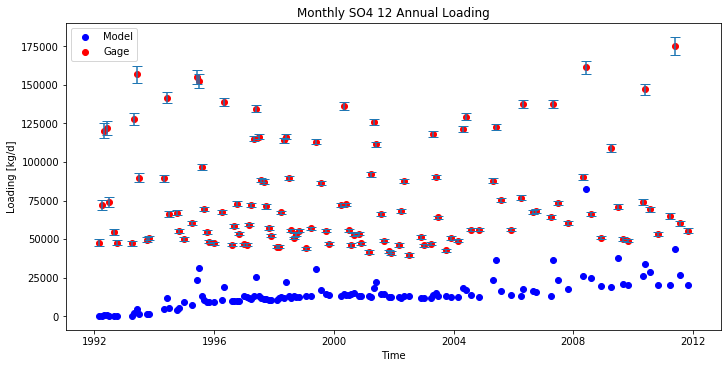

In [118]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(Ob12Dates, SO4_Modeled_12, color='blue', label='Model')
ax.scatter(Ob12Dates, LoadOb12SO4, color='red', label='Gage')
ax.errorbar(x = Ob12Dates, y = LoadOb12SO4, yerr = StdErrorSO4_12, ls='none', capsize = 5)
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly SO4 12 Annual Loading")
ax.legend()
#fig.savefig('{}/MonthlySO412_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly SO4 at 12 Residual')

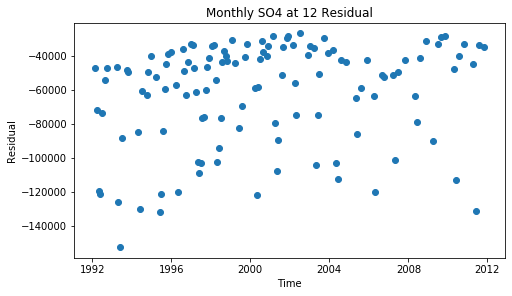

In [119]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(SO4_Residual_12.index, SO4_Residual_12)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly SO4 at 12 Residual')
#fig.savefig('{}/Monthly SO4Res12_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly SO4 at 12 Percent Difference Residual')

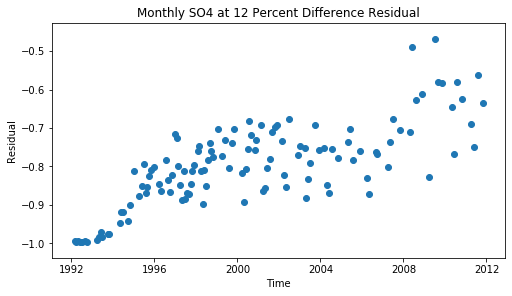

In [120]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(SO4_PercRes_12.index, SO4_PercRes_12)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly SO4 at 12 Percent Difference Residual')
#fig.savefig('{}/MonthlySO4PercDiffRes12_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly SO4 at 12 Percent Difference Residual Histogram')

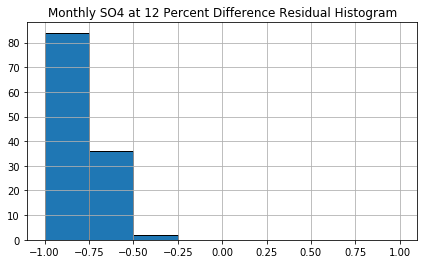

In [121]:
fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.gca()
SO4_PercRes_12.hist(ax=ax, range=(-1,1), edgecolor='black',bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.set_title("Monthly SO4 at 12 Percent Difference Residual Histogram")
#fig.savefig('{}/MonthlySO4PercDiffRes12_Hist_{}.png'.format(FigurePath, FigureSuffix))

Calcium

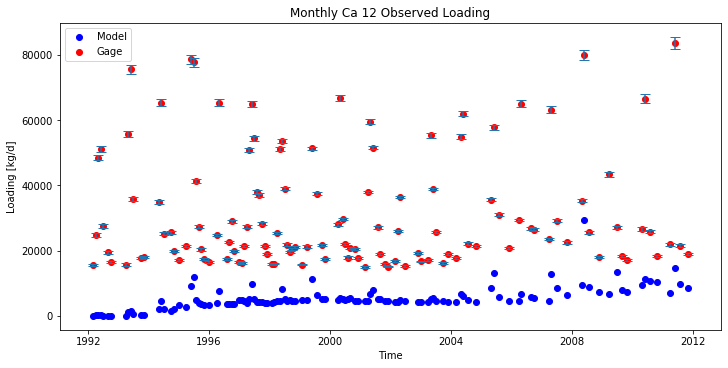

In [122]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(Ob12Dates, Ca_Modeled_12, color='blue', label='Model')
ax.scatter(Ob12Dates, LoadOb12Ca, color='red', label='Gage')
ax.errorbar(x = Ob12Dates, y = LoadOb12Ca, yerr = StdErrorCa_12, ls='none', capsize = 5)
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly Ca 12 Observed Loading")
ax.legend()
#fig.savefig('{}/MonthlyCa12_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Ca at 12 Residual')

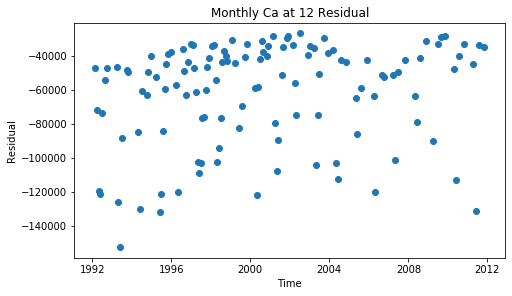

In [123]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Ca_Residual_12.index, Ca_Residual_12)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly Ca at 12 Residual')
#fig.savefig('{}/MonthlyCaRes12_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Ca at 12 Percent Difference Residual')

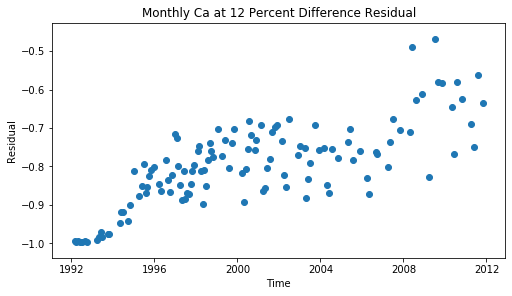

In [124]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Ca_PercRes_12.index, Ca_PercRes_12)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly Ca at 12 Percent Difference Residual')
#fig.savefig('{}/MonthlyCaPercDiffRes12_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Ca at 12 Percent Difference Residual Histogram')

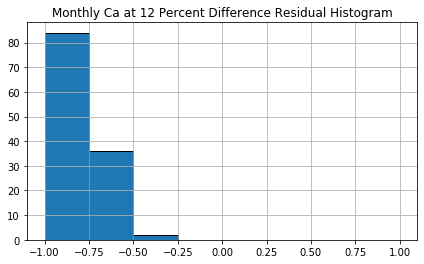

In [125]:
fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.gca()
Ca_PercRes_12.hist(ax=ax, range=(-1,1), edgecolor='black',bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.set_title("Monthly Ca at 12 Percent Difference Residual Histogram")
#fig.savefig('{}/MonthlyCaPercDiffRes12_Hist_{}.png'.format(FigurePath, FigureSuffix))

Magnesium

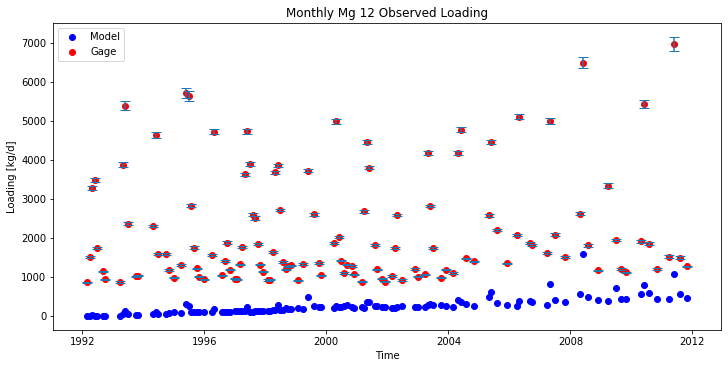

In [126]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(Ob12Dates, Mg_Modeled_12, color='blue', label='Model')
ax.scatter(Ob12Dates, LoadOb12Mg, color='red', label='Gage')
ax.errorbar(x = Ob12Dates, y = LoadOb12Mg, yerr = StdErrorMg_12, ls='none', capsize = 5)
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly Mg 12 Observed Loading")
ax.legend()
#fig.savefig('{}/MonthlyMg12_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Mg at 12 Residual')

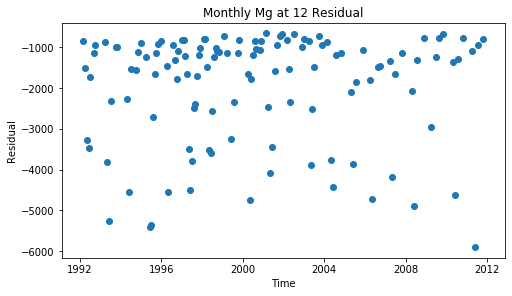

In [127]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Mg_Residual_12.index, Mg_Residual_12)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly Mg at 12 Residual')
#fig.savefig('{}/MonthlyMgRes12_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Mg at 12 Percent Difference Residual')

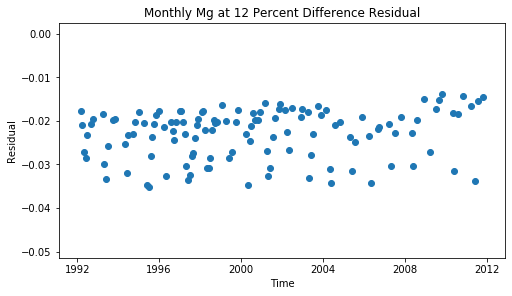

In [128]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Mg_PercRes_12.index, Mg_PercRes_12)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly Mg at 12 Percent Difference Residual')
#fig.savefig('{}/MonthlyMgPercDiffRes12_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Mg at 12 Percent Difference Residual Histogram')

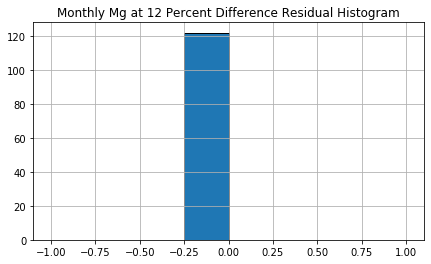

In [129]:
fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.gca()
Mg_PercRes_12.hist(ax=ax, range=(-1,1), edgecolor='black',bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.set_title("Monthly Mg at 12 Percent Difference Residual Histogram")
#fig.savefig('{}/MonthlyMgPercDiffRes12_Hist_{}.png'.format(FigurePath, FigureSuffix))

Sodium

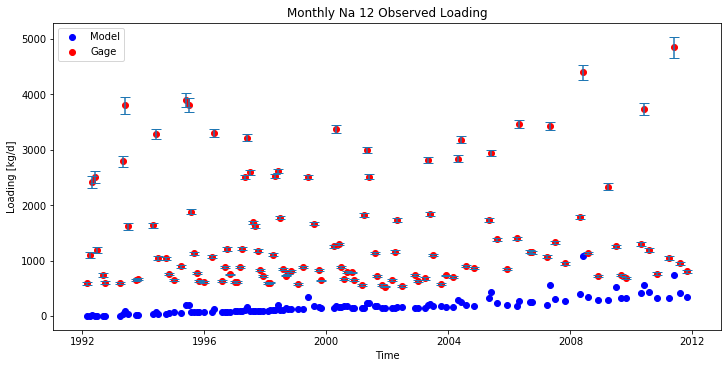

In [130]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(Ob12Dates, Na_Modeled_12, color='blue', label='Model')
ax.scatter(Ob12Dates, LoadOb12Na, color='red', label='Gage')
ax.errorbar(x = Ob12Dates, y = LoadOb12Na, yerr = StdErrorNa_12, ls='none', capsize = 5)
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly Na 12 Observed Loading")
ax.legend()
#fig.savefig('{}/MonthlyNa12_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Na at 12 Residual')

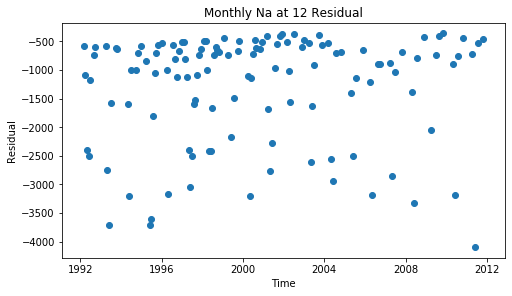

In [131]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Na_Residual_12.index, Na_Residual_12)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly Na at 12 Residual')
#fig.savefig('{}/MonthlyNaRes12_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Na at 12 Percent Difference Residual')

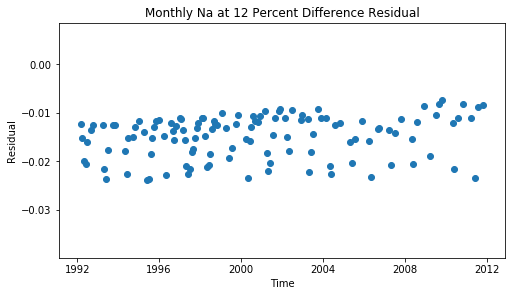

In [132]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Na_PercRes_12.index, Na_PercRes_12)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly Na at 12 Percent Difference Residual')
#fig.savefig('{}/MonthlyNaPercDiffRes12_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Na at 12 Percent Difference Residual Histogram')

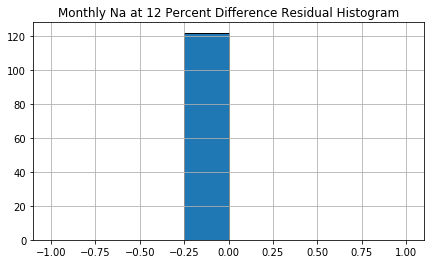

In [133]:
fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.gca()
Na_PercRes_12.hist(ax=ax, range=(-1,1), edgecolor='black',bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.set_title("Monthly Na at 12 Percent Difference Residual Histogram")
#fig.savefig('{}/MonthlyNaPercDiffRes12_Hist_{}.png'.format(FigurePath, FigureSuffix))

Potassium

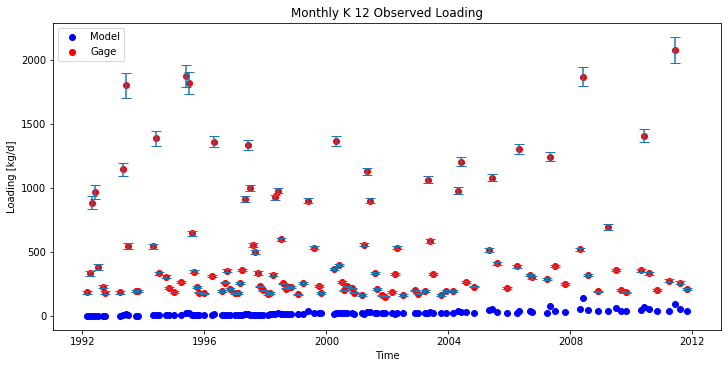

In [134]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(Ob12Dates, K_Modeled_12, color='blue', label='Model')
ax.scatter(Ob12Dates, LoadOb12K, color='red', label='Gage')
ax.errorbar(x = Ob12Dates, y = LoadOb12K, yerr = StdErrorK_12, ls='none', capsize = 5)
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly K 12 Observed Loading")
ax.legend()
#fig.savefig('{}/MonthlyK12_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly K at 12 Residual')

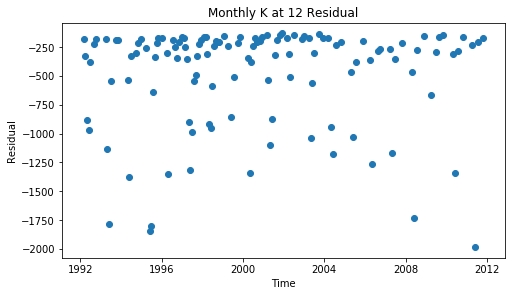

In [135]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(K_Residual_12.index, K_Residual_12)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly K at 12 Residual')
#fig.savefig('{}/MonthlyKRes12_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly K at 12 Percent Difference Residual')

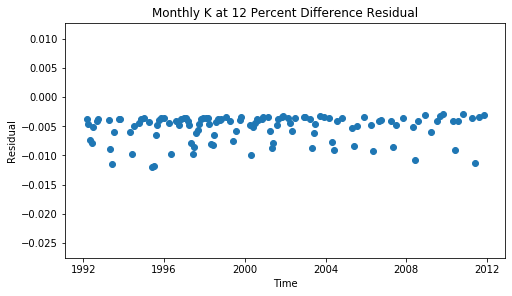

In [136]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(K_PercRes_12.index, K_PercRes_12)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly K at 12 Percent Difference Residual')
#fig.savefig('{}/MonthlyKPercDiffRes12_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly K at 12 Percent Difference Residual Histogram')

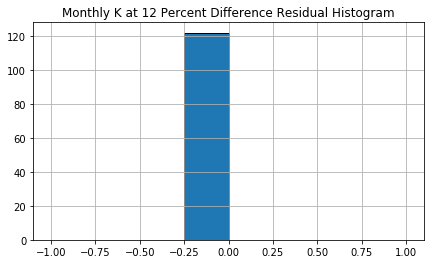

In [137]:
fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.gca()
K_PercRes_12.hist(ax=ax, range=(-1,1), edgecolor='black',bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.set_title("Monthly K at 12 Percent Difference Residual Histogram")
#fig.savefig('{}/MonthlyKPercDiffRes12_Hist_{}.png'.format(FigurePath, FigureSuffix))

Chlorine

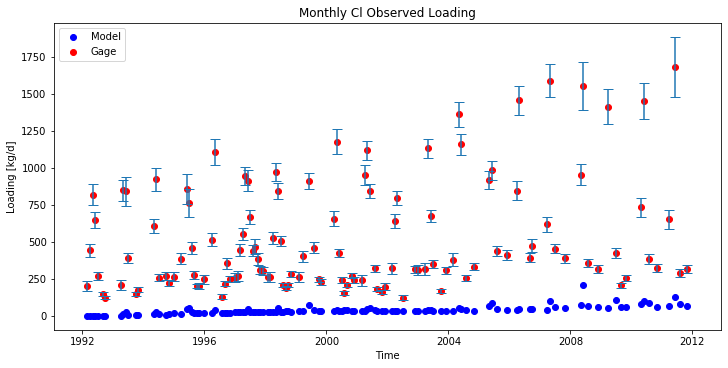

In [138]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(Ob12Dates, Cl_Modeled_12, color='blue', label='Model')
ax.scatter(Ob12Dates, LoadOb12Cl, color='red', label='Gage')
ax.errorbar(x = Ob12Dates, y = LoadOb12Cl, yerr = StdErrorCl_12, ls='none', capsize = 5)
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly Cl Observed Loading")
ax.legend()
#fig.savefig('{}/MonthlyCl12_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Cl at 12 Residual')

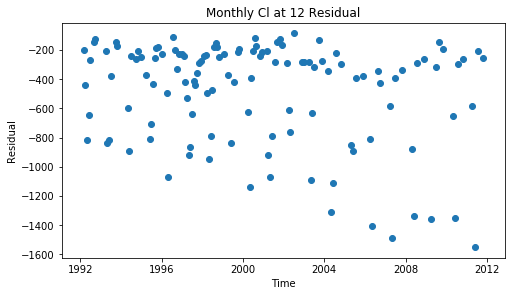

In [139]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Cl_Residual_12.index, Cl_Residual_12)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly Cl at 12 Residual')
#fig.savefig('{}/MonthlyClRes12_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Cl at 12 Percent Difference Residual')

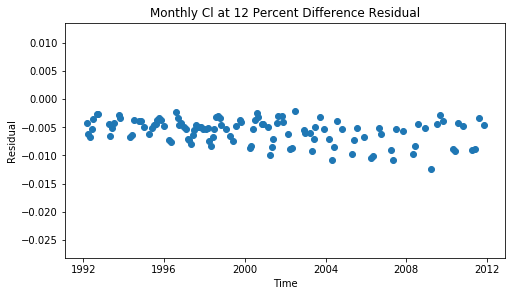

In [140]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Cl_PercRes_12.index, Cl_PercRes_12)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly Cl at 12 Percent Difference Residual')
#fig.savefig('{}/MonthlyClPercDiffRes12_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Cl at 12 Percent Difference Residual Histogram')

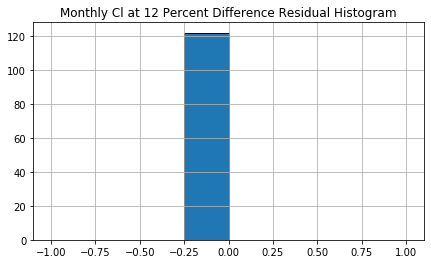

In [141]:
fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.gca()
Cl_PercRes_12.hist(ax=ax, range=(-1,1), edgecolor='black',bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.set_title("Monthly Cl at 12 Percent Difference Residual Histogram")
#fig.savefig('{}/MonthlyClPercDiffRes12_Hist_{}.png'.format(FigurePath, FigureSuffix))

Bicarbonate

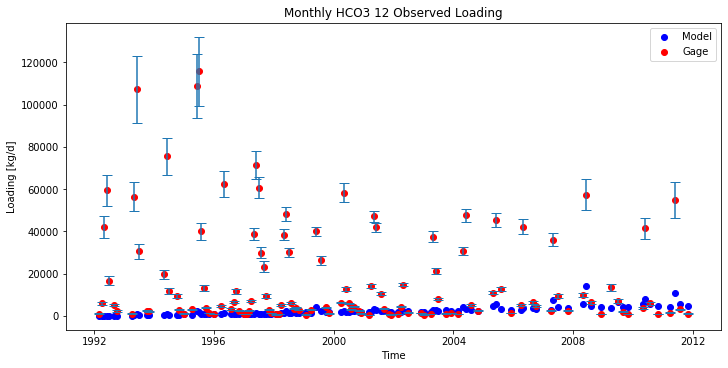

In [142]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(Ob12Dates, HCO3_Modeled_12, color='blue', label='Model')
ax.scatter(Ob12Dates, LoadOb12HCO3, color='red', label='Gage')
ax.errorbar(x = Ob12Dates, y = LoadOb12HCO3, yerr = StdErrorHCO3_12, ls='none', capsize = 5)
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly HCO3 12 Observed Loading")
ax.legend()
#fig.savefig('{}/Monthly HCO312_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly HCO3 at 12 Residual')

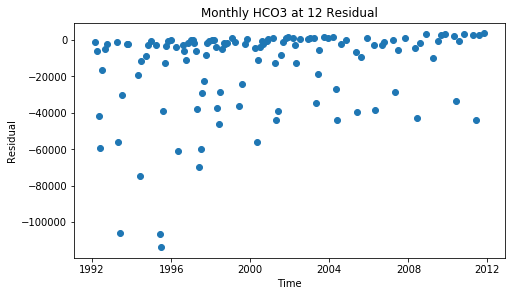

In [143]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(HCO3_Residual_12.index, HCO3_Residual_12)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly HCO3 at 12 Residual')
#fig.savefig('{}/Monthly HCO3Res12_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly HCO3 at 12 Percent Difference Residual')

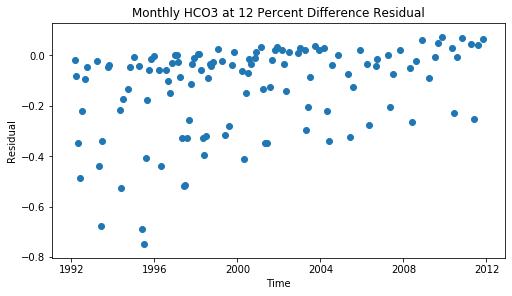

In [144]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(HCO3_PercRes_12.index, HCO3_PercRes_12)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly HCO3 at 12 Percent Difference Residual')
#fig.savefig('{}/Monthly HCO3PercDiffRes12_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly HCO3 at 12 Percent Difference Residual Histogram')

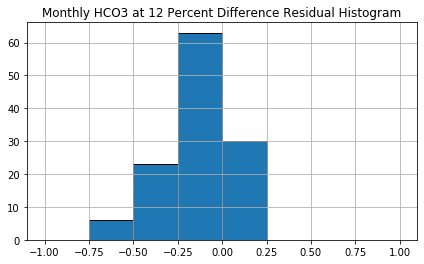

In [145]:
fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.gca()
HCO3_PercRes_12.hist(ax=ax, range=(-1,1), edgecolor='black',bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.set_title("Monthly HCO3 at 12 Percent Difference Residual Histogram")
#fig.savefig('{}/MonthlyHCO3PercDiffRes12_Hist_{}.png'.format(FigurePath, FigureSuffix))

##### Model Deviation

In [146]:
SO4_ModelSum_12 = pd.DataFrame.sum(SO4_Modeled_12, axis = 0)
SO4_ObsvdSum_12 = pd.DataFrame.sum(LoadOb12SO4, axis = 0)
Ca_ModelSum_12 = pd.DataFrame.sum(Ca_Modeled_12, axis = 0)
Ca_ObsvdSum_12 = pd.DataFrame.sum(LoadOb12Ca, axis = 0)
Mg_ModelSum_12 = pd.DataFrame.sum(Mg_Modeled_12, axis = 0)
Mg_ObsvdSum_12 = pd.DataFrame.sum(LoadOb12Mg, axis = 0)
Na_ModelSum_12 = pd.DataFrame.sum(Na_Modeled_12, axis = 0)
Na_ObsvdSum_12 = pd.DataFrame.sum(LoadOb12Na, axis = 0)
K_ModelSum_12 = pd.DataFrame.sum(K_Modeled_12, axis = 0)
K_ObsvdSum_12 = pd.DataFrame.sum(LoadOb12K, axis = 0)
Cl_ModelSum_12 = pd.DataFrame.sum(Cl_Modeled_12, axis = 0)
Cl_ObsvdSum_12 = pd.DataFrame.sum(LoadOb12Cl, axis = 0)
HCO3_ModelSum_12 = pd.DataFrame.sum(HCO3_Modeled_12, axis = 0)
HCO3_ObsvdSum_12 = pd.DataFrame.sum(LoadOb12HCO3, axis = 0)

SO4_Deviation_12 = SO4_ModelSum_12 / SO4_ObsvdSum_12
SO4_Dev_12 = SO4_Deviation_12.iloc[0]
Ca_Deviation_12 = Ca_ModelSum_12 / Ca_ObsvdSum_12
Ca_Dev_12 = Ca_Deviation_12.iloc[0]
Mg_Deviation_12 = Mg_ModelSum_12 / Mg_ObsvdSum_12
Mg_Dev_12 = Mg_Deviation_12.iloc[0]
Na_Deviation_12 = Na_ModelSum_12 / Na_ObsvdSum_12
Na_Dev_12 = Na_Deviation_12.iloc[0]
K_Deviation_12 = K_ModelSum_12 / K_ObsvdSum_12
K_Dev_12 = K_Deviation_12.iloc[0]
Cl_Deviation_12 = Cl_ModelSum_12 / Cl_ObsvdSum_12
Cl_Dev_12 = Cl_Deviation_12.iloc[0]
HCO3_Deviation_12 = HCO3_ModelSum_12 / HCO3_ObsvdSum_12
HCO3_Dev_12 = HCO3_Deviation_12.iloc[0]

Text(0, 0.5, 'Deviation')

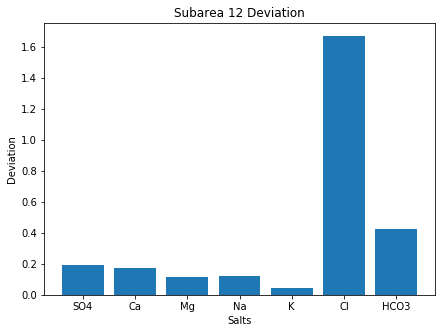

In [147]:
fig, ax = plt.subplots(figsize = (7,5))
salts = ['SO4', 'Ca', 'Mg', 'Na', 'K', 'Cl', 'HCO3']
Deviation_12 =[SO4_Dev_12, Ca_Dev_12, Mg_Dev_12, Na_Dev_12, K_Dev_12, Cl_Dev_75, HCO3_Dev_75]
ax.bar(salts, Deviation_12)
ax.set_title('Subarea 12 Deviation')
ax.set_xlabel('Salts')
ax.set_ylabel('Deviation')
#fig.savefig('{}/Deviation_12_{}.png'.format(FigurePath, FigureSuffix))

##### Root Mean Square Error 

###### Difference

In [148]:
SO4_Difference_12 = pd.DataFrame.sub(SO4_Modeled_12, LoadOb12SO4, axis=0)
Ca_Difference_12 = pd.DataFrame.sub(Ca_Modeled_12, LoadOb12Ca, axis=0)
Mg_Difference_12 = pd.DataFrame.sub(Mg_Modeled_12, LoadOb12Mg, axis=0)
Na_Difference_12 = pd.DataFrame.sub(Na_Modeled_12, LoadOb12Na, axis=0)
K_Difference_12 = pd.DataFrame.sub(K_Modeled_12, LoadOb12K, axis=0)
Cl_Difference_12 = pd.DataFrame.sub(Cl_Modeled_12, LoadOb12Cl, axis=0)
HCO3_Difference_12 = pd.DataFrame.sub(HCO3_Modeled_12, LoadOb75HCO3, axis=0)

###### Square Difference

In [149]:
SO4_DiffSqrd_12 = SO4_Difference_12**2
Ca_DiffSqrd_12 = Ca_Difference_12**2
Mg_DiffSqrd_12 = Mg_Difference_12**2
Na_DiffSqrd_12 = Na_Difference_12**2
K_DiffSqrd_12 = K_Difference_12**2
Cl_DiffSqrd_12 = Cl_Difference_12**2
HCO3_DiffSqrd_12 = HCO3_Difference_12**2

###### Sum of Square Difference

In [150]:
SO4_DiffSqrdSum_12 = pd.DataFrame.sum(SO4_DiffSqrd_12, axis=0)
SO4_DSSum_12 = SO4_DiffSqrdSum_12.iloc[0]
Ca_DiffSqrdSum_12 = pd.DataFrame.sum(Ca_DiffSqrd_12, axis=0)
Ca_DSSum_12 = Ca_DiffSqrdSum_12.iloc[0]
Mg_DiffSqrdSum_12 = pd.DataFrame.sum(Mg_DiffSqrd_12, axis=0)
Mg_DSSum_12 = Mg_DiffSqrdSum_12.iloc[0]
Na_DiffSqrdSum_12 = pd.DataFrame.sum(Na_DiffSqrd_12, axis=0)
Na_DSSum_12 = Na_DiffSqrdSum_12.iloc[0]
K_DiffSqrdSum_12 = pd.DataFrame.sum(K_DiffSqrd_12, axis=0)
K_DSSum_12 = K_DiffSqrdSum_12.iloc[0]
Cl_DiffSqrdSum_12 = pd.DataFrame.sum(Cl_DiffSqrd_12, axis=0)
Cl_DSSum_12 = Cl_DiffSqrdSum_12.iloc[0]
HCO3_DiffSqrdSum_12 = pd.DataFrame.sum(HCO3_DiffSqrd_12, axis=0)
HCO3_DSSum_12 = HCO3_DiffSqrdSum_12.iloc[0]

###### Count of Values (n)

In [151]:
SO4_Count_12 = SO4_Modeled_12.count(axis=0)
Ca_Count_12 = Ca_Modeled_12.count(axis=0)
Mg_Count_12 = Mg_Modeled_12.count(axis=0)
Na_Count_12 = Na_Modeled_12.count(axis=0)
K_Count_12 = K_Modeled_12.count(axis=0)
Cl_Count_12 = Cl_Modeled_12.count(axis=0)
HCO3_Count_12 = HCO3_Modeled_12.count(axis=0)

###### 1/n

In [152]:
SO4_InvCount_12 = 1/SO4_Count_12
Ca_InvCount_12 = 1/Ca_Count_12
Mg_InvCount_12 = 1/Mg_Count_12
Na_InvCount_12 = 1/Na_Count_12
K_InvCount_12 = 1/K_Count_12
Cl_InvCount_12 = 1/Cl_Count_12
HCO3_InvCount_12 = 1/HCO3_Count_12

###### Multiply Inv Count and Sum 

In [153]:
SO4_SE_12 = SO4_InvCount_12*SO4_DSSum_12
Ca_SE_12 = Ca_InvCount_12*Ca_DSSum_12
Mg_SE_12 = Mg_InvCount_12*Mg_DSSum_12
Na_SE_12 = Na_InvCount_12*Na_DSSum_12
K_SE_12 = K_InvCount_12*K_DSSum_12
Cl_SE_12 = Cl_InvCount_12*Cl_DSSum_12
HCO3_SE_12 = HCO3_InvCount_12*HCO3_DSSum_12

###### Square Root of Inv Count and Sum

In [154]:
SO4_RMSQE_12 = SO4_SE_12**(1/2)
SO4_RMSE_12 = SO4_RMSQE_12.iloc[0]
Mg_RMSQE_12 = Mg_SE_12**(1/2)
Mg_RMSE_12 = SO4_RMSQE_12.iloc[0]
Ca_RMSQE_12 = Ca_SE_12**(1/2)
Ca_RMSE_12 = Ca_RMSQE_12.iloc[0]
Na_RMSQE_12 = Na_SE_12**(1/2)
Na_RMSE_12 = Na_RMSQE_12.iloc[0]
K_RMSQE_12 = K_SE_12**(1/2)
K_RMSE_12 = K_RMSQE_12.iloc[0]
Cl_RMSQE_12 = Cl_SE_12**(1/2)
Cl_RMSE_12 = Cl_RMSQE_12.iloc[0]
HCO3_RMSQE_12 = HCO3_SE_12**(1/2)
HCO3_RMSE_12 = HCO3_RMSQE_12.iloc[0]

Text(0, 0.5, 'RMSE')

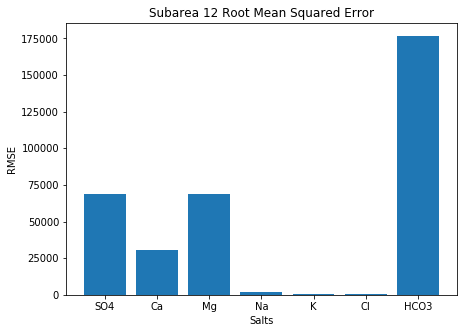

In [155]:
fig, ax = plt.subplots(figsize = (7,5))
salts = ['SO4', 'Ca', 'Mg', 'Na', 'K', 'Cl', 'HCO3']
RMSE_12 =[SO4_RMSE_12, Ca_RMSE_12, Mg_RMSE_12, Na_RMSE_12, K_RMSE_12, Cl_RMSE_12, HCO3_RMSE_12]
ax.bar(salts, RMSE_12)
ax.set_title('Subarea 12 Root Mean Squared Error')
ax.set_xlabel('Salts')
ax.set_ylabel('RMSE')
#fig.savefig('{}/RootMeanSquaredError_12_{}.png'.format(FigurePath, FigureSuffix))

##### Nash Sutcliffe Error

###### Average of Observed Data

In [156]:
SO4_AvgObs_12 = LoadOb12SO4.mean()
Ca_AvgObs_12 = LoadOb12Ca.mean()
Mg_AvgObs_12 = LoadOb12Mg.mean()
Na_AvgObs_12 = LoadOb12Na.mean()
K_AvgObs_12 = LoadOb12K.mean()
Cl_AvgObs_12 = LoadOb12Cl.mean()
HCO3_AvgObs_12 = LoadOb12HCO3.mean()

###### Observed - AvgObs

In [157]:
SO4_DiffAvgObs_12 = LoadOb12SO4 - SO4_AvgObs_12
Ca_DiffAvgObs_12 = LoadOb12Ca - Ca_AvgObs_12
Mg_DiffAvgObs_12 = LoadOb12Mg - Mg_AvgObs_12
Na_DiffAvgObs_12 = LoadOb12Na - Na_AvgObs_12
K_DiffAvgObs_12 = LoadOb12K - K_AvgObs_12
Cl_DiffAvgObs_12 = LoadOb12Cl - Cl_AvgObs_12
HCO3_DiffAvgObs_12 = LoadOb12HCO3 - HCO3_AvgObs_12

###### Square DiffAvgObs

In [158]:
SO4_SqDiffAvgObs_12 = SO4_DiffAvgObs_12**2
Ca_SqDiffAvgObs_12 = Ca_DiffAvgObs_12**2
Mg_SqDiffAvgObs_12 = Mg_DiffAvgObs_12**2
Na_SqDiffAvgObs_12 = Na_DiffAvgObs_12**2
K_SqDiffAvgObs_12 = K_DiffAvgObs_12**2
Cl_SqDiffAvgObs_12 = Cl_DiffAvgObs_12**2
HCO3_SqDiffAvgObs_12 = HCO3_DiffAvgObs_12**2

###### Sum of SquareDiffAvgObs

In [159]:
SO4_SumSqDiffAvgObs_12 = pd.DataFrame.sum(SO4_SqDiffAvgObs_12, axis=0)
Ca_SumSqDiffAvgObs_12 = pd.DataFrame.sum(Ca_SqDiffAvgObs_12, axis=0)
Mg_SumSqDiffAvgObs_12 = pd.DataFrame.sum(Mg_SqDiffAvgObs_12, axis=0)
Na_SumSqDiffAvgObs_12 = pd.DataFrame.sum(Na_SqDiffAvgObs_12, axis=0)
K_SumSqDiffAvgObs_12 = pd.DataFrame.sum(K_SqDiffAvgObs_12, axis=0)
Cl_SumSqDiffAvgObs_12 = pd.DataFrame.sum(Cl_SqDiffAvgObs_12, axis=0)
HCO3_SumSqDiffAvgObs_12 = pd.DataFrame.sum(HCO3_SqDiffAvgObs_12, axis=0)

###### Divide Model SumSqDiff with Observed SumSqDiff

In [160]:
SO4_ModelObsSum_12 = SO4_DiffSqrdSum_12 / SO4_SumSqDiffAvgObs_12
Ca_ModelObsSum_12 = Ca_DiffSqrdSum_12 / Ca_SumSqDiffAvgObs_12
Mg_ModelObsSum_12 = Mg_DiffSqrdSum_12 / Mg_SumSqDiffAvgObs_12
Na_ModelObsSum_12 = Na_DiffSqrdSum_12 / Na_SumSqDiffAvgObs_12
K_ModelObsSum_12 = K_DiffSqrdSum_12 / K_SumSqDiffAvgObs_12
Cl_ModelObsSum_12 = Cl_DiffSqrdSum_12 / Cl_SumSqDiffAvgObs_12
HCO3_ModelObsSum_12 = HCO3_DiffSqrdSum_12 / HCO3_SumSqDiffAvgObs_12

###### 1 - Division

In [161]:
SO4_NashSCE_12 = 1 - SO4_ModelObsSum_12
SO4_NSCE_12 = SO4_NashSCE_12.iloc[0]
Ca_NashSCE_12 = 1 - Ca_ModelObsSum_12
Ca_NSCE_12 = Ca_NashSCE_12.iloc[0]
Mg_NashSCE_12 = 1 - Mg_ModelObsSum_12
Mg_NSCE_12 = Mg_NashSCE_12.iloc[0]
Na_NashSCE_12 = 1 - Na_ModelObsSum_12
Na_NSCE_12 = Na_NashSCE_12.iloc[0]
K_NashSCE_12 = 1 - K_ModelObsSum_12
K_NSCE_12 = K_NashSCE_12.iloc[0]
Cl_NashSCE_12 = 1 - Cl_ModelObsSum_12
Cl_NSCE_12 = Cl_NashSCE_12.iloc[0]
HCO3_NashSCE_12 = 1 - HCO3_ModelObsSum_12
HCO3_NSCE_12 = HCO3_NashSCE_12.iloc[0]

Text(0, 0.5, 'NSCE')

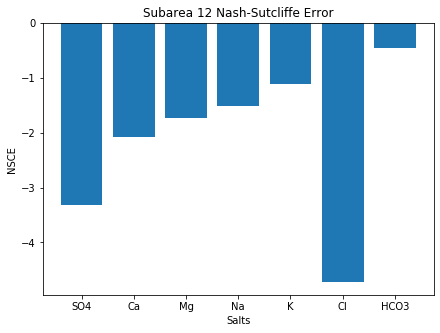

In [162]:
fig, ax = plt.subplots(figsize = (7,5))
salts = ['SO4', 'Ca', 'Mg', 'Na', 'K', 'Cl', 'HCO3']
NSCE_12 =[SO4_NSCE_12, Ca_NSCE_12, Mg_NSCE_12, Na_NSCE_12, K_NSCE_12, Cl_NSCE_75, HCO3_NSCE_75]
ax.bar(salts, NSCE_12)
ax.set_title('Subarea 12 Nash-Sutcliffe Error')
ax.set_xlabel('Salts')
ax.set_ylabel('NSCE')
#fig.savefig('{}/NashSutcliffeError_12_{}.png'.format(FigurePath, FigureSuffix))

### Subarea 9

In [163]:
Sub9 = Mod[Mod.subarea == 9]

In [164]:
###Year = 1992#######################################################################################################
Sub9_1992 = Sub9[Sub9.year == 1992]
Sub9_1992_index = Sub9_1992.set_index("day") 
##Months 1, 3, 4, 5, 6, 7, 9, 10, 12
##Month 1#######################################################################################################
Sub9_1992_1 = Sub9_1992_index.loc[1:31]
#SO4
Sub9_1992_1_LoadSO4 = Sub9_1992_1.load_so4
Sub9_1992_1_SO4_mean = Sub9_1992_1_LoadSO4.mean(axis='index')
#Ca
Sub9_1992_1_LoadCa = Sub9_1992_1.load_ca
Sub9_1992_1_Ca_mean = Sub9_1992_1_LoadCa.mean(axis='index')
#Mg
Sub9_1992_1_LoadMg = Sub9_1992_1.load_mg
Sub9_1992_1_Mg_mean = Sub9_1992_1_LoadMg.mean(axis='index')
#Na
Sub9_1992_1_LoadNa = Sub9_1992_1.load_na
Sub9_1992_1_Na_mean = Sub9_1992_1_LoadNa.mean(axis='index')
#K
Sub9_1992_1_LoadK = Sub9_1992_1.load_k
Sub9_1992_1_K_mean = Sub9_1992_1_LoadK.mean(axis='index')
#Cl
Sub9_1992_1_LoadCl = Sub9_1992_1.load_cl
Sub9_1992_1_Cl_mean = Sub9_1992_1_LoadCl.mean(axis='index')
#CO1
Sub9_1992_1_LoadCO3 = Sub9_1992_1.load_co3
Sub9_1992_1_CO3_mean = Sub9_1992_1_LoadCO3.mean(axis='index')
#HCO1
Sub9_1992_1_LoadHCO3= Sub9_1992_1.load_hco3
Sub9_1992_1_HCO3_mean = Sub9_1992_1_LoadHCO3.mean(axis='index')
##Month 3###########################################################################################################
Sub9_1992_3 = Sub9_1992_index.loc[61:91]
#SO4
Sub9_1992_3_LoadSO4 = Sub9_1992_3.load_so4
Sub9_1992_3_SO4_mean = Sub9_1992_3_LoadSO4.mean(axis='index')
#Ca
Sub9_1992_3_LoadCa = Sub9_1992_3.load_ca
Sub9_1992_3_Ca_mean = Sub9_1992_3_LoadCa.mean(axis='index')
#Mg
Sub9_1992_3_LoadMg = Sub9_1992_3.load_mg
Sub9_1992_3_Mg_mean = Sub9_1992_3_LoadMg.mean(axis='index')
#Na
Sub9_1992_3_LoadNa = Sub9_1992_3.load_na
Sub9_1992_3_Na_mean = Sub9_1992_3_LoadNa.mean(axis='index')
#K
Sub9_1992_3_LoadK = Sub9_1992_3.load_k
Sub9_1992_3_K_mean = Sub9_1992_3_LoadK.mean(axis='index')
#Cl
Sub9_1992_3_LoadCl = Sub9_1992_3.load_cl
Sub9_1992_3_Cl_mean = Sub9_1992_3_LoadCl.mean(axis='index')
#CO3
Sub9_1992_3_LoadCO3 = Sub9_1992_3.load_co3
Sub9_1992_3_CO3_mean = Sub9_1992_3_LoadCO3.mean(axis='index')
#HCO3
Sub9_1992_3_LoadHCO3 = Sub9_1992_3.load_hco3
Sub9_1992_3_HCO3_mean = Sub9_1992_3_LoadHCO3.mean(axis='index')
##Month 4########################################################################################################
Sub9_1992_4 = Sub9_1992_index.loc[92:121]
#SO4
Sub9_1992_4_LoadSO4 = Sub9_1992_4.load_so4
Sub9_1992_4_SO4_mean = Sub9_1992_4_LoadSO4.mean(axis='index')
#Ca
Sub9_1992_4_LoadCa = Sub9_1992_4.load_ca
Sub9_1992_4_Ca_mean = Sub9_1992_4_LoadCa.mean(axis='index')
#Mg
Sub9_1992_4_LoadMg = Sub9_1992_4.load_mg
Sub9_1992_4_Mg_mean = Sub9_1992_4_LoadMg.mean(axis='index')
#Na
Sub9_1992_4_LoadNa = Sub9_1992_4.load_na
Sub9_1992_4_Na_mean = Sub9_1992_4_LoadNa.mean(axis='index')
#K
Sub9_1992_4_LoadK = Sub9_1992_4.load_k
Sub9_1992_4_K_mean = Sub9_1992_4_LoadK.mean(axis='index')
#Cl
Sub9_1992_4_LoadCl = Sub9_1992_4.load_cl
Sub9_1992_4_Cl_mean = Sub9_1992_4_LoadCl.mean(axis='index')
#CO3
Sub9_1992_4_LoadCO3 = Sub9_1992_4.load_co3
Sub9_1992_4_CO3_mean = Sub9_1992_4_LoadCO3.mean(axis='index')
#HCO3
Sub9_1992_4_LoadHCO3 = Sub9_1992_4.load_hco3
Sub9_1992_4_HCO3_mean = Sub9_1992_4_LoadHCO3.mean(axis='index')
##Month 5#######################################################################################################
Sub9_1992_5 = Sub9_1992_index.loc[122:152]
#SO4
Sub9_1992_5_LoadSO4 = Sub9_1992_5.load_so4
Sub9_1992_5_SO4_mean = Sub9_1992_5_LoadSO4.mean(axis='index')
#Ca
Sub9_1992_5_LoadCa = Sub9_1992_5.load_ca
Sub9_1992_5_Ca_mean = Sub9_1992_5_LoadCa.mean(axis='index')
#Mg
Sub9_1992_5_LoadMg = Sub9_1992_5.load_mg
Sub9_1992_5_Mg_mean = Sub9_1992_5_LoadMg.mean(axis='index')
#Na
Sub9_1992_5_LoadNa = Sub9_1992_5.load_na
Sub9_1992_5_Na_mean = Sub9_1992_5_LoadNa.mean(axis='index')
#K
Sub9_1992_5_LoadK = Sub9_1992_5.load_k
Sub9_1992_5_K_mean = Sub9_1992_5_LoadK.mean(axis='index')
#Cl
Sub9_1992_5_LoadCl = Sub9_1992_5.load_cl
Sub9_1992_5_Cl_mean = Sub9_1992_5_LoadCl.mean(axis='index')
#CO3
Sub9_1992_5_LoadCO3 = Sub9_1992_5.load_co3
Sub9_1992_5_CO3_mean = Sub9_1992_5_LoadCO3.mean(axis='index')
#HCO3
Sub9_1992_5_LoadHCO3 = Sub9_1992_5.load_hco3
Sub9_1992_5_HCO3_mean = Sub9_1992_5_LoadHCO3.mean(axis='index')
##Month 6########################################################################################################
Sub9_1992_6 = Sub9_1992_index.loc[153:182]
#SO4
Sub9_1992_6_LoadSO4 = Sub9_1992_6.load_so4
Sub9_1992_6_SO4_mean = Sub9_1992_6_LoadSO4.mean(axis='index')
#Ca
Sub9_1992_6_LoadCa = Sub9_1992_6.load_ca
Sub9_1992_6_Ca_mean = Sub9_1992_6_LoadCa.mean(axis='index')
#Mg
Sub9_1992_6_LoadMg = Sub9_1992_6.load_mg
Sub9_1992_6_Mg_mean = Sub9_1992_6_LoadMg.mean(axis='index')
#Na
Sub9_1992_6_LoadNa = Sub9_1992_6.load_na
Sub9_1992_6_Na_mean = Sub9_1992_6_LoadNa.mean(axis='index')
#K
Sub9_1992_6_LoadK = Sub9_1992_6.load_k
Sub9_1992_6_K_mean = Sub9_1992_6_LoadK.mean(axis='index')
#Cl
Sub9_1992_6_LoadCl = Sub9_1992_6.load_cl
Sub9_1992_6_Cl_mean = Sub9_1992_6_LoadCl.mean(axis='index')
#CO3
Sub9_1992_6_LoadCO3 = Sub9_1992_6.load_co3
Sub9_1992_6_CO3_mean = Sub9_1992_6_LoadCO3.mean(axis='index')
#HCO3
Sub9_1992_6_LoadHCO3 = Sub9_1992_6.load_hco3
Sub9_1992_6_HCO3_mean = Sub9_1992_6_LoadHCO3.mean(axis='index')
##Month 7#########################################################################################################
Sub9_1992_7 = Sub9_1992_index.loc[183:213]
#SO4
Sub9_1992_7_LoadSO4 = Sub9_1992_7.load_so4
Sub9_1992_7_SO4_mean = Sub9_1992_7_LoadSO4.mean(axis='index')
#Ca
Sub9_1992_7_LoadCa = Sub9_1992_7.load_ca
Sub9_1992_7_Ca_mean = Sub9_1992_7_LoadCa.mean(axis='index')
#Mg
Sub9_1992_7_LoadMg = Sub9_1992_7.load_mg
Sub9_1992_7_Mg_mean = Sub9_1992_7_LoadMg.mean(axis='index')
#Na
Sub9_1992_7_LoadNa = Sub9_1992_7.load_na
Sub9_1992_7_Na_mean = Sub9_1992_7_LoadNa.mean(axis='index')
#K
Sub9_1992_7_LoadK = Sub9_1992_7.load_k
Sub9_1992_7_K_mean = Sub9_1992_7_LoadK.mean(axis='index')
#Cl
Sub9_1992_7_LoadCl = Sub9_1992_7.load_cl
Sub9_1992_7_Cl_mean = Sub9_1992_7_LoadCl.mean(axis='index')
#CO3
Sub9_1992_7_LoadCO3 = Sub9_1992_7.load_co3
Sub9_1992_7_CO3_mean = Sub9_1992_7_LoadCO3.mean(axis='index')
#HCO3
Sub9_1992_7_LoadHCO3 = Sub9_1992_7.load_hco3
Sub9_1992_7_HCO3_mean = Sub9_1992_7_LoadHCO3.mean(axis='index')
##Month 9#####################################################################################################
Sub9_1992_9 = Sub9_1992_index.loc[245:274]
#SO4
Sub9_1992_9_LoadSO4 = Sub9_1992_9.load_so4
Sub9_1992_9_SO4_mean = Sub9_1992_9_LoadSO4.mean(axis='index')
#Ca
Sub9_1992_9_LoadCa = Sub9_1992_9.load_ca
Sub9_1992_9_Ca_mean = Sub9_1992_9_LoadCa.mean(axis='index')
#Mg
Sub9_1992_9_LoadMg = Sub9_1992_9.load_mg
Sub9_1992_9_Mg_mean = Sub9_1992_9_LoadMg.mean(axis='index')
#Na
Sub9_1992_9_LoadNa = Sub9_1992_9.load_na
Sub9_1992_9_Na_mean = Sub9_1992_9_LoadNa.mean(axis='index')
#K
Sub9_1992_9_LoadK = Sub9_1992_9.load_k
Sub9_1992_9_K_mean = Sub9_1992_9_LoadK.mean(axis='index')
#Cl
Sub9_1992_9_LoadCl = Sub9_1992_9.load_cl
Sub9_1992_9_Cl_mean = Sub9_1992_9_LoadCl.mean(axis='index')
#CO3
Sub9_1992_9_LoadCO3 = Sub9_1992_9.load_co3
Sub9_1992_9_CO3_mean = Sub9_1992_9_LoadCO3.mean(axis='index')
#HCO3
Sub9_1992_9_LoadHCO3 = Sub9_1992_9.load_hco3
Sub9_1992_9_HCO3_mean = Sub9_1992_9_LoadHCO3.mean(axis='index')
##Month 10##################################################################################################
Sub9_1992_10 = Sub9_1992_index.loc[275:305]
#SO4
Sub9_1992_10_LoadSO4 = Sub9_1992_10.load_so4
Sub9_1992_10_SO4_mean = Sub9_1992_10_LoadSO4.mean(axis='index')
#Ca
Sub9_1992_10_LoadCa = Sub9_1992_10.load_ca
Sub9_1992_10_Ca_mean = Sub9_1992_10_LoadCa.mean(axis='index')
#Mg
Sub9_1992_10_LoadMg = Sub9_1992_10.load_mg
Sub9_1992_10_Mg_mean = Sub9_1992_10_LoadMg.mean(axis='index')
#Na
Sub9_1992_10_LoadNa = Sub9_1992_10.load_na
Sub9_1992_10_Na_mean = Sub9_1992_10_LoadNa.mean(axis='index')
#K
Sub9_1992_10_LoadK = Sub9_1992_10.load_k
Sub9_1992_10_K_mean = Sub9_1992_10_LoadK.mean(axis='index')
#Cl
Sub9_1992_10_LoadCl = Sub9_1992_10.load_cl
Sub9_1992_10_Cl_mean = Sub9_1992_10_LoadCl.mean(axis='index')
#CO3
Sub9_1992_10_LoadCO3 = Sub9_1992_10.load_co3
Sub9_1992_10_CO3_mean = Sub9_1992_10_LoadCO3.mean(axis='index')
#HCO3
Sub9_1992_10_LoadHCO3 = Sub9_1992_10.load_hco3
Sub9_1992_10_HCO3_mean = Sub9_1992_10_LoadHCO3.mean(axis='index')
##Month 12#####################################################################################################
Sub9_1992_12 = Sub9_1992_index.loc[336:366]
#SO4
Sub9_1992_12_LoadSO4 = Sub9_1992_12.load_so4
Sub9_1992_12_SO4_mean = Sub9_1992_12_LoadSO4.mean(axis='index')
#Ca
Sub9_1992_12_LoadCa = Sub9_1992_12.load_ca
Sub9_1992_12_Ca_mean = Sub9_1992_12_LoadCa.mean(axis='index')
#Mg
Sub9_1992_12_LoadMg = Sub9_1992_12.load_mg
Sub9_1992_12_Mg_mean = Sub9_1992_12_LoadMg.mean(axis='index')
#Na
Sub9_1992_12_LoadNa = Sub9_1992_12.load_na
Sub9_1992_12_Na_mean = Sub9_1992_12_LoadNa.mean(axis='index')
#K
Sub9_1992_12_LoadK = Sub9_1992_12.load_k
Sub9_1992_12_K_mean = Sub9_1992_12_LoadK.mean(axis='index')
#Cl
Sub9_1992_12_LoadCl = Sub9_1992_12.load_cl
Sub9_1992_12_Cl_mean = Sub9_1992_12_LoadCl.mean(axis='index')
#CO3
Sub9_1992_12_LoadCO3 = Sub9_1992_12.load_co3
Sub9_1992_12_CO3_mean = Sub9_1992_12_LoadCO3.mean(axis='index')
#HCO3
Sub9_1992_12_LoadHCO3 = Sub9_1992_12.load_hco3
Sub9_1992_12_HCO3_mean = Sub9_1992_12_LoadHCO3.mean(axis='index')
###Year = 1993##########################################################################################################
Sub9_1993 = Sub9[Sub9.year == 1993]
Sub9_1993_index = Sub9_1993.set_index("day")
##Months 3, 4, 5, 6, 7, 10##########################################################################################
##Month 3######################################################################################################
Sub9_1993_3 = Sub9_1993_index.loc[60:90]
#SO4
Sub9_1993_3_LoadSO4 = Sub9_1993_3.load_so4
Sub9_1993_3_SO4_mean = Sub9_1993_3_LoadSO4.mean(axis='index')
#Ca
Sub9_1993_3_LoadCa = Sub9_1993_3.load_ca
Sub9_1993_3_Ca_mean = Sub9_1993_3_LoadCa.mean(axis='index')
#Mg
Sub9_1993_3_LoadMg = Sub9_1993_3.load_mg
Sub9_1993_3_Mg_mean = Sub9_1993_3_LoadMg.mean(axis='index')
#Na
Sub9_1993_3_LoadNa = Sub9_1993_3.load_na
Sub9_1993_3_Na_mean = Sub9_1993_3_LoadNa.mean(axis='index')
#K
Sub9_1993_3_LoadK = Sub9_1993_3.load_k
Sub9_1993_3_K_mean = Sub9_1993_3_LoadK.mean(axis='index')
#Cl
Sub9_1993_3_LoadCl = Sub9_1993_3.load_cl
Sub9_1993_3_Cl_mean = Sub9_1993_3_LoadCl.mean(axis='index')
#CO3
Sub9_1993_3_LoadCO3 = Sub9_1993_3.load_co3
Sub9_1993_3_CO3_mean = Sub9_1993_3_LoadCO3.mean(axis='index')
#HCO3
Sub9_1993_3_LoadHCO3 = Sub9_1993_3.load_hco3
Sub9_1993_3_HCO3_mean = Sub9_1993_3_LoadHCO3.mean(axis='index')
##Month 4############################################################################################################
Sub9_1993_4 = Sub9_1993_index.loc[91:120]
#SO4
Sub9_1993_4_LoadSO4 = Sub9_1993_4.load_so4
Sub9_1993_4_SO4_mean = Sub9_1993_4_LoadSO4.mean(axis='index')
#Ca
Sub9_1993_4_LoadCa = Sub9_1993_4.load_ca
Sub9_1993_4_Ca_mean = Sub9_1993_4_LoadCa.mean(axis='index')
#Mg
Sub9_1993_4_LoadMg = Sub9_1993_4.load_mg
Sub9_1993_4_Mg_mean = Sub9_1993_4_LoadMg.mean(axis='index')
#Na
Sub9_1993_4_LoadNa = Sub9_1993_4.load_na
Sub9_1993_4_Na_mean = Sub9_1993_4_LoadNa.mean(axis='index')
#K
Sub9_1993_4_LoadK = Sub9_1993_4.load_k
Sub9_1993_4_K_mean = Sub9_1993_4_LoadK.mean(axis='index')
#Cl
Sub9_1993_4_LoadCl = Sub9_1993_4.load_cl
Sub9_1993_4_Cl_mean = Sub9_1993_4_LoadCl.mean(axis='index')
#CO3
Sub9_1993_4_LoadCO3 = Sub9_1993_4.load_co3
Sub9_1993_4_CO3_mean = Sub9_1993_4_LoadCO3.mean(axis='index')
#HCO3
Sub9_1993_4_LoadHCO3 = Sub9_1993_4.load_hco3
Sub9_1993_4_HCO3_mean = Sub9_1993_4_LoadHCO3.mean(axis='index')
##Month 5######################################################################################################
Sub9_1993_5 = Sub9_1993_index.loc[121:151]
#SO4
Sub9_1993_5_LoadSO4 = Sub9_1993_5.load_so4
Sub9_1993_5_SO4_mean = Sub9_1993_5_LoadSO4.mean(axis='index')
#Ca
Sub9_1993_5_LoadCa = Sub9_1993_5.load_ca
Sub9_1993_5_Ca_mean = Sub9_1993_5_LoadCa.mean(axis='index')
#Mg
Sub9_1993_5_LoadMg = Sub9_1993_5.load_mg
Sub9_1993_5_Mg_mean = Sub9_1993_5_LoadMg.mean(axis='index')
#Na
Sub9_1993_5_LoadNa = Sub9_1993_5.load_na
Sub9_1993_5_Na_mean = Sub9_1993_5_LoadNa.mean(axis='index')
#K
Sub9_1993_5_LoadK = Sub9_1993_5.load_k
Sub9_1993_5_K_mean = Sub9_1993_5_LoadK.mean(axis='index')
#Cl
Sub9_1993_5_LoadCl = Sub9_1993_5.load_cl
Sub9_1993_5_Cl_mean = Sub9_1993_5_LoadCl.mean(axis='index')
#CO3
Sub9_1993_5_LoadCO3 = Sub9_1993_5.load_co3
Sub9_1993_5_CO3_mean = Sub9_1993_5_LoadCO3.mean(axis='index')
#HCO3
Sub9_1993_5_LoadHCO3 = Sub9_1993_5.load_hco3
Sub9_1993_5_HCO3_mean = Sub9_1993_5_LoadHCO3.mean(axis='index')
##Month 6######################################################################################################
Sub9_1993_6 = Sub9_1993_index.loc[152:181]
#SO4
Sub9_1993_6_LoadSO4 = Sub9_1993_6.load_so4
Sub9_1993_6_SO4_mean = Sub9_1993_6_LoadSO4.mean(axis='index')
#Ca
Sub9_1993_6_LoadCa = Sub9_1993_6.load_ca
Sub9_1993_6_Ca_mean = Sub9_1993_6_LoadCa.mean(axis='index')
#Mg
Sub9_1993_6_LoadMg = Sub9_1993_6.load_mg
Sub9_1993_6_Mg_mean = Sub9_1993_6_LoadMg.mean(axis='index')
#Na
Sub9_1993_6_LoadNa = Sub9_1993_6.load_na
Sub9_1993_6_Na_mean = Sub9_1993_6_LoadNa.mean(axis='index')
#K
Sub9_1993_6_LoadK = Sub9_1993_6.load_k
Sub9_1993_6_K_mean = Sub9_1993_6_LoadK.mean(axis='index')
#Cl
Sub9_1993_6_LoadCl = Sub9_1993_6.load_cl
Sub9_1993_6_Cl_mean = Sub9_1993_6_LoadCl.mean(axis='index')
#CO3
Sub9_1993_6_LoadCO3 = Sub9_1993_6.load_co3
Sub9_1993_6_CO3_mean = Sub9_1993_6_LoadCO3.mean(axis='index')
#HCO3
Sub9_1993_6_LoadHCO3 = Sub9_1993_6.load_hco3
Sub9_1993_6_HCO3_mean = Sub9_1993_6_LoadHCO3.mean(axis='index')
##Month 7######################################################################################################
Sub9_1993_7 = Sub9_1993_index.loc[182:212]
#SO4
Sub9_1993_7_LoadSO4 = Sub9_1993_7.load_so4
Sub9_1993_7_SO4_mean = Sub9_1993_7_LoadSO4.mean(axis='index')
#Ca
Sub9_1993_7_LoadCa = Sub9_1993_7.load_ca
Sub9_1993_7_Ca_mean = Sub9_1993_7_LoadCa.mean(axis='index')
#Mg
Sub9_1993_7_LoadMg = Sub9_1993_7.load_mg
Sub9_1993_7_Mg_mean = Sub9_1993_7_LoadMg.mean(axis='index')
#Na
Sub9_1993_7_LoadNa = Sub9_1993_7.load_na
Sub9_1993_7_Na_mean = Sub9_1993_7_LoadNa.mean(axis='index')
#K
Sub9_1993_7_LoadK = Sub9_1993_7.load_k
Sub9_1993_7_K_mean = Sub9_1993_7_LoadK.mean(axis='index')
#Cl
Sub9_1993_7_LoadCl = Sub9_1993_7.load_cl
Sub9_1993_7_Cl_mean = Sub9_1993_7_LoadCl.mean(axis='index')
#CO3
Sub9_1993_7_LoadCO3 = Sub9_1993_7.load_co3
Sub9_1993_7_CO3_mean = Sub9_1993_7_LoadCO3.mean(axis='index')
#HCO3
Sub9_1993_7_LoadHCO3 = Sub9_1993_7.load_hco3
Sub9_1993_7_HCO3_mean = Sub9_1993_7_LoadHCO3.mean(axis='index')
##Month 10######################################################################################################
Sub9_1993_10 = Sub9_1993_index.loc[274:304]
#SO4
Sub9_1993_10_LoadSO4 = Sub9_1993_10.load_so4
Sub9_1993_10_SO4_mean = Sub9_1993_10_LoadSO4.mean(axis='index')
#Ca
Sub9_1993_10_LoadCa = Sub9_1993_10.load_ca
Sub9_1993_10_Ca_mean = Sub9_1993_10_LoadCa.mean(axis='index')
#Mg
Sub9_1993_10_LoadMg = Sub9_1993_10.load_mg
Sub9_1993_10_Mg_mean = Sub9_1993_10_LoadMg.mean(axis='index')
#Na
Sub9_1993_10_LoadNa = Sub9_1993_10.load_na
Sub9_1993_10_Na_mean = Sub9_1993_10_LoadNa.mean(axis='index')
#K
Sub9_1993_10_LoadK = Sub9_1993_10.load_k
Sub9_1993_10_K_mean = Sub9_1993_10_LoadK.mean(axis='index')
#Cl
Sub9_1993_10_LoadCl = Sub9_1993_10.load_cl
Sub9_1993_10_Cl_mean = Sub9_1993_10_LoadCl.mean(axis='index')
#CO3
Sub9_1993_10_LoadCO3 = Sub9_1993_10.load_co3
Sub9_1993_10_CO3_mean = Sub9_1993_10_LoadCO3.mean(axis='index')
#HCO3
Sub9_1993_10_LoadHCO3 = Sub9_1993_10.load_hco3
Sub9_1993_10_HCO3_mean = Sub9_1993_10_LoadHCO3.mean(axis='index')

###Year 1994###########################################################################################################
Sub9_1994 = Sub9[Sub9.year == 1994]
Sub9_1994_index = Sub9_1994.set_index("day")
##Months = 10, 12
##Months = 10####################################################################################################
Sub9_1994_10 = Sub9_1994_index.loc[274:304]
#SO4
Sub9_1994_10_LoadSO4 = Sub9_1994_10.load_so4
Sub9_1994_10_SO4_mean = Sub9_1994_10_LoadSO4.mean(axis='index')
#Ca
Sub9_1994_10_LoadCa = Sub9_1994_10.load_ca
Sub9_1994_10_Ca_mean = Sub9_1994_10_LoadCa.mean(axis='index')
#Mg
Sub9_1994_10_LoadMg = Sub9_1994_10.load_mg
Sub9_1994_10_Mg_mean = Sub9_1994_10_LoadMg.mean(axis='index')
#Na
Sub9_1994_10_LoadNa = Sub9_1994_10.load_na
Sub9_1994_10_Na_mean = Sub9_1994_10_LoadNa.mean(axis='index')
#K
Sub9_1994_10_LoadK = Sub9_1994_10.load_k
Sub9_1994_10_K_mean = Sub9_1994_10_LoadK.mean(axis='index')
#Cl
Sub9_1994_10_LoadCl = Sub9_1994_10.load_cl
Sub9_1994_10_Cl_mean = Sub9_1994_10_LoadCl.mean(axis='index')
#CO3
Sub9_1994_10_LoadCO3 = Sub9_1994_10.load_co3
Sub9_1994_10_CO3_mean = Sub9_1994_10_LoadCO3.mean(axis='index')
#HCO3
Sub9_1994_10_LoadHCO3 = Sub9_1994_10.load_hco3
Sub9_1994_10_HCO3_mean = Sub9_1994_10_LoadHCO3.mean(axis='index')
##Months = 12####################################################################################################
Sub9_1994_12 = Sub9_1994_index.loc[335:365]
#SO4
Sub9_1994_12_LoadSO4 = Sub9_1994_12.load_so4
Sub9_1994_12_SO4_mean = Sub9_1994_12_LoadSO4.mean(axis='index')
#Ca
Sub9_1994_12_LoadCa = Sub9_1994_12.load_ca
Sub9_1994_12_Ca_mean = Sub9_1994_12_LoadCa.mean(axis='index')
#Mg
Sub9_1994_12_LoadMg = Sub9_1994_12.load_mg
Sub9_1994_12_Mg_mean = Sub9_1994_12_LoadMg.mean(axis='index')
#Na
Sub9_1994_12_LoadNa = Sub9_1994_12.load_na
Sub9_1994_12_Na_mean = Sub9_1994_12_LoadNa.mean(axis='index')
#K
Sub9_1994_12_LoadK = Sub9_1994_12.load_k
Sub9_1994_12_K_mean = Sub9_1994_12_LoadK.mean(axis='index')
#Cl
Sub9_1994_12_LoadCl = Sub9_1994_12.load_cl
Sub9_1994_12_Cl_mean = Sub9_1994_12_LoadCl.mean(axis='index')
#CO3
Sub9_1994_12_LoadCO3 = Sub9_1994_12.load_co3
Sub9_1994_12_CO3_mean = Sub9_1994_12_LoadCO3.mean(axis='index')
#HCO3
Sub9_1994_12_LoadHCO3 = Sub9_1994_12.load_hco3
Sub9_1994_12_HCO3_mean = Sub9_1994_12_LoadHCO3.mean(axis='index')
###Year = 1995########################################################################################################
Sub9_1995 = Sub9[Sub9.year == 1995]
Sub9_1995_index = Sub9_1995.set_index("day")
##Months = 1, 4, 6, 7, 9, 10, 11###################################################################################
Sub9_1995_1 = Sub9_1995_index.loc[1:31]
#SO4
Sub9_1995_1_LoadSO4 = Sub9_1995_1.load_so4
Sub9_1995_1_SO4_mean = Sub9_1995_1_LoadSO4.mean(axis='index')
#Ca
Sub9_1995_1_LoadCa = Sub9_1995_1.load_ca
Sub9_1995_1_Ca_mean = Sub9_1995_1_LoadCa.mean(axis='index')
#Mg
Sub9_1995_1_LoadMg = Sub9_1995_1.load_mg
Sub9_1995_1_Mg_mean = Sub9_1995_1_LoadMg.mean(axis='index')
#Na
Sub9_1995_1_LoadNa = Sub9_1995_1.load_na
Sub9_1995_1_Na_mean = Sub9_1995_1_LoadNa.mean(axis='index')
#K
Sub9_1995_1_LoadK = Sub9_1995_1.load_k
Sub9_1995_1_K_mean = Sub9_1995_1_LoadK.mean(axis='index')
#Cl
Sub9_1995_1_LoadCl = Sub9_1995_1.load_cl
Sub9_1995_1_Cl_mean = Sub9_1995_1_LoadCl.mean(axis='index')
#CO3
Sub9_1995_1_LoadCO3 = Sub9_1995_1.load_co3
Sub9_1995_1_CO3_mean = Sub9_1995_1_LoadCO3.mean(axis='index')
#HCO3
Sub9_1995_1_LoadHCO3 = Sub9_1995_1.load_hco3
Sub9_1995_1_HCO3_mean = Sub9_1995_1_LoadHCO3.mean(axis='index')
##month 4###################################################################################################
Sub9_1995_4 = Sub9_1995_index.loc[91:120]
#SO4
Sub9_1995_4_LoadSO4 = Sub9_1995_4.load_so4
Sub9_1995_4_SO4_mean = Sub9_1995_4_LoadSO4.mean(axis='index')
#Ca
Sub9_1995_4_LoadCa = Sub9_1995_4.load_ca
Sub9_1995_4_Ca_mean = Sub9_1995_4_LoadCa.mean(axis='index')
#Mg
Sub9_1995_4_LoadMg = Sub9_1995_4.load_mg
Sub9_1995_4_Mg_mean = Sub9_1995_4_LoadMg.mean(axis='index')
#Na
Sub9_1995_4_LoadNa = Sub9_1995_4.load_na
Sub9_1995_4_Na_mean = Sub9_1995_4_LoadNa.mean(axis='index')
#K
Sub9_1995_4_LoadK = Sub9_1995_4.load_k
Sub9_1995_4_K_mean = Sub9_1995_4_LoadK.mean(axis='index')
#Cl
Sub9_1995_4_LoadCl = Sub9_1995_4.load_cl
Sub9_1995_4_Cl_mean = Sub9_1995_4_LoadCl.mean(axis='index')
#CO3
Sub9_1995_4_LoadCO3 = Sub9_1995_4.load_co3
Sub9_1995_4_CO3_mean = Sub9_1995_4_LoadCO3.mean(axis='index')
#HCO3
Sub9_1995_4_LoadHCO3 = Sub9_1995_4.load_hco3
Sub9_1995_4_HCO3_mean = Sub9_1995_4_LoadHCO3.mean(axis='index')
##Month 6##############################################################################################
Sub9_1995_6 = Sub9_1995_index.loc[152:181]
#SO4
Sub9_1995_6_LoadSO4 = Sub9_1995_6.load_so4
Sub9_1995_6_SO4_mean = Sub9_1995_6_LoadSO4.mean(axis='index')
#Ca
Sub9_1995_6_LoadCa = Sub9_1995_6.load_ca
Sub9_1995_6_Ca_mean = Sub9_1995_6_LoadCa.mean(axis='index')
#Mg
Sub9_1995_6_LoadMg = Sub9_1995_6.load_mg
Sub9_1995_6_Mg_mean = Sub9_1995_6_LoadMg.mean(axis='index')
#Na
Sub9_1995_6_LoadNa = Sub9_1995_6.load_na
Sub9_1995_6_Na_mean = Sub9_1995_6_LoadNa.mean(axis='index')
#K
Sub9_1995_6_LoadK = Sub9_1995_6.load_k
Sub9_1995_6_K_mean = Sub9_1995_6_LoadK.mean(axis='index')
#Cl
Sub9_1995_6_LoadCl = Sub9_1995_6.load_cl
Sub9_1995_6_Cl_mean = Sub9_1995_6_LoadCl.mean(axis='index')
#CO3
Sub9_1995_6_LoadCO3 = Sub9_1995_6.load_co3
Sub9_1995_6_CO3_mean = Sub9_1995_6_LoadCO3.mean(axis='index')
#HCO3
Sub9_1995_6_LoadHCO3 = Sub9_1995_6.load_hco3
Sub9_1995_6_HCO3_mean = Sub9_1995_6_LoadHCO3.mean(axis='index')
##Month 7#################################################################################################
Sub9_1995_7 = Sub9_1995_index.loc[182:212]
#SO4
Sub9_1995_7_LoadSO4 = Sub9_1995_7.load_so4
Sub9_1995_7_SO4_mean = Sub9_1995_7_LoadSO4.mean(axis='index')
#Ca
Sub9_1995_7_LoadCa = Sub9_1995_7.load_ca
Sub9_1995_7_Ca_mean = Sub9_1995_7_LoadCa.mean(axis='index')
#Mg
Sub9_1995_7_LoadMg = Sub9_1995_7.load_mg
Sub9_1995_7_Mg_mean = Sub9_1995_7_LoadMg.mean(axis='index')
#Na
Sub9_1995_7_LoadNa = Sub9_1995_7.load_na
Sub9_1995_7_Na_mean = Sub9_1995_7_LoadNa.mean(axis='index')
#K
Sub9_1995_7_LoadK = Sub9_1995_7.load_k
Sub9_1995_7_K_mean = Sub9_1995_7_LoadK.mean(axis='index')
#Cl
Sub9_1995_7_LoadCl = Sub9_1995_7.load_cl
Sub9_1995_7_Cl_mean = Sub9_1995_7_LoadCl.mean(axis='index')
#CO3
Sub9_1995_7_LoadCO3 = Sub9_1995_7.load_co3
Sub9_1995_7_CO3_mean = Sub9_1995_7_LoadCO3.mean(axis='index')
#HCO3
Sub9_1995_7_LoadHCO3 = Sub9_1995_7.load_hco3
Sub9_1995_7_HCO3_mean = Sub9_1995_7_LoadHCO3.mean(axis='index')
##Month 9###############################################################################################
Sub9_1995_9 = Sub9_1995_index.loc[244:273]
#SO4
Sub9_1995_9_LoadSO4 = Sub9_1995_9.load_so4
Sub9_1995_9_SO4_mean = Sub9_1995_9_LoadSO4.mean(axis='index')
#Ca
Sub9_1995_9_LoadCa = Sub9_1995_9.load_ca
Sub9_1995_9_Ca_mean = Sub9_1995_9_LoadCa.mean(axis='index')
#Mg
Sub9_1995_9_LoadMg = Sub9_1995_9.load_mg
Sub9_1995_9_Mg_mean = Sub9_1995_9_LoadMg.mean(axis='index')
#Na
Sub9_1995_9_LoadNa = Sub9_1995_9.load_na
Sub9_1995_9_Na_mean = Sub9_1995_9_LoadNa.mean(axis='index')
#K
Sub9_1995_9_LoadK = Sub9_1995_9.load_k
Sub9_1995_9_K_mean = Sub9_1995_9_LoadK.mean(axis='index')
#Cl
Sub9_1995_9_LoadCl = Sub9_1995_9.load_cl
Sub9_1995_9_Cl_mean = Sub9_1995_9_LoadCl.mean(axis='index')
#CO3
Sub9_1995_9_LoadCO3 = Sub9_1995_9.load_co3
Sub9_1995_9_CO3_mean = Sub9_1995_9_LoadCO3.mean(axis='index')
#HCO3
Sub9_1995_9_LoadHCO3 = Sub9_1995_9.load_hco3
Sub9_1995_9_HCO3_mean = Sub9_1995_9_LoadHCO3.mean(axis='index')
##Month 10###############################################################################################
Sub9_1995_10 = Sub9_1995_index.loc[274:304]
#SO4
Sub9_1995_10_LoadSO4 = Sub9_1995_10.load_so4
Sub9_1995_10_SO4_mean = Sub9_1995_10_LoadSO4.mean(axis='index')
#Ca
Sub9_1995_10_LoadCa = Sub9_1995_10.load_ca
Sub9_1995_10_Ca_mean = Sub9_1995_10_LoadCa.mean(axis='index')
#Mg
Sub9_1995_10_LoadMg = Sub9_1995_10.load_mg
Sub9_1995_10_Mg_mean = Sub9_1995_10_LoadMg.mean(axis='index')
#Na
Sub9_1995_10_LoadNa = Sub9_1995_10.load_na
Sub9_1995_10_Na_mean = Sub9_1995_10_LoadNa.mean(axis='index')
#K
Sub9_1995_10_LoadK = Sub9_1995_10.load_k
Sub9_1995_10_K_mean = Sub9_1995_10_LoadK.mean(axis='index')
#Cl
Sub9_1995_10_LoadCl = Sub9_1995_10.load_cl
Sub9_1995_10_Cl_mean = Sub9_1995_10_LoadCl.mean(axis='index')
#CO3
Sub9_1995_10_LoadCO3 = Sub9_1995_10.load_co3
Sub9_1995_10_CO3_mean = Sub9_1995_10_LoadCO3.mean(axis='index')
#HCO3
Sub9_1995_10_LoadHCO3 = Sub9_1995_10.load_hco3
Sub9_1995_10_HCO3_mean = Sub9_1995_10_LoadHCO3.mean(axis='index')
##Month 11################################################################################################
Sub9_1995_11 = Sub9_1995_index.loc[305:334]
#SO4
Sub9_1995_11_LoadSO4 = Sub9_1995_11.load_so4
Sub9_1995_11_SO4_mean = Sub9_1995_11_LoadSO4.mean(axis='index')
#Ca
Sub9_1995_11_LoadCa = Sub9_1995_11.load_ca
Sub9_1995_11_Ca_mean = Sub9_1995_11_LoadCa.mean(axis='index')
#Mg
Sub9_1995_11_LoadMg = Sub9_1995_11.load_mg
Sub9_1995_11_Mg_mean = Sub9_1995_11_LoadMg.mean(axis='index')
#Na
Sub9_1995_11_LoadNa = Sub9_1995_11.load_na
Sub9_1995_11_Na_mean = Sub9_1995_11_LoadNa.mean(axis='index')
#K
Sub9_1995_11_LoadK = Sub9_1995_11.load_k
Sub9_1995_11_K_mean = Sub9_1995_11_LoadK.mean(axis='index')
#Cl
Sub9_1995_11_LoadCl = Sub9_1995_11.load_cl
Sub9_1995_11_Cl_mean = Sub9_1995_11_LoadCl.mean(axis='index')
#CO3
Sub9_1995_11_LoadCO3 = Sub9_1995_11.load_co3
Sub9_1995_11_CO3_mean = Sub9_1995_11_LoadCO3.mean(axis='index')
#HCO3
Sub9_1995_11_LoadHCO3 = Sub9_1995_11.load_hco3
Sub9_1995_11_HCO3_mean = Sub9_1995_11_LoadHCO3.mean(axis='index')
###Year = 1996###########################################################################################################
Sub9_1996 = Sub9[Sub9.year == 1996]
Sub9_1996_index = Sub9_1996.set_index("day")
##Months = 4, 5, 8, 10, 11
##Month 4########################################################################################################
Sub9_1996_4 = Sub9_1996_index.loc[92:121]
#SO4
Sub9_1996_4_LoadSO4 = Sub9_1996_4.load_so4
Sub9_1996_4_SO4_mean = Sub9_1996_4_LoadSO4.mean(axis='index')
#Ca
Sub9_1996_4_LoadCa = Sub9_1996_4.load_ca
Sub9_1996_4_Ca_mean = Sub9_1996_4_LoadCa.mean(axis='index')
#Mg
Sub9_1996_4_LoadMg = Sub9_1996_4.load_mg
Sub9_1996_4_Mg_mean = Sub9_1996_4_LoadMg.mean(axis='index')
#Na
Sub9_1996_4_LoadNa = Sub9_1996_4.load_na
Sub9_1996_4_Na_mean = Sub9_1996_4_LoadNa.mean(axis='index')
#K
Sub9_1996_4_LoadK = Sub9_1996_4.load_k
Sub9_1996_4_K_mean = Sub9_1996_4_LoadK.mean(axis='index')
#Cl
Sub9_1996_4_LoadCl = Sub9_1996_4.load_cl
Sub9_1996_4_Cl_mean = Sub9_1996_4_LoadCl.mean(axis='index')
#CO3
Sub9_1996_4_LoadCO3 = Sub9_1996_4.load_co3
Sub9_1996_4_CO3_mean = Sub9_1996_4_LoadCO3.mean(axis='index')
#HCO3
Sub9_1996_4_LoadHCO3 = Sub9_1996_4.load_hco3
Sub9_1996_4_HCO3_mean = Sub9_1996_4_LoadHCO3.mean(axis='index')
##Month 5#########################################################################################################
Sub9_1996_5 = Sub9_1996_index.loc[122:152]
#SO4
Sub9_1996_5_LoadSO4 = Sub9_1996_5.load_so4
Sub9_1996_5_SO4_mean = Sub9_1996_5_LoadSO4.mean(axis='index')
#Ca
Sub9_1996_5_LoadCa = Sub9_1996_5.load_ca
Sub9_1996_5_Ca_mean = Sub9_1996_5_LoadCa.mean(axis='index')
#Mg
Sub9_1996_5_LoadMg = Sub9_1996_5.load_mg
Sub9_1996_5_Mg_mean = Sub9_1996_5_LoadMg.mean(axis='index')
#Na
Sub9_1996_5_LoadNa = Sub9_1996_5.load_na
Sub9_1996_5_Na_mean = Sub9_1996_5_LoadNa.mean(axis='index')
#K
Sub9_1996_5_LoadK = Sub9_1996_5.load_k
Sub9_1996_5_K_mean = Sub9_1996_5_LoadK.mean(axis='index')
#Cl
Sub9_1996_5_LoadCl = Sub9_1996_5.load_cl
Sub9_1996_5_Cl_mean = Sub9_1996_5_LoadCl.mean(axis='index')
#CO3
Sub9_1996_5_LoadCO3 = Sub9_1996_5.load_co3
Sub9_1996_5_CO3_mean = Sub9_1996_5_LoadCO3.mean(axis='index')
#HCO3
Sub9_1996_5_LoadHCO3 = Sub9_1996_5.load_hco3
Sub9_1996_5_HCO3_mean = Sub9_1996_5_LoadHCO3.mean(axis='index')
##Month 8#########################################################################################################
Sub9_1996_8 = Sub9_1996_index.loc[214:244]
#SO4
Sub9_1996_8_LoadSO4 = Sub9_1996_8.load_so4
Sub9_1996_8_SO4_mean = Sub9_1996_8_LoadSO4.mean(axis='index')
#Ca
Sub9_1996_8_LoadCa = Sub9_1996_8.load_ca
Sub9_1996_8_Ca_mean = Sub9_1996_8_LoadCa.mean(axis='index')
#Mg
Sub9_1996_8_LoadMg = Sub9_1996_8.load_mg
Sub9_1996_8_Mg_mean = Sub9_1996_8_LoadMg.mean(axis='index')
#Na
Sub9_1996_8_LoadNa = Sub9_1996_8.load_na
Sub9_1996_8_Na_mean = Sub9_1996_8_LoadNa.mean(axis='index')
#K
Sub9_1996_8_LoadK = Sub9_1996_8.load_k
Sub9_1996_8_K_mean = Sub9_1996_8_LoadK.mean(axis='index')
#Cl
Sub9_1996_8_LoadCl = Sub9_1996_8.load_cl
Sub9_1996_8_Cl_mean = Sub9_1996_8_LoadCl.mean(axis='index')
#CO3
Sub9_1996_8_LoadCO3 = Sub9_1996_8.load_co3
Sub9_1996_8_CO3_mean = Sub9_1996_8_LoadCO3.mean(axis='index')
#HCO3
Sub9_1996_8_LoadHCO3 = Sub9_1996_8.load_hco3
Sub9_1996_8_HCO3_mean = Sub9_1996_8_LoadHCO3.mean(axis='index')
##Month 10#########################################################################################################
Sub9_1996_10 = Sub9_1996_index.loc[275:305]
#SO4
Sub9_1996_10_LoadSO4 = Sub9_1996_10.load_so4
Sub9_1996_10_SO4_mean = Sub9_1996_10_LoadSO4.mean(axis='index')
#Ca
Sub9_1996_10_LoadCa = Sub9_1996_10.load_ca
Sub9_1996_10_Ca_mean = Sub9_1996_10_LoadCa.mean(axis='index')
#Mg
Sub9_1996_10_LoadMg = Sub9_1996_10.load_mg
Sub9_1996_10_Mg_mean = Sub9_1996_10_LoadMg.mean(axis='index')
#Na
Sub9_1996_10_LoadNa = Sub9_1996_10.load_na
Sub9_1996_10_Na_mean = Sub9_1996_10_LoadNa.mean(axis='index')
#K
Sub9_1996_10_LoadK = Sub9_1996_10.load_k
Sub9_1996_10_K_mean = Sub9_1996_10_LoadK.mean(axis='index')
#Cl
Sub9_1996_10_LoadCl = Sub9_1996_10.load_cl
Sub9_1996_10_Cl_mean = Sub9_1996_10_LoadCl.mean(axis='index')
#CO3
Sub9_1996_10_LoadCO3 = Sub9_1996_10.load_co3
Sub9_1996_10_CO3_mean = Sub9_1996_10_LoadCO3.mean(axis='index')
#HCO3
Sub9_1996_10_LoadHCO3 = Sub9_1996_10.load_hco3
Sub9_1996_10_HCO3_mean = Sub9_1996_10_LoadHCO3.mean(axis='index')
##Month 11#########################################################################################################
Sub9_1996_11 = Sub9_1996_index.loc[306:335]
#SO4
Sub9_1996_11_LoadSO4 = Sub9_1996_11.load_so4
Sub9_1996_11_SO4_mean = Sub9_1996_11_LoadSO4.mean(axis='index')
#Ca
Sub9_1996_11_LoadCa = Sub9_1996_11.load_ca
Sub9_1996_11_Ca_mean = Sub9_1996_11_LoadCa.mean(axis='index')
#Mg
Sub9_1996_11_LoadMg = Sub9_1996_11.load_mg
Sub9_1996_11_Mg_mean = Sub9_1996_11_LoadMg.mean(axis='index')
#Na
Sub9_1996_11_LoadNa = Sub9_1996_11.load_na
Sub9_1996_11_Na_mean = Sub9_1996_11_LoadNa.mean(axis='index')
#K
Sub9_1996_11_LoadK = Sub9_1996_11.load_k
Sub9_1996_11_K_mean = Sub9_1996_11_LoadK.mean(axis='index')
#Cl
Sub9_1996_11_LoadCl = Sub9_1996_11.load_cl
Sub9_1996_11_Cl_mean = Sub9_1996_11_LoadCl.mean(axis='index')
#CO3
Sub9_1996_11_LoadCO3 = Sub9_1996_11.load_co3
Sub9_1996_11_CO3_mean = Sub9_1996_11_LoadCO3.mean(axis='index')
#HCO3
Sub9_1996_11_LoadHCO3 = Sub9_1996_11.load_hco3
Sub9_1996_11_HCO3_mean = Sub9_1996_11_LoadHCO3.mean(axis='index')
###Year = 1997########################################################################################################
Sub9_1997 = Sub9[Sub9.year == 1997]
Sub9_1997_index = Sub9_1997.set_index("day")
##Months = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11######################################################################
##Month = 1##################################################################################################
Sub9_1997_1 = Sub9_1997_index.loc[1:31]
#SO4
Sub9_1997_1_LoadSO4 = Sub9_1997_1.load_so4
Sub9_1997_1_SO4_mean = Sub9_1997_1_LoadSO4.mean(axis='index')
#Ca
Sub9_1997_1_LoadCa = Sub9_1997_1.load_ca
Sub9_1997_1_Ca_mean = Sub9_1997_1_LoadCa.mean(axis='index')
#Mg
Sub9_1997_1_LoadMg = Sub9_1997_1.load_mg
Sub9_1997_1_Mg_mean = Sub9_1997_1_LoadMg.mean(axis='index')
#Na
Sub9_1997_1_LoadNa = Sub9_1997_1.load_na
Sub9_1997_1_Na_mean = Sub9_1997_1_LoadNa.mean(axis='index')
#K
Sub9_1997_1_LoadK = Sub9_1997_1.load_k
Sub9_1997_1_K_mean = Sub9_1997_1_LoadK.mean(axis='index')
#Cl
Sub9_1997_1_LoadCl = Sub9_1997_1.load_cl
Sub9_1997_1_Cl_mean = Sub9_1997_1_LoadCl.mean(axis='index')
#CO3
Sub9_1997_1_LoadCO3 = Sub9_1997_1.load_co3
Sub9_1997_1_CO3_mean = Sub9_1997_1_LoadCO3.mean(axis='index')
#HCO3
Sub9_1997_1_LoadHCO3 = Sub9_1997_1.load_hco3
Sub9_1997_1_HCO3_mean = Sub9_1997_1_LoadHCO3.mean(axis='index')
##Month = 2############################################################################################################
Sub9_1997_2 = Sub9_1997_index.loc[32:59]
#SO4
Sub9_1997_2_LoadSO4 = Sub9_1997_2.load_so4
Sub9_1997_2_SO4_mean = Sub9_1997_2_LoadSO4.mean(axis='index')
#Ca
Sub9_1997_2_LoadCa = Sub9_1997_2.load_ca
Sub9_1997_2_Ca_mean = Sub9_1997_2_LoadCa.mean(axis='index')
#Mg
Sub9_1997_2_LoadMg = Sub9_1997_2.load_mg
Sub9_1997_2_Mg_mean = Sub9_1997_2_LoadMg.mean(axis='index')
#Na
Sub9_1997_2_LoadNa = Sub9_1997_2.load_na
Sub9_1997_2_Na_mean = Sub9_1997_2_LoadNa.mean(axis='index')
#K
Sub9_1997_2_LoadK = Sub9_1997_2.load_k
Sub9_1997_2_K_mean = Sub9_1997_2_LoadK.mean(axis='index')
#Cl
Sub9_1997_2_LoadCl = Sub9_1997_2.load_cl
Sub9_1997_2_Cl_mean = Sub9_1997_2_LoadCl.mean(axis='index')
#CO3
Sub9_1997_2_LoadCO3 = Sub9_1997_2.load_co3
Sub9_1997_2_CO3_mean = Sub9_1997_2_LoadCO3.mean(axis='index')
#HCO3
Sub9_1997_2_LoadHCO3 = Sub9_1997_2.load_hco3
Sub9_1997_2_HCO3_mean = Sub9_1997_2_LoadHCO3.mean(axis='index')
##Month 3####################################################################################################
Sub9_1997_3 = Sub9_1997_index.loc[60:90]
#SO4
Sub9_1997_3_LoadSO4 = Sub9_1997_3.load_so4
Sub9_1997_3_SO4_mean = Sub9_1997_3_LoadSO4.mean(axis='index')
#Ca
Sub9_1997_3_LoadCa = Sub9_1997_3.load_ca
Sub9_1997_3_Ca_mean = Sub9_1997_3_LoadCa.mean(axis='index')
#Mg
Sub9_1997_3_LoadMg = Sub9_1997_3.load_mg
Sub9_1997_3_Mg_mean = Sub9_1997_3_LoadMg.mean(axis='index')
#Na
Sub9_1997_3_LoadNa = Sub9_1997_3.load_na
Sub9_1997_3_Na_mean = Sub9_1997_3_LoadNa.mean(axis='index')
#K
Sub9_1997_3_LoadK = Sub9_1997_3.load_k
Sub9_1997_3_K_mean = Sub9_1997_3_LoadK.mean(axis='index')
#Cl
Sub9_1997_3_LoadCl = Sub9_1997_3.load_cl
Sub9_1997_3_Cl_mean = Sub9_1997_3_LoadCl.mean(axis='index')
#CO3
Sub9_1997_3_LoadCO3 = Sub9_1997_3.load_co3
Sub9_1997_3_CO3_mean = Sub9_1997_3_LoadCO3.mean(axis='index')
#HCO3
Sub9_1997_3_LoadHCO3 = Sub9_1997_3.load_hco3
Sub9_1997_3_HCO3_mean = Sub9_1997_3_LoadHCO3.mean(axis='index')
##Month 4####################################################################################################
Sub9_1997_4 = Sub9_1997_index.loc[91:120]
#SO4
Sub9_1997_4_LoadSO4 = Sub9_1997_4.load_so4
Sub9_1997_4_SO4_mean = Sub9_1997_4_LoadSO4.mean(axis='index')
#Ca
Sub9_1997_4_LoadCa = Sub9_1997_4.load_ca
Sub9_1997_4_Ca_mean = Sub9_1997_4_LoadCa.mean(axis='index')
#Mg
Sub9_1997_4_LoadMg = Sub9_1997_4.load_mg
Sub9_1997_4_Mg_mean = Sub9_1997_4_LoadMg.mean(axis='index')
#Na
Sub9_1997_4_LoadNa = Sub9_1997_4.load_na
Sub9_1997_4_Na_mean = Sub9_1997_4_LoadNa.mean(axis='index')
#K
Sub9_1997_4_LoadK = Sub9_1997_4.load_k
Sub9_1997_4_K_mean = Sub9_1997_4_LoadK.mean(axis='index')
#Cl
Sub9_1997_4_LoadCl = Sub9_1997_4.load_cl
Sub9_1997_4_Cl_mean = Sub9_1997_4_LoadCl.mean(axis='index')
#CO3
Sub9_1997_4_LoadCO3 = Sub9_1997_4.load_co3
Sub9_1997_4_CO3_mean = Sub9_1997_4_LoadCO3.mean(axis='index')
#HCO3
Sub9_1997_4_LoadHCO3 = Sub9_1997_4.load_hco3
Sub9_1997_4_HCO3_mean = Sub9_1997_4_LoadHCO3.mean(axis='index')
##Month 5####################################################################################################
Sub9_1997_5 = Sub9_1997_index.loc[121:151]
#SO4
Sub9_1997_5_LoadSO4 = Sub9_1997_5.load_so4
Sub9_1997_5_SO4_mean = Sub9_1997_5_LoadSO4.mean(axis='index')
#Ca
Sub9_1997_5_LoadCa = Sub9_1997_5.load_ca
Sub9_1997_5_Ca_mean = Sub9_1997_5_LoadCa.mean(axis='index')
#Mg
Sub9_1997_5_LoadMg = Sub9_1997_5.load_mg
Sub9_1997_5_Mg_mean = Sub9_1997_5_LoadMg.mean(axis='index')
#Na
Sub9_1997_5_LoadNa = Sub9_1997_5.load_na
Sub9_1997_5_Na_mean = Sub9_1997_5_LoadNa.mean(axis='index')
#K
Sub9_1997_5_LoadK = Sub9_1997_5.load_k
Sub9_1997_5_K_mean = Sub9_1997_5_LoadK.mean(axis='index')
#Cl
Sub9_1997_5_LoadCl = Sub9_1997_5.load_cl
Sub9_1997_5_Cl_mean = Sub9_1997_5_LoadCl.mean(axis='index')
#CO3
Sub9_1997_5_LoadCO3 = Sub9_1997_5.load_co3
Sub9_1997_5_CO3_mean = Sub9_1997_5_LoadCO3.mean(axis='index')
#HCO3
Sub9_1997_5_LoadHCO3 = Sub9_1997_5.load_hco3
Sub9_1997_5_HCO3_mean = Sub9_1997_5_LoadHCO3.mean(axis='index')
##Month 6####################################################################################################
Sub9_1997_6 = Sub9_1997_index.loc[152:181]
#SO4
Sub9_1997_6_LoadSO4 = Sub9_1997_6.load_so4
Sub9_1997_6_SO4_mean = Sub9_1997_6_LoadSO4.mean(axis='index')
#Ca
Sub9_1997_6_LoadCa = Sub9_1997_6.load_ca
Sub9_1997_6_Ca_mean = Sub9_1997_6_LoadCa.mean(axis='index')
#Mg
Sub9_1997_6_LoadMg = Sub9_1997_6.load_mg
Sub9_1997_6_Mg_mean = Sub9_1997_6_LoadMg.mean(axis='index')
#Na
Sub9_1997_6_LoadNa = Sub9_1997_6.load_na
Sub9_1997_6_Na_mean = Sub9_1997_6_LoadNa.mean(axis='index')
#K
Sub9_1997_6_LoadK = Sub9_1997_6.load_k
Sub9_1997_6_K_mean = Sub9_1997_6_LoadK.mean(axis='index')
#Cl
Sub9_1997_6_LoadCl = Sub9_1997_6.load_cl
Sub9_1997_6_Cl_mean = Sub9_1997_6_LoadCl.mean(axis='index')
#CO3
Sub9_1997_6_LoadCO3 = Sub9_1997_6.load_co3
Sub9_1997_6_CO3_mean = Sub9_1997_6_LoadCO3.mean(axis='index')
#HCO3
Sub9_1997_6_LoadHCO3 = Sub9_1997_6.load_hco3
Sub9_1997_6_HCO3_mean = Sub9_1997_6_LoadHCO3.mean(axis='index')
##Month 7####################################################################################################
Sub9_1997_7 = Sub9_1997_index.loc[182:212]
#SO4
Sub9_1997_7_LoadSO4 = Sub9_1997_7.load_so4
Sub9_1997_7_SO4_mean = Sub9_1997_7_LoadSO4.mean(axis='index')
#Ca
Sub9_1997_7_LoadCa = Sub9_1997_7.load_ca
Sub9_1997_7_Ca_mean = Sub9_1997_7_LoadCa.mean(axis='index')
#Mg
Sub9_1997_7_LoadMg = Sub9_1997_7.load_mg
Sub9_1997_7_Mg_mean = Sub9_1997_7_LoadMg.mean(axis='index')
#Na
Sub9_1997_7_LoadNa = Sub9_1997_7.load_na
Sub9_1997_7_Na_mean = Sub9_1997_7_LoadNa.mean(axis='index')
#K
Sub9_1997_7_LoadK = Sub9_1997_7.load_k
Sub9_1997_7_K_mean = Sub9_1997_7_LoadK.mean(axis='index')
#Cl
Sub9_1997_7_LoadCl = Sub9_1997_7.load_cl
Sub9_1997_7_Cl_mean = Sub9_1997_7_LoadCl.mean(axis='index')
#CO3
Sub9_1997_7_LoadCO3 = Sub9_1997_7.load_co3
Sub9_1997_7_CO3_mean = Sub9_1997_7_LoadCO3.mean(axis='index')
#HCO3
Sub9_1997_7_LoadHCO3 = Sub9_1997_7.load_hco3
Sub9_1997_7_HCO3_mean = Sub9_1997_7_LoadHCO3.mean(axis='index')
##Month 8####################################################################################################
Sub9_1997_8 = Sub9_1997_index.loc[213:243]
#SO4
Sub9_1997_8_LoadSO4 = Sub9_1997_8.load_so4
Sub9_1997_8_SO4_mean = Sub9_1997_8_LoadSO4.mean(axis='index')
#Ca
Sub9_1997_8_LoadCa = Sub9_1997_8.load_ca
Sub9_1997_8_Ca_mean = Sub9_1997_8_LoadCa.mean(axis='index')
#Mg
Sub9_1997_8_LoadMg = Sub9_1997_8.load_mg
Sub9_1997_8_Mg_mean = Sub9_1997_8_LoadMg.mean(axis='index')
#Na
Sub9_1997_8_LoadNa = Sub9_1997_8.load_na
Sub9_1997_8_Na_mean = Sub9_1997_8_LoadNa.mean(axis='index')
#K
Sub9_1997_8_LoadK = Sub9_1997_8.load_k
Sub9_1997_8_K_mean = Sub9_1997_8_LoadK.mean(axis='index')
#Cl
Sub9_1997_8_LoadCl = Sub9_1997_8.load_cl
Sub9_1997_8_Cl_mean = Sub9_1997_8_LoadCl.mean(axis='index')
#CO3
Sub9_1997_8_LoadCO3 = Sub9_1997_8.load_co3
Sub9_1997_8_CO3_mean = Sub9_1997_8_LoadCO3.mean(axis='index')
#HCO3
Sub9_1997_8_LoadHCO3 = Sub9_1997_8.load_hco3
Sub9_1997_8_HCO3_mean = Sub9_1997_8_LoadHCO3.mean(axis='index')
##Month 9####################################################################################################
Sub9_1997_9 = Sub9_1997_index.loc[244:273]
#SO4
Sub9_1997_9_LoadSO4 = Sub9_1997_9.load_so4
Sub9_1997_9_SO4_mean = Sub9_1997_9_LoadSO4.mean(axis='index')
#Ca
Sub9_1997_9_LoadCa = Sub9_1997_9.load_ca
Sub9_1997_9_Ca_mean = Sub9_1997_9_LoadCa.mean(axis='index')
#Mg
Sub9_1997_9_LoadMg = Sub9_1997_9.load_mg
Sub9_1997_9_Mg_mean = Sub9_1997_9_LoadMg.mean(axis='index')
#Na
Sub9_1997_9_LoadNa = Sub9_1997_9.load_na
Sub9_1997_9_Na_mean = Sub9_1997_9_LoadNa.mean(axis='index')
#K
Sub9_1997_9_LoadK = Sub9_1997_9.load_k
Sub9_1997_9_K_mean = Sub9_1997_9_LoadK.mean(axis='index')
#Cl
Sub9_1997_9_LoadCl = Sub9_1997_9.load_cl
Sub9_1997_9_Cl_mean = Sub9_1997_9_LoadCl.mean(axis='index')
#CO3
Sub9_1997_9_LoadCO3 = Sub9_1997_9.load_co3
Sub9_1997_9_CO3_mean = Sub9_1997_9_LoadCO3.mean(axis='index')
#HCO3
Sub9_1997_9_LoadHCO3 = Sub9_1997_9.load_hco3
Sub9_1997_9_HCO3_mean = Sub9_1997_9_LoadHCO3.mean(axis='index')
##Month 10####################################################################################################
Sub9_1997_10 = Sub9_1997_index.loc[274:304]
#SO4
Sub9_1997_10_LoadSO4 = Sub9_1997_10.load_so4
Sub9_1997_10_SO4_mean = Sub9_1997_10_LoadSO4.mean(axis='index')
#Ca
Sub9_1997_10_LoadCa = Sub9_1997_10.load_ca
Sub9_1997_10_Ca_mean = Sub9_1997_10_LoadCa.mean(axis='index')
#Mg
Sub9_1997_10_LoadMg = Sub9_1997_10.load_mg
Sub9_1997_10_Mg_mean = Sub9_1997_10_LoadMg.mean(axis='index')
#Na
Sub9_1997_10_LoadNa = Sub9_1997_10.load_na
Sub9_1997_10_Na_mean = Sub9_1997_10_LoadNa.mean(axis='index')
#K
Sub9_1997_10_LoadK = Sub9_1997_10.load_k
Sub9_1997_10_K_mean = Sub9_1997_10_LoadK.mean(axis='index')
#Cl
Sub9_1997_10_LoadCl = Sub9_1997_10.load_cl
Sub9_1997_10_Cl_mean = Sub9_1997_10_LoadCl.mean(axis='index')
#CO3
Sub9_1997_10_LoadCO3 = Sub9_1997_10.load_co3
Sub9_1997_10_CO3_mean = Sub9_1997_10_LoadCO3.mean(axis='index')
#HCO3
Sub9_1997_10_LoadHCO3 = Sub9_1997_10.load_hco3
Sub9_1997_10_HCO3_mean = Sub9_1997_10_LoadHCO3.mean(axis='index')
##Month 11####################################################################################################
Sub9_1997_11 = Sub9_1997_index.loc[305:334]
#SO4
Sub9_1997_11_LoadSO4 = Sub9_1997_11.load_so4
Sub9_1997_11_SO4_mean = Sub9_1997_11_LoadSO4.mean(axis='index')
#Ca
Sub9_1997_11_LoadCa = Sub9_1997_11.load_ca
Sub9_1997_11_Ca_mean = Sub9_1997_11_LoadCa.mean(axis='index')
#Mg
Sub9_1997_11_LoadMg = Sub9_1997_11.load_mg
Sub9_1997_11_Mg_mean = Sub9_1997_11_LoadMg.mean(axis='index')
#Na
Sub9_1997_11_LoadNa = Sub9_1997_11.load_na
Sub9_1997_11_Na_mean = Sub9_1997_11_LoadNa.mean(axis='index')
#K
Sub9_1997_11_LoadK = Sub9_1997_11.load_k
Sub9_1997_11_K_mean = Sub9_1997_11_LoadK.mean(axis='index')
#Cl
Sub9_1997_11_LoadCl = Sub9_1997_11.load_cl
Sub9_1997_11_Cl_mean = Sub9_1997_11_LoadCl.mean(axis='index')
#CO3
Sub9_1997_11_LoadCO3 = Sub9_1997_11.load_co3
Sub9_1997_11_CO3_mean = Sub9_1997_11_LoadCO3.mean(axis='index')
#HCO3
Sub9_1997_11_LoadHCO3 = Sub9_1997_11.load_hco3
Sub9_1997_11_HCO3_mean = Sub9_1997_11_LoadHCO3.mean(axis='index')
###Year = 1998########################################################################################################
Sub9_1998 = Sub9[Sub9.year == 1998]
Sub9_1998_index = Sub9_1998.set_index("day")
##Months = 3, 4, 5, 6, 7, 8, 9, 10, 11##########################################################################
##Month 3################################################################################################
Sub9_1998_3 = Sub9_1998_index.loc[60:90]
#SO4
Sub9_1998_3_LoadSO4 = Sub9_1998_3.load_so4
Sub9_1998_3_SO4_mean = Sub9_1998_3_LoadSO4.mean(axis='index')
#Ca
Sub9_1998_3_LoadCa = Sub9_1998_3.load_ca
Sub9_1998_3_Ca_mean = Sub9_1998_3_LoadCa.mean(axis='index')
#Mg
Sub9_1998_3_LoadMg = Sub9_1998_3.load_mg
Sub9_1998_3_Mg_mean = Sub9_1998_3_LoadMg.mean(axis='index')
#Na
Sub9_1998_3_LoadNa = Sub9_1998_3.load_na
Sub9_1998_3_Na_mean = Sub9_1998_3_LoadNa.mean(axis='index')
#K
Sub9_1998_3_LoadK = Sub9_1998_3.load_k
Sub9_1998_3_K_mean = Sub9_1998_3_LoadK.mean(axis='index')
#Cl
Sub9_1998_3_LoadCl = Sub9_1998_3.load_cl
Sub9_1998_3_Cl_mean = Sub9_1998_3_LoadCl.mean(axis='index')
#CO3
Sub9_1998_3_LoadCO3 = Sub9_1998_3.load_co3
Sub9_1998_3_CO3_mean = Sub9_1998_3_LoadCO3.mean(axis='index')
#HCO3
Sub9_1998_3_LoadHCO3 = Sub9_1998_3.load_hco3
Sub9_1998_3_HCO3_mean = Sub9_1998_3_LoadHCO3.mean(axis='index')
##Month 4################################################################################################
Sub9_1998_4 = Sub9_1998_index.loc[91:120]
#SO4
Sub9_1998_4_LoadSO4 = Sub9_1998_4.load_so4
Sub9_1998_4_SO4_mean = Sub9_1998_4_LoadSO4.mean(axis='index')
#Ca
Sub9_1998_4_LoadCa = Sub9_1998_4.load_ca
Sub9_1998_4_Ca_mean = Sub9_1998_4_LoadCa.mean(axis='index')
#Mg
Sub9_1998_4_LoadMg = Sub9_1998_4.load_mg
Sub9_1998_4_Mg_mean = Sub9_1998_4_LoadMg.mean(axis='index')
#Na
Sub9_1998_4_LoadNa = Sub9_1998_4.load_na
Sub9_1998_4_Na_mean = Sub9_1998_4_LoadNa.mean(axis='index')
#K
Sub9_1998_4_LoadK = Sub9_1998_4.load_k
Sub9_1998_4_K_mean = Sub9_1998_4_LoadK.mean(axis='index')
#Cl
Sub9_1998_4_LoadCl = Sub9_1998_4.load_cl
Sub9_1998_4_Cl_mean = Sub9_1998_4_LoadCl.mean(axis='index')
#CO3
Sub9_1998_4_LoadCO3 = Sub9_1998_4.load_co3
Sub9_1998_4_CO3_mean = Sub9_1998_4_LoadCO3.mean(axis='index')
#HCO3
Sub9_1998_4_LoadHCO3 = Sub9_1998_4.load_hco3
Sub9_1998_4_HCO3_mean = Sub9_1998_4_LoadHCO3.mean(axis='index')
##Month 5################################################################################################
Sub9_1998_5 = Sub9_1998_index.loc[121:151]
#SO4
Sub9_1998_5_LoadSO4 = Sub9_1998_5.load_so4
Sub9_1998_5_SO4_mean = Sub9_1998_5_LoadSO4.mean(axis='index')
#Ca
Sub9_1998_5_LoadCa = Sub9_1998_5.load_ca
Sub9_1998_5_Ca_mean = Sub9_1998_5_LoadCa.mean(axis='index')
#Mg
Sub9_1998_5_LoadMg = Sub9_1998_5.load_mg
Sub9_1998_5_Mg_mean = Sub9_1998_5_LoadMg.mean(axis='index')
#Na
Sub9_1998_5_LoadNa = Sub9_1998_5.load_na
Sub9_1998_5_Na_mean = Sub9_1998_5_LoadNa.mean(axis='index')
#K
Sub9_1998_5_LoadK = Sub9_1998_5.load_k
Sub9_1998_5_K_mean = Sub9_1998_5_LoadK.mean(axis='index')
#Cl
Sub9_1998_5_LoadCl = Sub9_1998_5.load_cl
Sub9_1998_5_Cl_mean = Sub9_1998_5_LoadCl.mean(axis='index')
#CO3
Sub9_1998_5_LoadCO3 = Sub9_1998_5.load_co3
Sub9_1998_5_CO3_mean = Sub9_1998_5_LoadCO3.mean(axis='index')
#HCO3
Sub9_1998_5_LoadHCO3 = Sub9_1998_5.load_hco3
Sub9_1998_5_HCO3_mean = Sub9_1998_5_LoadHCO3.mean(axis='index')
##Month 6################################################################################################
Sub9_1998_6 = Sub9_1998_index.loc[152:181]
#SO4
Sub9_1998_6_LoadSO4 = Sub9_1998_6.load_so4
Sub9_1998_6_SO4_mean = Sub9_1998_6_LoadSO4.mean(axis='index')
#Ca
Sub9_1998_6_LoadCa = Sub9_1998_6.load_ca
Sub9_1998_6_Ca_mean = Sub9_1998_6_LoadCa.mean(axis='index')
#Mg
Sub9_1998_6_LoadMg = Sub9_1998_6.load_mg
Sub9_1998_6_Mg_mean = Sub9_1998_6_LoadMg.mean(axis='index')
#Na
Sub9_1998_6_LoadNa = Sub9_1998_6.load_na
Sub9_1998_6_Na_mean = Sub9_1998_6_LoadNa.mean(axis='index')
#K
Sub9_1998_6_LoadK = Sub9_1998_6.load_k
Sub9_1998_6_K_mean = Sub9_1998_6_LoadK.mean(axis='index')
#Cl
Sub9_1998_6_LoadCl = Sub9_1998_6.load_cl
Sub9_1998_6_Cl_mean = Sub9_1998_6_LoadCl.mean(axis='index')
#CO3
Sub9_1998_6_LoadCO3 = Sub9_1998_6.load_co3
Sub9_1998_6_CO3_mean = Sub9_1998_6_LoadCO3.mean(axis='index')
#HCO3
Sub9_1998_6_LoadHCO3 = Sub9_1998_6.load_hco3
Sub9_1998_6_HCO3_mean = Sub9_1998_6_LoadHCO3.mean(axis='index')
##Month 7################################################################################################
Sub9_1998_7 = Sub9_1998_index.loc[182:212]
#SO4
Sub9_1998_7_LoadSO4 = Sub9_1998_7.load_so4
Sub9_1998_7_SO4_mean = Sub9_1998_7_LoadSO4.mean(axis='index')
#Ca
Sub9_1998_7_LoadCa = Sub9_1998_7.load_ca
Sub9_1998_7_Ca_mean = Sub9_1998_7_LoadCa.mean(axis='index')
#Mg
Sub9_1998_7_LoadMg = Sub9_1998_7.load_mg
Sub9_1998_7_Mg_mean = Sub9_1998_7_LoadMg.mean(axis='index')
#Na
Sub9_1998_7_LoadNa = Sub9_1998_7.load_na
Sub9_1998_7_Na_mean = Sub9_1998_7_LoadNa.mean(axis='index')
#K
Sub9_1998_7_LoadK = Sub9_1998_7.load_k
Sub9_1998_7_K_mean = Sub9_1998_7_LoadK.mean(axis='index')
#Cl
Sub9_1998_7_LoadCl = Sub9_1998_7.load_cl
Sub9_1998_7_Cl_mean = Sub9_1998_7_LoadCl.mean(axis='index')
#CO3
Sub9_1998_7_LoadCO3 = Sub9_1998_7.load_co3
Sub9_1998_7_CO3_mean = Sub9_1998_7_LoadCO3.mean(axis='index')
#HCO3
Sub9_1998_7_LoadHCO3 = Sub9_1998_7.load_hco3
Sub9_1998_7_HCO3_mean = Sub9_1998_7_LoadHCO3.mean(axis='index')
##Month 8###############################################################################################
Sub9_1998_8 = Sub9_1998_index.loc[213:243]
#SO4
Sub9_1998_8_LoadSO4 = Sub9_1998_8.load_so4
Sub9_1998_8_SO4_mean = Sub9_1998_8_LoadSO4.mean(axis='index')
#Ca
Sub9_1998_8_LoadCa = Sub9_1998_8.load_ca
Sub9_1998_8_Ca_mean = Sub9_1998_8_LoadCa.mean(axis='index')
#Mg
Sub9_1998_8_LoadMg = Sub9_1998_8.load_mg
Sub9_1998_8_Mg_mean = Sub9_1998_8_LoadMg.mean(axis='index')
#Na
Sub9_1998_8_LoadNa = Sub9_1998_8.load_na
Sub9_1998_8_Na_mean = Sub9_1998_8_LoadNa.mean(axis='index')
#K
Sub9_1998_8_LoadK = Sub9_1998_8.load_k
Sub9_1998_8_K_mean = Sub9_1998_8_LoadK.mean(axis='index')
#Cl
Sub9_1998_8_LoadCl = Sub9_1998_8.load_cl
Sub9_1998_8_Cl_mean = Sub9_1998_8_LoadCl.mean(axis='index')
#CO3
Sub9_1998_8_LoadCO3 = Sub9_1998_8.load_co3
Sub9_1998_8_CO3_mean = Sub9_1998_8_LoadCO3.mean(axis='index')
#HCO3
Sub9_1998_8_LoadHCO3 = Sub9_1998_8.load_hco3
Sub9_1998_8_HCO3_mean = Sub9_1998_8_LoadHCO3.mean(axis='index')
##Month 9################################################################################################
Sub9_1998_9 = Sub9_1998_index.loc[244:273]
#SO4
Sub9_1998_9_LoadSO4 = Sub9_1998_9.load_so4
Sub9_1998_9_SO4_mean = Sub9_1998_9_LoadSO4.mean(axis='index')
#Ca
Sub9_1998_9_LoadCa = Sub9_1998_9.load_ca
Sub9_1998_9_Ca_mean = Sub9_1998_9_LoadCa.mean(axis='index')
#Mg
Sub9_1998_9_LoadMg = Sub9_1998_9.load_mg
Sub9_1998_9_Mg_mean = Sub9_1998_9_LoadMg.mean(axis='index')
#Na
Sub9_1998_9_LoadNa = Sub9_1998_9.load_na
Sub9_1998_9_Na_mean = Sub9_1998_9_LoadNa.mean(axis='index')
#K
Sub9_1998_9_LoadK = Sub9_1998_9.load_k
Sub9_1998_9_K_mean = Sub9_1998_9_LoadK.mean(axis='index')
#Cl
Sub9_1998_9_LoadCl = Sub9_1998_9.load_cl
Sub9_1998_9_Cl_mean = Sub9_1998_9_LoadCl.mean(axis='index')
#CO3
Sub9_1998_9_LoadCO3 = Sub9_1998_9.load_co3
Sub9_1998_9_CO3_mean = Sub9_1998_9_LoadCO3.mean(axis='index')
#HCO3
Sub9_1998_9_LoadHCO3 = Sub9_1998_9.load_hco3
Sub9_1998_9_HCO3_mean = Sub9_1998_9_LoadHCO3.mean(axis='index')
##Month 10################################################################################################
Sub9_1998_10 = Sub9_1998_index.loc[274:304]
#SO4
Sub9_1998_10_LoadSO4 = Sub9_1998_10.load_so4
Sub9_1998_10_SO4_mean = Sub9_1998_10_LoadSO4.mean(axis='index')
#Ca
Sub9_1998_10_LoadCa = Sub9_1998_10.load_ca
Sub9_1998_10_Ca_mean = Sub9_1998_10_LoadCa.mean(axis='index')
#Mg
Sub9_1998_10_LoadMg = Sub9_1998_10.load_mg
Sub9_1998_10_Mg_mean = Sub9_1998_10_LoadMg.mean(axis='index')
#Na
Sub9_1998_10_LoadNa = Sub9_1998_10.load_na
Sub9_1998_10_Na_mean = Sub9_1998_10_LoadNa.mean(axis='index')
#K
Sub9_1998_10_LoadK = Sub9_1998_10.load_k
Sub9_1998_10_K_mean = Sub9_1998_10_LoadK.mean(axis='index')
#Cl
Sub9_1998_10_LoadCl = Sub9_1998_10.load_cl
Sub9_1998_10_Cl_mean = Sub9_1998_10_LoadCl.mean(axis='index')
#CO3
Sub9_1998_10_LoadCO3 = Sub9_1998_10.load_co3
Sub9_1998_10_CO3_mean = Sub9_1998_10_LoadCO3.mean(axis='index')
#HCO3
Sub9_1998_10_LoadHCO3 = Sub9_1998_10.load_hco3
Sub9_1998_10_HCO3_mean = Sub9_1998_10_LoadHCO3.mean(axis='index')
##Month 11################################################################################################
Sub9_1998_11 = Sub9_1998_index.loc[305:334]
#SO4
Sub9_1998_11_LoadSO4 = Sub9_1998_11.load_so4
Sub9_1998_11_SO4_mean = Sub9_1998_11_LoadSO4.mean(axis='index')
#Ca
Sub9_1998_11_LoadCa = Sub9_1998_11.load_ca
Sub9_1998_11_Ca_mean = Sub9_1998_11_LoadCa.mean(axis='index')
#Mg
Sub9_1998_11_LoadMg = Sub9_1998_11.load_mg
Sub9_1998_11_Mg_mean = Sub9_1998_11_LoadMg.mean(axis='index')
#Na
Sub9_1998_11_LoadNa = Sub9_1998_11.load_na
Sub9_1998_11_Na_mean = Sub9_1998_11_LoadNa.mean(axis='index')
#K
Sub9_1998_11_LoadK = Sub9_1998_11.load_k
Sub9_1998_11_K_mean = Sub9_1998_11_LoadK.mean(axis='index')
#Cl
Sub9_1998_11_LoadCl = Sub9_1998_11.load_cl
Sub9_1998_11_Cl_mean = Sub9_1998_11_LoadCl.mean(axis='index')
#CO3
Sub9_1998_11_LoadCO3 = Sub9_1998_11.load_co3
Sub9_1998_11_CO3_mean = Sub9_1998_11_LoadCO3.mean(axis='index')
#HCO3
Sub9_1998_11_LoadHCO3 = Sub9_1998_11.load_hco3
Sub9_1998_11_HCO3_mean = Sub9_1998_11_LoadHCO3.mean(axis='index')
###Year = 1999#########################################################################################################
Sub9_1999 = Sub9[Sub9.year == 1999]
Sub9_1999_index = Sub9_1999.set_index("day")
##Months = 2, 4, 6, 8, 10, 11#####################################################################################
##Month = 2#######################################################################################################
Sub9_1999_2 = Sub9_1999_index.loc[32:59]
#SO4
Sub9_1999_2_LoadSO4 = Sub9_1999_2.load_so4
Sub9_1999_2_SO4_mean = Sub9_1999_2_LoadSO4.mean(axis='index')
#Ca
Sub9_1999_2_LoadCa = Sub9_1999_2.load_ca
Sub9_1999_2_Ca_mean = Sub9_1999_2_LoadCa.mean(axis='index')
#Mg
Sub9_1999_2_LoadMg = Sub9_1999_2.load_mg
Sub9_1999_2_Mg_mean = Sub9_1999_2_LoadMg.mean(axis='index')
#Na
Sub9_1999_2_LoadNa = Sub9_1999_2.load_na
Sub9_1999_2_Na_mean = Sub9_1999_2_LoadNa.mean(axis='index')
#K
Sub9_1999_2_LoadK = Sub9_1999_2.load_k
Sub9_1999_2_K_mean = Sub9_1999_2_LoadK.mean(axis='index')
#Cl
Sub9_1999_2_LoadCl = Sub9_1999_2.load_cl
Sub9_1999_2_Cl_mean = Sub9_1999_2_LoadCl.mean(axis='index')
#CO3
Sub9_1999_2_LoadCO3 = Sub9_1999_2.load_co3
Sub9_1999_2_CO3_mean = Sub9_1999_2_LoadCO3.mean(axis='index')
#HCO3
Sub9_1999_2_LoadHCO3 = Sub9_1999_2.load_hco3
Sub9_1999_2_HCO3_mean = Sub9_1999_2_LoadHCO3.mean(axis='index')
##Month = 2#########################################################################################################
Sub9_1999_4 = Sub9_1999_index.loc[91:120]
#SO4
Sub9_1999_4_LoadSO4 = Sub9_1999_4.load_so4
Sub9_1999_4_SO4_mean = Sub9_1999_4_LoadSO4.mean(axis='index')
#Ca
Sub9_1999_4_LoadCa = Sub9_1999_4.load_ca
Sub9_1999_4_Ca_mean = Sub9_1999_4_LoadCa.mean(axis='index')
#Mg
Sub9_1999_4_LoadMg = Sub9_1999_4.load_mg
Sub9_1999_4_Mg_mean = Sub9_1999_4_LoadMg.mean(axis='index')
#Na
Sub9_1999_4_LoadNa = Sub9_1999_4.load_na
Sub9_1999_4_Na_mean = Sub9_1999_4_LoadNa.mean(axis='index')
#K
Sub9_1999_4_LoadK = Sub9_1999_4.load_k
Sub9_1999_4_K_mean = Sub9_1999_4_LoadK.mean(axis='index')
#Cl
Sub9_1999_4_LoadCl = Sub9_1999_4.load_cl
Sub9_1999_4_Cl_mean = Sub9_1999_4_LoadCl.mean(axis='index')
#CO3
Sub9_1999_4_LoadCO3 = Sub9_1999_4.load_co3
Sub9_1999_4_CO3_mean = Sub9_1999_4_LoadCO3.mean(axis='index')
#HCO3
Sub9_1999_4_LoadHCO3 = Sub9_1999_4.load_hco3
Sub9_1999_4_HCO3_mean = Sub9_1999_4_LoadHCO3.mean(axis='index')
##Month 6##############################################################################################
Sub9_1999_6 = Sub9_1999_index.loc[152:181]
#SO4
Sub9_1999_6_LoadSO4 = Sub9_1999_6.load_so4
Sub9_1999_6_SO4_mean = Sub9_1999_6_LoadSO4.mean(axis='index')
#Ca
Sub9_1999_6_LoadCa = Sub9_1999_6.load_ca
Sub9_1999_6_Ca_mean = Sub9_1999_6_LoadCa.mean(axis='index')
#Mg
Sub9_1999_6_LoadMg = Sub9_1999_6.load_mg
Sub9_1999_6_Mg_mean = Sub9_1999_6_LoadMg.mean(axis='index')
#Na
Sub9_1999_6_LoadNa = Sub9_1999_6.load_na
Sub9_1999_6_Na_mean = Sub9_1999_6_LoadNa.mean(axis='index')
#K
Sub9_1999_6_LoadK = Sub9_1999_6.load_k
Sub9_1999_6_K_mean = Sub9_1999_6_LoadK.mean(axis='index')
#Cl
Sub9_1999_6_LoadCl = Sub9_1999_6.load_cl
Sub9_1999_6_Cl_mean = Sub9_1999_6_LoadCl.mean(axis='index')
#CO3
Sub9_1999_6_LoadCO3 = Sub9_1999_6.load_co3
Sub9_1999_6_CO3_mean = Sub9_1999_6_LoadCO3.mean(axis='index')
#HCO3
Sub9_1999_6_LoadHCO3 = Sub9_1999_6.load_hco3
Sub9_1999_6_HCO3_mean = Sub9_1999_6_LoadHCO3.mean(axis='index')
##Month 8###########################################################################################
Sub9_1999_8 = Sub9_1999_index.loc[213:243]
#SO4
Sub9_1999_8_LoadSO4 = Sub9_1999_8.load_so4
Sub9_1999_8_SO4_mean = Sub9_1999_8_LoadSO4.mean(axis='index')
#Ca
Sub9_1999_8_LoadCa = Sub9_1999_8.load_ca
Sub9_1999_8_Ca_mean = Sub9_1999_8_LoadCa.mean(axis='index')
#Mg
Sub9_1999_8_LoadMg = Sub9_1999_8.load_mg
Sub9_1999_8_Mg_mean = Sub9_1999_8_LoadMg.mean(axis='index')
#Na
Sub9_1999_8_LoadNa = Sub9_1999_8.load_na
Sub9_1999_8_Na_mean = Sub9_1999_8_LoadNa.mean(axis='index')
#K
Sub9_1999_8_LoadK = Sub9_1999_8.load_k
Sub9_1999_8_K_mean = Sub9_1999_8_LoadK.mean(axis='index')
#Cl
Sub9_1999_8_LoadCl = Sub9_1999_8.load_cl
Sub9_1999_8_Cl_mean = Sub9_1999_8_LoadCl.mean(axis='index')
#CO3
Sub9_1999_8_LoadCO3 = Sub9_1999_8.load_co3
Sub9_1999_8_CO3_mean = Sub9_1999_8_LoadCO3.mean(axis='index')
#HCO3
Sub9_1999_8_LoadHCO3 = Sub9_1999_8.load_hco3
Sub9_1999_8_HCO3_mean = Sub9_1999_8_LoadHCO3.mean(axis='index')
##Month 10############################################################################################
Sub9_1999_10 = Sub9_1999_index.loc[274:304]
#SO4
Sub9_1999_10_LoadSO4 = Sub9_1999_10.load_so4
Sub9_1999_10_SO4_mean = Sub9_1999_10_LoadSO4.mean(axis='index')
#Ca
Sub9_1999_10_LoadCa = Sub9_1999_10.load_ca
Sub9_1999_10_Ca_mean = Sub9_1999_10_LoadCa.mean(axis='index')
#Mg
Sub9_1999_10_LoadMg = Sub9_1999_10.load_mg
Sub9_1999_10_Mg_mean = Sub9_1999_10_LoadMg.mean(axis='index')
#Na
Sub9_1999_10_LoadNa = Sub9_1999_10.load_na
Sub9_1999_10_Na_mean = Sub9_1999_10_LoadNa.mean(axis='index')
#K
Sub9_1999_10_LoadK = Sub9_1999_10.load_k
Sub9_1999_10_K_mean = Sub9_1999_10_LoadK.mean(axis='index')
#Cl
Sub9_1999_10_LoadCl = Sub9_1999_10.load_cl
Sub9_1999_10_Cl_mean = Sub9_1999_10_LoadCl.mean(axis='index')
#CO3
Sub9_1999_10_LoadCO3 = Sub9_1999_10.load_co3
Sub9_1999_10_CO3_mean = Sub9_1999_10_LoadCO3.mean(axis='index')
#HCO3
Sub9_1999_10_LoadHCO3 = Sub9_1999_10.load_hco3
Sub9_1999_10_HCO3_mean = Sub9_1999_10_LoadHCO3.mean(axis='index')
##Month 11############################################################################################
Sub9_1999_11 = Sub9_1999_index.loc[305:334]
#SO4
Sub9_1999_11_LoadSO4 = Sub9_1999_11.load_so4
Sub9_1999_11_SO4_mean = Sub9_1999_11_LoadSO4.mean(axis='index')
#Ca
Sub9_1999_11_LoadCa = Sub9_1999_11.load_ca
Sub9_1999_11_Ca_mean = Sub9_1999_11_LoadCa.mean(axis='index')
#Mg
Sub9_1999_11_LoadMg = Sub9_1999_11.load_mg
Sub9_1999_11_Mg_mean = Sub9_1999_11_LoadMg.mean(axis='index')
#Na
Sub9_1999_11_LoadNa = Sub9_1999_11.load_na
Sub9_1999_11_Na_mean = Sub9_1999_11_LoadNa.mean(axis='index')
#K
Sub9_1999_11_LoadK = Sub9_1999_11.load_k
Sub9_1999_11_K_mean = Sub9_1999_11_LoadK.mean(axis='index')
#Cl
Sub9_1999_11_LoadCl = Sub9_1999_11.load_cl
Sub9_1999_11_Cl_mean = Sub9_1999_11_LoadCl.mean(axis='index')
#CO3
Sub9_1999_11_LoadCO3 = Sub9_1999_11.load_co3
Sub9_1999_11_CO3_mean = Sub9_1999_11_LoadCO3.mean(axis='index')
#HCO3
Sub9_1999_11_LoadHCO3 = Sub9_1999_11.load_hco3
Sub9_1999_11_HCO3_mean = Sub9_1999_11_LoadHCO3.mean(axis='index')
###Year = 2000######################################################################################################
Sub9_2000 = Sub9[Sub9.year == 2000]
Sub9_2000_index = Sub9_2000.set_index("day")
##Months = 3, 4, 5, 6, 7, 8, 9, 11, 12##############################################################################
##Month 3##########################################################################################
Sub9_2000_3 = Sub9_2000_index.loc[61:91]
#SO4
Sub9_2000_3_LoadSO4 = Sub9_2000_3.load_so4
Sub9_2000_3_SO4_mean = Sub9_2000_3_LoadSO4.mean(axis='index')
#Ca
Sub9_2000_3_LoadCa = Sub9_2000_3.load_ca
Sub9_2000_3_Ca_mean = Sub9_2000_3_LoadCa.mean(axis='index')
#Mg
Sub9_2000_3_LoadMg = Sub9_2000_3.load_mg
Sub9_2000_3_Mg_mean = Sub9_2000_3_LoadMg.mean(axis='index')
#Na
Sub9_2000_3_LoadNa = Sub9_2000_3.load_na
Sub9_2000_3_Na_mean = Sub9_2000_3_LoadNa.mean(axis='index')
#K
Sub9_2000_3_LoadK = Sub9_2000_3.load_k
Sub9_2000_3_K_mean = Sub9_2000_3_LoadK.mean(axis='index')
#Cl
Sub9_2000_3_LoadCl = Sub9_2000_3.load_cl
Sub9_2000_3_Cl_mean = Sub9_2000_3_LoadCl.mean(axis='index')
#CO3
Sub9_2000_3_LoadCO3 = Sub9_2000_3.load_co3
Sub9_2000_3_CO3_mean = Sub9_2000_3_LoadCO3.mean(axis='index')
#HCO3
Sub9_2000_3_LoadHCO3 = Sub9_2000_3.load_hco3
Sub9_2000_3_HCO3_mean = Sub9_2000_3_LoadHCO3.mean(axis='index')
##Month 4###########################################################################################
Sub9_2000_4 = Sub9_2000_index.loc[92:121]
#SO4
Sub9_2000_4_LoadSO4 = Sub9_2000_4.load_so4
Sub9_2000_4_SO4_mean = Sub9_2000_4_LoadSO4.mean(axis='index')
#Ca
Sub9_2000_4_LoadCa = Sub9_2000_4.load_ca
Sub9_2000_4_Ca_mean = Sub9_2000_4_LoadCa.mean(axis='index')
#Mg
Sub9_2000_4_LoadMg = Sub9_2000_4.load_mg
Sub9_2000_4_Mg_mean = Sub9_2000_4_LoadMg.mean(axis='index')
#Na
Sub9_2000_4_LoadNa = Sub9_2000_4.load_na
Sub9_2000_4_Na_mean = Sub9_2000_4_LoadNa.mean(axis='index')
#K
Sub9_2000_4_LoadK = Sub9_2000_4.load_k
Sub9_2000_4_K_mean = Sub9_2000_4_LoadK.mean(axis='index')
#Cl
Sub9_2000_4_LoadCl = Sub9_2000_4.load_cl
Sub9_2000_4_Cl_mean = Sub9_2000_4_LoadCl.mean(axis='index')
#CO3
Sub9_2000_4_LoadCO3 = Sub9_2000_4.load_co3
Sub9_2000_4_CO3_mean = Sub9_2000_4_LoadCO3.mean(axis='index')
#HCO3
Sub9_2000_4_LoadHCO3 = Sub9_2000_4.load_hco3
Sub9_2000_4_HCO3_mean = Sub9_2000_4_LoadHCO3.mean(axis='index')
##Month 5##########################################################################################
Sub9_2000_5 = Sub9_2000_index.loc[122:152]
#SO4
Sub9_2000_5_LoadSO4 = Sub9_2000_5.load_so4
Sub9_2000_5_SO4_mean = Sub9_2000_5_LoadSO4.mean(axis='index')
#Ca
Sub9_2000_5_LoadCa = Sub9_2000_5.load_ca
Sub9_2000_5_Ca_mean = Sub9_2000_5_LoadCa.mean(axis='index')
#Mg
Sub9_2000_5_LoadMg = Sub9_2000_5.load_mg
Sub9_2000_5_Mg_mean = Sub9_2000_5_LoadMg.mean(axis='index')
#Na
Sub9_2000_5_LoadNa = Sub9_2000_5.load_na
Sub9_2000_5_Na_mean = Sub9_2000_5_LoadNa.mean(axis='index')
#K
Sub9_2000_5_LoadK = Sub9_2000_5.load_k
Sub9_2000_5_K_mean = Sub9_2000_5_LoadK.mean(axis='index')
#Cl
Sub9_2000_5_LoadCl = Sub9_2000_5.load_cl
Sub9_2000_5_Cl_mean = Sub9_2000_5_LoadCl.mean(axis='index')
#CO3
Sub9_2000_5_LoadCO3 = Sub9_2000_5.load_co3
Sub9_2000_5_CO3_mean = Sub9_2000_5_LoadCO3.mean(axis='index')
#HCO3
Sub9_2000_5_LoadHCO3 = Sub9_2000_5.load_hco3
Sub9_2000_5_HCO3_mean = Sub9_2000_5_LoadHCO3.mean(axis='index')
##Month 6##########################################################################################
Sub9_2000_6 = Sub9_2000_index.loc[153:182]
#SO4
Sub9_2000_6_LoadSO4 = Sub9_2000_6.load_so4
Sub9_2000_6_SO4_mean = Sub9_2000_6_LoadSO4.mean(axis='index')
#Ca
Sub9_2000_6_LoadCa = Sub9_2000_6.load_ca
Sub9_2000_6_Ca_mean = Sub9_2000_6_LoadCa.mean(axis='index')
#Mg
Sub9_2000_6_LoadMg = Sub9_2000_6.load_mg
Sub9_2000_6_Mg_mean = Sub9_2000_6_LoadMg.mean(axis='index')
#Na
Sub9_2000_6_LoadNa = Sub9_2000_6.load_na
Sub9_2000_6_Na_mean = Sub9_2000_6_LoadNa.mean(axis='index')
#K
Sub9_2000_6_LoadK = Sub9_2000_6.load_k
Sub9_2000_6_K_mean = Sub9_2000_6_LoadK.mean(axis='index')
#Cl
Sub9_2000_6_LoadCl = Sub9_2000_6.load_cl
Sub9_2000_6_Cl_mean = Sub9_2000_6_LoadCl.mean(axis='index')
#CO3
Sub9_2000_6_LoadCO3 = Sub9_2000_6.load_co3
Sub9_2000_6_CO3_mean = Sub9_2000_6_LoadCO3.mean(axis='index')
#HCO3
Sub9_2000_6_LoadHCO3 = Sub9_2000_6.load_hco3
Sub9_2000_6_HCO3_mean = Sub9_2000_6_LoadHCO3.mean(axis='index')
##Month 7##########################################################################################
Sub9_2000_7 = Sub9_2000_index.loc[183:213]
#SO4
Sub9_2000_7_LoadSO4 = Sub9_2000_7.load_so4
Sub9_2000_7_SO4_mean = Sub9_2000_7_LoadSO4.mean(axis='index')
#Ca
Sub9_2000_7_LoadCa = Sub9_2000_7.load_ca
Sub9_2000_7_Ca_mean = Sub9_2000_7_LoadCa.mean(axis='index')
#Mg
Sub9_2000_7_LoadMg = Sub9_2000_7.load_mg
Sub9_2000_7_Mg_mean = Sub9_2000_7_LoadMg.mean(axis='index')
#Na
Sub9_2000_7_LoadNa = Sub9_2000_7.load_na
Sub9_2000_7_Na_mean = Sub9_2000_7_LoadNa.mean(axis='index')
#K
Sub9_2000_7_LoadK = Sub9_2000_7.load_k
Sub9_2000_7_K_mean = Sub9_2000_7_LoadK.mean(axis='index')
#Cl
Sub9_2000_7_LoadCl = Sub9_2000_7.load_cl
Sub9_2000_7_Cl_mean = Sub9_2000_7_LoadCl.mean(axis='index')
#CO3
Sub9_2000_7_LoadCO3 = Sub9_2000_7.load_co3
Sub9_2000_7_CO3_mean = Sub9_2000_7_LoadCO3.mean(axis='index')
#HCO3
Sub9_2000_7_LoadHCO3 = Sub9_2000_7.load_hco3
Sub9_2000_7_HCO3_mean = Sub9_2000_7_LoadHCO3.mean(axis='index')
##Month 8##########################################################################################
Sub9_2000_8 = Sub9_2000_index.loc[214:244]
#SO4
Sub9_2000_8_LoadSO4 = Sub9_2000_8.load_so4
Sub9_2000_8_SO4_mean = Sub9_2000_8_LoadSO4.mean(axis='index')
#Ca
Sub9_2000_8_LoadCa = Sub9_2000_8.load_ca
Sub9_2000_8_Ca_mean = Sub9_2000_8_LoadCa.mean(axis='index')
#Mg
Sub9_2000_8_LoadMg = Sub9_2000_8.load_mg
Sub9_2000_8_Mg_mean = Sub9_2000_8_LoadMg.mean(axis='index')
#Na
Sub9_2000_8_LoadNa = Sub9_2000_8.load_na
Sub9_2000_8_Na_mean = Sub9_2000_8_LoadNa.mean(axis='index')
#K
Sub9_2000_8_LoadK = Sub9_2000_8.load_k
Sub9_2000_8_K_mean = Sub9_2000_8_LoadK.mean(axis='index')
#Cl
Sub9_2000_8_LoadCl = Sub9_2000_8.load_cl
Sub9_2000_8_Cl_mean = Sub9_2000_8_LoadCl.mean(axis='index')
#CO3
Sub9_2000_8_LoadCO3 = Sub9_2000_8.load_co3
Sub9_2000_8_CO3_mean = Sub9_2000_8_LoadCO3.mean(axis='index')
#HCO3
Sub9_2000_8_LoadHCO3 = Sub9_2000_8.load_hco3
Sub9_2000_8_HCO3_mean = Sub9_2000_8_LoadHCO3.mean(axis='index')
##Month 9##########################################################################################
Sub9_2000_9 = Sub9_2000_index.loc[245:274]
#SO4
Sub9_2000_9_LoadSO4 = Sub9_2000_9.load_so4
Sub9_2000_9_SO4_mean = Sub9_2000_9_LoadSO4.mean(axis='index')
#Ca
Sub9_2000_9_LoadCa = Sub9_2000_9.load_ca
Sub9_2000_9_Ca_mean = Sub9_2000_9_LoadCa.mean(axis='index')
#Mg
Sub9_2000_9_LoadMg = Sub9_2000_9.load_mg
Sub9_2000_9_Mg_mean = Sub9_2000_9_LoadMg.mean(axis='index')
#Na
Sub9_2000_9_LoadNa = Sub9_2000_9.load_na
Sub9_2000_9_Na_mean = Sub9_2000_9_LoadNa.mean(axis='index')
#K
Sub9_2000_9_LoadK = Sub9_2000_9.load_k
Sub9_2000_9_K_mean = Sub9_2000_9_LoadK.mean(axis='index')
#Cl
Sub9_2000_9_LoadCl = Sub9_2000_9.load_cl
Sub9_2000_9_Cl_mean = Sub9_2000_9_LoadCl.mean(axis='index')
#CO3
Sub9_2000_9_LoadCO3 = Sub9_2000_9.load_co3
Sub9_2000_9_CO3_mean = Sub9_2000_9_LoadCO3.mean(axis='index')
#HCO3
Sub9_2000_9_LoadHCO3 = Sub9_2000_9.load_hco3
Sub9_2000_9_HCO3_mean = Sub9_2000_9_LoadHCO3.mean(axis='index')
##Month 11########################################################################################
Sub9_2000_11 = Sub9_2000_index.loc[306:335]
#SO4
Sub9_2000_11_LoadSO4 = Sub9_2000_11.load_so4
Sub9_2000_11_SO4_mean = Sub9_2000_11_LoadSO4.mean(axis='index')
#Ca
Sub9_2000_11_LoadCa = Sub9_2000_11.load_ca
Sub9_2000_11_Ca_mean = Sub9_2000_11_LoadCa.mean(axis='index')
#Mg
Sub9_2000_11_LoadMg = Sub9_2000_11.load_mg
Sub9_2000_11_Mg_mean = Sub9_2000_11_LoadMg.mean(axis='index')
#Na
Sub9_2000_11_LoadNa = Sub9_2000_11.load_na
Sub9_2000_11_Na_mean = Sub9_2000_11_LoadNa.mean(axis='index')
#K
Sub9_2000_11_LoadK = Sub9_2000_11.load_k
Sub9_2000_11_K_mean = Sub9_2000_11_LoadK.mean(axis='index')
#Cl
Sub9_2000_11_LoadCl = Sub9_2000_11.load_cl
Sub9_2000_11_Cl_mean = Sub9_2000_11_LoadCl.mean(axis='index')
#CO3
Sub9_2000_11_LoadCO3 = Sub9_2000_11.load_co3
Sub9_2000_11_CO3_mean = Sub9_2000_11_LoadCO3.mean(axis='index')
#HCO3
Sub9_2000_11_LoadHCO3 = Sub9_2000_11.load_hco3
Sub9_2000_11_HCO3_mean = Sub9_2000_11_LoadHCO3.mean(axis='index')
##Month 12########################################################################################
Sub9_2000_12 = Sub9_2000_index.loc[336:366]
#SO4
Sub9_2000_12_LoadSO4 = Sub9_2000_12.load_so4
Sub9_2000_12_SO4_mean = Sub9_2000_12_LoadSO4.mean(axis='index')
#Ca
Sub9_2000_12_LoadCa = Sub9_2000_12.load_ca
Sub9_2000_12_Ca_mean = Sub9_2000_12_LoadCa.mean(axis='index')
#Mg
Sub9_2000_12_LoadMg = Sub9_2000_12.load_mg
Sub9_2000_12_Mg_mean = Sub9_2000_12_LoadMg.mean(axis='index')
#Na
Sub9_2000_12_LoadNa = Sub9_2000_12.load_na
Sub9_2000_12_Na_mean = Sub9_2000_12_LoadNa.mean(axis='index')
#K
Sub9_2000_12_LoadK = Sub9_2000_12.load_k
Sub9_2000_12_K_mean = Sub9_2000_12_LoadK.mean(axis='index')
#Cl
Sub9_2000_12_LoadCl = Sub9_2000_12.load_cl
Sub9_2000_12_Cl_mean = Sub9_2000_12_LoadCl.mean(axis='index')
#CO3
Sub9_2000_12_LoadCO3 = Sub9_2000_12.load_co3
Sub9_2000_12_CO3_mean = Sub9_2000_12_LoadCO3.mean(axis='index')
#HCO3
Sub9_2000_12_LoadHCO3 = Sub9_2000_12.load_hco3
Sub9_2000_12_HCO3_mean = Sub9_2000_12_LoadHCO3.mean(axis='index')
###Year = 2001##################################################################################################
Sub9_2001 = Sub9[Sub9.year == 2001]
Sub9_2001_index = Sub9_2001.set_index("day")
##Months = 1, 3, 4, 5, 7, 8, 9, 11, 12###########################################################################
##Month 1#########################################################################################
Sub9_2001_1 = Sub9_2001_index.loc[1:31]
#SO4
Sub9_2001_1_LoadSO4 = Sub9_2001_1.load_so4
Sub9_2001_1_SO4_mean = Sub9_2001_1_LoadSO4.mean(axis='index')
#Ca
Sub9_2001_1_LoadCa = Sub9_2001_1.load_ca
Sub9_2001_1_Ca_mean = Sub9_2001_1_LoadCa.mean(axis='index')
#Mg
Sub9_2001_1_LoadMg = Sub9_2001_1.load_mg
Sub9_2001_1_Mg_mean = Sub9_2001_1_LoadMg.mean(axis='index')
#Na
Sub9_2001_1_LoadNa = Sub9_2001_1.load_na
Sub9_2001_1_Na_mean = Sub9_2001_1_LoadNa.mean(axis='index')
#K
Sub9_2001_1_LoadK = Sub9_2001_1.load_k
Sub9_2001_1_K_mean = Sub9_2001_1_LoadK.mean(axis='index')
#Cl
Sub9_2001_1_LoadCl = Sub9_2001_1.load_cl
Sub9_2001_1_Cl_mean = Sub9_2001_1_LoadCl.mean(axis='index')
#CO3
Sub9_2001_1_LoadCO3 = Sub9_2001_1.load_co3
Sub9_2001_1_CO3_mean = Sub9_2001_1_LoadCO3.mean(axis='index')
#HCO3
Sub9_2001_1_LoadHCO3 = Sub9_2001_1.load_hco3
Sub9_2001_1_HCO3_mean = Sub9_2001_1_LoadHCO3.mean(axis='index')
##Month 3#########################################################################################
Sub9_2001_3 = Sub9_2001_index.loc[60:90]
#SO4
Sub9_2001_3_LoadSO4 = Sub9_2001_3.load_so4
Sub9_2001_3_SO4_mean = Sub9_2001_3_LoadSO4.mean(axis='index')
#Ca
Sub9_2001_3_LoadCa = Sub9_2001_3.load_ca
Sub9_2001_3_Ca_mean = Sub9_2001_3_LoadCa.mean(axis='index')
#Mg
Sub9_2001_3_LoadMg = Sub9_2001_3.load_mg
Sub9_2001_3_Mg_mean = Sub9_2001_3_LoadMg.mean(axis='index')
#Na
Sub9_2001_3_LoadNa = Sub9_2001_3.load_na
Sub9_2001_3_Na_mean = Sub9_2001_3_LoadNa.mean(axis='index')
#K
Sub9_2001_3_LoadK = Sub9_2001_3.load_k
Sub9_2001_3_K_mean = Sub9_2001_3_LoadK.mean(axis='index')
#Cl
Sub9_2001_3_LoadCl = Sub9_2001_3.load_cl
Sub9_2001_3_Cl_mean = Sub9_2001_3_LoadCl.mean(axis='index')
#CO3
Sub9_2001_3_LoadCO3 = Sub9_2001_3.load_co3
Sub9_2001_3_CO3_mean = Sub9_2001_3_LoadCO3.mean(axis='index')
#HCO3
Sub9_2001_3_LoadHCO3 = Sub9_2001_3.load_hco3
Sub9_2001_3_HCO3_mean = Sub9_2001_3_LoadHCO3.mean(axis='index')
##month 4#########################################################################################
Sub9_2001_4 = Sub9_2001_index.loc[91:120]
#SO4
Sub9_2001_4_LoadSO4 = Sub9_2001_4.load_so4
Sub9_2001_4_SO4_mean = Sub9_2001_4_LoadSO4.mean(axis='index')
#Ca
Sub9_2001_4_LoadCa = Sub9_2001_4.load_ca
Sub9_2001_4_Ca_mean = Sub9_2001_4_LoadCa.mean(axis='index')
#Mg
Sub9_2001_4_LoadMg = Sub9_2001_4.load_mg
Sub9_2001_4_Mg_mean = Sub9_2001_4_LoadMg.mean(axis='index')
#Na
Sub9_2001_4_LoadNa = Sub9_2001_4.load_na
Sub9_2001_4_Na_mean = Sub9_2001_4_LoadNa.mean(axis='index')
#K
Sub9_2001_4_LoadK = Sub9_2001_4.load_k
Sub9_2001_4_K_mean = Sub9_2001_4_LoadK.mean(axis='index')
#Cl
Sub9_2001_4_LoadCl = Sub9_2001_4.load_cl
Sub9_2001_4_Cl_mean = Sub9_2001_4_LoadCl.mean(axis='index')
#CO3
Sub9_2001_4_LoadCO3 = Sub9_2001_4.load_co3
Sub9_2001_4_CO3_mean = Sub9_2001_4_LoadCO3.mean(axis='index')
#HCO3
Sub9_2001_4_LoadHCO3 = Sub9_2001_4.load_hco3
Sub9_2001_4_HCO3_mean = Sub9_2001_4_LoadHCO3.mean(axis='index')
##Month 5#########################################################################################
Sub9_2001_5 = Sub9_2001_index.loc[121:151]
#SO4
Sub9_2001_5_LoadSO4 = Sub9_2001_5.load_so4
Sub9_2001_5_SO4_mean = Sub9_2001_5_LoadSO4.mean(axis='index')
#Ca
Sub9_2001_5_LoadCa = Sub9_2001_5.load_ca
Sub9_2001_5_Ca_mean = Sub9_2001_5_LoadCa.mean(axis='index')
#Mg
Sub9_2001_5_LoadMg = Sub9_2001_5.load_mg
Sub9_2001_5_Mg_mean = Sub9_2001_5_LoadMg.mean(axis='index')
#Na
Sub9_2001_5_LoadNa = Sub9_2001_5.load_na
Sub9_2001_5_Na_mean = Sub9_2001_5_LoadNa.mean(axis='index')
#K
Sub9_2001_5_LoadK = Sub9_2001_5.load_k
Sub9_2001_5_K_mean = Sub9_2001_5_LoadK.mean(axis='index')
#Cl
Sub9_2001_5_LoadCl = Sub9_2001_5.load_cl
Sub9_2001_5_Cl_mean = Sub9_2001_5_LoadCl.mean(axis='index')
#CO3
Sub9_2001_5_LoadCO3 = Sub9_2001_5.load_co3
Sub9_2001_5_CO3_mean = Sub9_2001_5_LoadCO3.mean(axis='index')
#HCO3
Sub9_2001_5_LoadHCO3 = Sub9_2001_5.load_hco3
Sub9_2001_5_HCO3_mean = Sub9_2001_5_LoadHCO3.mean(axis='index')
##Month 7#########################################################################################
Sub9_2001_7 = Sub9_2001_index.loc[182:212]
#SO4
Sub9_2001_7_LoadSO4 = Sub9_2001_7.load_so4
Sub9_2001_7_SO4_mean = Sub9_2001_7_LoadSO4.mean(axis='index')
#Ca
Sub9_2001_7_LoadCa = Sub9_2001_7.load_ca
Sub9_2001_7_Ca_mean = Sub9_2001_7_LoadCa.mean(axis='index')
#Mg
Sub9_2001_7_LoadMg = Sub9_2001_7.load_mg
Sub9_2001_7_Mg_mean = Sub9_2001_7_LoadMg.mean(axis='index')
#Na
Sub9_2001_7_LoadNa = Sub9_2001_7.load_na
Sub9_2001_7_Na_mean = Sub9_2001_7_LoadNa.mean(axis='index')
#K
Sub9_2001_7_LoadK = Sub9_2001_7.load_k
Sub9_2001_7_K_mean = Sub9_2001_7_LoadK.mean(axis='index')
#Cl
Sub9_2001_7_LoadCl = Sub9_2001_7.load_cl
Sub9_2001_7_Cl_mean = Sub9_2001_7_LoadCl.mean(axis='index')
#CO3
Sub9_2001_7_LoadCO3 = Sub9_2001_7.load_co3
Sub9_2001_7_CO3_mean = Sub9_2001_7_LoadCO3.mean(axis='index')
#HCO3
Sub9_2001_7_LoadHCO3 = Sub9_2001_7.load_hco3
Sub9_2001_7_HCO3_mean = Sub9_2001_7_LoadHCO3.mean(axis='index')
##Month 8#########################################################################################
Sub9_2001_8 = Sub9_2001_index.loc[213:243]
#SO4
Sub9_2001_8_LoadSO4 = Sub9_2001_8.load_so4
Sub9_2001_8_SO4_mean = Sub9_2001_8_LoadSO4.mean(axis='index')
#Ca
Sub9_2001_8_LoadCa = Sub9_2001_8.load_ca
Sub9_2001_8_Ca_mean = Sub9_2001_8_LoadCa.mean(axis='index')
#Mg
Sub9_2001_8_LoadMg = Sub9_2001_8.load_mg
Sub9_2001_8_Mg_mean = Sub9_2001_8_LoadMg.mean(axis='index')
#Na
Sub9_2001_8_LoadNa = Sub9_2001_8.load_na
Sub9_2001_8_Na_mean = Sub9_2001_8_LoadNa.mean(axis='index')
#K
Sub9_2001_8_LoadK = Sub9_2001_8.load_k
Sub9_2001_8_K_mean = Sub9_2001_8_LoadK.mean(axis='index')
#Cl
Sub9_2001_8_LoadCl = Sub9_2001_8.load_cl
Sub9_2001_8_Cl_mean = Sub9_2001_8_LoadCl.mean(axis='index')
#CO3
Sub9_2001_8_LoadCO3 = Sub9_2001_8.load_co3
Sub9_2001_8_CO3_mean = Sub9_2001_8_LoadCO3.mean(axis='index')
#HCO3
Sub9_2001_8_LoadHCO3 = Sub9_2001_8.load_hco3
Sub9_2001_8_HCO3_mean = Sub9_2001_8_LoadHCO3.mean(axis='index')
##Month 9#########################################################################################
Sub9_2001_9 = Sub9_2001_index.loc[244:273]
#SO4
Sub9_2001_9_LoadSO4 = Sub9_2001_9.load_so4
Sub9_2001_9_SO4_mean = Sub9_2001_9_LoadSO4.mean(axis='index')
#Ca
Sub9_2001_9_LoadCa = Sub9_2001_9.load_ca
Sub9_2001_9_Ca_mean = Sub9_2001_9_LoadCa.mean(axis='index')
#Mg
Sub9_2001_9_LoadMg = Sub9_2001_9.load_mg
Sub9_2001_9_Mg_mean = Sub9_2001_9_LoadMg.mean(axis='index')
#Na
Sub9_2001_9_LoadNa = Sub9_2001_9.load_na
Sub9_2001_9_Na_mean = Sub9_2001_9_LoadNa.mean(axis='index')
#K
Sub9_2001_9_LoadK = Sub9_2001_9.load_k
Sub9_2001_9_K_mean = Sub9_2001_9_LoadK.mean(axis='index')
#Cl
Sub9_2001_9_LoadCl = Sub9_2001_9.load_cl
Sub9_2001_9_Cl_mean = Sub9_2001_9_LoadCl.mean(axis='index')
#CO3
Sub9_2001_9_LoadCO3 = Sub9_2001_9.load_co3
Sub9_2001_9_CO3_mean = Sub9_2001_9_LoadCO3.mean(axis='index')
#HCO3
Sub9_2001_9_LoadHCO3 = Sub9_2001_9.load_hco3
Sub9_2001_9_HCO3_mean = Sub9_2001_9_LoadHCO3.mean(axis='index')
##month 11######################################################################################
Sub9_2001_11 = Sub9_2001_index.loc[305:334]
#SO4
Sub9_2001_11_LoadSO4 = Sub9_2001_11.load_so4
Sub9_2001_11_SO4_mean = Sub9_2001_11_LoadSO4.mean(axis='index')
#Ca
Sub9_2001_11_LoadCa = Sub9_2001_11.load_ca
Sub9_2001_11_Ca_mean = Sub9_2001_11_LoadCa.mean(axis='index')
#Mg
Sub9_2001_11_LoadMg = Sub9_2001_11.load_mg
Sub9_2001_11_Mg_mean = Sub9_2001_11_LoadMg.mean(axis='index')
#Na
Sub9_2001_11_LoadNa = Sub9_2001_11.load_na
Sub9_2001_11_Na_mean = Sub9_2001_11_LoadNa.mean(axis='index')
#K
Sub9_2001_11_LoadK = Sub9_2001_11.load_k
Sub9_2001_11_K_mean = Sub9_2001_11_LoadK.mean(axis='index')
#Cl
Sub9_2001_11_LoadCl = Sub9_2001_11.load_cl
Sub9_2001_11_Cl_mean = Sub9_2001_11_LoadCl.mean(axis='index')
#CO3
Sub9_2001_11_LoadCO3 = Sub9_2001_11.load_co3
Sub9_2001_11_CO3_mean = Sub9_2001_11_LoadCO3.mean(axis='index')
#HCO3
Sub9_2001_11_LoadHCO3 = Sub9_2001_11.load_hco3
Sub9_2001_11_HCO3_mean = Sub9_2001_11_LoadHCO3.mean(axis='index')
###Year = 2002###################################################################################################
Sub9_2002 = Sub9[Sub9.year == 2002]
Sub9_2002_index = Sub9_2002.set_index("day")
##Month = 4, 5, 6, 7, 9, 12
##Month 4##############################################################################################
Sub9_2002_4 = Sub9_2002_index.loc[91:120]
#SO4
Sub9_2002_4_LoadSO4 = Sub9_2002_4.load_so4
Sub9_2002_4_SO4_mean = Sub9_2002_4_LoadSO4.mean(axis='index')
#Ca
Sub9_2002_4_LoadCa = Sub9_2002_4.load_ca
Sub9_2002_4_Ca_mean = Sub9_2002_4_LoadCa.mean(axis='index')
#Mg
Sub9_2002_4_LoadMg = Sub9_2002_4.load_mg
Sub9_2002_4_Mg_mean = Sub9_2002_4_LoadMg.mean(axis='index')
#Na
Sub9_2002_4_LoadNa = Sub9_2002_4.load_na
Sub9_2002_4_Na_mean = Sub9_2002_4_LoadNa.mean(axis='index')
#K
Sub9_2002_4_LoadK = Sub9_2002_4.load_k
Sub9_2002_4_K_mean = Sub9_2002_4_LoadK.mean(axis='index')
#Cl
Sub9_2002_4_LoadCl = Sub9_2002_4.load_cl
Sub9_2002_4_Cl_mean = Sub9_2002_4_LoadCl.mean(axis='index')
#CO3
Sub9_2002_4_LoadCO3 = Sub9_2002_4.load_co3
Sub9_2002_4_CO3_mean = Sub9_2002_4_LoadCO3.mean(axis='index')
#HCO3
Sub9_2002_4_LoadHCO3 = Sub9_2002_4.load_hco3
Sub9_2002_4_HCO3_mean = Sub9_2002_4_LoadHCO3.mean(axis='index')
##Month 5##############################################################################################
Sub9_2002_5 = Sub9_2002_index.loc[121:151]
#SO4
Sub9_2002_5_LoadSO4 = Sub9_2002_5.load_so4
Sub9_2002_5_SO4_mean = Sub9_2002_5_LoadSO4.mean(axis='index')
#Ca
Sub9_2002_5_LoadCa = Sub9_2002_5.load_ca
Sub9_2002_5_Ca_mean = Sub9_2002_5_LoadCa.mean(axis='index')
#Mg
Sub9_2002_5_LoadMg = Sub9_2002_5.load_mg
Sub9_2002_5_Mg_mean = Sub9_2002_5_LoadMg.mean(axis='index')
#Na
Sub9_2002_5_LoadNa = Sub9_2002_5.load_na
Sub9_2002_5_Na_mean = Sub9_2002_5_LoadNa.mean(axis='index')
#K
Sub9_2002_5_LoadK = Sub9_2002_5.load_k
Sub9_2002_5_K_mean = Sub9_2002_5_LoadK.mean(axis='index')
#Cl
Sub9_2002_5_LoadCl = Sub9_2002_5.load_cl
Sub9_2002_5_Cl_mean = Sub9_2002_5_LoadCl.mean(axis='index')
#CO3
Sub9_2002_5_LoadCO3 = Sub9_2002_5.load_co3
Sub9_2002_5_CO3_mean = Sub9_2002_5_LoadCO3.mean(axis='index')
#HCO3
Sub9_2002_5_LoadHCO3 = Sub9_2002_5.load_hco3
Sub9_2002_5_HCO3_mean = Sub9_2002_5_LoadHCO3.mean(axis='index')
##Month 6##############################################################################################
Sub9_2002_6 = Sub9_2002_index.loc[152:181]
#SO4
Sub9_2002_6_LoadSO4 = Sub9_2002_6.load_so4
Sub9_2002_6_SO4_mean = Sub9_2002_6_LoadSO4.mean(axis='index')
#Ca
Sub9_2002_6_LoadCa = Sub9_2002_6.load_ca
Sub9_2002_6_Ca_mean = Sub9_2002_6_LoadCa.mean(axis='index')
#Mg
Sub9_2002_6_LoadMg = Sub9_2002_6.load_mg
Sub9_2002_6_Mg_mean = Sub9_2002_6_LoadMg.mean(axis='index')
#Na
Sub9_2002_6_LoadNa = Sub9_2002_6.load_na
Sub9_2002_6_Na_mean = Sub9_2002_6_LoadNa.mean(axis='index')
#K
Sub9_2002_6_LoadK = Sub9_2002_6.load_k
Sub9_2002_6_K_mean = Sub9_2002_6_LoadK.mean(axis='index')
#Cl
Sub9_2002_6_LoadCl = Sub9_2002_6.load_cl
Sub9_2002_6_Cl_mean = Sub9_2002_6_LoadCl.mean(axis='index')
#CO3
Sub9_2002_6_LoadCO3 = Sub9_2002_6.load_co3
Sub9_2002_6_CO3_mean = Sub9_2002_6_LoadCO3.mean(axis='index')
#HCO3
Sub9_2002_6_LoadHCO3 = Sub9_2002_6.load_hco3
Sub9_2002_6_HCO3_mean = Sub9_2002_6_LoadHCO3.mean(axis='index')
##Month 7##############################################################################################
Sub9_2002_7 = Sub9_2002_index.loc[182:212]
#SO4
Sub9_2002_7_LoadSO4 = Sub9_2002_7.load_so4
Sub9_2002_7_SO4_mean = Sub9_2002_7_LoadSO4.mean(axis='index')
#Ca
Sub9_2002_7_LoadCa = Sub9_2002_7.load_ca
Sub9_2002_7_Ca_mean = Sub9_2002_7_LoadCa.mean(axis='index')
#Mg
Sub9_2002_7_LoadMg = Sub9_2002_7.load_mg
Sub9_2002_7_Mg_mean = Sub9_2002_7_LoadMg.mean(axis='index')
#Na
Sub9_2002_7_LoadNa = Sub9_2002_7.load_na
Sub9_2002_7_Na_mean = Sub9_2002_7_LoadNa.mean(axis='index')
#K
Sub9_2002_7_LoadK = Sub9_2002_7.load_k
Sub9_2002_7_K_mean = Sub9_2002_7_LoadK.mean(axis='index')
#Cl
Sub9_2002_7_LoadCl = Sub9_2002_7.load_cl
Sub9_2002_7_Cl_mean = Sub9_2002_7_LoadCl.mean(axis='index')
#CO3
Sub9_2002_7_LoadCO3 = Sub9_2002_7.load_co3
Sub9_2002_7_CO3_mean = Sub9_2002_7_LoadCO3.mean(axis='index')
#HCO3
Sub9_2002_7_LoadHCO3 = Sub9_2002_7.load_hco3
Sub9_2002_7_HCO3_mean = Sub9_2002_7_LoadHCO3.mean(axis='index')
##Month 9##############################################################################################
Sub9_2002_9 = Sub9_2002_index.loc[244:273]
#SO4
Sub9_2002_9_LoadSO4 = Sub9_2002_9.load_so4
Sub9_2002_9_SO4_mean = Sub9_2002_9_LoadSO4.mean(axis='index')
#Ca
Sub9_2002_9_LoadCa = Sub9_2002_9.load_ca
Sub9_2002_9_Ca_mean = Sub9_2002_9_LoadCa.mean(axis='index')
#Mg
Sub9_2002_9_LoadMg = Sub9_2002_9.load_mg
Sub9_2002_9_Mg_mean = Sub9_2002_9_LoadMg.mean(axis='index')
#Na
Sub9_2002_9_LoadNa = Sub9_2002_9.load_na
Sub9_2002_9_Na_mean = Sub9_2002_9_LoadNa.mean(axis='index')
#K
Sub9_2002_9_LoadK = Sub9_2002_9.load_k
Sub9_2002_9_K_mean = Sub9_2002_9_LoadK.mean(axis='index')
#Cl
Sub9_2002_9_LoadCl = Sub9_2002_9.load_cl
Sub9_2002_9_Cl_mean = Sub9_2002_9_LoadCl.mean(axis='index')
#CO3
Sub9_2002_9_LoadCO3 = Sub9_2002_9.load_co3
Sub9_2002_9_CO3_mean = Sub9_2002_9_LoadCO3.mean(axis='index')
#HCO3
Sub9_2002_9_LoadHCO3 = Sub9_2002_9.load_hco3
Sub9_2002_9_HCO3_mean = Sub9_2002_9_LoadHCO3.mean(axis='index')
##Month 12##############################################################################################
Sub9_2002_12 = Sub9_2002_index.loc[355:365]
#SO4
Sub9_2002_12_LoadSO4 = Sub9_2002_12.load_so4
Sub9_2002_12_SO4_mean = Sub9_2002_12_LoadSO4.mean(axis='index')
#Ca
Sub9_2002_12_LoadCa = Sub9_2002_12.load_ca
Sub9_2002_12_Ca_mean = Sub9_2002_12_LoadCa.mean(axis='index')
#Mg
Sub9_2002_12_LoadMg = Sub9_2002_12.load_mg
Sub9_2002_12_Mg_mean = Sub9_2002_12_LoadMg.mean(axis='index')
#Na
Sub9_2002_12_LoadNa = Sub9_2002_12.load_na
Sub9_2002_12_Na_mean = Sub9_2002_12_LoadNa.mean(axis='index')
#K
Sub9_2002_12_LoadK = Sub9_2002_12.load_k
Sub9_2002_12_K_mean = Sub9_2002_12_LoadK.mean(axis='index')
#Cl
Sub9_2002_12_LoadCl = Sub9_2002_12.load_cl
Sub9_2002_12_Cl_mean = Sub9_2002_12_LoadCl.mean(axis='index')
#CO3
Sub9_2002_12_LoadCO3 = Sub9_2002_12.load_co3
Sub9_2002_12_CO3_mean = Sub9_2002_12_LoadCO3.mean(axis='index')
#HCO3
Sub9_2002_12_LoadHCO3 = Sub9_2002_12.load_hco3
Sub9_2002_12_HCO3_mean = Sub9_2002_12_LoadHCO3.mean(axis='index')
###Year = 2003####################################################################################################
Sub9_2003 = Sub9[Sub9.year == 2003]
Sub9_2003_index = Sub9_2003.set_index("day")
##months = 4, 7, 8, 10
##Month 4############################################################################################
Sub9_2003_4 = Sub9_2003_index.loc[91:120]
#SO4
Sub9_2003_4_LoadSO4 = Sub9_2003_4.load_so4
Sub9_2003_4_SO4_mean = Sub9_2003_4_LoadSO4.mean(axis='index')
#Ca
Sub9_2003_4_LoadCa = Sub9_2003_4.load_ca
Sub9_2003_4_Ca_mean = Sub9_2003_4_LoadCa.mean(axis='index')
#Mg
Sub9_2003_4_LoadMg = Sub9_2003_4.load_mg
Sub9_2003_4_Mg_mean = Sub9_2003_4_LoadMg.mean(axis='index')
#Na
Sub9_2003_4_LoadNa = Sub9_2003_4.load_na
Sub9_2003_4_Na_mean = Sub9_2003_4_LoadNa.mean(axis='index')
#K
Sub9_2003_4_LoadK = Sub9_2003_4.load_k
Sub9_2003_4_K_mean = Sub9_2003_4_LoadK.mean(axis='index')
#Cl
Sub9_2003_4_LoadCl = Sub9_2003_4.load_cl
Sub9_2003_4_Cl_mean = Sub9_2003_4_LoadCl.mean(axis='index')
#CO3
Sub9_2003_4_LoadCO3 = Sub9_2003_4.load_co3
Sub9_2003_4_CO3_mean = Sub9_2003_4_LoadCO3.mean(axis='index')
#HCO3
Sub9_2003_4_LoadHCO3 = Sub9_2003_4.load_hco3
Sub9_2003_4_HCO3_mean = Sub9_2003_4_LoadHCO3.mean(axis='index')
##Month 7############################################################################################
Sub9_2003_7 = Sub9_2003_index.loc[182:212]
#SO4
Sub9_2003_7_LoadSO4 = Sub9_2003_7.load_so4
Sub9_2003_7_SO4_mean = Sub9_2003_7_LoadSO4.mean(axis='index')
#Ca
Sub9_2003_7_LoadCa = Sub9_2003_7.load_ca
Sub9_2003_7_Ca_mean = Sub9_2003_7_LoadCa.mean(axis='index')
#Mg
Sub9_2003_7_LoadMg = Sub9_2003_7.load_mg
Sub9_2003_7_Mg_mean = Sub9_2003_7_LoadMg.mean(axis='index')
#Na
Sub9_2003_7_LoadNa = Sub9_2003_7.load_na
Sub9_2003_7_Na_mean = Sub9_2003_7_LoadNa.mean(axis='index')
#K
Sub9_2003_7_LoadK = Sub9_2003_7.load_k
Sub9_2003_7_K_mean = Sub9_2003_7_LoadK.mean(axis='index')
#Cl
Sub9_2003_7_LoadCl = Sub9_2003_7.load_cl
Sub9_2003_7_Cl_mean = Sub9_2003_7_LoadCl.mean(axis='index')
#CO3
Sub9_2003_7_LoadCO3 = Sub9_2003_7.load_co3
Sub9_2003_7_CO3_mean = Sub9_2003_7_LoadCO3.mean(axis='index')
#HCO3
Sub9_2003_7_LoadHCO3 = Sub9_2003_7.load_hco3
Sub9_2003_7_HCO3_mean = Sub9_2003_7_LoadHCO3.mean(axis='index')
##Month 8############################################################################################
Sub9_2003_8 = Sub9_2003_index.loc[213:243]
#SO4
Sub9_2003_8_LoadSO4 = Sub9_2003_8.load_so4
Sub9_2003_8_SO4_mean = Sub9_2003_8_LoadSO4.mean(axis='index')
#Ca
Sub9_2003_8_LoadCa = Sub9_2003_8.load_ca
Sub9_2003_8_Ca_mean = Sub9_2003_8_LoadCa.mean(axis='index')
#Mg
Sub9_2003_8_LoadMg = Sub9_2003_8.load_mg
Sub9_2003_8_Mg_mean = Sub9_2003_8_LoadMg.mean(axis='index')
#Na
Sub9_2003_8_LoadNa = Sub9_2003_8.load_na
Sub9_2003_8_Na_mean = Sub9_2003_8_LoadNa.mean(axis='index')
#K
Sub9_2003_8_LoadK = Sub9_2003_8.load_k
Sub9_2003_8_K_mean = Sub9_2003_8_LoadK.mean(axis='index')
#Cl
Sub9_2003_8_LoadCl = Sub9_2003_8.load_cl
Sub9_2003_8_Cl_mean = Sub9_2003_8_LoadCl.mean(axis='index')
#CO3
Sub9_2003_8_LoadCO3 = Sub9_2003_8.load_co3
Sub9_2003_8_CO3_mean = Sub9_2003_8_LoadCO3.mean(axis='index')
#HCO3
Sub9_2003_8_LoadHCO3 = Sub9_2003_8.load_hco3
Sub9_2003_8_HCO3_mean = Sub9_2003_8_LoadHCO3.mean(axis='index')
##Month 10############################################################################################
Sub9_2003_10 = Sub9_2003_index.loc[274:304]
#SO4
Sub9_2003_10_LoadSO4 = Sub9_2003_10.load_so4
Sub9_2003_10_SO4_mean = Sub9_2003_10_LoadSO4.mean(axis='index')
#Ca
Sub9_2003_10_LoadCa = Sub9_2003_10.load_ca
Sub9_2003_10_Ca_mean = Sub9_2003_10_LoadCa.mean(axis='index')
#Mg
Sub9_2003_10_LoadMg = Sub9_2003_10.load_mg
Sub9_2003_10_Mg_mean = Sub9_2003_10_LoadMg.mean(axis='index')
#Na
Sub9_2003_10_LoadNa = Sub9_2003_10.load_na
Sub9_2003_10_Na_mean = Sub9_2003_10_LoadNa.mean(axis='index')
#K
Sub9_2003_10_LoadK = Sub9_2003_10.load_k
Sub9_2003_10_K_mean = Sub9_2003_10_LoadK.mean(axis='index')
#Cl
Sub9_2003_10_LoadCl = Sub9_2003_10.load_cl
Sub9_2003_10_Cl_mean = Sub9_2003_10_LoadCl.mean(axis='index')
#CO3
Sub9_2003_10_LoadCO3 = Sub9_2003_10.load_co3
Sub9_2003_10_CO3_mean = Sub9_2003_10_LoadCO3.mean(axis='index')
#HCO3
Sub9_2003_10_LoadHCO3 = Sub9_2003_10.load_hco3
Sub9_2003_10_HCO3_mean = Sub9_2003_10_LoadHCO3.mean(axis='index')
###Year = 2004######################################################################################################
Sub9_2004 = Sub9[Sub9.year == 2004]
Sub9_2004_index = Sub9_2004.set_index("day")
##Months = 3, 4, 5
##Month 3#################################################################################################
Sub9_2004_3 = Sub9_2004_index.loc[61:91]
#SO4
Sub9_2004_3_LoadSO4 = Sub9_2004_3.load_so4
Sub9_2004_3_SO4_mean = Sub9_2004_3_LoadSO4.mean(axis='index')
#Ca
Sub9_2004_3_LoadCa = Sub9_2004_3.load_ca
Sub9_2004_3_Ca_mean = Sub9_2004_3_LoadCa.mean(axis='index')
#Mg
Sub9_2004_3_LoadMg = Sub9_2004_3.load_mg
Sub9_2004_3_Mg_mean = Sub9_2004_3_LoadMg.mean(axis='index')
#Na
Sub9_2004_3_LoadNa = Sub9_2004_3.load_na
Sub9_2004_3_Na_mean = Sub9_2004_3_LoadNa.mean(axis='index')
#K
Sub9_2004_3_LoadK = Sub9_2004_3.load_k
Sub9_2004_3_K_mean = Sub9_2004_3_LoadK.mean(axis='index')
#Cl
Sub9_2004_3_LoadCl = Sub9_2004_3.load_cl
Sub9_2004_3_Cl_mean = Sub9_2004_3_LoadCl.mean(axis='index')
#CO3
Sub9_2004_3_LoadCO3 = Sub9_2004_3.load_co3
Sub9_2004_3_CO3_mean = Sub9_2004_3_LoadCO3.mean(axis='index')
#HCO3
Sub9_2004_3_LoadHCO3 = Sub9_2004_3.load_hco3
Sub9_2004_3_HCO3_mean = Sub9_2004_3_LoadHCO3.mean(axis='index')
##Month 4#################################################################################################
Sub9_2004_4 = Sub9_2004_index.loc[92:121]
#SO4
Sub9_2004_4_LoadSO4 = Sub9_2004_4.load_so4
Sub9_2004_4_SO4_mean = Sub9_2004_4_LoadSO4.mean(axis='index')
#Ca
Sub9_2004_4_LoadCa = Sub9_2004_4.load_ca
Sub9_2004_4_Ca_mean = Sub9_2004_4_LoadCa.mean(axis='index')
#Mg
Sub9_2004_4_LoadMg = Sub9_2004_4.load_mg
Sub9_2004_4_Mg_mean = Sub9_2004_4_LoadMg.mean(axis='index')
#Na
Sub9_2004_4_LoadNa = Sub9_2004_4.load_na
Sub9_2004_4_Na_mean = Sub9_2004_4_LoadNa.mean(axis='index')
#K
Sub9_2004_4_LoadK = Sub9_2004_4.load_k
Sub9_2004_4_K_mean = Sub9_2004_4_LoadK.mean(axis='index')
#Cl
Sub9_2004_4_LoadCl = Sub9_2004_4.load_cl
Sub9_2004_4_Cl_mean = Sub9_2004_4_LoadCl.mean(axis='index')
#CO3
Sub9_2004_4_LoadCO3 = Sub9_2004_4.load_co3
Sub9_2004_4_CO3_mean = Sub9_2004_4_LoadCO3.mean(axis='index')
#HCO3
Sub9_2004_4_LoadHCO3 = Sub9_2004_4.load_hco3
Sub9_2004_4_HCO3_mean = Sub9_2004_4_LoadHCO3.mean(axis='index')
##Month 5#################################################################################################
Sub9_2004_5 = Sub9_2004_index.loc[122:152]
#SO4
Sub9_2004_5_LoadSO4 = Sub9_2004_5.load_so4
Sub9_2004_5_SO4_mean = Sub9_2004_5_LoadSO4.mean(axis='index')
#Ca
Sub9_2004_5_LoadCa = Sub9_2004_5.load_ca
Sub9_2004_5_Ca_mean = Sub9_2004_5_LoadCa.mean(axis='index')
#Mg
Sub9_2004_5_LoadMg = Sub9_2004_5.load_mg
Sub9_2004_5_Mg_mean = Sub9_2004_5_LoadMg.mean(axis='index')
#Na
Sub9_2004_5_LoadNa = Sub9_2004_5.load_na
Sub9_2004_5_Na_mean = Sub9_2004_5_LoadNa.mean(axis='index')
#K
Sub9_2004_5_LoadK = Sub9_2004_5.load_k
Sub9_2004_5_K_mean = Sub9_2004_5_LoadK.mean(axis='index')
#Cl
Sub9_2004_5_LoadCl = Sub9_2004_5.load_cl
Sub9_2004_5_Cl_mean = Sub9_2004_5_LoadCl.mean(axis='index')
#CO3
Sub9_2004_5_LoadCO3 = Sub9_2004_5.load_co3
Sub9_2004_5_CO3_mean = Sub9_2004_5_LoadCO3.mean(axis='index')
#HCO3
Sub9_2004_5_LoadHCO3 = Sub9_2004_5.load_hco3
Sub9_2004_5_HCO3_mean = Sub9_2004_5_LoadHCO3.mean(axis='index')

In [165]:
SO4_Modeled_9 = pd.DataFrame({'MeanSO4': [Sub9_1992_1_SO4_mean, Sub9_1992_3_SO4_mean, Sub9_1992_4_SO4_mean,
                                          Sub9_1992_5_SO4_mean, Sub9_1992_6_SO4_mean, Sub9_1992_7_SO4_mean,
                                          Sub9_1992_9_SO4_mean, Sub9_1992_10_SO4_mean, Sub9_1992_12_SO4_mean,
                                          Sub9_1993_3_SO4_mean, Sub9_1993_4_SO4_mean, Sub9_1993_5_SO4_mean,
                                          Sub9_1993_6_SO4_mean, Sub9_1993_7_SO4_mean, Sub9_1993_10_SO4_mean,
                                          Sub9_1994_10_SO4_mean, Sub9_1994_12_SO4_mean, Sub9_1995_1_SO4_mean,
                                          Sub9_1995_4_SO4_mean, Sub9_1995_6_SO4_mean, Sub9_1995_7_SO4_mean,
                                          Sub9_1995_9_SO4_mean, Sub9_1995_10_SO4_mean, Sub9_1995_11_SO4_mean,
                                          Sub9_1996_4_SO4_mean, Sub9_1996_5_SO4_mean, Sub9_1996_8_SO4_mean,
                                          Sub9_1996_10_SO4_mean, Sub9_1996_11_SO4_mean, Sub9_1997_1_SO4_mean,
                                          Sub9_1997_2_SO4_mean, Sub9_1997_3_SO4_mean, Sub9_1997_4_SO4_mean,
                                          Sub9_1997_5_SO4_mean, Sub9_1997_6_SO4_mean, Sub9_1997_7_SO4_mean,
                                          Sub9_1997_8_SO4_mean, Sub9_1997_9_SO4_mean, Sub9_1997_10_SO4_mean,
                                          Sub9_1997_11_SO4_mean, Sub9_1998_3_SO4_mean, Sub9_1998_4_SO4_mean,
                                          Sub9_1998_5_SO4_mean, Sub9_1998_6_SO4_mean, Sub9_1998_7_SO4_mean,
                                          Sub9_1998_8_SO4_mean, Sub9_1998_9_SO4_mean, Sub9_1998_10_SO4_mean,
                                          Sub9_1998_11_SO4_mean, Sub9_1999_2_SO4_mean, Sub9_1999_4_SO4_mean,
                                          Sub9_1999_6_SO4_mean, Sub9_1999_8_SO4_mean, Sub9_1999_10_SO4_mean,
                                          Sub9_1999_11_SO4_mean, Sub9_2000_3_SO4_mean, Sub9_2000_4_SO4_mean,
                                          Sub9_2000_5_SO4_mean, Sub9_2000_6_SO4_mean, Sub9_2000_7_SO4_mean,
                                          Sub9_2000_8_SO4_mean, Sub9_2000_9_SO4_mean, Sub9_2000_11_SO4_mean,
                                          Sub9_2000_12_SO4_mean, Sub9_2001_1_SO4_mean, Sub9_2001_3_SO4_mean,
                                          Sub9_2001_4_SO4_mean, Sub9_2001_5_SO4_mean, Sub9_2001_7_SO4_mean,
                                          Sub9_2001_8_SO4_mean, Sub9_2001_9_SO4_mean, Sub9_2001_11_SO4_mean,
                                          Sub9_2002_4_SO4_mean, Sub9_2002_5_SO4_mean, Sub9_2002_6_SO4_mean,
                                          Sub9_2002_7_SO4_mean, Sub9_2002_9_SO4_mean, Sub9_2002_12_SO4_mean,
                                          Sub9_2003_4_SO4_mean, Sub9_2003_7_SO4_mean, Sub9_2003_8_SO4_mean,
                                          Sub9_2003_10_SO4_mean, Sub9_2004_3_SO4_mean, Sub9_2004_4_SO4_mean,
                                          Sub9_2004_5_SO4_mean]}, index = Ob9Dates)

Ca_Modeled_9 = pd.DataFrame({'MeanCa': [Sub9_1992_1_Ca_mean, Sub9_1992_3_Ca_mean, Sub9_1992_4_Ca_mean,
                                          Sub9_1992_5_Ca_mean, Sub9_1992_6_Ca_mean, Sub9_1992_7_Ca_mean,
                                          Sub9_1992_9_Ca_mean, Sub9_1992_10_Ca_mean, Sub9_1992_12_Ca_mean,
                                          Sub9_1993_3_Ca_mean, Sub9_1993_4_Ca_mean, Sub9_1993_5_Ca_mean,
                                          Sub9_1993_6_Ca_mean, Sub9_1993_7_Ca_mean, Sub9_1993_10_Ca_mean,
                                          Sub9_1994_10_Ca_mean, Sub9_1994_12_Ca_mean, Sub9_1995_1_Ca_mean,
                                          Sub9_1995_4_Ca_mean, Sub9_1995_6_Ca_mean, Sub9_1995_7_Ca_mean,
                                          Sub9_1995_9_Ca_mean, Sub9_1995_10_Ca_mean, Sub9_1995_11_Ca_mean,
                                          Sub9_1996_4_Ca_mean, Sub9_1996_5_Ca_mean, Sub9_1996_8_Ca_mean,
                                          Sub9_1996_10_Ca_mean, Sub9_1996_11_Ca_mean, Sub9_1997_1_Ca_mean,
                                          Sub9_1997_2_Ca_mean, Sub9_1997_3_Ca_mean, Sub9_1997_4_Ca_mean,
                                          Sub9_1997_5_Ca_mean, Sub9_1997_6_Ca_mean, Sub9_1997_7_Ca_mean,
                                          Sub9_1997_8_Ca_mean, Sub9_1997_9_Ca_mean, Sub9_1997_10_Ca_mean,
                                          Sub9_1997_11_Ca_mean, Sub9_1998_3_Ca_mean, Sub9_1998_4_Ca_mean,
                                          Sub9_1998_5_Ca_mean, Sub9_1998_6_Ca_mean, Sub9_1998_7_Ca_mean,
                                          Sub9_1998_8_Ca_mean, Sub9_1998_9_Ca_mean, Sub9_1998_10_Ca_mean,
                                          Sub9_1998_11_Ca_mean, Sub9_1999_2_Ca_mean, Sub9_1999_4_Ca_mean,
                                          Sub9_1999_6_Ca_mean, Sub9_1999_8_Ca_mean, Sub9_1999_10_Ca_mean,
                                          Sub9_1999_11_Ca_mean, Sub9_2000_3_Ca_mean, Sub9_2000_4_Ca_mean,
                                          Sub9_2000_5_Ca_mean, Sub9_2000_6_Ca_mean, Sub9_2000_7_Ca_mean,
                                          Sub9_2000_8_Ca_mean, Sub9_2000_9_Ca_mean, Sub9_2000_11_Ca_mean,
                                          Sub9_2000_12_Ca_mean, Sub9_2001_1_Ca_mean, Sub9_2001_3_Ca_mean,
                                          Sub9_2001_4_Ca_mean, Sub9_2001_5_Ca_mean, Sub9_2001_7_Ca_mean,
                                          Sub9_2001_8_Ca_mean, Sub9_2001_9_Ca_mean, Sub9_2001_11_Ca_mean,
                                          Sub9_2002_4_Ca_mean, Sub9_2002_5_Ca_mean, Sub9_2002_6_Ca_mean,
                                          Sub9_2002_7_Ca_mean, Sub9_2002_9_Ca_mean, Sub9_2002_12_Ca_mean,
                                          Sub9_2003_4_Ca_mean, Sub9_2003_7_Ca_mean, Sub9_2003_8_Ca_mean,
                                          Sub9_2003_10_Ca_mean, Sub9_2004_3_Ca_mean, Sub9_2004_4_Ca_mean,
                                          Sub9_2004_5_Ca_mean]}, index = Ob9Dates)

Mg_Modeled_9 = pd.DataFrame({'MeanMg': [Sub9_1992_1_Mg_mean, Sub9_1992_3_Mg_mean, Sub9_1992_4_Mg_mean,
                                          Sub9_1992_5_Mg_mean, Sub9_1992_6_Mg_mean, Sub9_1992_7_Mg_mean,
                                          Sub9_1992_9_Mg_mean, Sub9_1992_10_Mg_mean, Sub9_1992_12_Mg_mean,
                                          Sub9_1993_3_Mg_mean, Sub9_1993_4_Mg_mean, Sub9_1993_5_Mg_mean,
                                          Sub9_1993_6_Mg_mean, Sub9_1993_7_Mg_mean, Sub9_1993_10_Mg_mean,
                                          Sub9_1994_10_Mg_mean, Sub9_1994_12_Mg_mean, Sub9_1995_1_Mg_mean,
                                          Sub9_1995_4_Mg_mean, Sub9_1995_6_Mg_mean, Sub9_1995_7_Mg_mean,
                                          Sub9_1995_9_Mg_mean, Sub9_1995_10_Mg_mean, Sub9_1995_11_Mg_mean,
                                          Sub9_1996_4_Mg_mean, Sub9_1996_5_Mg_mean, Sub9_1996_8_Mg_mean,
                                          Sub9_1996_10_Mg_mean, Sub9_1996_11_Mg_mean, Sub9_1997_1_Mg_mean,
                                          Sub9_1997_2_Mg_mean, Sub9_1997_3_Mg_mean, Sub9_1997_4_Mg_mean,
                                          Sub9_1997_5_Mg_mean, Sub9_1997_6_Mg_mean, Sub9_1997_7_Mg_mean,
                                          Sub9_1997_8_Mg_mean, Sub9_1997_9_Mg_mean, Sub9_1997_10_Mg_mean,
                                          Sub9_1997_11_Mg_mean, Sub9_1998_3_Mg_mean, Sub9_1998_4_Mg_mean,
                                          Sub9_1998_5_Mg_mean, Sub9_1998_6_Mg_mean, Sub9_1998_7_Mg_mean,
                                          Sub9_1998_8_Mg_mean, Sub9_1998_9_Mg_mean, Sub9_1998_10_Mg_mean,
                                          Sub9_1998_11_Mg_mean, Sub9_1999_2_Mg_mean, Sub9_1999_4_Mg_mean,
                                          Sub9_1999_6_Mg_mean, Sub9_1999_8_Mg_mean, Sub9_1999_10_Mg_mean,
                                          Sub9_1999_11_Mg_mean, Sub9_2000_3_Mg_mean, Sub9_2000_4_Mg_mean,
                                          Sub9_2000_5_Mg_mean, Sub9_2000_6_Mg_mean, Sub9_2000_7_Mg_mean,
                                          Sub9_2000_8_Mg_mean, Sub9_2000_9_Mg_mean, Sub9_2000_11_Mg_mean,
                                          Sub9_2000_12_Mg_mean, Sub9_2001_1_Mg_mean, Sub9_2001_3_Mg_mean,
                                          Sub9_2001_4_Mg_mean, Sub9_2001_5_Mg_mean, Sub9_2001_7_Mg_mean,
                                          Sub9_2001_8_Mg_mean, Sub9_2001_9_Mg_mean, Sub9_2001_11_Mg_mean,
                                          Sub9_2002_4_Mg_mean, Sub9_2002_5_Mg_mean, Sub9_2002_6_Mg_mean,
                                          Sub9_2002_7_Mg_mean, Sub9_2002_9_Mg_mean, Sub9_2002_12_Mg_mean,
                                          Sub9_2003_4_Mg_mean, Sub9_2003_7_Mg_mean, Sub9_2003_8_Mg_mean,
                                          Sub9_2003_10_Mg_mean, Sub9_2004_3_Mg_mean, Sub9_2004_4_Mg_mean,
                                          Sub9_2004_5_Mg_mean]}, index = Ob9Dates)

Na_Modeled_9 = pd.DataFrame({'MeanNa': [Sub9_1992_1_Na_mean, Sub9_1992_3_Na_mean, Sub9_1992_4_Na_mean,
                                          Sub9_1992_5_Na_mean, Sub9_1992_6_Na_mean, Sub9_1992_7_Na_mean,
                                          Sub9_1992_9_Na_mean, Sub9_1992_10_Na_mean, Sub9_1992_12_Na_mean,
                                          Sub9_1993_3_Na_mean, Sub9_1993_4_Na_mean, Sub9_1993_5_Na_mean,
                                          Sub9_1993_6_Na_mean, Sub9_1993_7_Na_mean, Sub9_1993_10_Na_mean,
                                          Sub9_1994_10_Na_mean, Sub9_1994_12_Na_mean, Sub9_1995_1_Na_mean,
                                          Sub9_1995_4_Na_mean, Sub9_1995_6_Na_mean, Sub9_1995_7_Na_mean,
                                          Sub9_1995_9_Na_mean, Sub9_1995_10_Na_mean, Sub9_1995_11_Na_mean,
                                          Sub9_1996_4_Na_mean, Sub9_1996_5_Na_mean, Sub9_1996_8_Na_mean,
                                          Sub9_1996_10_Na_mean, Sub9_1996_11_Na_mean, Sub9_1997_1_Na_mean,
                                          Sub9_1997_2_Na_mean, Sub9_1997_3_Na_mean, Sub9_1997_4_Na_mean,
                                          Sub9_1997_5_Na_mean, Sub9_1997_6_Na_mean, Sub9_1997_7_Na_mean,
                                          Sub9_1997_8_Na_mean, Sub9_1997_9_Na_mean, Sub9_1997_10_Na_mean,
                                          Sub9_1997_11_Na_mean, Sub9_1998_3_Na_mean, Sub9_1998_4_Na_mean,
                                          Sub9_1998_5_Na_mean, Sub9_1998_6_Na_mean, Sub9_1998_7_Na_mean,
                                          Sub9_1998_8_Na_mean, Sub9_1998_9_Na_mean, Sub9_1998_10_Na_mean,
                                          Sub9_1998_11_Na_mean, Sub9_1999_2_Na_mean, Sub9_1999_4_Na_mean,
                                          Sub9_1999_6_Na_mean, Sub9_1999_8_Na_mean, Sub9_1999_10_Na_mean,
                                          Sub9_1999_11_Na_mean, Sub9_2000_3_Na_mean, Sub9_2000_4_Na_mean,
                                          Sub9_2000_5_Na_mean, Sub9_2000_6_Na_mean, Sub9_2000_7_Na_mean,
                                          Sub9_2000_8_Na_mean, Sub9_2000_9_Na_mean, Sub9_2000_11_Na_mean,
                                          Sub9_2000_12_Na_mean, Sub9_2001_1_Na_mean, Sub9_2001_3_Na_mean,
                                          Sub9_2001_4_Na_mean, Sub9_2001_5_Na_mean, Sub9_2001_7_Na_mean,
                                          Sub9_2001_8_Na_mean, Sub9_2001_9_Na_mean, Sub9_2001_11_Na_mean,
                                          Sub9_2002_4_Na_mean, Sub9_2002_5_Na_mean, Sub9_2002_6_Na_mean,
                                          Sub9_2002_7_Na_mean, Sub9_2002_9_Na_mean, Sub9_2002_12_Na_mean,
                                          Sub9_2003_4_Na_mean, Sub9_2003_7_Na_mean, Sub9_2003_8_Na_mean,
                                          Sub9_2003_10_Na_mean, Sub9_2004_3_Na_mean, Sub9_2004_4_Na_mean,
                                          Sub9_2004_5_Na_mean]}, index = Ob9Dates)

K_Modeled_9 = pd.DataFrame({'MeanK': [Sub9_1992_1_K_mean, Sub9_1992_3_K_mean, Sub9_1992_4_K_mean,
                                          Sub9_1992_5_K_mean, Sub9_1992_6_K_mean, Sub9_1992_7_K_mean,
                                          Sub9_1992_9_K_mean, Sub9_1992_10_K_mean, Sub9_1992_12_K_mean,
                                          Sub9_1993_3_K_mean, Sub9_1993_4_K_mean, Sub9_1993_5_K_mean,
                                          Sub9_1993_6_K_mean, Sub9_1993_7_K_mean, Sub9_1993_10_K_mean,
                                          Sub9_1994_10_K_mean, Sub9_1994_12_K_mean, Sub9_1995_1_K_mean,
                                          Sub9_1995_4_K_mean, Sub9_1995_6_K_mean, Sub9_1995_7_K_mean,
                                          Sub9_1995_9_K_mean, Sub9_1995_10_K_mean, Sub9_1995_11_K_mean,
                                          Sub9_1996_4_K_mean, Sub9_1996_5_K_mean, Sub9_1996_8_K_mean,
                                          Sub9_1996_10_K_mean, Sub9_1996_11_K_mean, Sub9_1997_1_K_mean,
                                          Sub9_1997_2_K_mean, Sub9_1997_3_K_mean, Sub9_1997_4_K_mean,
                                          Sub9_1997_5_K_mean, Sub9_1997_6_K_mean, Sub9_1997_7_K_mean,
                                          Sub9_1997_8_K_mean, Sub9_1997_9_K_mean, Sub9_1997_10_K_mean,
                                          Sub9_1997_11_K_mean, Sub9_1998_3_K_mean, Sub9_1998_4_K_mean,
                                          Sub9_1998_5_K_mean, Sub9_1998_6_K_mean, Sub9_1998_7_K_mean,
                                          Sub9_1998_8_K_mean, Sub9_1998_9_K_mean, Sub9_1998_10_K_mean,
                                          Sub9_1998_11_K_mean, Sub9_1999_2_K_mean, Sub9_1999_4_K_mean,
                                          Sub9_1999_6_K_mean, Sub9_1999_8_K_mean, Sub9_1999_10_K_mean,
                                          Sub9_1999_11_K_mean, Sub9_2000_3_K_mean, Sub9_2000_4_K_mean,
                                          Sub9_2000_5_K_mean, Sub9_2000_6_K_mean, Sub9_2000_7_K_mean,
                                          Sub9_2000_8_K_mean, Sub9_2000_9_K_mean, Sub9_2000_11_K_mean,
                                          Sub9_2000_12_K_mean, Sub9_2001_1_K_mean, Sub9_2001_3_K_mean,
                                          Sub9_2001_4_K_mean, Sub9_2001_5_K_mean, Sub9_2001_7_K_mean,
                                          Sub9_2001_8_K_mean, Sub9_2001_9_K_mean, Sub9_2001_11_K_mean,
                                          Sub9_2002_4_K_mean, Sub9_2002_5_K_mean, Sub9_2002_6_K_mean,
                                          Sub9_2002_7_K_mean, Sub9_2002_9_K_mean, Sub9_2002_12_K_mean,
                                          Sub9_2003_4_K_mean, Sub9_2003_7_K_mean, Sub9_2003_8_K_mean,
                                          Sub9_2003_10_K_mean, Sub9_2004_3_K_mean, Sub9_2004_4_K_mean,
                                          Sub9_2004_5_K_mean]}, index = Ob9Dates)

Cl_Modeled_9 = pd.DataFrame({'MeanCl': [Sub9_1992_1_Cl_mean, Sub9_1992_3_Cl_mean, Sub9_1992_4_Cl_mean,
                                          Sub9_1992_5_Cl_mean, Sub9_1992_6_Cl_mean, Sub9_1992_7_Cl_mean,
                                          Sub9_1992_9_Cl_mean, Sub9_1992_10_Cl_mean, Sub9_1992_12_Cl_mean,
                                          Sub9_1993_3_Cl_mean, Sub9_1993_4_Cl_mean, Sub9_1993_5_Cl_mean,
                                          Sub9_1993_6_Cl_mean, Sub9_1993_7_Cl_mean, Sub9_1993_10_Cl_mean,
                                          Sub9_1994_10_Cl_mean, Sub9_1994_12_Cl_mean, Sub9_1995_1_Cl_mean,
                                          Sub9_1995_4_Cl_mean, Sub9_1995_6_Cl_mean, Sub9_1995_7_Cl_mean,
                                          Sub9_1995_9_Cl_mean, Sub9_1995_10_Cl_mean, Sub9_1995_11_Cl_mean,
                                          Sub9_1996_4_Cl_mean, Sub9_1996_5_Cl_mean, Sub9_1996_8_Cl_mean,
                                          Sub9_1996_10_Cl_mean, Sub9_1996_11_Cl_mean, Sub9_1997_1_Cl_mean,
                                          Sub9_1997_2_Cl_mean, Sub9_1997_3_Cl_mean, Sub9_1997_4_Cl_mean,
                                          Sub9_1997_5_Cl_mean, Sub9_1997_6_Cl_mean, Sub9_1997_7_Cl_mean,
                                          Sub9_1997_8_Cl_mean, Sub9_1997_9_Cl_mean, Sub9_1997_10_Cl_mean,
                                          Sub9_1997_11_Cl_mean, Sub9_1998_3_Cl_mean, Sub9_1998_4_Cl_mean,
                                          Sub9_1998_5_Cl_mean, Sub9_1998_6_Cl_mean, Sub9_1998_7_Cl_mean,
                                          Sub9_1998_8_Cl_mean, Sub9_1998_9_Cl_mean, Sub9_1998_10_Cl_mean,
                                          Sub9_1998_11_Cl_mean, Sub9_1999_2_Cl_mean, Sub9_1999_4_Cl_mean,
                                          Sub9_1999_6_Cl_mean, Sub9_1999_8_Cl_mean, Sub9_1999_10_Cl_mean,
                                          Sub9_1999_11_Cl_mean, Sub9_2000_3_Cl_mean, Sub9_2000_4_Cl_mean,
                                          Sub9_2000_5_Cl_mean, Sub9_2000_6_Cl_mean, Sub9_2000_7_Cl_mean,
                                          Sub9_2000_8_Cl_mean, Sub9_2000_9_Cl_mean, Sub9_2000_11_Cl_mean,
                                          Sub9_2000_12_Cl_mean, Sub9_2001_1_Cl_mean, Sub9_2001_3_Cl_mean,
                                          Sub9_2001_4_Cl_mean, Sub9_2001_5_Cl_mean, Sub9_2001_7_Cl_mean,
                                          Sub9_2001_8_Cl_mean, Sub9_2001_9_Cl_mean, Sub9_2001_11_Cl_mean,
                                          Sub9_2002_4_Cl_mean, Sub9_2002_5_Cl_mean, Sub9_2002_6_Cl_mean,
                                          Sub9_2002_7_Cl_mean, Sub9_2002_9_Cl_mean, Sub9_2002_12_Cl_mean,
                                          Sub9_2003_4_Cl_mean, Sub9_2003_7_Cl_mean, Sub9_2003_8_Cl_mean,
                                          Sub9_2003_10_Cl_mean, Sub9_2004_3_Cl_mean, Sub9_2004_4_Cl_mean,
                                          Sub9_2004_5_Cl_mean]}, index = Ob9Dates)

CO3_Modeled_9 = pd.DataFrame({'MeanCO3': [Sub9_1992_1_CO3_mean, Sub9_1992_3_CO3_mean, Sub9_1992_4_CO3_mean,
                                          Sub9_1992_5_CO3_mean, Sub9_1992_6_CO3_mean, Sub9_1992_7_CO3_mean,
                                          Sub9_1992_9_CO3_mean, Sub9_1992_10_CO3_mean, Sub9_1992_12_CO3_mean,
                                          Sub9_1993_3_CO3_mean, Sub9_1993_4_CO3_mean, Sub9_1993_5_CO3_mean,
                                          Sub9_1993_6_CO3_mean, Sub9_1993_7_CO3_mean, Sub9_1993_10_CO3_mean,
                                          Sub9_1994_10_CO3_mean, Sub9_1994_12_CO3_mean, Sub9_1995_1_CO3_mean,
                                          Sub9_1995_4_CO3_mean, Sub9_1995_6_CO3_mean, Sub9_1995_7_CO3_mean,
                                          Sub9_1995_9_CO3_mean, Sub9_1995_10_CO3_mean, Sub9_1995_11_CO3_mean,
                                          Sub9_1996_4_CO3_mean, Sub9_1996_5_CO3_mean, Sub9_1996_8_CO3_mean,
                                          Sub9_1996_10_CO3_mean, Sub9_1996_11_CO3_mean, Sub9_1997_1_CO3_mean,
                                          Sub9_1997_2_CO3_mean, Sub9_1997_3_CO3_mean, Sub9_1997_4_CO3_mean,
                                          Sub9_1997_5_CO3_mean, Sub9_1997_6_CO3_mean, Sub9_1997_7_CO3_mean,
                                          Sub9_1997_8_CO3_mean, Sub9_1997_9_CO3_mean, Sub9_1997_10_CO3_mean,
                                          Sub9_1997_11_CO3_mean, Sub9_1998_3_CO3_mean, Sub9_1998_4_CO3_mean,
                                          Sub9_1998_5_CO3_mean, Sub9_1998_6_CO3_mean, Sub9_1998_7_CO3_mean,
                                          Sub9_1998_8_CO3_mean, Sub9_1998_9_CO3_mean, Sub9_1998_10_CO3_mean,
                                          Sub9_1998_11_CO3_mean, Sub9_1999_2_CO3_mean, Sub9_1999_4_CO3_mean,
                                          Sub9_1999_6_CO3_mean, Sub9_1999_8_CO3_mean, Sub9_1999_10_CO3_mean,
                                          Sub9_1999_11_CO3_mean, Sub9_2000_3_CO3_mean, Sub9_2000_4_CO3_mean,
                                          Sub9_2000_5_CO3_mean, Sub9_2000_6_CO3_mean, Sub9_2000_7_CO3_mean,
                                          Sub9_2000_8_CO3_mean, Sub9_2000_9_CO3_mean, Sub9_2000_11_CO3_mean,
                                          Sub9_2000_12_CO3_mean, Sub9_2001_1_CO3_mean, Sub9_2001_3_CO3_mean,
                                          Sub9_2001_4_CO3_mean, Sub9_2001_5_CO3_mean, Sub9_2001_7_CO3_mean,
                                          Sub9_2001_8_CO3_mean, Sub9_2001_9_CO3_mean, Sub9_2001_11_CO3_mean,
                                          Sub9_2002_4_CO3_mean, Sub9_2002_5_CO3_mean, Sub9_2002_6_CO3_mean,
                                          Sub9_2002_7_CO3_mean, Sub9_2002_9_CO3_mean, Sub9_2002_12_CO3_mean,
                                          Sub9_2003_4_CO3_mean, Sub9_2003_7_CO3_mean, Sub9_2003_8_CO3_mean,
                                          Sub9_2003_10_CO3_mean, Sub9_2004_3_CO3_mean, Sub9_2004_4_CO3_mean,
                                          Sub9_2004_5_CO3_mean]}, index = Ob9Dates)

HCO3_Modeled_9 = pd.DataFrame({'MeanHCO3': [Sub9_1992_1_HCO3_mean, Sub9_1992_3_HCO3_mean, Sub9_1992_4_HCO3_mean,
                                          Sub9_1992_5_HCO3_mean, Sub9_1992_6_HCO3_mean, Sub9_1992_7_HCO3_mean,
                                          Sub9_1992_9_HCO3_mean, Sub9_1992_10_HCO3_mean, Sub9_1992_12_HCO3_mean,
                                          Sub9_1993_3_HCO3_mean, Sub9_1993_4_HCO3_mean, Sub9_1993_5_HCO3_mean,
                                          Sub9_1993_6_HCO3_mean, Sub9_1993_7_HCO3_mean, Sub9_1993_10_HCO3_mean,
                                          Sub9_1994_10_HCO3_mean, Sub9_1994_12_HCO3_mean, Sub9_1995_1_HCO3_mean,
                                          Sub9_1995_4_HCO3_mean, Sub9_1995_6_HCO3_mean, Sub9_1995_7_HCO3_mean,
                                          Sub9_1995_9_HCO3_mean, Sub9_1995_10_HCO3_mean, Sub9_1995_11_HCO3_mean,
                                          Sub9_1996_4_HCO3_mean, Sub9_1996_5_HCO3_mean, Sub9_1996_8_HCO3_mean,
                                          Sub9_1996_10_HCO3_mean, Sub9_1996_11_HCO3_mean, Sub9_1997_1_HCO3_mean,
                                          Sub9_1997_2_HCO3_mean, Sub9_1997_3_HCO3_mean, Sub9_1997_4_HCO3_mean,
                                          Sub9_1997_5_HCO3_mean, Sub9_1997_6_HCO3_mean, Sub9_1997_7_HCO3_mean,
                                          Sub9_1997_8_HCO3_mean, Sub9_1997_9_HCO3_mean, Sub9_1997_10_HCO3_mean,
                                          Sub9_1997_11_HCO3_mean, Sub9_1998_3_HCO3_mean, Sub9_1998_4_HCO3_mean,
                                          Sub9_1998_5_HCO3_mean, Sub9_1998_6_HCO3_mean, Sub9_1998_7_HCO3_mean,
                                          Sub9_1998_8_HCO3_mean, Sub9_1998_9_HCO3_mean, Sub9_1998_10_HCO3_mean,
                                          Sub9_1998_11_HCO3_mean, Sub9_1999_2_HCO3_mean, Sub9_1999_4_HCO3_mean,
                                          Sub9_1999_6_HCO3_mean, Sub9_1999_8_HCO3_mean, Sub9_1999_10_HCO3_mean,
                                          Sub9_1999_11_HCO3_mean, Sub9_2000_3_HCO3_mean, Sub9_2000_4_HCO3_mean,
                                          Sub9_2000_5_HCO3_mean, Sub9_2000_6_HCO3_mean, Sub9_2000_7_HCO3_mean,
                                          Sub9_2000_8_HCO3_mean, Sub9_2000_9_HCO3_mean, Sub9_2000_11_HCO3_mean,
                                          Sub9_2000_12_HCO3_mean, Sub9_2001_1_HCO3_mean, Sub9_2001_3_HCO3_mean,
                                          Sub9_2001_4_HCO3_mean, Sub9_2001_5_HCO3_mean, Sub9_2001_7_HCO3_mean,
                                          Sub9_2001_8_HCO3_mean, Sub9_2001_9_HCO3_mean, Sub9_2001_11_HCO3_mean,
                                          Sub9_2002_4_HCO3_mean, Sub9_2002_5_HCO3_mean, Sub9_2002_6_HCO3_mean,
                                          Sub9_2002_7_HCO3_mean, Sub9_2002_9_HCO3_mean, Sub9_2002_12_HCO3_mean,
                                          Sub9_2003_4_HCO3_mean, Sub9_2003_7_HCO3_mean, Sub9_2003_8_HCO3_mean,
                                          Sub9_2003_10_HCO3_mean, Sub9_2004_3_HCO3_mean, Sub9_2004_4_HCO3_mean,
                                          Sub9_2004_5_HCO3_mean]}, index = Ob9Dates)

#### Model Performance

##### Residual and Percent Difference

In [166]:
SO4_Residual_9 = pd.DataFrame.subtract(SO4_Modeled_9, LoadOb9SO4, axis=0)
Ca_Residual_9 = pd.DataFrame.subtract(SO4_Modeled_9, LoadOb9SO4, axis=0)
Mg_Residual_9 = pd.DataFrame.subtract(Mg_Modeled_9, LoadOb9Mg, axis=0)
Na_Residual_9 = pd.DataFrame.subtract(Na_Modeled_9, LoadOb9Na, axis=0)
K_Residual_9 = pd.DataFrame.subtract(K_Modeled_9, LoadOb9K, axis=0)

SO4_PercRes_9 = pd.DataFrame.div(SO4_Residual_9, LoadOb9SO4, axis=0)
Ca_PercRes_9 = pd.DataFrame.div(Ca_Residual_9, LoadOb9SO4, axis=0)
Mg_PercRes_9 = pd.DataFrame.div(Mg_Residual_9, LoadOb9SO4, axis=0)
Na_PercRes_9 = pd.DataFrame.div(Na_Residual_9, LoadOb9SO4, axis=0)
K_PercRes_9 = pd.DataFrame.div(K_Residual_9, LoadOb9SO4, axis=0)

Sulfate

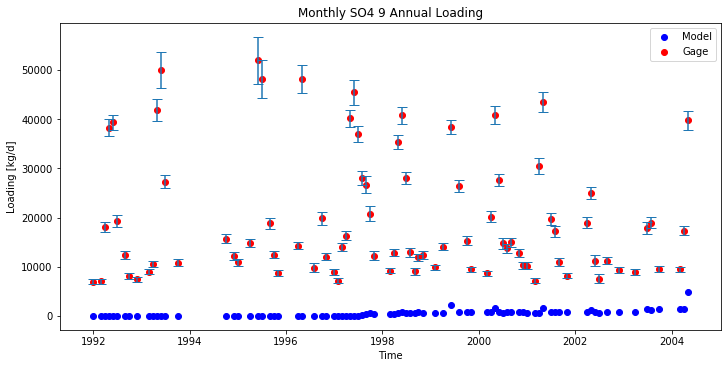

In [167]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(Ob9Dates, SO4_Modeled_9, color='blue', label='Model')
ax.scatter(Ob9Dates, LoadOb9SO4, color='red', label='Gage')
ax.errorbar(x = Ob9Dates, y = LoadOb9SO4, yerr = StdErrorSO4_9, ls='none', capsize = 5)
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly SO4 9 Annual Loading")
ax.legend()
#fig.savefig('{}/MonthlySO49_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly SO4 at 9 Residual')

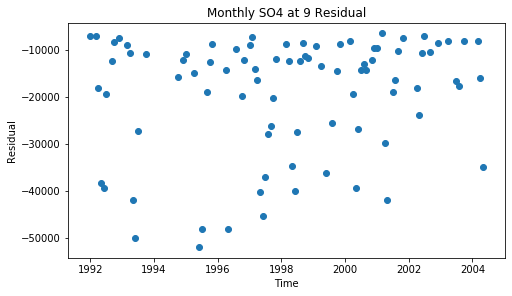

In [168]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(SO4_Residual_9.index, SO4_Residual_9)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly SO4 at 9 Residual')
#fig.savefig('{}/MonthlySO4Res9_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly SO4 at 9 Percent Difference Residual')

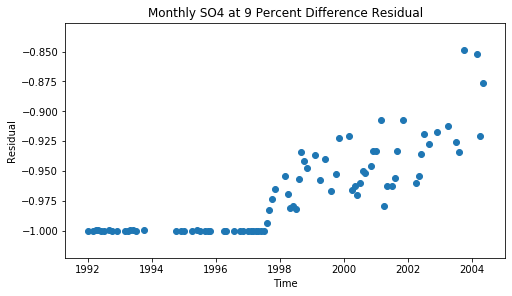

In [169]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(SO4_PercRes_9.index, SO4_PercRes_9)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly SO4 at 9 Percent Difference Residual')
#fig.savefig('{}/MonthlySO4PercDiffRes9_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly SO4 at 9 Percent Difference Residual Histogram')

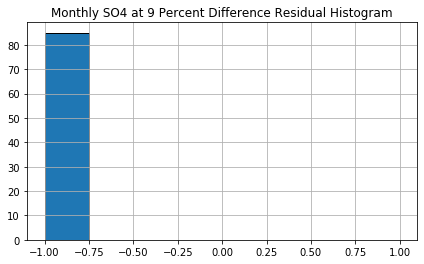

In [170]:
fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.gca()
SO4_PercRes_9.hist(ax=ax, range=(-1,1), edgecolor='black',bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.set_title("Monthly SO4 at 9 Percent Difference Residual Histogram")
#fig.savefig('{}/MonthlySO4PercDiffRes9_Hist_{}.png'.format(FigurePath, FigureSuffix))

Calcium

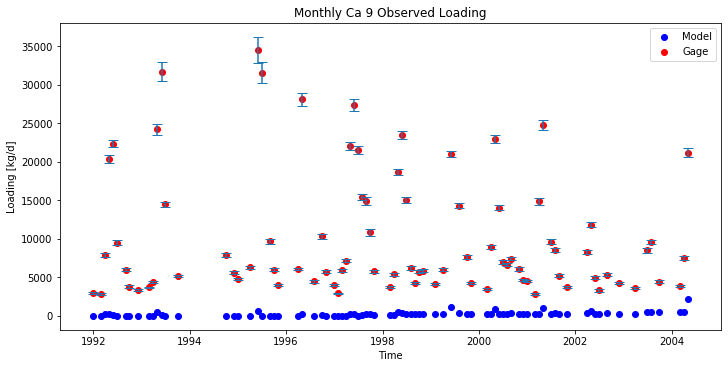

In [171]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(Ob9Dates, Ca_Modeled_9, color='blue', label='Model')
ax.scatter(Ob9Dates, LoadOb9Ca, color='red', label='Gage')
ax.errorbar(x = Ob9Dates, y = LoadOb9Ca, yerr = StdErrorCa_9, ls='none', capsize = 5)
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly Ca 9 Observed Loading")
ax.legend()
#fig.savefig('{}/MonthlyCa9_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Ca at 9 Residual')

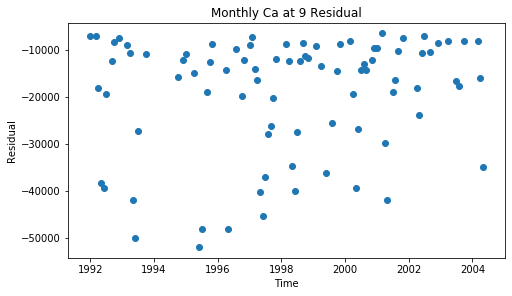

In [172]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Ca_Residual_9.index, Ca_Residual_9)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly Ca at 9 Residual')
#fig.savefig('{}/MonthlyCaRes9_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Ca at 9 Percent Difference Residual')

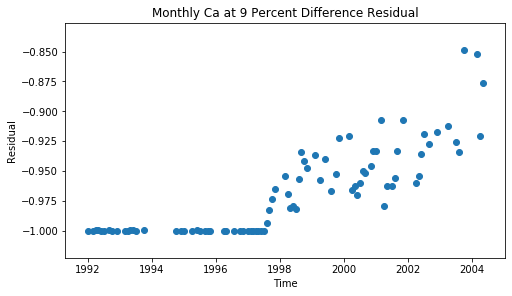

In [173]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Ca_PercRes_9.index, Ca_PercRes_9)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly Ca at 9 Percent Difference Residual')
#fig.savefig('{}/MonthlyCaPercDiffRes9_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Ca at 9 Percent Difference Residual Histogram')

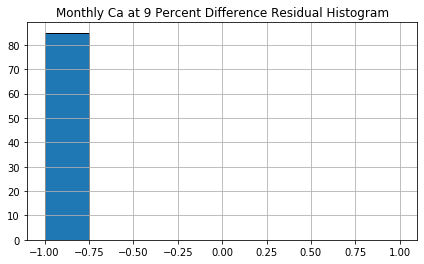

In [174]:
fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.gca()
Ca_PercRes_9.hist(ax=ax, range=(-1,1), edgecolor='black',bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.set_title("Monthly Ca at 9 Percent Difference Residual Histogram")
#fig.savefig('{}/MonthlyCaPercDiffRes9_Hist_{}.png'.format(FigurePath, FigureSuffix))

Magnesium

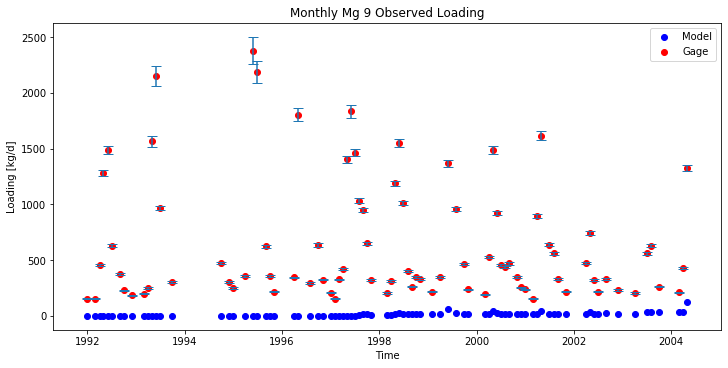

In [175]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(Ob9Dates, Mg_Modeled_9, color='blue', label='Model')
ax.scatter(Ob9Dates, LoadOb9Mg, color='red', label='Gage')
ax.errorbar(x = Ob9Dates, y = LoadOb9Mg, yerr = StdErrorMg_9, ls='none', capsize = 5)
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly Mg 9 Observed Loading")
ax.legend()
#fig.savefig('{}/MonthlyMg9_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Mg at 9 Residual')

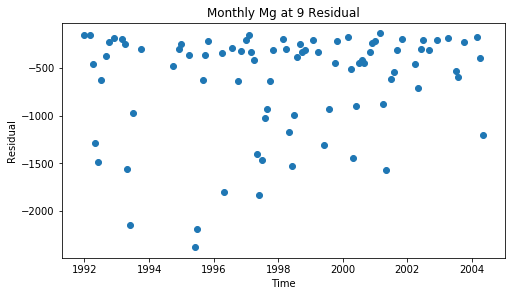

In [176]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Mg_Residual_9.index, Mg_Residual_9)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly Mg at 9 Residual')
#fig.savefig('{}/MonthlyMgRes9_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Mg at 9 Percent Difference Residual')

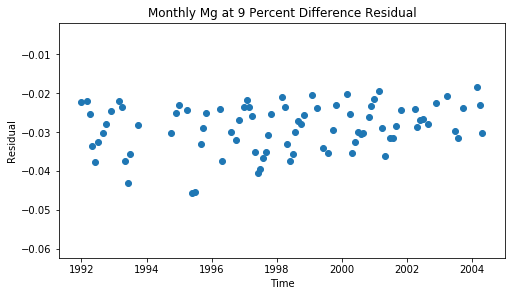

In [177]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Mg_PercRes_9.index, Mg_PercRes_9)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly Mg at 9 Percent Difference Residual')
#fig.savefig('{}/MonthlyMgPercDiffRes9_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Mg at 9 Percent Difference Residual Histogram')

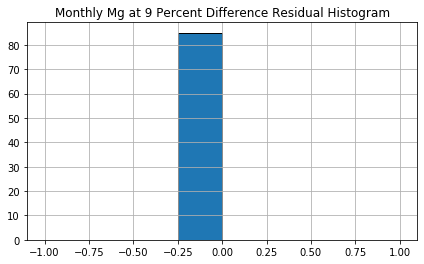

In [178]:
fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.gca()
Mg_PercRes_9.hist(ax=ax, range=(-1,1), edgecolor='black',bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.set_title("Monthly Mg at 9 Percent Difference Residual Histogram")
#fig.savefig('{}/MonthlyMgPercDiffRes9_Hist_{}.png'.format(FigurePath, FigureSuffix))

Sodium

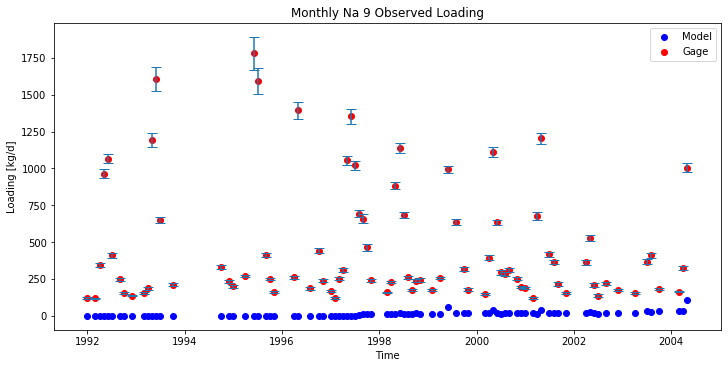

In [179]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(Ob9Dates, Na_Modeled_9, color='blue', label='Model')
ax.scatter(Ob9Dates, LoadOb9Na, color='red', label='Gage')
ax.errorbar(x = Ob9Dates, y = LoadOb9Na, yerr = StdErrorNa_9, ls='none', capsize = 5)
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly Na 9 Observed Loading")
ax.legend()
#fig.savefig('{}/MonthlyNa9_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Na at 9 Residual')

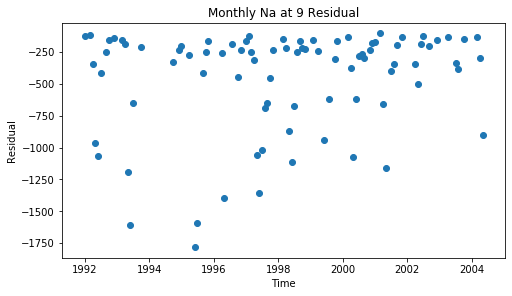

In [180]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Na_Residual_9.index, Na_Residual_9)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly Na at 9 Residual')
#fig.savefig('{}/MonthlyNaRes9_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Na at 9 Percent Difference Residual')

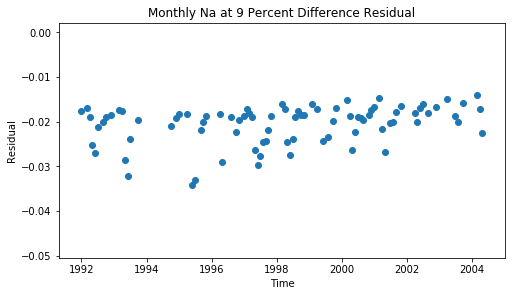

In [181]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(Na_PercRes_9.index, Na_PercRes_9)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly Na at 9 Percent Difference Residual')
#fig.savefig('{}/MonthlyNaPercDiffRes9_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly Na at 9 Percent Difference Residual Histogram')

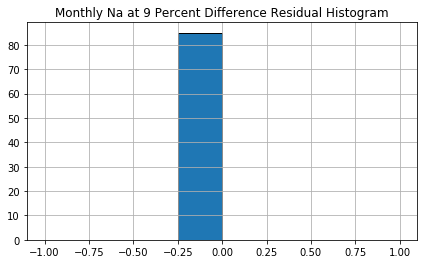

In [182]:
fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.gca()
Na_PercRes_9.hist(ax=ax, range=(-1,1), edgecolor='black',bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.set_title("Monthly Na at 9 Percent Difference Residual Histogram")
#fig.savefig('{}/MonthlyNaPercDiffRes9_Hist_{}.png'.format(FigurePath, FigureSuffix))

Potassium

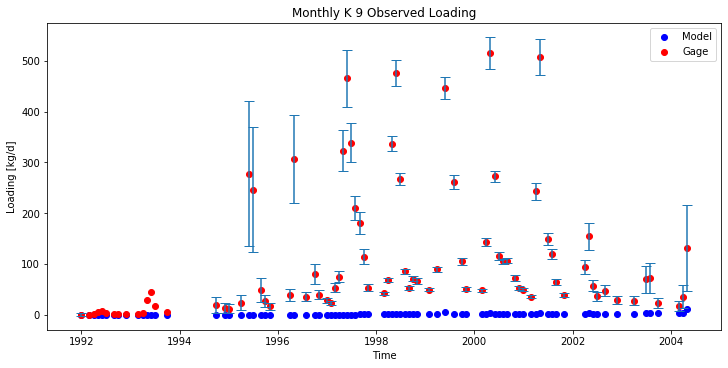

In [183]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(Ob9Dates, K_Modeled_9, color='blue', label='Model')
ax.scatter(Ob9Dates, LoadOb9K, color='red', label='Gage')
ax.errorbar(x = Ob9Dates, y = LoadOb9K, yerr = StdErrorK_9, ls='none', capsize = 5)
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly K 9 Observed Loading")
ax.legend()
#fig.savefig('{}/MonthlyK9_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly K at 9 Residual')

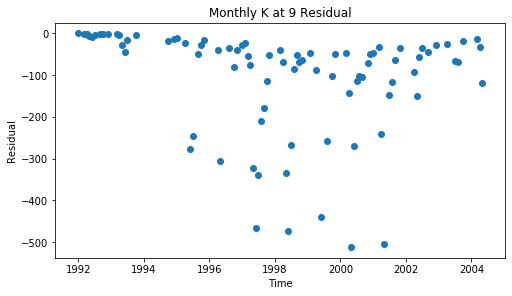

In [184]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(K_Residual_9.index, K_Residual_9)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly K at 9 Residual')
#fig.savefig('{}/MonthlyKRes9_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly K at 9 Percent Difference Residual')

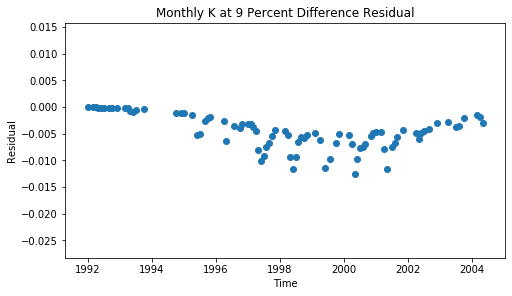

In [185]:
fig, ax = plt.subplots(figsize=(7,4), constrained_layout=True)
ax.scatter(K_PercRes_9.index, K_PercRes_9)
ax.set_xlabel('Time')
ax.set_ylabel('Residual')
ax.set_title('Monthly K at 9 Percent Difference Residual')
#fig.savefig('{}/MonthlyKPercDiffRes9_{}.png'.format(FigurePath, FigureSuffix))

Text(0.5, 1.0, 'Monthly K at 9 Percent Difference Residual Histogram')

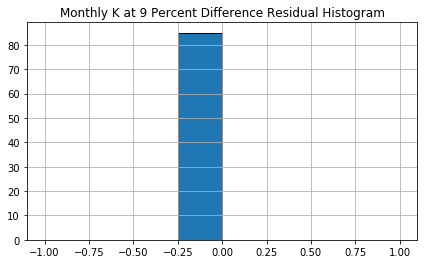

In [186]:
fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.gca()
K_PercRes_9.hist(ax=ax, range=(-1,1), edgecolor='black',bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
ax.set_title("Monthly K at 9 Percent Difference Residual Histogram")
#fig.savefig('{}/MonthlyKPercDiffRes9_Hist_{}.png'.format(FigurePath, FigureSuffix))

Chlorine

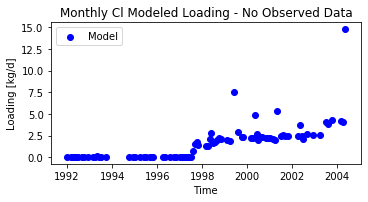

In [187]:
fig, ax = plt.subplots(figsize=(5, 2.7), constrained_layout=True)
ax.scatter(Ob9Dates, Cl_Modeled_9, color='blue', label='Model')
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly Cl Modeled Loading - No Observed Data")
ax.legend()
#fig.savefig('{}/MonthlyCl9_{}.png'.format(FigurePath, FigureSuffix))

Bicarbonate

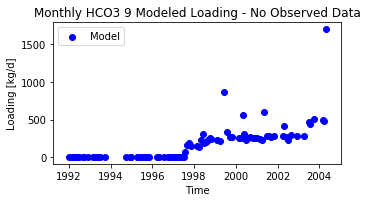

In [188]:
fig, ax = plt.subplots(figsize=(5, 2.7), constrained_layout=True)
ax.scatter(Ob9Dates, HCO3_Modeled_9, color='blue', label='Model')
ax.set_xlabel('Time')
ax.set_ylabel('Loading [kg/d]')
ax.set_title("Monthly HCO3 9 Modeled Loading - No Observed Data")
ax.legend()
#fig.savefig('{}/Monthly HCO39_{}.png'.format(FigurePath, FigureSuffix))

##### Model Deviation

In [189]:
SO4_ModelSum_9 = pd.DataFrame.sum(SO4_Modeled_9, axis = 0)
SO4_ObsvdSum_9 = pd.DataFrame.sum(LoadOb9SO4, axis = 0)
Ca_ModelSum_9 = pd.DataFrame.sum(Ca_Modeled_9, axis = 0)
Ca_ObsvdSum_9 = pd.DataFrame.sum(LoadOb9Ca, axis = 0)
Mg_ModelSum_9 = pd.DataFrame.sum(Mg_Modeled_9, axis = 0)
Mg_ObsvdSum_9 = pd.DataFrame.sum(LoadOb9Mg, axis = 0)
Na_ModelSum_9 = pd.DataFrame.sum(Na_Modeled_9, axis = 0)
Na_ObsvdSum_9 = pd.DataFrame.sum(LoadOb9Na, axis = 0)
K_ModelSum_9 = pd.DataFrame.sum(K_Modeled_9, axis = 0)
K_ObsvdSum_9 = pd.DataFrame.sum(LoadOb9K, axis = 0)

SO4_Deviation_9 = SO4_ModelSum_9 / SO4_ObsvdSum_9
SO4_Dev_9 = SO4_Deviation_9.iloc[0]
Ca_Deviation_9 = Ca_ModelSum_9 / Ca_ObsvdSum_9
Ca_Dev_9 = Ca_Deviation_9.iloc[0]
Mg_Deviation_9 = Mg_ModelSum_9 / Mg_ObsvdSum_9
Mg_Dev_9 = Mg_Deviation_9.iloc[0]
Na_Deviation_9 = Na_ModelSum_9 / Na_ObsvdSum_9
Na_Dev_9 = Na_Deviation_9.iloc[0]
K_Deviation_9 = K_ModelSum_9 / K_ObsvdSum_9
K_Dev_9 = K_Deviation_9.iloc[0]

Text(0, 0.5, 'Deviation')

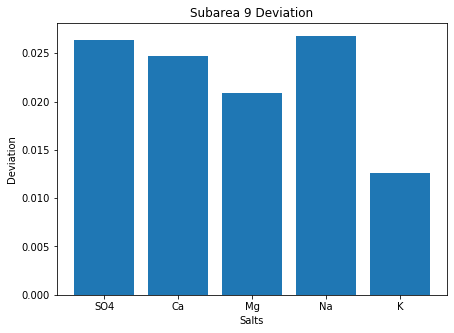

In [190]:
fig, ax = plt.subplots(figsize = (7,5))
salts = ['SO4', 'Ca', 'Mg', 'Na', 'K']
Deviation_9 =[SO4_Dev_9, Ca_Dev_9, Mg_Dev_9, Na_Dev_9, K_Dev_9]
ax.bar(salts, Deviation_9)
ax.set_title('Subarea 9 Deviation')
ax.set_xlabel('Salts')
ax.set_ylabel('Deviation')
#fig.savefig('{}/Deviation_9_{}.png'.format(FigurePath, FigureSuffix))

##### Root Mean Square Error

###### Difference

In [191]:
SO4_Difference_9 = pd.DataFrame.sub(SO4_Modeled_9, LoadOb9SO4, axis=0)
Ca_Difference_9 = pd.DataFrame.sub(Ca_Modeled_9, LoadOb9Ca, axis=0)
Mg_Difference_9 = pd.DataFrame.sub(Mg_Modeled_9, LoadOb9Mg, axis=0)
Na_Difference_9 = pd.DataFrame.sub(Na_Modeled_9, LoadOb9Na, axis=0)
K_Difference_9 = pd.DataFrame.sub(K_Modeled_9, LoadOb9K, axis=0)

###### Square Difference

In [192]:
SO4_DiffSqrd_9 = SO4_Difference_9**2
Ca_DiffSqrd_9 = Ca_Difference_9**2
Mg_DiffSqrd_9 = Mg_Difference_9**2
Na_DiffSqrd_9 = Na_Difference_9**2
K_DiffSqrd_9 = K_Difference_9**2

###### Sum of Square Difference

In [193]:
SO4_DiffSqrdSum_9 = pd.DataFrame.sum(SO4_DiffSqrd_9, axis=0)
SO4_DSSum_9 = SO4_DiffSqrdSum_9.iloc[0]
Ca_DiffSqrdSum_9 = pd.DataFrame.sum(Ca_DiffSqrd_9, axis=0)
Ca_DSSum_9 = Ca_DiffSqrdSum_9.iloc[0]
Mg_DiffSqrdSum_9 = pd.DataFrame.sum(Mg_DiffSqrd_9, axis=0)
Mg_DSSum_9 = Mg_DiffSqrdSum_9.iloc[0]
Na_DiffSqrdSum_9 = pd.DataFrame.sum(Na_DiffSqrd_9, axis=0)
Na_DSSum_9 = Na_DiffSqrdSum_9.iloc[0]
K_DiffSqrdSum_9 = pd.DataFrame.sum(K_DiffSqrd_9, axis=0)
K_DSSum_9 = K_DiffSqrdSum_9.iloc[0]

###### Count of Values (n)

In [194]:
SO4_Count_9 = SO4_Modeled_9.count(axis=0)
Ca_Count_9 = Ca_Modeled_9.count(axis=0)
Mg_Count_9 = Mg_Modeled_9.count(axis=0)
Na_Count_9 = Na_Modeled_9.count(axis=0)
K_Count_9 = K_Modeled_9.count(axis=0)

###### 1/n

In [195]:
SO4_InvCount_9 = 1/SO4_Count_9
Ca_InvCount_9 = 1/Ca_Count_9
Mg_InvCount_9 = 1/Mg_Count_9
Na_InvCount_9 = 1/Na_Count_9
K_InvCount_9 = 1/K_Count_9

###### Multiply Inv Count and Sum

In [196]:
SO4_SE_9 = SO4_InvCount_9*SO4_DSSum_9
Ca_SE_9 = Ca_InvCount_9*Ca_DSSum_9
Mg_SE_9 = Mg_InvCount_9*Mg_DSSum_9
Na_SE_9 = Na_InvCount_9*Na_DSSum_9
K_SE_9 = K_InvCount_9*K_DSSum_9

###### Square Root of Inv Count and Sum

In [197]:
SO4_RMSQE_9 = SO4_SE_9**(1/2)
SO4_RMSE_9 = SO4_RMSQE_9.iloc[0]
Mg_RMSQE_9 = Mg_SE_9**(1/2)
Mg_RMSE_9 = Mg_RMSQE_9.iloc[0]
Ca_RMSQE_9 = Ca_SE_9**(1/2)
Ca_RMSE_9 = Ca_RMSQE_9.iloc[0]
Na_RMSQE_9 = Na_SE_9**(1/2)
Na_RMSE_9 = Na_RMSQE_9.iloc[0]
K_RMSQE_9 = K_SE_9**(1/2)
K_RMSE_9 = K_RMSQE_9.iloc[0]

Text(0, 0.5, 'RMSE')

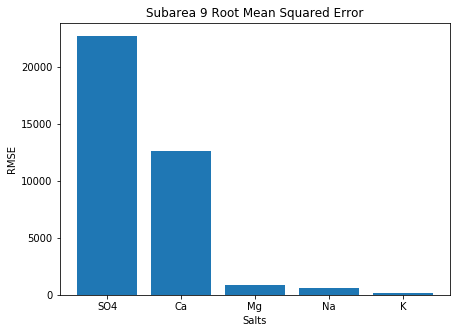

In [198]:
fig, ax = plt.subplots(figsize = (7,5))
salts = ['SO4', 'Ca', 'Mg', 'Na', 'K']
RMSE_9 =[SO4_RMSE_9, Ca_RMSE_9, Mg_RMSE_9, Na_RMSE_9, K_RMSE_9]
ax.bar(salts, RMSE_9)
ax.set_title('Subarea 9 Root Mean Squared Error')
ax.set_xlabel('Salts')
ax.set_ylabel('RMSE')
#fig.savefig('{}/RootMeanSquaredError_9_{}.png'.format(FigurePath, FigureSuffix))

##### Nash Sutcliffe Error

###### Average of Observed Data

In [199]:
SO4_AvgObs_9 = LoadOb9SO4.mean()
Ca_AvgObs_9 = LoadOb9Ca.mean()
Mg_AvgObs_9 = LoadOb9Mg.mean()
Na_AvgObs_9 = LoadOb9Na.mean()
K_AvgObs_9 = LoadOb9K.mean()

###### Observed - AvgObs

In [200]:
SO4_DiffAvgObs_9 = LoadOb9SO4 - SO4_AvgObs_9
Ca_DiffAvgObs_9 = LoadOb9Ca - Ca_AvgObs_9
Mg_DiffAvgObs_9 = LoadOb9Mg - Mg_AvgObs_9
Na_DiffAvgObs_9 = LoadOb9Na - Na_AvgObs_9
K_DiffAvgObs_9 = LoadOb9K - K_AvgObs_9

###### Square DiffAvgObs

In [201]:
SO4_SqDiffAvgObs_9 = SO4_DiffAvgObs_9**2
Ca_SqDiffAvgObs_9 = Ca_DiffAvgObs_9**2
Mg_SqDiffAvgObs_9 = Mg_DiffAvgObs_9**2
Na_SqDiffAvgObs_9 = Na_DiffAvgObs_9**2
K_SqDiffAvgObs_9 = K_DiffAvgObs_9**2

###### Sum of SquareDiffAvgObs

In [202]:
SO4_SumSqDiffAvgObs_9 = pd.DataFrame.sum(SO4_SqDiffAvgObs_9, axis=0)
Ca_SumSqDiffAvgObs_9 = pd.DataFrame.sum(Ca_SqDiffAvgObs_9, axis=0)
Mg_SumSqDiffAvgObs_9 = pd.DataFrame.sum(Mg_SqDiffAvgObs_9, axis=0)
Na_SumSqDiffAvgObs_9 = pd.DataFrame.sum(Na_SqDiffAvgObs_9, axis=0)
K_SumSqDiffAvgObs_9 = pd.DataFrame.sum(K_SqDiffAvgObs_9, axis=0)

###### Divide Model SumSqDiff with Observed SumSqDiff

In [203]:
SO4_ModelObsSum_9 = SO4_DiffSqrdSum_9 / SO4_SumSqDiffAvgObs_9
Ca_ModelObsSum_9 = Ca_DiffSqrdSum_9 / Ca_SumSqDiffAvgObs_9
Mg_ModelObsSum_9 = Mg_DiffSqrdSum_9 / Mg_SumSqDiffAvgObs_9
Na_ModelObsSum_9 = Na_DiffSqrdSum_9 / Na_SumSqDiffAvgObs_9
K_ModelObsSum_9 = K_DiffSqrdSum_9 / K_SumSqDiffAvgObs_9

###### 1 - Division

In [204]:
SO4_NashSCE_9 = 1 - SO4_ModelObsSum_9
SO4_NSCE_9 = SO4_NashSCE_9.iloc[0]
Ca_NashSCE_9 = 1 - Ca_ModelObsSum_9
Ca_NSCE_9 = Ca_NashSCE_9.iloc[0]
Mg_NashSCE_9 = 1 - Mg_ModelObsSum_9
Mg_NSCE_9 = Mg_NashSCE_9.iloc[0]
Na_NashSCE_9 = 1 - Na_ModelObsSum_9
Na_NSCE_9 = Na_NashSCE_9.iloc[0]
K_NashSCE_9 = 1 - K_ModelObsSum_9
K_NSCE_9 = K_NashSCE_9.iloc[0]

Text(0, 0.5, 'NSCE')

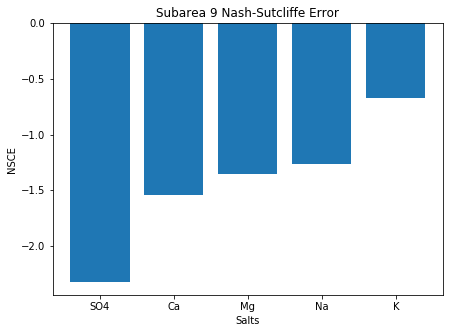

In [205]:
fig, ax = plt.subplots(figsize = (7,5))
salts = ['SO4', 'Ca', 'Mg', 'Na', 'K']
NSCE_9 =[SO4_NSCE_9, Ca_NSCE_9, Mg_NSCE_9, Na_NSCE_9, K_NSCE_9]
ax.bar(salts, NSCE_9)
ax.set_title('Subarea 9 Nash-Sutcliffe Error')
ax.set_xlabel('Salts')
ax.set_ylabel('NSCE')
#fig.savefig('{}/NashSutcliffeError_9_{}.png'.format(FigurePath, FigureSuffix))

End Code